In [1]:
# This dataset is for sensor outdoor and paired with stationary and weather.
# the result should be compared with project_pipeline_ver1

In [2]:
import numpy as np
import pandas as pd
import keras
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

Using TensorFlow backend.


In [3]:
Wearable = pd.read_excel('Data_Folder/Demo5_1/5_1_Wearable_Outside.xlsx',header=0,index_col=0)
Stationary = pd.read_excel('Data_Folder/Demo5_1/5_1_stationary.xlsx',header=0,index_col=False)
Weather = pd.read_csv('Data_Folder/Demo5_1/weather_5_01.txt',delimiter=',',header=None,index_col=False)
Weather.columns=['DTime','Bar','TempIn','HumIn','TempOut','Wind','Wind10','Wdir','HumOut','RainRate','UV','Solar']

In [4]:
#Stationary

In [5]:
Stationary_first = Stationary.iloc[:1000,:]
Stationary_second = Stationary.iloc[1000:1208,:]
Wearable_first = Wearable.iloc[:32,:]
Wearable_second = Wearable.iloc[394:602,:]
Weather_first = Weather.iloc[24:210,:]
Weather_second = Weather.iloc[2357:3585,:]
Weather_first.index = range(Weather_first.shape[0])
Weather_second.index = range(Weather_second.shape[0])
from datetime import datetime
Stationary_first = Stationary_first.resample('1T',on='TimeStamp').mean()
Stationary_second = Stationary_second.resample('1T',on='TimeStamp').mean()

In [6]:
Stationary = pd.concat([Stationary_first, Stationary_second],axis=0)

In [7]:
Stationary

violetData     blueData    greenData   yellowData  \
TimeStamp                                                                
2019-05-01 08:45:00  262.882550   360.682166   410.831051   412.023409   
2019-05-01 08:46:00  276.422952   380.291785   441.032712   437.064934   
2019-05-01 08:47:00  260.202768   359.201742   403.496987   406.116559   
2019-05-01 08:48:00  263.943056   364.073299   405.261170   409.125706   
2019-05-01 08:49:00  272.498861   375.166464   414.248995   420.237295   
2019-05-01 08:50:00  282.686588   387.281356   429.287055   434.887324   
2019-05-01 08:51:00  286.082701   392.341834   434.929700   440.713965   
2019-05-01 08:52:00  290.938530   399.231465   442.618641   448.499648   
2019-05-01 08:53:00  296.466704   406.977195   451.386123   457.277956   
2019-05-01 08:54:00  302.399920   414.953520   459.997045   466.456581   
2019-05-01 08:55:00  307.181545   421.876094   467.970525   474.471187   
2019-05-01 08:56:00  311.156726   427.433323   474.826960   480.970427   
2019-05-01 08:57:00  314.145627   431.453713   479.410748   486.078840   
2019-05-01 08:58:00  312.206105   430.000377   473.209149   482.533009   
2019-05-01 08:59:00  313.499435   431.152038   476.157745   484.450351   
2019-05-01 09:00:00  315.716067   432.488437   482.781185   487.731555   
2019-05-01 09:01:00  313.335077   429.094665   478.943385   483.995405   
2019-05-01 09:02:00  311.622746   427.233454   475.505131   481.314628   
2019-05-01 09:03:00  311.706507   428.298347   476.088157   482.372083   
2019-05-01 09:04:00  313.508766   430.948202   480.152245   486.138939   
2019-05-01 09:05:00  315.643697   433.791706   484.567520   490.135501   
2019-05-01 09:06:00  317.272034   435.766365   487.702021   493.080335   
2019-05-01 09:07:00  317.308219   434.621056   488.274997   493.170483   
2019-05-01 09:08:00  316.328536   433.522575   486.780769   492.222260   
2019-05-01 09:09:00  316.873996   435.805851   487.634611   493.981814   
2019-05-01 09:10:00  318.610888   439.478711   489.454639   497.106944   
2019-05-01 09:11:00  318.936556   441.137426   489.319823   498.068522   
2019-05-01 09:12:00  317.152248   439.620342   486.718784   495.346468   
2019-05-01 09:13:00  314.160101   435.963823   482.612666   491.067030   
2019-05-01 09:14:00  311.192909   432.257119   477.754425   486.800026   
...                         ...          ...          ...          ...   
2019-05-01 18:17:00  902.025269  1330.757935  1658.793579  1626.993774   
2019-05-01 18:18:00  899.709412  1332.021729  1664.186279  1632.763306   
2019-05-01 18:19:00  446.959869   624.306213   713.993042   693.299377   
2019-05-01 18:20:00  436.538544   610.404663   701.050598   681.760437   
2019-05-01 18:21:00  459.697083   647.054199   754.977539   732.724182   
2019-05-01 18:22:00  830.233765  1233.447021  1558.489380  1526.989502   
2019-05-01 18:23:00  904.341125  1349.714600  1721.348877  1687.573364   
2019-05-01 18:24:00  918.236206  1380.045288  1762.333374  1727.959717   
2019-05-01 18:25:00  905.499023  1364.880005  1740.762573  1707.766602   
2019-05-01 18:26:00  890.445984  1338.340576  1711.641968  1677.957642   
2019-05-01 18:27:00  409.906219   580.073975   666.537354   649.066711   
2019-05-01 18:28:00  367.062897   513.093750   586.725403   567.332336   
2019-05-01 18:29:00  438.854401   628.097534   740.956543   719.262024   
2019-05-01 18:30:00  870.761230  1319.383911  1709.484863  1674.111206   
2019-05-01 18:31:00  396.011078   566.172424   662.223145   643.297180   
2019-05-01 18:32:00  442.328186   638.207764   771.155640   748.109436   
2019-05-01 18:33:00  367.062897   521.940186   601.824951   584.640808   
2019-05-01 18:34:00  324.219604   453.696198   522.013062   504.829651   
2019-05-01 18:35:00  313.798248   443.585999   506.913513   490.405945   
2019-05-01 18:36:00  357.799500   516.885071   612.610352   592.333435   
2019-05-01 18:37:00  360.115356   524.467773   624.474304   605.795593   
2019-05-01 18:38:00  408.

In [8]:
#Stationary.to_csv(r'Data_Folder\Demo5_1\Stationary_comparison.csv')

In [9]:
#Wearable.index = range(Wearable.shape[0])
from datetime import datetime
for i in range(Weather_first.shape[0]):
    Weather_first.set_value(i, 'New_Time', datetime.strptime(Weather_first.iloc[i,0], '%Y-%m-%d %H:%M:%S'))   
#for i in range(Weather_second.shape[0]):
for i in range(Weather_second.shape[0]):
    Weather_second.set_value(i, 'New_Time', datetime.strptime(Weather_second.iloc[i,0], '%Y-%m-%d %H:%M:%S')) 

#Weather = Weather.iloc[:3561]

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

In [10]:

Weather_first = Weather_first.resample('1T', on='New_Time').mean()
Weather_second = Weather_second.resample('1T', on='New_Time').mean()

#Weather_second
Weather = pd.concat([Weather_first, Weather_second],axis=0)
#Weather

In [11]:
Wearable = pd.concat([Wearable_first, Wearable_second],axis=0)

In [12]:
Wearable.index = range(Wearable.shape[0])
Wearable.drop(columns=['Time(s)'],inplace=True)
#Weather.drop(columns=['RainRate'],inplace=True)
Wearable.drop(Wearable.columns[0],axis=1,inplace=True)

Stationary.index = range(Stationary.shape[0])
Weather.index = range(Weather.shape[0])

#Stationary = Wea_Stat_Wearable.fillna(method='ffill')
Stationary = Stationary.fillna(method='ffill')
Wearable = Wearable.fillna(method='ffill')
Weather = Weather.fillna(method='ffill')
#Wea_Stat = pd.concat([Weather, Stationary],axis=1)
#Wea_Stat

In [13]:
Wea_Stat = pd.concat([Weather, Stationary],axis=1)

In [14]:
#Stationary

### Weather Model 

### decay learning
https://shaoanlu.wordpress.com/2017/05/29/sgd-all-which-one-is-the-best-optimizer-dogs-vs-cats-toy-experiment/
<br>may wanna consider comparing adam, sgd, SGD+momentum, SGD+Nest.+momentum

In [15]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(Wea_Stat, Wearable, test_size = 0.2, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train_weather = X_train[:,:11]
X_train_stationary = X_train[:,11:]
X_test_weather = X_test[:,:11]
X_test_stationary = X_test[:,11:]
# Initialising the ANN

model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 11))

# Adding the second hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer

model.add(Dense(units = 6))

adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.01, amsgrad=False)
# Compiling the ANN
#sgd = keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
#adagrad = keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
#adadelta = keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
model.compile(optimizer = adam, loss = 'mean_squared_error')

# Fitting the ANN to the Training set
history = model.fit(X_train_weather, y_train, batch_size = 16, epochs = 20000)

Epoch 1/20000
192/192 [==============================] - 0s 2ms/step - loss: 1538006570.6667
Epoch 2/20000
192/192 [==============================] - 0s 140us/step - loss: 1537983658.6667
Epoch 3/20000
192/192 [==============================] - 0s 126us/step - loss: 1537953744.0000
Epoch 4/20000
192/192 [==============================] - 0s 119us/step - loss: 1537913162.6667
Epoch 5/20000
192/192 [==============================] - 0s 141us/step - loss: 1537860021.3333
Epoch 6/20000
192/192 [==============================] - 0s 147us/step - loss: 1537782133.3333
Epoch 7/20000
192/192 [==============================] - 0s 149us/step - loss: 1537682762.6667
Epoch 8/20000
192/192 [==============================] - 0s 138us/step - loss: 1537551850.6667
Epoch 9/20000
192/192 [==============================] - 0s 134us/step - loss: 1537374240.0000
Epoch 10/20000
192/192 [==============================] - 0s 142us/step - loss: 1537148981.3333
Epoch 11/20000
192/192 [===========================

192/192 [==============================] - 0s 100us/step - loss: 1424766298.6667
Epoch 87/20000
192/192 [==============================] - 0s 98us/step - loss: 1423084266.6667
Epoch 88/20000
192/192 [==============================] - 0s 119us/step - loss: 1421304021.3333
Epoch 89/20000
192/192 [==============================] - 0s 111us/step - loss: 1419675882.6667
Epoch 90/20000
192/192 [==============================] - 0s 105us/step - loss: 1417987509.3333
Epoch 91/20000
192/192 [==============================] - 0s 110us/step - loss: 1416295200.0000
Epoch 92/20000
192/192 [==============================] - 0s 109us/step - loss: 1414624912.0000
Epoch 93/20000
192/192 [==============================] - 0s 110us/step - loss: 1412859056.0000
Epoch 94/20000
192/192 [==============================] - 0s 117us/step - loss: 1411288832.0000
Epoch 95/20000
192/192 [==============================] - 0s 106us/step - loss: 1409579616.0000
Epoch 96/20000
192/192 [==============================] 

192/192 [==============================] - 0s 115us/step - loss: 1299375125.3333
Epoch 171/20000
192/192 [==============================] - 0s 111us/step - loss: 1298115925.3333
Epoch 172/20000
192/192 [==============================] - 0s 130us/step - loss: 1296870400.0000
Epoch 173/20000
192/192 [==============================] - 0s 111us/step - loss: 1295585077.3333
Epoch 174/20000
192/192 [==============================] - 0s 108us/step - loss: 1294257269.3333
Epoch 175/20000
192/192 [==============================] - 0s 114us/step - loss: 1293009829.3333
Epoch 176/20000
192/192 [==============================] - 0s 100us/step - loss: 1291803744.0000
Epoch 177/20000
192/192 [==============================] - 0s 103us/step - loss: 1290501045.3333
Epoch 178/20000
192/192 [==============================] - 0s 102us/step - loss: 1289308896.0000
Epoch 179/20000
192/192 [==============================] - 0s 106us/step - loss: 1287995392.0000
Epoch 180/20000
192/192 [=====================

192/192 [==============================] - 0s 118us/step - loss: 1204990736.0000
Epoch 255/20000
192/192 [==============================] - 0s 122us/step - loss: 1203988336.0000
Epoch 256/20000
192/192 [==============================] - 0s 103us/step - loss: 1202986778.6667
Epoch 257/20000
192/192 [==============================] - 0s 113us/step - loss: 1202035978.6667
Epoch 258/20000
192/192 [==============================] - 0s 110us/step - loss: 1201031125.3333
Epoch 259/20000
192/192 [==============================] - 0s 111us/step - loss: 1200062229.3333
Epoch 260/20000
192/192 [==============================] - 0s 112us/step - loss: 1199118522.6667
Epoch 261/20000
192/192 [==============================] - 0s 106us/step - loss: 1198108186.6667
Epoch 262/20000
192/192 [==============================] - 0s 109us/step - loss: 1197164576.0000
Epoch 263/20000
192/192 [==============================] - 0s 127us/step - loss: 1196198165.3333
Epoch 264/20000
192/192 [=====================

192/192 [==============================] - 0s 110us/step - loss: 1130534848.0000
Epoch 339/20000
192/192 [==============================] - 0s 105us/step - loss: 1129747493.3333
Epoch 340/20000
192/192 [==============================] - 0s 107us/step - loss: 1128939866.6667
Epoch 341/20000
192/192 [==============================] - 0s 113us/step - loss: 1128158736.0000
Epoch 342/20000
192/192 [==============================] - 0s 109us/step - loss: 1127358997.3333
Epoch 343/20000
192/192 [==============================] - 0s 120us/step - loss: 1126568021.3333
Epoch 344/20000
192/192 [==============================] - 0s 136us/step - loss: 1125775461.3333
Epoch 345/20000
192/192 [==============================] - 0s 135us/step - loss: 1125012080.0000
Epoch 346/20000
192/192 [==============================] - 0s 156us/step - loss: 1124218474.6667
Epoch 347/20000
192/192 [==============================] - 0s 118us/step - loss: 1123430954.6667
Epoch 348/20000
192/192 [=====================

192/192 [==============================] - 0s 110us/step - loss: 1069177738.6667
Epoch 423/20000
192/192 [==============================] - ETA: 0s - loss: 839458816.000 - 0s 107us/step - loss: 1068501776.0000
Epoch 424/20000
192/192 [==============================] - 0s 108us/step - loss: 1067853280.0000
Epoch 425/20000
192/192 [==============================] - 0s 115us/step - loss: 1067163178.6667
Epoch 426/20000
192/192 [==============================] - 0s 115us/step - loss: 1066507834.6667
Epoch 427/20000
192/192 [==============================] - 0s 117us/step - loss: 1065843818.6667
Epoch 428/20000
192/192 [==============================] - 0s 108us/step - loss: 1065187328.0000
Epoch 429/20000
192/192 [==============================] - 0s 110us/step - loss: 1064516234.6667
Epoch 430/20000
192/192 [==============================] - 0s 113us/step - loss: 1063865952.0000
Epoch 431/20000
192/192 [==============================] - 0s 109us/step - loss: 1063194912.0000
Epoch 432/2000

192/192 [==============================] - 0s 110us/step - loss: 1016900026.6667
Epoch 507/20000
192/192 [==============================] - 0s 113us/step - loss: 1016331280.0000
Epoch 508/20000
192/192 [==============================] - 0s 116us/step - loss: 1015734730.6667
Epoch 509/20000
192/192 [==============================] - 0s 107us/step - loss: 1015164629.3333
Epoch 510/20000
192/192 [==============================] - 0s 108us/step - loss: 1014603162.6667
Epoch 511/20000
192/192 [==============================] - 0s 101us/step - loss: 1014017701.3333
Epoch 512/20000
192/192 [==============================] - 0s 111us/step - loss: 1013453850.6667
Epoch 513/20000
192/192 [==============================] - 0s 110us/step - loss: 1012868405.3333
Epoch 514/20000
192/192 [==============================] - 0s 112us/step - loss: 1012298405.3333
Epoch 515/20000
192/192 [==============================] - 0s 103us/step - loss: 1011721082.6667
Epoch 516/20000
192/192 [=====================

192/192 [==============================] - 0s 98us/step - loss: 971214288.0000
Epoch 591/20000
192/192 [==============================] - 0s 218us/step - loss: 970704736.0000
Epoch 592/20000
192/192 [==============================] - 0s 114us/step - loss: 970191754.6667
Epoch 593/20000
192/192 [==============================] - 0s 112us/step - loss: 969692762.6667
Epoch 594/20000
192/192 [==============================] - 0s 103us/step - loss: 969168181.3333
Epoch 595/20000
192/192 [==============================] - 0s 129us/step - loss: 968663520.0000
Epoch 596/20000
192/192 [==============================] - 0s 171us/step - loss: 968168010.6667
Epoch 597/20000
192/192 [==============================] - 0s 246us/step - loss: 967666256.0000
Epoch 598/20000
192/192 [==============================] - 0s 179us/step - loss: 967135621.3333
Epoch 599/20000
192/192 [==============================] - 0s 136us/step - loss: 966649834.6667
Epoch 600/20000
192/192 [==============================] 

192/192 [==============================] - 0s 128us/step - loss: 930166165.3333
Epoch 676/20000
192/192 [==============================] - 0s 115us/step - loss: 929699957.3333
Epoch 677/20000
192/192 [==============================] - 0s 97us/step - loss: 929251840.0000
Epoch 678/20000
192/192 [==============================] - 0s 126us/step - loss: 928791600.0000
Epoch 679/20000
192/192 [==============================] - 0s 112us/step - loss: 928337264.0000
Epoch 680/20000
192/192 [==============================] - 0s 118us/step - loss: 927877946.6667
Epoch 681/20000
192/192 [==============================] - 0s 108us/step - loss: 927436298.6667
Epoch 682/20000
192/192 [==============================] - 0s 117us/step - loss: 926974954.6667
Epoch 683/20000
192/192 [==============================] - 0s 261us/step - loss: 926521221.3333
Epoch 684/20000
192/192 [==============================] - 0s 116us/step - loss: 926070789.3333
Epoch 685/20000
192/192 [==============================] 

192/192 [==============================] - 0s 105us/step - loss: 893250293.3333
Epoch 761/20000
192/192 [==============================] - 0s 110us/step - loss: 892837136.0000
Epoch 762/20000
192/192 [==============================] - 0s 145us/step - loss: 892425072.0000
Epoch 763/20000
192/192 [==============================] - 0s 118us/step - loss: 892019125.3333
Epoch 764/20000
192/192 [==============================] - 0s 113us/step - loss: 891601821.3333
Epoch 765/20000
192/192 [==============================] - 0s 124us/step - loss: 891187370.6667
Epoch 766/20000
192/192 [==============================] - 0s 109us/step - loss: 890785296.0000
Epoch 767/20000
192/192 [==============================] - 0s 108us/step - loss: 890367285.3333
Epoch 768/20000
192/192 [==============================] - 0s 119us/step - loss: 889969184.0000
Epoch 769/20000
192/192 [==============================] - 0s 104us/step - loss: 889545520.0000
Epoch 770/20000
192/192 [==============================]

192/192 [==============================] - 0s 108us/step - loss: 859754432.0000
Epoch 846/20000
192/192 [==============================] - 0s 100us/step - loss: 859379797.3333
Epoch 847/20000
192/192 [==============================] - 0s 96us/step - loss: 858997938.6667
Epoch 848/20000
192/192 [==============================] - 0s 132us/step - loss: 858621616.0000
Epoch 849/20000
192/192 [==============================] - 0s 113us/step - loss: 858252261.3333
Epoch 850/20000
192/192 [==============================] - 0s 110us/step - loss: 857878325.3333
Epoch 851/20000
192/192 [==============================] - 0s 112us/step - loss: 857496266.6667
Epoch 852/20000
192/192 [==============================] - 0s 115us/step - loss: 857128464.0000
Epoch 853/20000
192/192 [==============================] - 0s 107us/step - loss: 856758693.3333
Epoch 854/20000
192/192 [==============================] - 0s 198us/step - loss: 856375936.0000
Epoch 855/20000
192/192 [==============================] 

192/192 [==============================] - 0s 123us/step - loss: 829079328.0000
Epoch 931/20000
192/192 [==============================] - 0s 117us/step - loss: 828734890.6667
Epoch 932/20000
192/192 [==============================] - 0s 130us/step - loss: 828391685.3333
Epoch 933/20000
192/192 [==============================] - 0s 112us/step - loss: 828043162.6667
Epoch 934/20000
192/192 [==============================] - 0s 142us/step - loss: 827704949.3333
Epoch 935/20000
192/192 [==============================] - 0s 123us/step - loss: 827357648.0000
Epoch 936/20000
192/192 [==============================] - 0s 114us/step - loss: 827004512.0000
Epoch 937/20000
192/192 [==============================] - 0s 128us/step - loss: 826675301.3333
Epoch 938/20000
192/192 [==============================] - 0s 108us/step - loss: 826324165.3333
Epoch 939/20000
192/192 [==============================] - 0s 123us/step - loss: 825984565.3333
Epoch 940/20000
192/192 [==============================]

192/192 [==============================] - 0s 122us/step - loss: 800837829.3333
Epoch 1016/20000
192/192 [==============================] - 0s 99us/step - loss: 800524570.6667
Epoch 1017/20000
192/192 [==============================] - 0s 116us/step - loss: 800199877.3333
Epoch 1018/20000
192/192 [==============================] - 0s 97us/step - loss: 799883813.3333
Epoch 1019/20000
192/192 [==============================] - 0s 107us/step - loss: 799571397.3333
Epoch 1020/20000
192/192 [==============================] - 0s 118us/step - loss: 799250597.3333
Epoch 1021/20000
192/192 [==============================] - 0s 136us/step - loss: 798933077.3333
Epoch 1022/20000
192/192 [==============================] - 0s 191us/step - loss: 798610170.6667
Epoch 1023/20000
192/192 [==============================] - 0s 146us/step - loss: 798292368.0000
Epoch 1024/20000
192/192 [==============================] - 0s 149us/step - loss: 797980720.0000
Epoch 1025/20000
192/192 [=======================

192/192 [==============================] - 0s 104us/step - loss: 774993765.3333
Epoch 1100/20000
192/192 [==============================] - 0s 114us/step - loss: 774694314.6667
Epoch 1101/20000
192/192 [==============================] - 0s 101us/step - loss: 774402442.6667
Epoch 1102/20000
192/192 [==============================] - ETA: 0s - loss: 712857600.000 - 0s 114us/step - loss: 774101226.6667
Epoch 1103/20000
192/192 [==============================] - 0s 121us/step - loss: 773811317.3333
Epoch 1104/20000
192/192 [==============================] - 0s 112us/step - loss: 773512400.0000
Epoch 1105/20000
192/192 [==============================] - 0s 118us/step - loss: 773222533.3333
Epoch 1106/20000
192/192 [==============================] - 0s 121us/step - loss: 772917829.3333
Epoch 1107/20000
192/192 [==============================] - 0s 116us/step - loss: 772623778.6667
Epoch 1108/20000
192/192 [==============================] - 0s 114us/step - loss: 772337242.6667
Epoch 1109/2000

192/192 [==============================] - 0s 101us/step - loss: 750938336.0000
Epoch 1184/20000
192/192 [==============================] - 0s 117us/step - loss: 750658885.3333
Epoch 1185/20000
192/192 [==============================] - 0s 101us/step - loss: 750390112.0000
Epoch 1186/20000
192/192 [==============================] - 0s 141us/step - loss: 750109456.0000
Epoch 1187/20000
192/192 [==============================] - 0s 118us/step - loss: 749832352.0000
Epoch 1188/20000
192/192 [==============================] - 0s 120us/step - loss: 749560610.6667
Epoch 1189/20000
192/192 [==============================] - 0s 116us/step - loss: 749284333.3333
Epoch 1190/20000
192/192 [==============================] - 0s 119us/step - loss: 749008968.0000
Epoch 1191/20000
192/192 [==============================] - 0s 113us/step - loss: 748736240.0000
Epoch 1192/20000
192/192 [==============================] - 0s 156us/step - loss: 748462261.3333
Epoch 1193/20000
192/192 [=====================

192/192 [==============================] - 0s 117us/step - loss: 728459477.3333
Epoch 1268/20000
192/192 [==============================] - 0s 119us/step - loss: 728198930.6667
Epoch 1269/20000
192/192 [==============================] - 0s 130us/step - loss: 727940901.3333
Epoch 1270/20000
192/192 [==============================] - 0s 134us/step - loss: 727689666.6667
Epoch 1271/20000
192/192 [==============================] - 0s 128us/step - loss: 727424645.3333
Epoch 1272/20000
192/192 [==============================] - 0s 153us/step - loss: 727165304.0000
Epoch 1273/20000
192/192 [==============================] - 0s 132us/step - loss: 726914688.0000
Epoch 1274/20000
192/192 [==============================] - 0s 121us/step - loss: 726651493.3333
Epoch 1275/20000
192/192 [==============================] - 0s 139us/step - loss: 726393613.3333
Epoch 1276/20000
192/192 [==============================] - 0s 153us/step - loss: 726142186.6667
Epoch 1277/20000
192/192 [=====================

192/192 [==============================] - 0s 111us/step - loss: 707381317.3333
Epoch 1352/20000
192/192 [==============================] - 0s 92us/step - loss: 707133298.6667
Epoch 1353/20000
192/192 [==============================] - 0s 108us/step - loss: 706896693.3333
Epoch 1354/20000
192/192 [==============================] - 0s 136us/step - loss: 706642042.6667
Epoch 1355/20000
192/192 [==============================] - 0s 109us/step - loss: 706410024.0000
Epoch 1356/20000
192/192 [==============================] - 0s 110us/step - loss: 706165930.6667
Epoch 1357/20000
192/192 [==============================] - 0s 105us/step - loss: 705923869.3333
Epoch 1358/20000
192/192 [==============================] - 0s 114us/step - loss: 705681853.3333
Epoch 1359/20000
192/192 [==============================] - 0s 109us/step - loss: 705440797.3333
Epoch 1360/20000
192/192 [==============================] - 0s 119us/step - loss: 705192613.3333
Epoch 1361/20000
192/192 [======================

192/192 [==============================] - 0s 99us/step - loss: 687552544.0000
Epoch 1436/20000
192/192 [==============================] - 0s 96us/step - loss: 687315533.3333
Epoch 1437/20000
192/192 [==============================] - 0s 124us/step - loss: 687099170.6667
Epoch 1438/20000
192/192 [==============================] - 0s 105us/step - loss: 686863688.0000
Epoch 1439/20000
192/192 [==============================] - 0s 107us/step - loss: 686633760.0000
Epoch 1440/20000
192/192 [==============================] - 0s 123us/step - loss: 686406170.6667
Epoch 1441/20000
192/192 [==============================] - 0s 105us/step - loss: 686179048.0000
Epoch 1442/20000
192/192 [==============================] - 0s 115us/step - loss: 685949146.6667
Epoch 1443/20000
192/192 [==============================] - 0s 126us/step - loss: 685724338.6667
Epoch 1444/20000
192/192 [==============================] - 0s 141us/step - loss: 685493898.6667
Epoch 1445/20000
192/192 [=======================

192/192 [==============================] - 0s 132us/step - loss: 668869488.0000
Epoch 1520/20000
192/192 [==============================] - 0s 119us/step - loss: 668649941.3333
Epoch 1521/20000
192/192 [==============================] - 0s 131us/step - loss: 668433461.3333
Epoch 1522/20000
192/192 [==============================] - 0s 106us/step - loss: 668217578.6667
Epoch 1523/20000
192/192 [==============================] - 0s 127us/step - loss: 668004640.0000
Epoch 1524/20000
192/192 [==============================] - 0s 117us/step - loss: 667786984.0000
Epoch 1525/20000
192/192 [==============================] - 0s 122us/step - loss: 667571152.0000
Epoch 1526/20000
192/192 [==============================] - 0s 133us/step - loss: 667358293.3333
Epoch 1527/20000
192/192 [==============================] - 0s 121us/step - loss: 667139253.3333
Epoch 1528/20000
192/192 [==============================] - 0s 122us/step - loss: 666930666.6667
Epoch 1529/20000
192/192 [=====================

192/192 [==============================] - 0s 102us/step - loss: 651235344.0000
Epoch 1604/20000
192/192 [==============================] - 0s 102us/step - loss: 651032202.6667
Epoch 1605/20000
192/192 [==============================] - 0s 105us/step - loss: 650827800.0000
Epoch 1606/20000
192/192 [==============================] - 0s 105us/step - loss: 650632650.6667
Epoch 1607/20000
192/192 [==============================] - 0s 109us/step - loss: 650418032.0000
Epoch 1608/20000
192/192 [==============================] - 0s 122us/step - loss: 650220120.0000
Epoch 1609/20000
192/192 [==============================] - 0s 112us/step - loss: 650012776.0000
Epoch 1610/20000
192/192 [==============================] - 0s 110us/step - loss: 649810961.3333
Epoch 1611/20000
192/192 [==============================] - 0s 103us/step - loss: 649604733.3333
Epoch 1612/20000
192/192 [==============================] - 0s 104us/step - loss: 649405024.0000
Epoch 1613/20000
192/192 [=====================

192/192 [==============================] - 0s 116us/step - loss: 634526058.6667
Epoch 1688/20000
192/192 [==============================] - 0s 118us/step - loss: 634330613.3333
Epoch 1689/20000
192/192 [==============================] - 0s 105us/step - loss: 634138666.6667
Epoch 1690/20000
192/192 [==============================] - 0s 104us/step - loss: 633946309.3333
Epoch 1691/20000
192/192 [==============================] - 0s 123us/step - loss: 633753098.6667
Epoch 1692/20000
192/192 [==============================] - 0s 170us/step - loss: 633562805.3333
Epoch 1693/20000
192/192 [==============================] - 0s 122us/step - loss: 633365917.3333
Epoch 1694/20000
192/192 [==============================] - 0s 133us/step - loss: 633173709.3333
Epoch 1695/20000
192/192 [==============================] - 0s 125us/step - loss: 632980346.6667
Epoch 1696/20000
192/192 [==============================] - 0s 117us/step - loss: 632791128.0000
Epoch 1697/20000
192/192 [=====================

192/192 [==============================] - 0s 106us/step - loss: 618673045.3333
Epoch 1772/20000
192/192 [==============================] - 0s 107us/step - loss: 618490549.3333
Epoch 1773/20000
192/192 [==============================] - 0s 106us/step - loss: 618304170.6667
Epoch 1774/20000
192/192 [==============================] - 0s 123us/step - loss: 618122272.0000
Epoch 1775/20000
192/192 [==============================] - 0s 108us/step - loss: 617937586.6667
Epoch 1776/20000
192/192 [==============================] - 0s 108us/step - loss: 617755760.0000
Epoch 1777/20000
192/192 [==============================] - 0s 111us/step - loss: 617572874.6667
Epoch 1778/20000
192/192 [==============================] - 0s 141us/step - loss: 617389496.0000
Epoch 1779/20000
192/192 [==============================] - 0s 153us/step - loss: 617205421.3333
Epoch 1780/20000
192/192 [==============================] - 0s 114us/step - loss: 617025389.3333
Epoch 1781/20000
192/192 [=====================

192/192 [==============================] - 0s 107us/step - loss: 603620016.0000
Epoch 1856/20000
192/192 [==============================] - 0s 124us/step - loss: 603445698.6667
Epoch 1857/20000
192/192 [==============================] - 0s 117us/step - loss: 603268749.3333
Epoch 1858/20000
192/192 [==============================] - 0s 122us/step - loss: 603090352.0000
Epoch 1859/20000
192/192 [==============================] - 0s 106us/step - loss: 602918896.0000
Epoch 1860/20000
192/192 [==============================] - 0s 101us/step - loss: 602744509.3333
Epoch 1861/20000
192/192 [==============================] - 0s 113us/step - loss: 602572773.3333
Epoch 1862/20000
192/192 [==============================] - 0s 97us/step - loss: 602397410.6667
Epoch 1863/20000
192/192 [==============================] - 0s 96us/step - loss: 602220901.3333
Epoch 1864/20000
192/192 [==============================] - 0s 97us/step - loss: 602052778.6667
Epoch 1865/20000
192/192 [========================

192/192 [==============================] - 0s 97us/step - loss: 589461672.0000
Epoch 1939/20000
192/192 [==============================] - 0s 99us/step - loss: 589301408.0000
Epoch 1940/20000
192/192 [==============================] - 0s 100us/step - loss: 589134928.0000
Epoch 1941/20000
192/192 [==============================] - 0s 104us/step - loss: 588961730.6667
Epoch 1942/20000
192/192 [==============================] - 0s 96us/step - loss: 588800266.6667
Epoch 1943/20000
192/192 [==============================] - 0s 99us/step - loss: 588633714.6667
Epoch 1944/20000
192/192 [==============================] - 0s 95us/step - loss: 588467373.3333
Epoch 1945/20000
192/192 [==============================] - 0s 93us/step - loss: 588304634.6667
Epoch 1946/20000
192/192 [==============================] - 0s 96us/step - loss: 588137709.3333
Epoch 1947/20000
192/192 [==============================] - 0s 97us/step - loss: 587968528.0000
Epoch 1948/20000
192/192 [=============================

Epoch 2023/20000
192/192 [==============================] - 0s 131us/step - loss: 575659522.6667
Epoch 2024/20000
192/192 [==============================] - 0s 102us/step - loss: 575502912.0000
Epoch 2025/20000
192/192 [==============================] - 0s 95us/step - loss: 575341541.3333
Epoch 2026/20000
192/192 [==============================] - 0s 103us/step - loss: 575183349.3333
Epoch 2027/20000
192/192 [==============================] - 0s 108us/step - loss: 575027370.6667
Epoch 2028/20000
192/192 [==============================] - 0s 99us/step - loss: 574868544.0000
Epoch 2029/20000
192/192 [==============================] - 0s 108us/step - loss: 574707168.0000
Epoch 2030/20000
192/192 [==============================] - 0s 105us/step - loss: 574554085.3333
Epoch 2031/20000
192/192 [==============================] - 0s 114us/step - loss: 574397534.6667
Epoch 2032/20000
192/192 [==============================] - 0s 124us/step - loss: 574232397.3333
Epoch 2033/20000
192/192 [======

192/192 [==============================] - 0s 94us/step - loss: 562648653.3333
Epoch 2108/20000
192/192 [==============================] - 0s 94us/step - loss: 562492413.3333
Epoch 2109/20000
192/192 [==============================] - 0s 122us/step - loss: 562342688.0000
Epoch 2110/20000
192/192 [==============================] - 0s 104us/step - loss: 562193962.6667
Epoch 2111/20000
192/192 [==============================] - 0s 98us/step - loss: 562039357.3333
Epoch 2112/20000
192/192 [==============================] - 0s 105us/step - loss: 561889472.0000
Epoch 2113/20000
192/192 [==============================] - 0s 111us/step - loss: 561739376.0000
Epoch 2114/20000
192/192 [==============================] - 0s 96us/step - loss: 561585757.3333
Epoch 2115/20000
192/192 [==============================] - 0s 98us/step - loss: 561437838.6667
Epoch 2116/20000
192/192 [==============================] - 0s 104us/step - loss: 561286114.6667
Epoch 2117/20000
192/192 [==========================

192/192 [==============================] - 0s 106us/step - loss: 550203634.6667
Epoch 2192/20000
192/192 [==============================] - 0s 105us/step - loss: 550059245.3333
Epoch 2193/20000
192/192 [==============================] - 0s 104us/step - loss: 549914888.0000
Epoch 2194/20000
192/192 [==============================] - 0s 98us/step - loss: 549772621.3333
Epoch 2195/20000
192/192 [==============================] - 0s 98us/step - loss: 549623016.0000
Epoch 2196/20000
192/192 [==============================] - 0s 98us/step - loss: 549483312.0000
Epoch 2197/20000
192/192 [==============================] - 0s 104us/step - loss: 549335968.0000
Epoch 2198/20000
192/192 [==============================] - 0s 101us/step - loss: 549190762.6667
Epoch 2199/20000
192/192 [==============================] - 0s 95us/step - loss: 549048160.0000
Epoch 2200/20000
192/192 [==============================] - 0s 105us/step - loss: 548905074.6667
Epoch 2201/20000
192/192 [=========================

192/192 [==============================] - 0s 100us/step - loss: 538175432.0000
Epoch 2277/20000
192/192 [==============================] - 0s 97us/step - loss: 538038104.0000
Epoch 2278/20000
192/192 [==============================] - 0s 103us/step - loss: 537904405.3333
Epoch 2279/20000
192/192 [==============================] - 0s 102us/step - loss: 537762072.0000
Epoch 2280/20000
192/192 [==============================] - 0s 131us/step - loss: 537622744.0000
Epoch 2281/20000
192/192 [==============================] - 0s 183us/step - loss: 537487290.6667
Epoch 2282/20000
192/192 [==============================] - 0s 118us/step - loss: 537351842.6667
Epoch 2283/20000
192/192 [==============================] - 0s 172us/step - loss: 537210608.0000
Epoch 2284/20000
192/192 [==============================] - 0s 115us/step - loss: 537072088.0000
Epoch 2285/20000
192/192 [==============================] - 0s 101us/step - loss: 536935541.3333
Epoch 2286/20000
192/192 [======================

192/192 [==============================] - 0s 105us/step - loss: 526803333.3333
Epoch 2361/20000
192/192 [==============================] - 0s 114us/step - loss: 526674360.0000
Epoch 2362/20000
192/192 [==============================] - 0s 108us/step - loss: 526541149.3333
Epoch 2363/20000
192/192 [==============================] - 0s 104us/step - loss: 526407746.6667
Epoch 2364/20000
192/192 [==============================] - 0s 109us/step - loss: 526277477.3333
Epoch 2365/20000
192/192 [==============================] - 0s 102us/step - loss: 526142442.6667
Epoch 2366/20000
192/192 [==============================] - 0s 102us/step - loss: 526011816.0000
Epoch 2367/20000
192/192 [==============================] - 0s 100us/step - loss: 525878840.0000
Epoch 2368/20000
192/192 [==============================] - 0s 96us/step - loss: 525745829.3333
Epoch 2369/20000
192/192 [==============================] - 0s 113us/step - loss: 525616888.0000
Epoch 2370/20000
192/192 [======================

Epoch 2445/20000
192/192 [==============================] - 0s 102us/step - loss: 515775448.0000
Epoch 2446/20000
192/192 [==============================] - 0s 101us/step - loss: 515648056.0000
Epoch 2447/20000
192/192 [==============================] - 0s 99us/step - loss: 515519914.6667
Epoch 2448/20000
192/192 [==============================] - 0s 103us/step - loss: 515395986.6667
Epoch 2449/20000
192/192 [==============================] - 0s 104us/step - loss: 515269693.3333
Epoch 2450/20000
192/192 [==============================] - 0s 102us/step - loss: 515138202.6667
Epoch 2451/20000
192/192 [==============================] - 0s 104us/step - loss: 515014538.6667
Epoch 2452/20000
192/192 [==============================] - 0s 104us/step - loss: 514888248.0000
Epoch 2453/20000
192/192 [==============================] - 0s 102us/step - loss: 514756874.6667
Epoch 2454/20000
192/192 [==============================] - 0s 99us/step - loss: 514633528.0000
Epoch 2455/20000
192/192 [======

192/192 [==============================] - 0s 98us/step - loss: 505321888.0000
Epoch 2530/20000
192/192 [==============================] - 0s 95us/step - loss: 505203302.6667
Epoch 2531/20000
192/192 [==============================] - 0s 96us/step - loss: 505080914.6667
Epoch 2532/20000
192/192 [==============================] - 0s 99us/step - loss: 504959206.6667
Epoch 2533/20000
192/192 [==============================] - 0s 94us/step - loss: 504835765.3333
Epoch 2534/20000
192/192 [==============================] - 0s 104us/step - loss: 504717920.0000
Epoch 2535/20000
192/192 [==============================] - 0s 100us/step - loss: 504593752.0000
Epoch 2536/20000
192/192 [==============================] - 0s 102us/step - loss: 504474738.6667
Epoch 2537/20000
192/192 [==============================] - 0s 97us/step - loss: 504352189.3333
Epoch 2538/20000
192/192 [==============================] - 0s 102us/step - loss: 504229890.6667
Epoch 2539/20000
192/192 [===========================

192/192 [==============================] - 0s 96us/step - loss: 495301858.6667
Epoch 2614/20000
192/192 [==============================] - 0s 92us/step - loss: 495186568.0000
Epoch 2615/20000
192/192 [==============================] - 0s 94us/step - loss: 495069832.0000
Epoch 2616/20000
192/192 [==============================] - 0s 94us/step - loss: 494952906.6667
Epoch 2617/20000
192/192 [==============================] - 0s 99us/step - loss: 494836274.6667
Epoch 2618/20000
192/192 [==============================] - 0s 101us/step - loss: 494721218.6667
Epoch 2619/20000
192/192 [==============================] - 0s 99us/step - loss: 494603328.0000
Epoch 2620/20000
192/192 [==============================] - 0s 102us/step - loss: 494483650.6667
Epoch 2621/20000
192/192 [==============================] - 0s 269us/step - loss: 494371989.3333
Epoch 2622/20000
192/192 [==============================] - 0s 147us/step - loss: 494254770.6667
Epoch 2623/20000
192/192 [===========================

192/192 [==============================] - 0s 96us/step - loss: 485567610.6667
Epoch 2699/20000
192/192 [==============================] - 0s 101us/step - loss: 485455189.3333
Epoch 2700/20000
192/192 [==============================] - 0s 99us/step - loss: 485339552.0000
Epoch 2701/20000
192/192 [==============================] - 0s 98us/step - loss: 485229597.3333
Epoch 2702/20000
192/192 [==============================] - 0s 95us/step - loss: 485117525.3333
Epoch 2703/20000
192/192 [==============================] - 0s 95us/step - loss: 485004000.0000
Epoch 2704/20000
192/192 [==============================] - 0s 98us/step - loss: 484895885.3333
Epoch 2705/20000
192/192 [==============================] - 0s 93us/step - loss: 484780869.3333
Epoch 2706/20000
192/192 [==============================] - 0s 100us/step - loss: 484668728.0000
Epoch 2707/20000
192/192 [==============================] - 0s 116us/step - loss: 484557629.3333
Epoch 2708/20000
192/192 [============================

192/192 [==============================] - 0s 94us/step - loss: 476219568.0000
Epoch 2784/20000
192/192 [==============================] - 0s 96us/step - loss: 476112645.3333
Epoch 2785/20000
192/192 [==============================] - 0s 102us/step - loss: 476004208.0000
Epoch 2786/20000
192/192 [==============================] - 0s 95us/step - loss: 475896378.6667
Epoch 2787/20000
192/192 [==============================] - 0s 92us/step - loss: 475789101.3333
Epoch 2788/20000
192/192 [==============================] - 0s 97us/step - loss: 475681445.3333
Epoch 2789/20000
192/192 [==============================] - 0s 99us/step - loss: 475573720.0000
Epoch 2790/20000
192/192 [==============================] - 0s 100us/step - loss: 475467392.0000
Epoch 2791/20000
192/192 [==============================] - 0s 95us/step - loss: 475360173.3333
Epoch 2792/20000
192/192 [==============================] - 0s 91us/step - loss: 475250744.0000
Epoch 2793/20000
192/192 [=============================

192/192 [==============================] - 0s 95us/step - loss: 467233749.3333
Epoch 2869/20000
192/192 [==============================] - 0s 99us/step - loss: 467131205.3333
Epoch 2870/20000
192/192 [==============================] - 0s 98us/step - loss: 467027538.6667
Epoch 2871/20000
192/192 [==============================] - 0s 97us/step - loss: 466926877.3333
Epoch 2872/20000
192/192 [==============================] - 0s 106us/step - loss: 466820864.0000
Epoch 2873/20000
192/192 [==============================] - 0s 99us/step - loss: 466716526.6667
Epoch 2874/20000
192/192 [==============================] - 0s 98us/step - loss: 466613896.0000
Epoch 2875/20000
192/192 [==============================] - 0s 100us/step - loss: 466513477.3333
Epoch 2876/20000
192/192 [==============================] - 0s 97us/step - loss: 466406656.0000
Epoch 2877/20000
192/192 [==============================] - 0s 102us/step - loss: 466305149.3333
Epoch 2878/20000
192/192 [============================

192/192 [==============================] - 0s 101us/step - loss: 458605958.6667
Epoch 2954/20000
192/192 [==============================] - 0s 97us/step - loss: 458502037.3333
Epoch 2955/20000
192/192 [==============================] - 0s 95us/step - loss: 458403669.3333
Epoch 2956/20000
192/192 [==============================] - 0s 105us/step - loss: 458306816.0000
Epoch 2957/20000
192/192 [==============================] - 0s 99us/step - loss: 458203637.3333
Epoch 2958/20000
192/192 [==============================] - 0s 95us/step - loss: 458106156.0000
Epoch 2959/20000
192/192 [==============================] - 0s 96us/step - loss: 458006074.6667
Epoch 2960/20000
192/192 [==============================] - 0s 97us/step - loss: 457905794.6667
Epoch 2961/20000
192/192 [==============================] - 0s 99us/step - loss: 457809906.6667
Epoch 2962/20000
192/192 [==============================] - 0s 96us/step - loss: 457708274.6667
Epoch 2963/20000
192/192 [=============================

192/192 [==============================] - 0s 97us/step - loss: 450288864.0000
Epoch 3039/20000
192/192 [==============================] - 0s 102us/step - loss: 450194901.3333
Epoch 3040/20000
192/192 [==============================] - 0s 95us/step - loss: 450101997.3333
Epoch 3041/20000
192/192 [==============================] - 0s 96us/step - loss: 450004176.0000
Epoch 3042/20000
192/192 [==============================] - 0s 98us/step - loss: 449906464.0000
Epoch 3043/20000
192/192 [==============================] - 0s 97us/step - loss: 449811382.6667
Epoch 3044/20000
192/192 [==============================] - 0s 98us/step - loss: 449715641.3333
Epoch 3045/20000
192/192 [==============================] - 0s 96us/step - loss: 449620197.3333
Epoch 3046/20000
192/192 [==============================] - 0s 94us/step - loss: 449524634.6667
Epoch 3047/20000
192/192 [==============================] - 0s 100us/step - loss: 449429896.0000
Epoch 3048/20000
192/192 [=============================

192/192 [==============================] - 0s 100us/step - loss: 442283885.3333
Epoch 3124/20000
192/192 [==============================] - 0s 95us/step - loss: 442191480.0000
Epoch 3125/20000
192/192 [==============================] - 0s 99us/step - loss: 442100941.3333
Epoch 3126/20000
192/192 [==============================] - 0s 96us/step - loss: 442009092.0000
Epoch 3127/20000
192/192 [==============================] - 0s 94us/step - loss: 441915314.6667
Epoch 3128/20000
192/192 [==============================] - 0s 95us/step - loss: 441822944.0000
Epoch 3129/20000
192/192 [==============================] - 0s 95us/step - loss: 441731210.6667
Epoch 3130/20000
192/192 [==============================] - 0s 97us/step - loss: 441638720.0000
Epoch 3131/20000
192/192 [==============================] - 0s 93us/step - loss: 441547320.0000
Epoch 3132/20000
192/192 [==============================] - 0s 100us/step - loss: 441454928.0000
Epoch 3133/20000
192/192 [=============================

192/192 [==============================] - 0s 99us/step - loss: 434580314.6667
Epoch 3209/20000
192/192 [==============================] - 0s 100us/step - loss: 434491325.3333
Epoch 3210/20000
192/192 [==============================] - 0s 97us/step - loss: 434400768.0000
Epoch 3211/20000
192/192 [==============================] - 0s 100us/step - loss: 434312976.0000
Epoch 3212/20000
192/192 [==============================] - 0s 109us/step - loss: 434223448.0000
Epoch 3213/20000
192/192 [==============================] - 0s 106us/step - loss: 434136618.6667
Epoch 3214/20000
192/192 [==============================] - 0s 95us/step - loss: 434047661.3333
Epoch 3215/20000
192/192 [==============================] - 0s 96us/step - loss: 433956000.0000
Epoch 3216/20000
192/192 [==============================] - 0s 95us/step - loss: 433870205.3333
Epoch 3217/20000
192/192 [==============================] - 0s 94us/step - loss: 433780901.3333
Epoch 3218/20000
192/192 [===========================

192/192 [==============================] - 0s 96us/step - loss: 427162730.6667
Epoch 3294/20000
192/192 [==============================] - 0s 99us/step - loss: 427078748.0000
Epoch 3295/20000
192/192 [==============================] - 0s 101us/step - loss: 426990700.0000
Epoch 3296/20000
192/192 [==============================] - 0s 98us/step - loss: 426905109.3333
Epoch 3297/20000
192/192 [==============================] - 0s 98us/step - loss: 426820249.3333
Epoch 3298/20000
192/192 [==============================] - 0s 97us/step - loss: 426735188.0000
Epoch 3299/20000
192/192 [==============================] - 0s 100us/step - loss: 426648882.6667
Epoch 3300/20000
192/192 [==============================] - 0s 95us/step - loss: 426565480.0000
Epoch 3301/20000
192/192 [==============================] - 0s 94us/step - loss: 426477197.3333
Epoch 3302/20000
192/192 [==============================] - 0s 96us/step - loss: 426394845.3333
Epoch 3303/20000
192/192 [=============================

192/192 [==============================] - 0s 97us/step - loss: 420011458.6667
Epoch 3379/20000
192/192 [==============================] - 0s 97us/step - loss: 419929690.6667
Epoch 3380/20000
192/192 [==============================] - 0s 95us/step - loss: 419846580.0000
Epoch 3381/20000
192/192 [==============================] - 0s 94us/step - loss: 419762436.0000
Epoch 3382/20000
192/192 [==============================] - 0s 94us/step - loss: 419680493.3333
Epoch 3383/20000
192/192 [==============================] - 0s 99us/step - loss: 419598013.3333
Epoch 3384/20000
192/192 [==============================] - 0s 97us/step - loss: 419515797.3333
Epoch 3385/20000
192/192 [==============================] - 0s 92us/step - loss: 419434514.6667
Epoch 3386/20000
192/192 [==============================] - 0s 99us/step - loss: 419351333.3333
Epoch 3387/20000
192/192 [==============================] - 0s 94us/step - loss: 419267736.0000
Epoch 3388/20000
192/192 [==============================]

192/192 [==============================] - 0s 103us/step - loss: 413112298.6667
Epoch 3464/20000
192/192 [==============================] - 0s 101us/step - loss: 413033184.0000
Epoch 3465/20000
192/192 [==============================] - 0s 97us/step - loss: 412953374.6667
Epoch 3466/20000
192/192 [==============================] - 0s 98us/step - loss: 412875376.0000
Epoch 3467/20000
192/192 [==============================] - 0s 98us/step - loss: 412794982.6667
Epoch 3468/20000
192/192 [==============================] - 0s 104us/step - loss: 412714629.3333
Epoch 3469/20000
192/192 [==============================] - 0s 102us/step - loss: 412634949.3333
Epoch 3470/20000
192/192 [==============================] - 0s 100us/step - loss: 412554894.6667
Epoch 3471/20000
192/192 [==============================] - 0s 98us/step - loss: 412476901.3333
Epoch 3472/20000
192/192 [==============================] - 0s 100us/step - loss: 412396920.0000
Epoch 3473/20000
192/192 [=========================

192/192 [==============================] - 0s 95us/step - loss: 406458368.0000
Epoch 3549/20000
192/192 [==============================] - 0s 96us/step - loss: 406382356.0000
Epoch 3550/20000
192/192 [==============================] - 0s 97us/step - loss: 406304714.6667
Epoch 3551/20000
192/192 [==============================] - 0s 95us/step - loss: 406226992.0000
Epoch 3552/20000
192/192 [==============================] - 0s 99us/step - loss: 406151133.3333
Epoch 3553/20000
192/192 [==============================] - 0s 97us/step - loss: 406073968.0000
Epoch 3554/20000
192/192 [==============================] - 0s 98us/step - loss: 405995136.0000
Epoch 3555/20000
192/192 [==============================] - 0s 99us/step - loss: 405923441.3333
Epoch 3556/20000
192/192 [==============================] - 0s 100us/step - loss: 405844546.6667
Epoch 3557/20000
192/192 [==============================] - 0s 103us/step - loss: 405768529.3333
Epoch 3558/20000
192/192 [=============================

192/192 [==============================] - 0s 96us/step - loss: 400041077.3333
Epoch 3634/20000
192/192 [==============================] - 0s 96us/step - loss: 399965837.3333
Epoch 3635/20000
192/192 [==============================] - 0s 96us/step - loss: 399890594.6667
Epoch 3636/20000
192/192 [==============================] - 0s 100us/step - loss: 399817077.3333
Epoch 3637/20000
192/192 [==============================] - 0s 95us/step - loss: 399744340.0000
Epoch 3638/20000
192/192 [==============================] - 0s 97us/step - loss: 399670058.6667
Epoch 3639/20000
192/192 [==============================] - 0s 100us/step - loss: 399595829.3333
Epoch 3640/20000
192/192 [==============================] - 0s 113us/step - loss: 399520676.0000
Epoch 3641/20000
192/192 [==============================] - 0s 91us/step - loss: 399447773.3333
Epoch 3642/20000
192/192 [==============================] - 0s 96us/step - loss: 399372922.6667
Epoch 3643/20000
192/192 [============================

192/192 [==============================] - 0s 97us/step - loss: 393917381.3333
Epoch 3718/20000
192/192 [==============================] - 0s 103us/step - loss: 393845998.6667
Epoch 3719/20000
192/192 [==============================] - 0s 106us/step - loss: 393775816.0000
Epoch 3720/20000
192/192 [==============================] - 0s 111us/step - loss: 393702586.6667
Epoch 3721/20000
192/192 [==============================] - 0s 108us/step - loss: 393630821.3333
Epoch 3722/20000
192/192 [==============================] - 0s 90us/step - loss: 393559334.6667
Epoch 3723/20000
192/192 [==============================] - 0s 95us/step - loss: 393488422.6667
Epoch 3724/20000
192/192 [==============================] - 0s 95us/step - loss: 393415360.0000
Epoch 3725/20000
192/192 [==============================] - 0s 95us/step - loss: 393346181.3333
Epoch 3726/20000
192/192 [==============================] - 0s 102us/step - loss: 393272492.0000
Epoch 3727/20000
192/192 [==========================

192/192 [==============================] - 0s 97us/step - loss: 387937732.0000
Epoch 3803/20000
192/192 [==============================] - 0s 96us/step - loss: 387867953.3333
Epoch 3804/20000
192/192 [==============================] - 0s 99us/step - loss: 387799817.3333
Epoch 3805/20000
192/192 [==============================] - 0s 96us/step - loss: 387732376.0000
Epoch 3806/20000
192/192 [==============================] - 0s 101us/step - loss: 387661552.0000
Epoch 3807/20000
192/192 [==============================] - 0s 98us/step - loss: 387590948.0000
Epoch 3808/20000
192/192 [==============================] - 0s 96us/step - loss: 387524309.3333
Epoch 3809/20000
192/192 [==============================] - 0s 99us/step - loss: 387453746.6667
Epoch 3810/20000
192/192 [==============================] - 0s 96us/step - loss: 387387218.6667
Epoch 3811/20000
192/192 [==============================] - 0s 95us/step - loss: 387316346.6667
Epoch 3812/20000
192/192 [==============================

192/192 [==============================] - 0s 112us/step - loss: 382161261.3333
Epoch 3888/20000
192/192 [==============================] - 0s 92us/step - loss: 382095441.3333
Epoch 3889/20000
192/192 [==============================] - 0s 96us/step - loss: 382028149.3333
Epoch 3890/20000
192/192 [==============================] - 0s 90us/step - loss: 381961729.3333
Epoch 3891/20000
192/192 [==============================] - 0s 103us/step - loss: 381894894.6667
Epoch 3892/20000
192/192 [==============================] - 0s 97us/step - loss: 381827886.6667
Epoch 3893/20000
192/192 [==============================] - 0s 95us/step - loss: 381760024.0000
Epoch 3894/20000
192/192 [==============================] - 0s 95us/step - loss: 381696460.0000
Epoch 3895/20000
192/192 [==============================] - 0s 96us/step - loss: 381628016.0000
Epoch 3896/20000
192/192 [==============================] - 0s 95us/step - loss: 381562676.0000
Epoch 3897/20000
192/192 [=============================

192/192 [==============================] - 0s 99us/step - loss: 376582141.3333
Epoch 3973/20000
192/192 [==============================] - 0s 108us/step - loss: 376518314.6667
Epoch 3974/20000
192/192 [==============================] - 0s 102us/step - loss: 376454205.3333
Epoch 3975/20000
192/192 [==============================] - 0s 97us/step - loss: 376388712.0000
Epoch 3976/20000
192/192 [==============================] - 0s 108us/step - loss: 376324104.0000
Epoch 3977/20000
192/192 [==============================] - 0s 102us/step - loss: 376260821.3333
Epoch 3978/20000
192/192 [==============================] - 0s 99us/step - loss: 376195714.6667
Epoch 3979/20000
192/192 [==============================] - 0s 100us/step - loss: 376130165.3333
Epoch 3980/20000
192/192 [==============================] - 0s 100us/step - loss: 376065773.3333
Epoch 3981/20000
192/192 [==============================] - 0s 95us/step - loss: 376003433.3333
Epoch 3982/20000
192/192 [=========================

192/192 [==============================] - 0s 100us/step - loss: 371187749.3333
Epoch 4058/20000
192/192 [==============================] - 0s 96us/step - loss: 371126158.6667
Epoch 4059/20000
192/192 [==============================] - 0s 126us/step - loss: 371062345.3333
Epoch 4060/20000
192/192 [==============================] - 0s 167us/step - loss: 371001788.0000
Epoch 4061/20000
192/192 [==============================] - 0s 118us/step - loss: 370938128.0000
Epoch 4062/20000
192/192 [==============================] - 0s 118us/step - loss: 370875402.6667
Epoch 4063/20000
192/192 [==============================] - 0s 107us/step - loss: 370815981.3333
Epoch 4064/20000
192/192 [==============================] - 0s 112us/step - loss: 370750978.6667
Epoch 4065/20000
192/192 [==============================] - 0s 103us/step - loss: 370689349.3333
Epoch 4066/20000
192/192 [==============================] - 0s 95us/step - loss: 370627514.6667
Epoch 4067/20000
192/192 [=======================

192/192 [==============================] - 0s 100us/step - loss: 365978425.3333
Epoch 4143/20000
192/192 [==============================] - 0s 116us/step - loss: 365918826.6667
Epoch 4144/20000
192/192 [==============================] - 0s 120us/step - loss: 365857754.6667
Epoch 4145/20000
192/192 [==============================] - 0s 122us/step - loss: 365800514.6667
Epoch 4146/20000
192/192 [==============================] - 0s 117us/step - loss: 365736857.3333
Epoch 4147/20000
192/192 [==============================] - 0s 102us/step - loss: 365678914.6667
Epoch 4148/20000
192/192 [==============================] - 0s 94us/step - loss: 365618458.6667
Epoch 4149/20000
192/192 [==============================] - 0s 96us/step - loss: 365559288.0000
Epoch 4150/20000
192/192 [==============================] - 0s 92us/step - loss: 365496985.3333
Epoch 4151/20000
192/192 [==============================] - 0s 92us/step - loss: 365439204.0000
Epoch 4152/20000
192/192 [=========================

192/192 [==============================] - 0s 102us/step - loss: 360946678.6667
Epoch 4228/20000
192/192 [==============================] - 0s 97us/step - loss: 360889381.3333
Epoch 4229/20000
192/192 [==============================] - 0s 100us/step - loss: 360831970.6667
Epoch 4230/20000
192/192 [==============================] - 0s 99us/step - loss: 360774302.6667
Epoch 4231/20000
192/192 [==============================] - 0s 104us/step - loss: 360715754.6667
Epoch 4232/20000
192/192 [==============================] - 0s 102us/step - loss: 360657816.0000
Epoch 4233/20000
192/192 [==============================] - 0s 100us/step - loss: 360600921.3333
Epoch 4234/20000
192/192 [==============================] - 0s 101us/step - loss: 360541298.6667
Epoch 4235/20000
192/192 [==============================] - 0s 100us/step - loss: 360483805.3333
Epoch 4236/20000
192/192 [==============================] - 0s 105us/step - loss: 360426524.0000
Epoch 4237/20000
192/192 [=======================

192/192 [==============================] - 0s 104us/step - loss: 356137102.6667
Epoch 4312/20000
192/192 [==============================] - 0s 101us/step - loss: 356080601.3333
Epoch 4313/20000
192/192 [==============================] - 0s 101us/step - loss: 356024590.6667
Epoch 4314/20000
192/192 [==============================] - 0s 176us/step - loss: 355968248.0000
Epoch 4315/20000
192/192 [==============================] - 0s 148us/step - loss: 355912486.6667
Epoch 4316/20000
192/192 [==============================] - 0s 147us/step - loss: 355855383.3333
Epoch 4317/20000
192/192 [==============================] - 0s 261us/step - loss: 355799305.3333
Epoch 4318/20000
192/192 [==============================] - 0s 158us/step - loss: 355744417.3333
Epoch 4319/20000
192/192 [==============================] - 0s 110us/step - loss: 355687161.3333
Epoch 4320/20000
192/192 [==============================] - 0s 263us/step - loss: 355630982.6667
Epoch 4321/20000
192/192 [=====================

192/192 [==============================] - 0s 105us/step - loss: 351486315.3333
Epoch 4396/20000
192/192 [==============================] - 0s 115us/step - loss: 351431189.3333
Epoch 4397/20000
192/192 [==============================] - 0s 108us/step - loss: 351377217.3333
Epoch 4398/20000
192/192 [==============================] - 0s 92us/step - loss: 351323096.0000
Epoch 4399/20000
192/192 [==============================] - 0s 86us/step - loss: 351268729.3333
Epoch 4400/20000
192/192 [==============================] - 0s 91us/step - loss: 351213193.3333
Epoch 4401/20000
192/192 [==============================] - 0s 89us/step - loss: 351160812.0000
Epoch 4402/20000
192/192 [==============================] - 0s 87us/step - loss: 351104178.6667
Epoch 4403/20000
192/192 [==============================] - 0s 88us/step - loss: 351050481.3333
Epoch 4404/20000
192/192 [==============================] - 0s 90us/step - loss: 350996108.0000
Epoch 4405/20000
192/192 [============================

192/192 [==============================] - ETA: 0s - loss: 329968128.000 - 0s 112us/step - loss: 346935066.6667
Epoch 4481/20000
192/192 [==============================] - 0s 105us/step - loss: 346881821.3333
Epoch 4482/20000
192/192 [==============================] - 0s 101us/step - loss: 346830112.0000
Epoch 4483/20000
192/192 [==============================] - 0s 96us/step - loss: 346778081.3333
Epoch 4484/20000
192/192 [==============================] - 0s 97us/step - loss: 346724118.6667
Epoch 4485/20000
192/192 [==============================] - 0s 98us/step - loss: 346671822.6667
Epoch 4486/20000
192/192 [==============================] - 0s 100us/step - loss: 346618948.0000
Epoch 4487/20000
192/192 [==============================] - 0s 100us/step - loss: 346566586.6667
Epoch 4488/20000
192/192 [==============================] - 0s 95us/step - loss: 346513882.6667
Epoch 4489/20000
192/192 [==============================] - 0s 101us/step - loss: 346461972.0000
Epoch 4490/20000
19

192/192 [==============================] - 0s 113us/step - loss: 342584052.0000
Epoch 4565/20000
192/192 [==============================] - 0s 109us/step - loss: 342532828.0000
Epoch 4566/20000
192/192 [==============================] - 0s 102us/step - loss: 342480288.0000
Epoch 4567/20000
192/192 [==============================] - 0s 101us/step - loss: 342430522.6667
Epoch 4568/20000
192/192 [==============================] - 0s 103us/step - loss: 342380724.0000
Epoch 4569/20000
192/192 [==============================] - 0s 104us/step - loss: 342328817.3333
Epoch 4570/20000
192/192 [==============================] - 0s 108us/step - loss: 342278277.3333
Epoch 4571/20000
192/192 [==============================] - 0s 100us/step - loss: 342227982.6667
Epoch 4572/20000
192/192 [==============================] - 0s 130us/step - loss: 342177168.0000
Epoch 4573/20000
192/192 [==============================] - 0s 109us/step - loss: 342126346.6667
Epoch 4574/20000
192/192 [=====================

192/192 [==============================] - 0s 151us/step - loss: 338372033.3333
Epoch 4649/20000
192/192 [==============================] - 0s 230us/step - loss: 338322136.0000
Epoch 4650/20000
192/192 [==============================] - 0s 162us/step - loss: 338273912.0000
Epoch 4651/20000
192/192 [==============================] - 0s 144us/step - loss: 338223794.6667
Epoch 4652/20000
192/192 [==============================] - 0s 136us/step - loss: 338174737.3333
Epoch 4653/20000
192/192 [==============================] - 0s 125us/step - loss: 338126466.6667
Epoch 4654/20000
192/192 [==============================] - 0s 119us/step - loss: 338076106.6667
Epoch 4655/20000
192/192 [==============================] - 0s 138us/step - loss: 338026411.3333
Epoch 4656/20000
192/192 [==============================] - 0s 98us/step - loss: 337977494.6667
Epoch 4657/20000
192/192 [==============================] - 0s 101us/step - loss: 337928277.3333
Epoch 4658/20000
192/192 [======================

192/192 [==============================] - 0s 108us/step - loss: 334296853.3333
Epoch 4733/20000
192/192 [==============================] - 0s 95us/step - loss: 334248541.3333
Epoch 4734/20000
192/192 [==============================] - 0s 104us/step - loss: 334199649.3333
Epoch 4735/20000
192/192 [==============================] - 0s 96us/step - loss: 334152441.3333
Epoch 4736/20000
192/192 [==============================] - 0s 95us/step - loss: 334105246.6667
Epoch 4737/20000
192/192 [==============================] - 0s 95us/step - loss: 334056366.6667
Epoch 4738/20000
192/192 [==============================] - 0s 97us/step - loss: 334010318.6667
Epoch 4739/20000
192/192 [==============================] - 0s 109us/step - loss: 333962662.6667
Epoch 4740/20000
192/192 [==============================] - 0s 94us/step - loss: 333915296.0000
Epoch 4741/20000
192/192 [==============================] - 0s 97us/step - loss: 333867113.3333
Epoch 4742/20000
192/192 [============================

192/192 [==============================] - 0s 99us/step - loss: 330306837.3333
Epoch 4818/20000
192/192 [==============================] - 0s 98us/step - loss: 330258913.3333
Epoch 4819/20000
192/192 [==============================] - 0s 96us/step - loss: 330213442.6667
Epoch 4820/20000
192/192 [==============================] - 0s 98us/step - loss: 330166642.6667
Epoch 4821/20000
192/192 [==============================] - 0s 98us/step - loss: 330121160.0000
Epoch 4822/20000
192/192 [==============================] - 0s 102us/step - loss: 330074019.3333
Epoch 4823/20000
192/192 [==============================] - 0s 106us/step - loss: 330029326.6667
Epoch 4824/20000
192/192 [==============================] - 0s 99us/step - loss: 329982737.3333
Epoch 4825/20000
192/192 [==============================] - 0s 104us/step - loss: 329937512.0000
Epoch 4826/20000
192/192 [==============================] - 0s 107us/step - loss: 329889538.6667
Epoch 4827/20000
192/192 [===========================

192/192 [==============================] - 0s 105us/step - loss: 326439604.0000
Epoch 4903/20000
192/192 [==============================] - 0s 104us/step - loss: 326394649.3333
Epoch 4904/20000
192/192 [==============================] - 0s 106us/step - loss: 326349010.6667
Epoch 4905/20000
192/192 [==============================] - 0s 106us/step - loss: 326304909.3333
Epoch 4906/20000
192/192 [==============================] - 0s 104us/step - loss: 326260570.6667
Epoch 4907/20000
192/192 [==============================] - 0s 98us/step - loss: 326216078.6667
Epoch 4908/20000
192/192 [==============================] - 0s 96us/step - loss: 326171617.3333
Epoch 4909/20000
192/192 [==============================] - 0s 97us/step - loss: 326125692.0000
Epoch 4910/20000
192/192 [==============================] - 0s 106us/step - loss: 326081409.3333
Epoch 4911/20000
192/192 [==============================] - 0s 104us/step - loss: 326035804.0000
Epoch 4912/20000
192/192 [========================

192/192 [==============================] - 0s 101us/step - loss: 322701362.6667
Epoch 4988/20000
192/192 [==============================] - 0s 101us/step - loss: 322659202.6667
Epoch 4989/20000
192/192 [==============================] - 0s 100us/step - loss: 322613586.6667
Epoch 4990/20000
192/192 [==============================] - 0s 105us/step - loss: 322572684.0000
Epoch 4991/20000
192/192 [==============================] - 0s 100us/step - loss: 322528816.0000
Epoch 4992/20000
192/192 [==============================] - 0s 104us/step - loss: 322485552.0000
Epoch 4993/20000
192/192 [==============================] - 0s 105us/step - loss: 322441389.3333
Epoch 4994/20000
192/192 [==============================] - 0s 114us/step - loss: 322398505.3333
Epoch 4995/20000
192/192 [==============================] - 0s 112us/step - loss: 322355949.3333
Epoch 4996/20000
192/192 [==============================] - 0s 104us/step - loss: 322313301.3333
Epoch 4997/20000
192/192 [=====================

192/192 [==============================] - 0s 121us/step - loss: 319125122.6667
Epoch 5072/20000
192/192 [==============================] - 0s 146us/step - loss: 319082610.6667
Epoch 5073/20000
192/192 [==============================] - 0s 106us/step - loss: 319042017.3333
Epoch 5074/20000
192/192 [==============================] - 0s 117us/step - loss: 318998909.3333
Epoch 5075/20000
192/192 [==============================] - 0s 102us/step - loss: 318958570.6667
Epoch 5076/20000
192/192 [==============================] - 0s 103us/step - loss: 318915346.6667
Epoch 5077/20000
192/192 [==============================] - 0s 98us/step - loss: 318874150.6667
Epoch 5078/20000
192/192 [==============================] - 0s 102us/step - loss: 318831574.6667
Epoch 5079/20000
192/192 [==============================] - 0s 106us/step - loss: 318791142.6667
Epoch 5080/20000
192/192 [==============================] - 0s 106us/step - loss: 318749072.0000
Epoch 5081/20000
192/192 [======================

192/192 [==============================] - 0s 99us/step - loss: 315664459.3333
Epoch 5156/20000
192/192 [==============================] - 0s 100us/step - loss: 315622390.6667
Epoch 5157/20000
192/192 [==============================] - 0s 97us/step - loss: 315582159.3333
Epoch 5158/20000
192/192 [==============================] - 0s 94us/step - loss: 315541865.3333
Epoch 5159/20000
192/192 [==============================] - 0s 100us/step - loss: 315501505.3333
Epoch 5160/20000
192/192 [==============================] - 0s 107us/step - loss: 315460346.6667
Epoch 5161/20000
192/192 [==============================] - 0s 99us/step - loss: 315420482.6667
Epoch 5162/20000
192/192 [==============================] - 0s 96us/step - loss: 315379446.6667
Epoch 5163/20000
192/192 [==============================] - 0s 95us/step - loss: 315338976.0000
Epoch 5164/20000
192/192 [==============================] - 0s 95us/step - loss: 315300228.0000
Epoch 5165/20000
192/192 [============================

192/192 [==============================] - 0s 91us/step - loss: 312274469.3333
Epoch 5241/20000
192/192 [==============================] - 0s 96us/step - loss: 312235058.6667
Epoch 5242/20000
192/192 [==============================] - 0s 98us/step - loss: 312195806.6667
Epoch 5243/20000
192/192 [==============================] - 0s 96us/step - loss: 312157462.6667
Epoch 5244/20000
192/192 [==============================] - 0s 97us/step - loss: 312116858.6667
Epoch 5245/20000
192/192 [==============================] - 0s 97us/step - loss: 312078417.3333
Epoch 5246/20000
192/192 [==============================] - 0s 94us/step - loss: 312040150.6667
Epoch 5247/20000
192/192 [==============================] - 0s 94us/step - loss: 311999354.6667
Epoch 5248/20000
192/192 [==============================] - 0s 99us/step - loss: 311960978.6667
Epoch 5249/20000
192/192 [==============================] - 0s 98us/step - loss: 311922493.3333
Epoch 5250/20000
192/192 [==============================]

192/192 [==============================] - 0s 112us/step - loss: 309025438.6667
Epoch 5325/20000
192/192 [==============================] - 0s 96us/step - loss: 308987301.3333
Epoch 5326/20000
192/192 [==============================] - 0s 102us/step - loss: 308949024.0000
Epoch 5327/20000
192/192 [==============================] - 0s 98us/step - loss: 308910512.0000
Epoch 5328/20000
192/192 [==============================] - 0s 99us/step - loss: 308874461.3333
Epoch 5329/20000
192/192 [==============================] - 0s 95us/step - loss: 308835102.6667
Epoch 5330/20000
192/192 [==============================] - 0s 97us/step - loss: 308795620.0000
Epoch 5331/20000
192/192 [==============================] - 0s 98us/step - loss: 308758770.6667
Epoch 5332/20000
192/192 [==============================] - 0s 99us/step - loss: 308721102.6667
Epoch 5333/20000
192/192 [==============================] - 0s 97us/step - loss: 308683441.3333
Epoch 5334/20000
192/192 [=============================

192/192 [==============================] - 0s 96us/step - loss: 305837828.0000
Epoch 5410/20000
192/192 [==============================] - 0s 98us/step - loss: 305801751.3333
Epoch 5411/20000
192/192 [==============================] - 0s 98us/step - loss: 305764352.0000
Epoch 5412/20000
192/192 [==============================] - 0s 98us/step - loss: 305728516.0000
Epoch 5413/20000
192/192 [==============================] - 0s 102us/step - loss: 305690152.0000
Epoch 5414/20000
192/192 [==============================] - 0s 99us/step - loss: 305653866.6667
Epoch 5415/20000
192/192 [==============================] - 0s 103us/step - loss: 305617082.6667
Epoch 5416/20000
192/192 [==============================] - 0s 97us/step - loss: 305580346.6667
Epoch 5417/20000
192/192 [==============================] - 0s 94us/step - loss: 305543965.3333
Epoch 5418/20000
192/192 [==============================] - 0s 97us/step - loss: 305506937.3333
Epoch 5419/20000
192/192 [=============================

192/192 [==============================] - 0s 97us/step - loss: 302755688.0000
Epoch 5495/20000
192/192 [==============================] - 0s 95us/step - loss: 302720460.0000
Epoch 5496/20000
192/192 [==============================] - 0s 96us/step - loss: 302685833.3333
Epoch 5497/20000
192/192 [==============================] - 0s 97us/step - loss: 302649029.3333
Epoch 5498/20000
192/192 [==============================] - 0s 96us/step - loss: 302613344.0000
Epoch 5499/20000
192/192 [==============================] - 0s 112us/step - loss: 302579240.0000
Epoch 5500/20000
192/192 [==============================] - 0s 109us/step - loss: 302542390.0000
Epoch 5501/20000
192/192 [==============================] - 0s 93us/step - loss: 302507012.0000
Epoch 5502/20000
192/192 [==============================] - 0s 96us/step - loss: 302471996.0000
Epoch 5503/20000
192/192 [==============================] - 0s 97us/step - loss: 302435452.0000
Epoch 5504/20000
192/192 [=============================

192/192 [==============================] - 0s 97us/step - loss: 299773830.6667
Epoch 5580/20000
192/192 [==============================] - 0s 97us/step - loss: 299737972.0000
Epoch 5581/20000
192/192 [==============================] - 0s 98us/step - loss: 299703533.3333
Epoch 5582/20000
192/192 [==============================] - 0s 97us/step - loss: 299669465.3333
Epoch 5583/20000
192/192 [==============================] - 0s 98us/step - loss: 299635016.0000
Epoch 5584/20000
192/192 [==============================] - 0s 100us/step - loss: 299600232.0000
Epoch 5585/20000
192/192 [==============================] - 0s 98us/step - loss: 299566004.0000
Epoch 5586/20000
192/192 [==============================] - 0s 98us/step - loss: 299530857.3333
Epoch 5587/20000
192/192 [==============================] - 0s 96us/step - loss: 299496648.0000
Epoch 5588/20000
192/192 [==============================] - 0s 103us/step - loss: 299462156.6667
Epoch 5589/20000
192/192 [=============================

192/192 [==============================] - 0s 97us/step - loss: 296882644.0000
Epoch 5665/20000
192/192 [==============================] - 0s 102us/step - loss: 296849522.6667
Epoch 5666/20000
192/192 [==============================] - 0s 102us/step - loss: 296816480.0000
Epoch 5667/20000
192/192 [==============================] - 0s 101us/step - loss: 296782765.3333
Epoch 5668/20000
192/192 [==============================] - 0s 103us/step - loss: 296748367.3333
Epoch 5669/20000
192/192 [==============================] - 0s 101us/step - loss: 296715005.3333
Epoch 5670/20000
192/192 [==============================] - 0s 95us/step - loss: 296681560.0000
Epoch 5671/20000
192/192 [==============================] - 0s 95us/step - loss: 296649504.6667
Epoch 5672/20000
192/192 [==============================] - 0s 96us/step - loss: 296615201.3333
Epoch 5673/20000
192/192 [==============================] - 0s 95us/step - loss: 296581280.0000
Epoch 5674/20000
192/192 [==========================

192/192 [==============================] - 0s 118us/step - loss: 294084053.3333
Epoch 5750/20000
192/192 [==============================] - 0s 93us/step - loss: 294052010.0000
Epoch 5751/20000
192/192 [==============================] - 0s 96us/step - loss: 294020054.6667
Epoch 5752/20000
192/192 [==============================] - 0s 97us/step - loss: 293986888.0000
Epoch 5753/20000
192/192 [==============================] - 0s 96us/step - loss: 293953922.6667
Epoch 5754/20000
192/192 [==============================] - 0s 96us/step - loss: 293922758.6667
Epoch 5755/20000
192/192 [==============================] - 0s 95us/step - loss: 293890492.0000
Epoch 5756/20000
192/192 [==============================] - 0s 95us/step - loss: 293858217.3333
Epoch 5757/20000
192/192 [==============================] - 0s 97us/step - loss: 293825677.3333
Epoch 5758/20000
192/192 [==============================] - 0s 100us/step - loss: 293793150.6667
Epoch 5759/20000
192/192 [=============================

192/192 [==============================] - 0s 93us/step - loss: 291378784.0000
Epoch 5835/20000
192/192 [==============================] - 0s 97us/step - loss: 291346577.3333
Epoch 5836/20000
192/192 [==============================] - 0s 96us/step - loss: 291317090.6667
Epoch 5837/20000
192/192 [==============================] - 0s 102us/step - loss: 291284853.3333
Epoch 5838/20000
192/192 [==============================] - 0s 94us/step - loss: 291252957.3333
Epoch 5839/20000
192/192 [==============================] - 0s 94us/step - loss: 291221914.6667
Epoch 5840/20000
192/192 [==============================] - 0s 96us/step - loss: 291190970.6667
Epoch 5841/20000
192/192 [==============================] - 0s 96us/step - loss: 291160102.6667
Epoch 5842/20000
192/192 [==============================] - 0s 97us/step - loss: 291127882.6667
Epoch 5843/20000
192/192 [==============================] - 0s 97us/step - loss: 291096246.6667
Epoch 5844/20000
192/192 [==============================

192/192 [==============================] - 0s 97us/step - loss: 288758653.3333
Epoch 5920/20000
192/192 [==============================] - 0s 97us/step - loss: 288728318.6667
Epoch 5921/20000
192/192 [==============================] - 0s 97us/step - loss: 288698849.3333
Epoch 5922/20000
192/192 [==============================] - 0s 102us/step - loss: 288668377.3333
Epoch 5923/20000
192/192 [==============================] - 0s 96us/step - loss: 288638842.6667
Epoch 5924/20000
192/192 [==============================] - 0s 96us/step - loss: 288607020.0000
Epoch 5925/20000
192/192 [==============================] - 0s 95us/step - loss: 288577337.3333
Epoch 5926/20000
192/192 [==============================] - 0s 97us/step - loss: 288547848.0000
Epoch 5927/20000
192/192 [==============================] - 0s 96us/step - loss: 288516458.6667
Epoch 5928/20000
192/192 [==============================] - 0s 99us/step - loss: 288486937.3333
Epoch 5929/20000
192/192 [==============================

192/192 [==============================] - 0s 105us/step - loss: 286226093.3333
Epoch 6005/20000
192/192 [==============================] - 0s 100us/step - loss: 286196674.6667
Epoch 6006/20000
192/192 [==============================] - 0s 105us/step - loss: 286167280.0000
Epoch 6007/20000
192/192 [==============================] - 0s 102us/step - loss: 286138289.3333
Epoch 6008/20000
192/192 [==============================] - 0s 105us/step - loss: 286108909.3333
Epoch 6009/20000
192/192 [==============================] - 0s 107us/step - loss: 286080857.3333
Epoch 6010/20000
192/192 [==============================] - 0s 104us/step - loss: 286050050.6667
Epoch 6011/20000
192/192 [==============================] - 0s 105us/step - loss: 286021797.3333
Epoch 6012/20000
192/192 [==============================] - 0s 101us/step - loss: 285991925.3333
Epoch 6013/20000
192/192 [==============================] - 0s 106us/step - loss: 285964393.3333
Epoch 6014/20000
192/192 [=====================

192/192 [==============================] - 0s 98us/step - loss: 283771812.0000
Epoch 6090/20000
192/192 [==============================] - 0s 97us/step - loss: 283743698.6667
Epoch 6091/20000
192/192 [==============================] - 0s 99us/step - loss: 283715568.0000
Epoch 6092/20000
192/192 [==============================] - 0s 94us/step - loss: 283686514.6667
Epoch 6093/20000
192/192 [==============================] - 0s 96us/step - loss: 283658459.3333
Epoch 6094/20000
192/192 [==============================] - 0s 96us/step - loss: 283630181.3333
Epoch 6095/20000
192/192 [==============================] - 0s 99us/step - loss: 283602194.6667
Epoch 6096/20000
192/192 [==============================] - 0s 99us/step - loss: 283573054.0000
Epoch 6097/20000
192/192 [==============================] - 0s 96us/step - loss: 283545010.6667
Epoch 6098/20000
192/192 [==============================] - 0s 100us/step - loss: 283516588.0000
Epoch 6099/20000
192/192 [==============================

192/192 [==============================] - 0s 98us/step - loss: 281394470.0000
Epoch 6175/20000
192/192 [==============================] - 0s 99us/step - loss: 281366863.0000
Epoch 6176/20000
192/192 [==============================] - 0s 96us/step - loss: 281340296.0000
Epoch 6177/20000
192/192 [==============================] - 0s 100us/step - loss: 281312113.3333
Epoch 6178/20000
192/192 [==============================] - 0s 98us/step - loss: 281285228.0000
Epoch 6179/20000
192/192 [==============================] - 0s 109us/step - loss: 281257374.6667
Epoch 6180/20000
192/192 [==============================] - 0s 104us/step - loss: 281229784.6667
Epoch 6181/20000
192/192 [==============================] - 0s 101us/step - loss: 281202357.3333
Epoch 6182/20000
192/192 [==============================] - 0s 97us/step - loss: 281175229.3333
Epoch 6183/20000
192/192 [==============================] - 0s 104us/step - loss: 281147342.6667
Epoch 6184/20000
192/192 [==========================

192/192 [==============================] - 0s 93us/step - loss: 279096334.6667
Epoch 6260/20000
192/192 [==============================] - 0s 98us/step - loss: 279068732.0000
Epoch 6261/20000
192/192 [==============================] - 0s 100us/step - loss: 279041364.0000
Epoch 6262/20000
192/192 [==============================] - 0s 98us/step - loss: 279016327.3333
Epoch 6263/20000
192/192 [==============================] - 0s 99us/step - loss: 278989937.3333
Epoch 6264/20000
192/192 [==============================] - 0s 98us/step - loss: 278961968.0000
Epoch 6265/20000
192/192 [==============================] - 0s 98us/step - loss: 278935756.0000
Epoch 6266/20000
192/192 [==============================] - 0s 100us/step - loss: 278908676.0000
Epoch 6267/20000
192/192 [==============================] - 0s 96us/step - loss: 278883168.0000
Epoch 6268/20000
192/192 [==============================] - 0s 98us/step - loss: 278856402.6667
Epoch 6269/20000
192/192 [=============================

192/192 [==============================] - 0s 96us/step - loss: 276868378.6667
Epoch 6345/20000
192/192 [==============================] - 0s 98us/step - loss: 276841914.0000
Epoch 6346/20000
192/192 [==============================] - 0s 95us/step - loss: 276816002.6667
Epoch 6347/20000
192/192 [==============================] - 0s 97us/step - loss: 276790657.3333
Epoch 6348/20000
192/192 [==============================] - 0s 95us/step - loss: 276764461.3333
Epoch 6349/20000
192/192 [==============================] - 0s 93us/step - loss: 276738645.3333
Epoch 6350/20000
192/192 [==============================] - 0s 100us/step - loss: 276713754.6667
Epoch 6351/20000
192/192 [==============================] - 0s 101us/step - loss: 276687154.6667
Epoch 6352/20000
192/192 [==============================] - 0s 97us/step - loss: 276662006.6667
Epoch 6353/20000
192/192 [==============================] - 0s 93us/step - loss: 276635657.3333
Epoch 6354/20000
192/192 [=============================

192/192 [==============================] - 0s 95us/step - loss: 274704537.3333
Epoch 6430/20000
192/192 [==============================] - 0s 95us/step - loss: 274679449.3333
Epoch 6431/20000
192/192 [==============================] - 0s 97us/step - loss: 274655261.3333
Epoch 6432/20000
192/192 [==============================] - 0s 97us/step - loss: 274629808.0000
Epoch 6433/20000
192/192 [==============================] - 0s 95us/step - loss: 274604988.0000
Epoch 6434/20000
192/192 [==============================] - 0s 93us/step - loss: 274580506.6667
Epoch 6435/20000
192/192 [==============================] - 0s 99us/step - loss: 274554856.0000
Epoch 6436/20000
192/192 [==============================] - 0s 92us/step - loss: 274529835.3333
Epoch 6437/20000
192/192 [==============================] - 0s 95us/step - loss: 274505186.6667
Epoch 6438/20000
192/192 [==============================] - 0s 94us/step - loss: 274479773.3333
Epoch 6439/20000
192/192 [==============================]

192/192 [==============================] - 0s 96us/step - loss: 272616580.0000
Epoch 6515/20000
192/192 [==============================] - 0s 102us/step - loss: 272591706.6667
Epoch 6516/20000
192/192 [==============================] - 0s 98us/step - loss: 272567678.6667
Epoch 6517/20000
192/192 [==============================] - 0s 100us/step - loss: 272544097.3333
Epoch 6518/20000
192/192 [==============================] - 0s 96us/step - loss: 272519941.3333
Epoch 6519/20000
192/192 [==============================] - 0s 94us/step - loss: 272496114.6667
Epoch 6520/20000
192/192 [==============================] - 0s 95us/step - loss: 272471450.6667
Epoch 6521/20000
192/192 [==============================] - 0s 95us/step - loss: 272447649.3333
Epoch 6522/20000
192/192 [==============================] - 0s 99us/step - loss: 272423574.6667
Epoch 6523/20000
192/192 [==============================] - 0s 101us/step - loss: 272399173.3333
Epoch 6524/20000
192/192 [============================

192/192 [==============================] - 0s 107us/step - loss: 270617181.3333
Epoch 6599/20000
192/192 [==============================] - 0s 117us/step - loss: 270593914.6667
Epoch 6600/20000
192/192 [==============================] - 0s 112us/step - loss: 270570800.0000
Epoch 6601/20000
192/192 [==============================] - 0s 108us/step - loss: 270546616.0000
Epoch 6602/20000
192/192 [==============================] - 0s 109us/step - loss: 270523334.6667
Epoch 6603/20000
192/192 [==============================] - 0s 135us/step - loss: 270501054.6667
Epoch 6604/20000
192/192 [==============================] - 0s 103us/step - loss: 270475989.3333
Epoch 6605/20000
192/192 [==============================] - 0s 98us/step - loss: 270453480.0000
Epoch 6606/20000
192/192 [==============================] - 0s 96us/step - loss: 270430192.0000
Epoch 6607/20000
192/192 [==============================] - 0s 99us/step - loss: 270407810.6667
Epoch 6608/20000
192/192 [========================

192/192 [==============================] - 0s 105us/step - loss: 268682474.0000
Epoch 6683/20000
192/192 [==============================] - 0s 121us/step - loss: 268659076.6667
Epoch 6684/20000
192/192 [==============================] - 0s 140us/step - loss: 268636686.6667
Epoch 6685/20000
192/192 [==============================] - 0s 128us/step - loss: 268613764.6667
Epoch 6686/20000
192/192 [==============================] - 0s 135us/step - loss: 268591363.0000
Epoch 6687/20000
192/192 [==============================] - 0s 181us/step - loss: 268568971.3333
Epoch 6688/20000
192/192 [==============================] - 0s 109us/step - loss: 268545834.6667
Epoch 6689/20000
192/192 [==============================] - 0s 117us/step - loss: 268524957.3333
Epoch 6690/20000
192/192 [==============================] - 0s 121us/step - loss: 268501022.6667
Epoch 6691/20000
192/192 [==============================] - 0s 109us/step - loss: 268478197.3333
Epoch 6692/20000
192/192 [=====================

Epoch 6767/20000
192/192 [==============================] - 0s 99us/step - loss: 266784485.3333
Epoch 6768/20000
192/192 [==============================] - 0s 103us/step - loss: 266763360.6667
Epoch 6769/20000
192/192 [==============================] - 0s 101us/step - loss: 266741525.3333
Epoch 6770/20000
192/192 [==============================] - 0s 102us/step - loss: 266719024.0000
Epoch 6771/20000
192/192 [==============================] - 0s 104us/step - loss: 266696596.6667
Epoch 6772/20000
192/192 [==============================] - 0s 99us/step - loss: 266675310.6667
Epoch 6773/20000
192/192 [==============================] - 0s 106us/step - loss: 266653637.3333
Epoch 6774/20000
192/192 [==============================] - 0s 106us/step - loss: 266631630.6667
Epoch 6775/20000
192/192 [==============================] - 0s 113us/step - loss: 266609287.3333
Epoch 6776/20000
192/192 [==============================] - 0s 112us/step - loss: 266587262.6667
Epoch 6777/20000
192/192 [======

192/192 [==============================] - 0s 100us/step - loss: 264967814.6667
Epoch 6852/20000
192/192 [==============================] - 0s 109us/step - loss: 264945848.0000
Epoch 6853/20000
192/192 [==============================] - 0s 98us/step - loss: 264924022.6667
Epoch 6854/20000
192/192 [==============================] - 0s 115us/step - loss: 264903770.6667
Epoch 6855/20000
192/192 [==============================] - 0s 104us/step - loss: 264881714.6667
Epoch 6856/20000
192/192 [==============================] - 0s 103us/step - loss: 264861177.3333
Epoch 6857/20000
192/192 [==============================] - 0s 101us/step - loss: 264838550.6667
Epoch 6858/20000
192/192 [==============================] - 0s 104us/step - loss: 264818374.6667
Epoch 6859/20000
192/192 [==============================] - 0s 98us/step - loss: 264796486.6667
Epoch 6860/20000
192/192 [==============================] - 0s 100us/step - loss: 264775948.0000
Epoch 6861/20000
192/192 [=======================

192/192 [==============================] - 0s 100us/step - loss: 263205444.6667
Epoch 6936/20000
192/192 [==============================] - 0s 103us/step - loss: 263184829.3333
Epoch 6937/20000
192/192 [==============================] - 0s 99us/step - loss: 263164694.0000
Epoch 6938/20000
192/192 [==============================] - 0s 97us/step - loss: 263143322.6667
Epoch 6939/20000
192/192 [==============================] - 0s 101us/step - loss: 263122554.6667
Epoch 6940/20000
192/192 [==============================] - 0s 97us/step - loss: 263102564.0000
Epoch 6941/20000
192/192 [==============================] - 0s 99us/step - loss: 263081976.0000
Epoch 6942/20000
192/192 [==============================] - 0s 108us/step - loss: 263060997.3333
Epoch 6943/20000
192/192 [==============================] - 0s 105us/step - loss: 263041760.6667
Epoch 6944/20000
192/192 [==============================] - 0s 99us/step - loss: 263019524.0000
Epoch 6945/20000
192/192 [==========================

192/192 [==============================] - 0s 93us/step - loss: 261480555.3333
Epoch 7021/20000
192/192 [==============================] - 0s 105us/step - loss: 261460690.0000
Epoch 7022/20000
192/192 [==============================] - 0s 101us/step - loss: 261440701.3333
Epoch 7023/20000
192/192 [==============================] - 0s 111us/step - loss: 261420431.3333
Epoch 7024/20000
192/192 [==============================] - 0s 147us/step - loss: 261400736.0000
Epoch 7025/20000
192/192 [==============================] - 0s 147us/step - loss: 261380056.0000
Epoch 7026/20000
192/192 [==============================] - 0s 98us/step - loss: 261361100.6667
Epoch 7027/20000
192/192 [==============================] - 0s 105us/step - loss: 261340902.6667
Epoch 7028/20000
192/192 [==============================] - 0s 109us/step - loss: 261321076.3333
Epoch 7029/20000
192/192 [==============================] - 0s 104us/step - loss: 261300492.0000
Epoch 7030/20000
192/192 [=======================

192/192 [==============================] - 0s 99us/step - loss: 259829434.6667
Epoch 7105/20000
192/192 [==============================] - 0s 199us/step - loss: 259810278.6667
Epoch 7106/20000
192/192 [==============================] - 0s 94us/step - loss: 259791334.6667
Epoch 7107/20000
192/192 [==============================] - 0s 97us/step - loss: 259771340.6667
Epoch 7108/20000
192/192 [==============================] - 0s 103us/step - loss: 259752146.6667
Epoch 7109/20000
192/192 [==============================] - 0s 103us/step - loss: 259733605.3333
Epoch 7110/20000
192/192 [==============================] - 0s 102us/step - loss: 259714001.3333
Epoch 7111/20000
192/192 [==============================] - 0s 103us/step - loss: 259693710.6667
Epoch 7112/20000
192/192 [==============================] - 0s 106us/step - loss: 259675848.0000
Epoch 7113/20000
192/192 [==============================] - 0s 108us/step - loss: 259655760.0000
Epoch 7114/20000
192/192 [========================

192/192 [==============================] - 0s 107us/step - loss: 258231286.6667
Epoch 7189/20000
192/192 [==============================] - 0s 100us/step - loss: 258211686.6667
Epoch 7190/20000
192/192 [==============================] - 0s 106us/step - loss: 258194307.3333
Epoch 7191/20000
192/192 [==============================] - 0s 104us/step - loss: 258173935.3333
Epoch 7192/20000
192/192 [==============================] - 0s 98us/step - loss: 258156110.6667
Epoch 7193/20000
192/192 [==============================] - 0s 98us/step - loss: 258137372.0000
Epoch 7194/20000
192/192 [==============================] - 0s 102us/step - loss: 258119020.0000
Epoch 7195/20000
192/192 [==============================] - 0s 99us/step - loss: 258099637.3333
Epoch 7196/20000
192/192 [==============================] - 0s 100us/step - loss: 258081664.0000
Epoch 7197/20000
192/192 [==============================] - 0s 102us/step - loss: 258062122.6667
Epoch 7198/20000
192/192 [========================

192/192 [==============================] - 0s 105us/step - loss: 256679517.3333
Epoch 7273/20000
192/192 [==============================] - 0s 134us/step - loss: 256660600.0000
Epoch 7274/20000
192/192 [==============================] - 0s 116us/step - loss: 256642590.6667
Epoch 7275/20000
192/192 [==============================] - 0s 257us/step - loss: 256624836.0000
Epoch 7276/20000
192/192 [==============================] - 0s 127us/step - loss: 256606409.3333
Epoch 7277/20000
192/192 [==============================] - 0s 138us/step - loss: 256588667.3333
Epoch 7278/20000
192/192 [==============================] - 0s 113us/step - loss: 256569386.6667
Epoch 7279/20000
192/192 [==============================] - 0s 128us/step - loss: 256551997.3333
Epoch 7280/20000
192/192 [==============================] - 0s 136us/step - loss: 256534380.6667
Epoch 7281/20000
192/192 [==============================] - 0s 134us/step - loss: 256516054.6667
Epoch 7282/20000
192/192 [=====================

192/192 [==============================] - 0s 146us/step - loss: 255176313.3333
Epoch 7357/20000
192/192 [==============================] - 0s 132us/step - loss: 255159470.6667
Epoch 7358/20000
192/192 [==============================] - 0s 149us/step - loss: 255140766.6667
Epoch 7359/20000
192/192 [==============================] - 0s 129us/step - loss: 255123697.3333
Epoch 7360/20000
192/192 [==============================] - 0s 155us/step - loss: 255105688.0000
Epoch 7361/20000
192/192 [==============================] - 0s 141us/step - loss: 255088902.6667
Epoch 7362/20000
192/192 [==============================] - 0s 119us/step - loss: 255070847.3333
Epoch 7363/20000
192/192 [==============================] - 0s 106us/step - loss: 255052846.6667
Epoch 7364/20000
192/192 [==============================] - 0s 177us/step - loss: 255035882.0000
Epoch 7365/20000
192/192 [==============================] - 0s 136us/step - loss: 255017776.0000
Epoch 7366/20000
192/192 [=====================

192/192 [==============================] - 0s 126us/step - loss: 253716775.3333
Epoch 7441/20000
192/192 [==============================] - 0s 113us/step - loss: 253700044.0000
Epoch 7442/20000
192/192 [==============================] - 0s 122us/step - loss: 253683564.0000
Epoch 7443/20000
192/192 [==============================] - 0s 125us/step - loss: 253666414.6667
Epoch 7444/20000
192/192 [==============================] - 0s 138us/step - loss: 253648012.0000
Epoch 7445/20000
192/192 [==============================] - 0s 106us/step - loss: 253631868.0000
Epoch 7446/20000
192/192 [==============================] - 0s 111us/step - loss: 253615336.0000
Epoch 7447/20000
192/192 [==============================] - 0s 100us/step - loss: 253598314.6667
Epoch 7448/20000
192/192 [==============================] - 0s 109us/step - loss: 253580548.0000
Epoch 7449/20000
192/192 [==============================] - 0s 101us/step - loss: 253563450.6667
Epoch 7450/20000
192/192 [=====================

192/192 [==============================] - 0s 101us/step - loss: 252302429.3333
Epoch 7525/20000
192/192 [==============================] - 0s 104us/step - loss: 252285737.3333
Epoch 7526/20000
192/192 [==============================] - 0s 107us/step - loss: 252270816.6667
Epoch 7527/20000
192/192 [==============================] - 0s 106us/step - loss: 252253076.0000
Epoch 7528/20000
192/192 [==============================] - 0s 103us/step - loss: 252236588.0000
Epoch 7529/20000
192/192 [==============================] - 0s 102us/step - loss: 252219609.3333
Epoch 7530/20000
192/192 [==============================] - 0s 101us/step - loss: 252202641.3333
Epoch 7531/20000
192/192 [==============================] - 0s 112us/step - loss: 252187353.3333
Epoch 7532/20000
192/192 [==============================] - 0s 109us/step - loss: 252170921.3333
Epoch 7533/20000
192/192 [==============================] - 0s 108us/step - loss: 252153616.0000
Epoch 7534/20000
192/192 [=====================

192/192 [==============================] - 0s 99us/step - loss: 250919750.6667
Epoch 7610/20000
192/192 [==============================] - 0s 101us/step - loss: 250903478.6667
Epoch 7611/20000
192/192 [==============================] - 0s 105us/step - loss: 250887542.6667
Epoch 7612/20000
192/192 [==============================] - 0s 104us/step - loss: 250871712.0000
Epoch 7613/20000
192/192 [==============================] - 0s 99us/step - loss: 250855749.3333
Epoch 7614/20000
192/192 [==============================] - 0s 98us/step - loss: 250839474.6667
Epoch 7615/20000
192/192 [==============================] - 0s 100us/step - loss: 250823915.3333
Epoch 7616/20000
192/192 [==============================] - 0s 97us/step - loss: 250807340.6667
Epoch 7617/20000
192/192 [==============================] - 0s 96us/step - loss: 250791421.3333
Epoch 7618/20000
192/192 [==============================] - 0s 95us/step - loss: 250775522.6667
Epoch 7619/20000
192/192 [===========================

192/192 [==============================] - 0s 123us/step - loss: 249578294.6667
Epoch 7695/20000
192/192 [==============================] - 0s 102us/step - loss: 249561754.6667
Epoch 7696/20000
192/192 [==============================] - 0s 100us/step - loss: 249546329.3333
Epoch 7697/20000
192/192 [==============================] - ETA: 0s - loss: 143183744.000 - 0s 111us/step - loss: 249529982.6667
Epoch 7698/20000
192/192 [==============================] - 0s 104us/step - loss: 249515525.3333
Epoch 7699/20000
192/192 [==============================] - 0s 99us/step - loss: 249500360.0000
Epoch 7700/20000
192/192 [==============================] - 0s 112us/step - loss: 249484068.0000
Epoch 7701/20000
192/192 [==============================] - 0s 107us/step - loss: 249468123.3333
Epoch 7702/20000
192/192 [==============================] - 0s 99us/step - loss: 249453348.6667
Epoch 7703/20000
192/192 [==============================] - 0s 103us/step - loss: 249437926.0000
Epoch 7704/20000


192/192 [==============================] - 0s 99us/step - loss: 248293370.6667
Epoch 7779/20000
192/192 [==============================] - 0s 105us/step - loss: 248277910.0000
Epoch 7780/20000
192/192 [==============================] - 0s 110us/step - loss: 248263118.6667
Epoch 7781/20000
192/192 [==============================] - 0s 103us/step - loss: 248247880.0000
Epoch 7782/20000
192/192 [==============================] - 0s 114us/step - loss: 248233037.3333
Epoch 7783/20000
192/192 [==============================] - 0s 153us/step - loss: 248217985.3333
Epoch 7784/20000
192/192 [==============================] - 0s 129us/step - loss: 248203402.6667
Epoch 7785/20000
192/192 [==============================] - 0s 185us/step - loss: 248188006.6667
Epoch 7786/20000
192/192 [==============================] - 0s 133us/step - loss: 248172724.6667
Epoch 7787/20000
192/192 [==============================] - 0s 119us/step - loss: 248157969.3333
Epoch 7788/20000
192/192 [======================

192/192 [==============================] - 0s 102us/step - loss: 247048242.6667
Epoch 7863/20000
192/192 [==============================] - 0s 104us/step - loss: 247032407.3333
Epoch 7864/20000
192/192 [==============================] - 0s 100us/step - loss: 247018416.0000
Epoch 7865/20000
192/192 [==============================] - 0s 94us/step - loss: 247003006.6667
Epoch 7866/20000
192/192 [==============================] - 0s 97us/step - loss: 246988853.3333
Epoch 7867/20000
192/192 [==============================] - 0s 100us/step - loss: 246974436.0000
Epoch 7868/20000
192/192 [==============================] - 0s 99us/step - loss: 246959345.3333
Epoch 7869/20000
192/192 [==============================] - 0s 102us/step - loss: 246945249.3333
Epoch 7870/20000
192/192 [==============================] - 0s 99us/step - loss: 246930810.0000
Epoch 7871/20000
192/192 [==============================] - 0s 99us/step - loss: 246916116.0000
Epoch 7872/20000
192/192 [==========================

192/192 [==============================] - 0s 97us/step - loss: 245826027.3333
Epoch 7948/20000
192/192 [==============================] - 0s 101us/step - loss: 245811442.0000
Epoch 7949/20000
192/192 [==============================] - 0s 102us/step - loss: 245797261.3333
Epoch 7950/20000
192/192 [==============================] - 0s 100us/step - loss: 245783505.3333
Epoch 7951/20000
192/192 [==============================] - 0s 100us/step - loss: 245769180.0000
Epoch 7952/20000
192/192 [==============================] - 0s 99us/step - loss: 245754888.0000
Epoch 7953/20000
192/192 [==============================] - 0s 99us/step - loss: 245740414.6667
Epoch 7954/20000
192/192 [==============================] - 0s 100us/step - loss: 245727014.6667
Epoch 7955/20000
192/192 [==============================] - 0s 97us/step - loss: 245712100.6667
Epoch 7956/20000
192/192 [==============================] - 0s 99us/step - loss: 245698700.6667
Epoch 7957/20000
192/192 [==========================

192/192 [==============================] - 0s 102us/step - loss: 244652606.0000
Epoch 8032/20000
192/192 [==============================] - 0s 97us/step - loss: 244639578.6667
Epoch 8033/20000
192/192 [==============================] - 0s 106us/step - loss: 244624790.0000
Epoch 8034/20000
192/192 [==============================] - 0s 106us/step - loss: 244612084.0000
Epoch 8035/20000
192/192 [==============================] - 0s 105us/step - loss: 244598678.0000
Epoch 8036/20000
192/192 [==============================] - 0s 104us/step - loss: 244584010.6667
Epoch 8037/20000
192/192 [==============================] - 0s 106us/step - loss: 244570739.3333
Epoch 8038/20000
192/192 [==============================] - 0s 109us/step - loss: 244557710.6667
Epoch 8039/20000
192/192 [==============================] - 0s 105us/step - loss: 244542438.6667
Epoch 8040/20000
192/192 [==============================] - 0s 105us/step - loss: 244529784.6667
Epoch 8041/20000
192/192 [======================

192/192 [==============================] - 0s 98us/step - loss: 243503170.6667
Epoch 8117/20000
192/192 [==============================] - 0s 105us/step - loss: 243489630.0000
Epoch 8118/20000
192/192 [==============================] - 0s 100us/step - loss: 243476958.0000
Epoch 8119/20000
192/192 [==============================] - 0s 101us/step - loss: 243462932.6667
Epoch 8120/20000
192/192 [==============================] - 0s 109us/step - loss: 243450053.3333
Epoch 8121/20000
192/192 [==============================] - 0s 115us/step - loss: 243437062.0000
Epoch 8122/20000
192/192 [==============================] - 0s 100us/step - loss: 243422710.6667
Epoch 8123/20000
192/192 [==============================] - 0s 103us/step - loss: 243409734.6667
Epoch 8124/20000
192/192 [==============================] - 0s 95us/step - loss: 243396822.6667
Epoch 8125/20000
192/192 [==============================] - 0s 117us/step - loss: 243383236.0000
Epoch 8126/20000
192/192 [=======================

192/192 [==============================] - 0s 111us/step - loss: 242400538.0000
Epoch 8201/20000
192/192 [==============================] - 0s 103us/step - loss: 242387487.3333
Epoch 8202/20000
192/192 [==============================] - 0s 108us/step - loss: 242375938.6667
Epoch 8203/20000
192/192 [==============================] - 0s 105us/step - loss: 242362157.3333
Epoch 8204/20000
192/192 [==============================] - 0s 98us/step - loss: 242349001.3333
Epoch 8205/20000
192/192 [==============================] - 0s 102us/step - loss: 242336464.0000
Epoch 8206/20000
192/192 [==============================] - 0s 102us/step - loss: 242322972.0000
Epoch 8207/20000
192/192 [==============================] - 0s 104us/step - loss: 242310598.0000
Epoch 8208/20000
192/192 [==============================] - 0s 99us/step - loss: 242297840.6667
Epoch 8209/20000
192/192 [==============================] - 0s 98us/step - loss: 242283955.3333
Epoch 8210/20000
192/192 [========================

192/192 [==============================] - 0s 101us/step - loss: 241319945.3333
Epoch 8286/20000
192/192 [==============================] - 0s 103us/step - loss: 241307546.6667
Epoch 8287/20000
192/192 [==============================] - 0s 97us/step - loss: 241295132.0000
Epoch 8288/20000
192/192 [==============================] - 0s 96us/step - loss: 241282798.6667
Epoch 8289/20000
192/192 [==============================] - 0s 99us/step - loss: 241270352.6667
Epoch 8290/20000
192/192 [==============================] - 0s 101us/step - loss: 241257360.0000
Epoch 8291/20000
192/192 [==============================] - 0s 96us/step - loss: 241245022.6667
Epoch 8292/20000
192/192 [==============================] - 0s 96us/step - loss: 241232408.0000
Epoch 8293/20000
192/192 [==============================] - 0s 100us/step - loss: 241220426.6667
Epoch 8294/20000
192/192 [==============================] - 0s 98us/step - loss: 241207528.0000
Epoch 8295/20000
192/192 [===========================

192/192 [==============================] - 0s 100us/step - loss: 240272586.0000
Epoch 8371/20000
192/192 [==============================] - 0s 97us/step - loss: 240259525.3333
Epoch 8372/20000
192/192 [==============================] - 0s 102us/step - loss: 240248612.0000
Epoch 8373/20000
192/192 [==============================] - 0s 96us/step - loss: 240236158.6667
Epoch 8374/20000
192/192 [==============================] - 0s 96us/step - loss: 240223925.3333
Epoch 8375/20000
192/192 [==============================] - 0s 100us/step - loss: 240211305.3333
Epoch 8376/20000
192/192 [==============================] - 0s 98us/step - loss: 240199882.6667
Epoch 8377/20000
192/192 [==============================] - 0s 100us/step - loss: 240187739.3333
Epoch 8378/20000
192/192 [==============================] - 0s 97us/step - loss: 240175307.3333
Epoch 8379/20000
192/192 [==============================] - 0s 99us/step - loss: 240163688.6667
Epoch 8380/20000
192/192 [===========================

192/192 [==============================] - 0s 108us/step - loss: 239266121.3333
Epoch 8455/20000
192/192 [==============================] - 0s 99us/step - loss: 239253902.6667
Epoch 8456/20000
192/192 [==============================] - 0s 105us/step - loss: 239241804.6667
Epoch 8457/20000
192/192 [==============================] - 0s 103us/step - loss: 239229802.6667
Epoch 8458/20000
192/192 [==============================] - 0s 105us/step - loss: 239218907.3333
Epoch 8459/20000
192/192 [==============================] - 0s 99us/step - loss: 239207644.0000
Epoch 8460/20000
192/192 [==============================] - 0s 95us/step - loss: 239194608.0000
Epoch 8461/20000
192/192 [==============================] - 0s 106us/step - loss: 239183164.6667
Epoch 8462/20000
192/192 [==============================] - 0s 97us/step - loss: 239171265.3333
Epoch 8463/20000
192/192 [==============================] - 0s 100us/step - loss: 239159952.6667
Epoch 8464/20000
192/192 [=========================

192/192 [==============================] - 0s 139us/step - loss: 238290293.3333
Epoch 8539/20000
192/192 [==============================] - 0s 132us/step - loss: 238278938.6667
Epoch 8540/20000
192/192 [==============================] - 0s 162us/step - loss: 238267526.6667
Epoch 8541/20000
192/192 [==============================] - 0s 102us/step - loss: 238255689.3333
Epoch 8542/20000
192/192 [==============================] - 0s 99us/step - loss: 238244236.0000
Epoch 8543/20000
192/192 [==============================] - 0s 105us/step - loss: 238233644.0000
Epoch 8544/20000
192/192 [==============================] - 0s 106us/step - loss: 238221257.3333
Epoch 8545/20000
192/192 [==============================] - 0s 93us/step - loss: 238210314.0000
Epoch 8546/20000
192/192 [==============================] - 0s 97us/step - loss: 238199202.6667
Epoch 8547/20000
192/192 [==============================] - 0s 99us/step - loss: 238187053.3333
Epoch 8548/20000
192/192 [=========================

192/192 [==============================] - 0s 100us/step - loss: 237342929.3333
Epoch 8623/20000
192/192 [==============================] - 0s 103us/step - loss: 237330657.3333
Epoch 8624/20000
192/192 [==============================] - 0s 102us/step - loss: 237320056.0000
Epoch 8625/20000
192/192 [==============================] - 0s 102us/step - loss: 237308520.6667
Epoch 8626/20000
192/192 [==============================] - 0s 113us/step - loss: 237297686.0000
Epoch 8627/20000
192/192 [==============================] - 0s 105us/step - loss: 237286584.0000
Epoch 8628/20000
192/192 [==============================] - 0s 108us/step - loss: 237275266.6667
Epoch 8629/20000
192/192 [==============================] - 0s 112us/step - loss: 237264320.0000
Epoch 8630/20000
192/192 [==============================] - 0s 110us/step - loss: 237253018.6667
Epoch 8631/20000
192/192 [==============================] - 0s 100us/step - loss: 237242368.0000
Epoch 8632/20000
192/192 [=====================

192/192 [==============================] - 0s 105us/step - loss: 236420614.6667
Epoch 8707/20000
192/192 [==============================] - 0s 105us/step - loss: 236409473.3333
Epoch 8708/20000
192/192 [==============================] - 0s 102us/step - loss: 236398760.6667
Epoch 8709/20000
192/192 [==============================] - 0s 104us/step - loss: 236388705.3333
Epoch 8710/20000
192/192 [==============================] - 0s 102us/step - loss: 236377260.0000
Epoch 8711/20000
192/192 [==============================] - 0s 100us/step - loss: 236366524.3333
Epoch 8712/20000
192/192 [==============================] - 0s 97us/step - loss: 236355985.3333
Epoch 8713/20000
192/192 [==============================] - 0s 98us/step - loss: 236344665.3333
Epoch 8714/20000
192/192 [==============================] - 0s 97us/step - loss: 236334028.6667
Epoch 8715/20000
192/192 [==============================] - 0s 99us/step - loss: 236323594.6667
Epoch 8716/20000
192/192 [=========================

192/192 [==============================] - 0s 100us/step - loss: 235513426.6667
Epoch 8792/20000
192/192 [==============================] - 0s 100us/step - loss: 235501648.0000
Epoch 8793/20000
192/192 [==============================] - 0s 99us/step - loss: 235491972.0000
Epoch 8794/20000
192/192 [==============================] - 0s 102us/step - loss: 235481161.3333
Epoch 8795/20000
192/192 [==============================] - 0s 100us/step - loss: 235471000.0000
Epoch 8796/20000
192/192 [==============================] - 0s 97us/step - loss: 235460006.6667
Epoch 8797/20000
192/192 [==============================] - 0s 95us/step - loss: 235449738.6667
Epoch 8798/20000
192/192 [==============================] - 0s 104us/step - loss: 235439452.6667
Epoch 8799/20000
192/192 [==============================] - 0s 98us/step - loss: 235428644.0000
Epoch 8800/20000
192/192 [==============================] - 0s 128us/step - loss: 235418605.0000
Epoch 8801/20000
192/192 [=========================

192/192 [==============================] - 0s 101us/step - loss: 234632685.3333
Epoch 8877/20000
192/192 [==============================] - 0s 97us/step - loss: 234622790.0000
Epoch 8878/20000
192/192 [==============================] - 0s 94us/step - loss: 234611989.3333
Epoch 8879/20000
192/192 [==============================] - 0s 104us/step - loss: 234602482.0000
Epoch 8880/20000
192/192 [==============================] - 0s 97us/step - loss: 234591590.6667
Epoch 8881/20000
192/192 [==============================] - 0s 103us/step - loss: 234581938.0000
Epoch 8882/20000
192/192 [==============================] - 0s 96us/step - loss: 234571716.6667
Epoch 8883/20000
192/192 [==============================] - 0s 108us/step - loss: 234561456.6667
Epoch 8884/20000
192/192 [==============================] - 0s 122us/step - loss: 234551261.3333
Epoch 8885/20000
192/192 [==============================] - 0s 116us/step - loss: 234541248.0000
Epoch 8886/20000
192/192 [=========================

192/192 [==============================] - 0s 105us/step - loss: 233788134.0000
Epoch 8961/20000
192/192 [==============================] - 0s 106us/step - loss: 233777952.0000
Epoch 8962/20000
192/192 [==============================] - 0s 101us/step - loss: 233768483.3333
Epoch 8963/20000
192/192 [==============================] - 0s 107us/step - loss: 233758780.0000
Epoch 8964/20000
192/192 [==============================] - 0s 118us/step - loss: 233748254.6667
Epoch 8965/20000
192/192 [==============================] - 0s 102us/step - loss: 233739153.3333
Epoch 8966/20000
192/192 [==============================] - 0s 101us/step - loss: 233729493.3333
Epoch 8967/20000
192/192 [==============================] - 0s 99us/step - loss: 233719038.0000
Epoch 8968/20000
192/192 [==============================] - 0s 106us/step - loss: 233708931.3333
Epoch 8969/20000
192/192 [==============================] - 0s 103us/step - loss: 233699792.0000
Epoch 8970/20000
192/192 [======================

192/192 [==============================] - 0s 97us/step - loss: 232955990.0000
Epoch 9046/20000
192/192 [==============================] - 0s 98us/step - loss: 232946629.3333
Epoch 9047/20000
192/192 [==============================] - 0s 95us/step - loss: 232937176.0000
Epoch 9048/20000
192/192 [==============================] - 0s 95us/step - loss: 232927298.6667
Epoch 9049/20000
192/192 [==============================] - 0s 101us/step - loss: 232918194.6667
Epoch 9050/20000
192/192 [==============================] - 0s 102us/step - loss: 232908146.0000
Epoch 9051/20000
192/192 [==============================] - 0s 102us/step - loss: 232898288.6667
Epoch 9052/20000
192/192 [==============================] - 0s 101us/step - loss: 232889002.6667
Epoch 9053/20000
192/192 [==============================] - 0s 109us/step - loss: 232878972.6667
Epoch 9054/20000
192/192 [==============================] - 0s 103us/step - loss: 232868798.6667
Epoch 9055/20000
192/192 [=========================

192/192 [==============================] - 0s 102us/step - loss: 232154304.0000
Epoch 9130/20000
192/192 [==============================] - 0s 100us/step - loss: 232144653.3333
Epoch 9131/20000
192/192 [==============================] - 0s 96us/step - loss: 232135312.6667
Epoch 9132/20000
192/192 [==============================] - 0s 100us/step - loss: 232125967.3333
Epoch 9133/20000
192/192 [==============================] - 0s 102us/step - loss: 232116282.6667
Epoch 9134/20000
192/192 [==============================] - 0s 101us/step - loss: 232106888.0000
Epoch 9135/20000
192/192 [==============================] - 0s 102us/step - loss: 232097843.3333
Epoch 9136/20000
192/192 [==============================] - 0s 101us/step - loss: 232088335.3333
Epoch 9137/20000
192/192 [==============================] - 0s 98us/step - loss: 232079191.0000
Epoch 9138/20000
192/192 [==============================] - 0s 102us/step - loss: 232069572.0000
Epoch 9139/20000
192/192 [=======================

192/192 [==============================] - 0s 104us/step - loss: 231370024.0000
Epoch 9214/20000
192/192 [==============================] - ETA: 0s - loss: 345850048.000 - 0s 108us/step - loss: 231360600.0000
Epoch 9215/20000
192/192 [==============================] - 0s 103us/step - loss: 231351650.0000
Epoch 9216/20000
192/192 [==============================] - 0s 103us/step - loss: 231342887.3333
Epoch 9217/20000
192/192 [==============================] - 0s 107us/step - loss: 231333659.3333
Epoch 9218/20000
192/192 [==============================] - ETA: 0s - loss: 160627040.000 - 0s 100us/step - loss: 231324061.3333
Epoch 9219/20000
192/192 [==============================] - 0s 104us/step - loss: 231315283.3333
Epoch 9220/20000
192/192 [==============================] - 0s 100us/step - loss: 231306580.0000
Epoch 9221/20000
192/192 [==============================] - 0s 106us/step - loss: 231296420.6667
Epoch 9222/20000
192/192 [==============================] - 0s 106us/step - loss

192/192 [==============================] - 0s 101us/step - loss: 230610876.0000
Epoch 9298/20000
192/192 [==============================] - 0s 96us/step - loss: 230601497.3333
Epoch 9299/20000
192/192 [==============================] - 0s 97us/step - loss: 230592902.6667
Epoch 9300/20000
192/192 [==============================] - 0s 98us/step - loss: 230584071.3333
Epoch 9301/20000
192/192 [==============================] - 0s 98us/step - loss: 230575380.0000
Epoch 9302/20000
192/192 [==============================] - 0s 96us/step - loss: 230566091.3333
Epoch 9303/20000
192/192 [==============================] - 0s 96us/step - loss: 230557556.0000
Epoch 9304/20000
192/192 [==============================] - 0s 97us/step - loss: 230548606.0000
Epoch 9305/20000
192/192 [==============================] - 0s 102us/step - loss: 230539571.3333
Epoch 9306/20000
192/192 [==============================] - 0s 98us/step - loss: 230530792.0000
Epoch 9307/20000
192/192 [=============================

192/192 [==============================] - 0s 99us/step - loss: 229861564.0000
Epoch 9383/20000
192/192 [==============================] - 0s 104us/step - loss: 229853030.6667
Epoch 9384/20000
192/192 [==============================] - 0s 101us/step - loss: 229843879.3333
Epoch 9385/20000
192/192 [==============================] - 0s 104us/step - loss: 229835324.6667
Epoch 9386/20000
192/192 [==============================] - 0s 100us/step - loss: 229826775.3333
Epoch 9387/20000
192/192 [==============================] - 0s 113us/step - loss: 229818265.3333
Epoch 9388/20000
192/192 [==============================] - 0s 102us/step - loss: 229809950.6667
Epoch 9389/20000
192/192 [==============================] - 0s 102us/step - loss: 229800382.6667
Epoch 9390/20000
192/192 [==============================] - 0s 102us/step - loss: 229792461.3333
Epoch 9391/20000
192/192 [==============================] - 0s 106us/step - loss: 229783449.3333
Epoch 9392/20000
192/192 [======================

192/192 [==============================] - 0s 96us/step - loss: 229137614.6667
Epoch 9467/20000
192/192 [==============================] - 0s 98us/step - loss: 229128440.0000
Epoch 9468/20000
192/192 [==============================] - 0s 101us/step - loss: 229120141.3333
Epoch 9469/20000
192/192 [==============================] - 0s 100us/step - loss: 229112432.0000
Epoch 9470/20000
192/192 [==============================] - 0s 101us/step - loss: 229102885.6667
Epoch 9471/20000
192/192 [==============================] - 0s 100us/step - loss: 229094599.3333
Epoch 9472/20000
192/192 [==============================] - 0s 96us/step - loss: 229086412.6667
Epoch 9473/20000
192/192 [==============================] - 0s 104us/step - loss: 229077948.0000
Epoch 9474/20000
192/192 [==============================] - 0s 98us/step - loss: 229069900.0000
Epoch 9475/20000
192/192 [==============================] - 0s 97us/step - loss: 229060514.6667
Epoch 9476/20000
192/192 [==========================

192/192 [==============================] - 0s 109us/step - loss: 228431504.0000
Epoch 9551/20000
192/192 [==============================] - 0s 99us/step - loss: 228423476.6667
Epoch 9552/20000
192/192 [==============================] - 0s 97us/step - loss: 228415328.0000
Epoch 9553/20000
192/192 [==============================] - 0s 97us/step - loss: 228406471.3333
Epoch 9554/20000
192/192 [==============================] - 0s 100us/step - loss: 228398289.3333
Epoch 9555/20000
192/192 [==============================] - 0s 98us/step - loss: 228390000.0000
Epoch 9556/20000
192/192 [==============================] - 0s 98us/step - loss: 228381896.6667
Epoch 9557/20000
192/192 [==============================] - 0s 102us/step - loss: 228373789.3333
Epoch 9558/20000
192/192 [==============================] - 0s 102us/step - loss: 228365484.6667
Epoch 9559/20000
192/192 [==============================] - 0s 99us/step - loss: 228356696.6667
Epoch 9560/20000
192/192 [===========================

192/192 [==============================] - 0s 100us/step - loss: 227744949.3333
Epoch 9635/20000
192/192 [==============================] - 0s 97us/step - loss: 227737442.6667
Epoch 9636/20000
192/192 [==============================] - 0s 96us/step - loss: 227728903.3333
Epoch 9637/20000
192/192 [==============================] - 0s 99us/step - loss: 227720976.6667
Epoch 9638/20000
192/192 [==============================] - 0s 103us/step - loss: 227713413.3333
Epoch 9639/20000
192/192 [==============================] - 0s 99us/step - loss: 227705056.0000
Epoch 9640/20000
192/192 [==============================] - 0s 98us/step - loss: 227697005.3333
Epoch 9641/20000
192/192 [==============================] - 0s 100us/step - loss: 227689039.3333
Epoch 9642/20000
192/192 [==============================] - 0s 99us/step - loss: 227680890.6667
Epoch 9643/20000
192/192 [==============================] - 0s 98us/step - loss: 227672395.3333
Epoch 9644/20000
192/192 [============================

192/192 [==============================] - 0s 107us/step - loss: 227077225.3333
Epoch 9719/20000
192/192 [==============================] - 0s 98us/step - loss: 227069203.3333
Epoch 9720/20000
192/192 [==============================] - 0s 106us/step - loss: 227060737.3333
Epoch 9721/20000
192/192 [==============================] - 0s 105us/step - loss: 227053202.6667
Epoch 9722/20000
192/192 [==============================] - 0s 102us/step - loss: 227045534.0000
Epoch 9723/20000
192/192 [==============================] - 0s 109us/step - loss: 227037305.3333
Epoch 9724/20000
192/192 [==============================] - 0s 106us/step - loss: 227029566.6667
Epoch 9725/20000
192/192 [==============================] - 0s 121us/step - loss: 227021386.6667
Epoch 9726/20000
192/192 [==============================] - 0s 103us/step - loss: 227013463.3333
Epoch 9727/20000
192/192 [==============================] - 0s 106us/step - loss: 227005775.0000
Epoch 9728/20000
192/192 [======================

192/192 [==============================] - 0s 100us/step - loss: 226421108.6667
Epoch 9803/20000
192/192 [==============================] - 0s 110us/step - loss: 226412658.6667
Epoch 9804/20000
192/192 [==============================] - 0s 108us/step - loss: 226404602.6667
Epoch 9805/20000
192/192 [==============================] - 0s 107us/step - loss: 226397736.6667
Epoch 9806/20000
192/192 [==============================] - 0s 102us/step - loss: 226389309.3333
Epoch 9807/20000
192/192 [==============================] - 0s 106us/step - loss: 226382034.0000
Epoch 9808/20000
192/192 [==============================] - 0s 108us/step - loss: 226373990.0000
Epoch 9809/20000
192/192 [==============================] - 0s 115us/step - loss: 226366243.3333
Epoch 9810/20000
192/192 [==============================] - 0s 109us/step - loss: 226358506.6667
Epoch 9811/20000
192/192 [==============================] - 0s 99us/step - loss: 226351082.6667
Epoch 9812/20000
192/192 [======================

192/192 [==============================] - 0s 109us/step - loss: 225774988.0000
Epoch 9887/20000
192/192 [==============================] - 0s 100us/step - loss: 225767544.0000
Epoch 9888/20000
192/192 [==============================] - 0s 103us/step - loss: 225760076.3333
Epoch 9889/20000
192/192 [==============================] - 0s 103us/step - loss: 225752882.6667
Epoch 9890/20000
192/192 [==============================] - 0s 104us/step - loss: 225744737.3333
Epoch 9891/20000
192/192 [==============================] - 0s 117us/step - loss: 225736966.0000
Epoch 9892/20000
192/192 [==============================] - 0s 107us/step - loss: 225729686.6667
Epoch 9893/20000
192/192 [==============================] - 0s 100us/step - loss: 225722014.0000
Epoch 9894/20000
192/192 [==============================] - 0s 113us/step - loss: 225714252.0000
Epoch 9895/20000
192/192 [==============================] - 0s 100us/step - loss: 225707419.3333
Epoch 9896/20000
192/192 [=====================

Epoch 9971/20000
192/192 [==============================] - 0s 113us/step - loss: 225137407.3333
Epoch 9972/20000
192/192 [==============================] - 0s 102us/step - loss: 225129231.3333
Epoch 9973/20000
192/192 [==============================] - 0s 108us/step - loss: 225122016.0000
Epoch 9974/20000
192/192 [==============================] - 0s 101us/step - loss: 225114953.3333
Epoch 9975/20000
192/192 [==============================] - 0s 98us/step - loss: 225107447.3333
Epoch 9976/20000
192/192 [==============================] - 0s 96us/step - loss: 225099808.0000
Epoch 9977/20000
192/192 [==============================] - 0s 98us/step - loss: 225092836.6667
Epoch 9978/20000
192/192 [==============================] - 0s 105us/step - loss: 225085049.3333
Epoch 9979/20000
192/192 [==============================] - 0s 99us/step - loss: 225077757.3333
Epoch 9980/20000
192/192 [==============================] - 0s 100us/step - loss: 225070418.6667
Epoch 9981/20000
192/192 [========

192/192 [==============================] - 0s 103us/step - loss: 224521618.0000
Epoch 10056/20000
192/192 [==============================] - 0s 98us/step - loss: 224514781.3333
Epoch 10057/20000
192/192 [==============================] - 0s 99us/step - loss: 224507053.3333
Epoch 10058/20000
192/192 [==============================] - 0s 96us/step - loss: 224499862.6667
Epoch 10059/20000
192/192 [==============================] - 0s 101us/step - loss: 224492552.6667
Epoch 10060/20000
192/192 [==============================] - 0s 96us/step - loss: 224485513.3333
Epoch 10061/20000
192/192 [==============================] - 0s 99us/step - loss: 224478342.0000
Epoch 10062/20000
192/192 [==============================] - 0s 96us/step - loss: 224471092.0000
Epoch 10063/20000
192/192 [==============================] - 0s 100us/step - loss: 224464254.0000
Epoch 10064/20000
192/192 [==============================] - 0s 103us/step - loss: 224456620.6667
Epoch 10065/20000
192/192 [=================

192/192 [==============================] - 0s 99us/step - loss: 223921552.0000
Epoch 10140/20000
192/192 [==============================] - 0s 98us/step - loss: 223913812.6667
Epoch 10141/20000
192/192 [==============================] - 0s 98us/step - loss: 223907048.6667
Epoch 10142/20000
192/192 [==============================] - 0s 97us/step - loss: 223900046.6667
Epoch 10143/20000
192/192 [==============================] - 0s 100us/step - loss: 223893260.6667
Epoch 10144/20000
192/192 [==============================] - 0s 100us/step - loss: 223885277.3333
Epoch 10145/20000
192/192 [==============================] - 0s 99us/step - loss: 223878819.3333
Epoch 10146/20000
192/192 [==============================] - 0s 100us/step - loss: 223872137.3333
Epoch 10147/20000
192/192 [==============================] - 0s 99us/step - loss: 223864412.0000
Epoch 10148/20000
192/192 [==============================] - 0s 100us/step - loss: 223857540.6667
Epoch 10149/20000
192/192 [=================

192/192 [==============================] - 0s 96us/step - loss: 223332864.6667
Epoch 10224/20000
192/192 [==============================] - 0s 100us/step - loss: 223325792.0000
Epoch 10225/20000
192/192 [==============================] - 0s 99us/step - loss: 223318946.0000
Epoch 10226/20000
192/192 [==============================] - 0s 102us/step - loss: 223312186.0000
Epoch 10227/20000
192/192 [==============================] - 0s 100us/step - loss: 223305080.6667
Epoch 10228/20000
192/192 [==============================] - 0s 97us/step - loss: 223298574.0000
Epoch 10229/20000
192/192 [==============================] - 0s 99us/step - loss: 223290883.6667
Epoch 10230/20000
192/192 [==============================] - 0s 97us/step - loss: 223284501.3333
Epoch 10231/20000
192/192 [==============================] - 0s 99us/step - loss: 223277443.3333
Epoch 10232/20000
192/192 [==============================] - 0s 95us/step - loss: 223270238.6667
Epoch 10233/20000
192/192 [==================

192/192 [==============================] - 0s 108us/step - loss: 222756472.0000
Epoch 10308/20000
192/192 [==============================] - 0s 95us/step - loss: 222749822.6667
Epoch 10309/20000
192/192 [==============================] - 0s 101us/step - loss: 222742782.6667
Epoch 10310/20000
192/192 [==============================] - 0s 96us/step - loss: 222736158.0000
Epoch 10311/20000
192/192 [==============================] - 0s 100us/step - loss: 222730524.0000
Epoch 10312/20000
192/192 [==============================] - 0s 95us/step - loss: 222722202.6667
Epoch 10313/20000
192/192 [==============================] - 0s 95us/step - loss: 222715514.0000
Epoch 10314/20000
192/192 [==============================] - 0s 108us/step - loss: 222709513.3333
Epoch 10315/20000
192/192 [==============================] - 0s 103us/step - loss: 222702656.0000
Epoch 10316/20000
192/192 [==============================] - 0s 99us/step - loss: 222695550.6667
Epoch 10317/20000
192/192 [================

192/192 [==============================] - 0s 100us/step - loss: 222191476.0000
Epoch 10392/20000
192/192 [==============================] - 0s 98us/step - loss: 222184670.6667
Epoch 10393/20000
192/192 [==============================] - 0s 108us/step - loss: 222178194.6667
Epoch 10394/20000
192/192 [==============================] - 0s 101us/step - loss: 222171085.3333
Epoch 10395/20000
192/192 [==============================] - 0s 116us/step - loss: 222165138.6667
Epoch 10396/20000
192/192 [==============================] - 0s 103us/step - loss: 222158082.6667
Epoch 10397/20000
192/192 [==============================] - 0s 106us/step - loss: 222151394.6667
Epoch 10398/20000
192/192 [==============================] - 0s 100us/step - loss: 222144684.0000
Epoch 10399/20000
192/192 [==============================] - 0s 108us/step - loss: 222138212.0000
Epoch 10400/20000
192/192 [==============================] - 0s 106us/step - loss: 222131937.3333
Epoch 10401/20000
192/192 [============

192/192 [==============================] - 0s 98us/step - loss: 221638346.6667
Epoch 10476/20000
192/192 [==============================] - 0s 102us/step - loss: 221632216.6667
Epoch 10477/20000
192/192 [==============================] - 0s 108us/step - loss: 221625750.6667
Epoch 10478/20000
192/192 [==============================] - 0s 97us/step - loss: 221619146.6667
Epoch 10479/20000
192/192 [==============================] - 0s 100us/step - loss: 221613214.0000
Epoch 10480/20000
192/192 [==============================] - 0s 103us/step - loss: 221605817.3333
Epoch 10481/20000
192/192 [==============================] - 0s 105us/step - loss: 221599788.0000
Epoch 10482/20000
192/192 [==============================] - 0s 104us/step - loss: 221593316.0000
Epoch 10483/20000
192/192 [==============================] - 0s 97us/step - loss: 221586421.3333
Epoch 10484/20000
192/192 [==============================] - 0s 99us/step - loss: 221580122.0000
Epoch 10485/20000
192/192 [===============

192/192 [==============================] - 0s 96us/step - loss: 221095096.6667
Epoch 10560/20000
192/192 [==============================] - 0s 96us/step - loss: 221088564.0000
Epoch 10561/20000
192/192 [==============================] - 0s 95us/step - loss: 221082404.0000
Epoch 10562/20000
192/192 [==============================] - 0s 101us/step - loss: 221075694.6667
Epoch 10563/20000
192/192 [==============================] - 0s 97us/step - loss: 221069402.3333
Epoch 10564/20000
192/192 [==============================] - 0s 101us/step - loss: 221063215.3333
Epoch 10565/20000
192/192 [==============================] - 0s 94us/step - loss: 221056578.6667
Epoch 10566/20000
192/192 [==============================] - 0s 95us/step - loss: 221050084.6667
Epoch 10567/20000
192/192 [==============================] - 0s 93us/step - loss: 221043728.0000
Epoch 10568/20000
192/192 [==============================] - 0s 97us/step - loss: 221037568.6667
Epoch 10569/20000
192/192 [===================

192/192 [==============================] - 0s 95us/step - loss: 220563130.6667
Epoch 10644/20000
192/192 [==============================] - 0s 96us/step - loss: 220557008.6667
Epoch 10645/20000
192/192 [==============================] - 0s 102us/step - loss: 220550985.3333
Epoch 10646/20000
192/192 [==============================] - 0s 97us/step - loss: 220544252.6667
Epoch 10647/20000
192/192 [==============================] - 0s 96us/step - loss: 220538466.0000
Epoch 10648/20000
192/192 [==============================] - 0s 99us/step - loss: 220532124.6667
Epoch 10649/20000
192/192 [==============================] - 0s 98us/step - loss: 220525765.3333
Epoch 10650/20000
192/192 [==============================] - 0s 100us/step - loss: 220519544.0000
Epoch 10651/20000
192/192 [==============================] - 0s 94us/step - loss: 220513277.3333
Epoch 10652/20000
192/192 [==============================] - 0s 96us/step - loss: 220506976.0000
Epoch 10653/20000
192/192 [===================

192/192 [==============================] - 0s 96us/step - loss: 220041138.0000
Epoch 10728/20000
192/192 [==============================] - 0s 97us/step - loss: 220035020.0000
Epoch 10729/20000
192/192 [==============================] - 0s 94us/step - loss: 220029002.0000
Epoch 10730/20000
192/192 [==============================] - 0s 98us/step - loss: 220023208.6667
Epoch 10731/20000
192/192 [==============================] - 0s 97us/step - loss: 220016749.3333
Epoch 10732/20000
192/192 [==============================] - 0s 102us/step - loss: 220010380.0000
Epoch 10733/20000
192/192 [==============================] - 0s 101us/step - loss: 220003918.0000
Epoch 10734/20000
192/192 [==============================] - 0s 108us/step - loss: 219998676.0000
Epoch 10735/20000
192/192 [==============================] - 0s 99us/step - loss: 219991850.6667
Epoch 10736/20000
192/192 [==============================] - 0s 97us/step - loss: 219986122.6667
Epoch 10737/20000
192/192 [==================

192/192 [==============================] - 0s 97us/step - loss: 219528057.3333
Epoch 10812/20000
192/192 [==============================] - 0s 102us/step - loss: 219521999.3333
Epoch 10813/20000
192/192 [==============================] - 0s 100us/step - loss: 219516264.6667
Epoch 10814/20000
192/192 [==============================] - 0s 95us/step - loss: 219509949.3333
Epoch 10815/20000
192/192 [==============================] - 0s 97us/step - loss: 219503798.0000
Epoch 10816/20000
192/192 [==============================] - 0s 95us/step - loss: 219498307.3333
Epoch 10817/20000
192/192 [==============================] - 0s 98us/step - loss: 219491592.6667
Epoch 10818/20000
192/192 [==============================] - 0s 105us/step - loss: 219485920.0000
Epoch 10819/20000
192/192 [==============================] - 0s 99us/step - loss: 219479848.6667
Epoch 10820/20000
192/192 [==============================] - 0s 97us/step - loss: 219473542.6667
Epoch 10821/20000
192/192 [==================

192/192 [==============================] - 0s 101us/step - loss: 219023516.6667
Epoch 10896/20000
192/192 [==============================] - 0s 103us/step - loss: 219017790.6667
Epoch 10897/20000
192/192 [==============================] - 0s 99us/step - loss: 219011626.6667
Epoch 10898/20000
192/192 [==============================] - 0s 95us/step - loss: 219005794.6667
Epoch 10899/20000
192/192 [==============================] - 0s 96us/step - loss: 218999932.0000
Epoch 10900/20000
192/192 [==============================] - 0s 103us/step - loss: 218993842.6667
Epoch 10901/20000
192/192 [==============================] - 0s 94us/step - loss: 218988112.0000
Epoch 10902/20000
192/192 [==============================] - 0s 98us/step - loss: 218981862.0000
Epoch 10903/20000
192/192 [==============================] - 0s 98us/step - loss: 218976072.0000
Epoch 10904/20000
192/192 [==============================] - 0s 99us/step - loss: 218970094.0000
Epoch 10905/20000
192/192 [==================

192/192 [==============================] - 0s 102us/step - loss: 218527129.3333
Epoch 10980/20000
192/192 [==============================] - 0s 94us/step - loss: 218521259.3333
Epoch 10981/20000
192/192 [==============================] - 0s 93us/step - loss: 218515267.3333
Epoch 10982/20000
192/192 [==============================] - 0s 94us/step - loss: 218509433.3333
Epoch 10983/20000
192/192 [==============================] - 0s 104us/step - loss: 218503494.0000
Epoch 10984/20000
192/192 [==============================] - 0s 102us/step - loss: 218497652.6667
Epoch 10985/20000
192/192 [==============================] - 0s 97us/step - loss: 218491566.0000
Epoch 10986/20000
192/192 [==============================] - 0s 99us/step - loss: 218486367.3333
Epoch 10987/20000
192/192 [==============================] - 0s 102us/step - loss: 218480112.6667
Epoch 10988/20000
192/192 [==============================] - 0s 97us/step - loss: 218473840.0000
Epoch 10989/20000
192/192 [=================

192/192 [==============================] - 0s 107us/step - loss: 218040711.3333
Epoch 11064/20000
192/192 [==============================] - 0s 113us/step - loss: 218035150.6667
Epoch 11065/20000
192/192 [==============================] - 0s 94us/step - loss: 218028938.6667
Epoch 11066/20000
192/192 [==============================] - 0s 101us/step - loss: 218023396.0000
Epoch 11067/20000
192/192 [==============================] - 0s 98us/step - loss: 218017510.6667
Epoch 11068/20000
192/192 [==============================] - 0s 100us/step - loss: 218012086.6667
Epoch 11069/20000
192/192 [==============================] - 0s 101us/step - loss: 218006490.6667
Epoch 11070/20000
192/192 [==============================] - 0s 95us/step - loss: 218000604.0000
Epoch 11071/20000
192/192 [==============================] - 0s 98us/step - loss: 217994872.0000
Epoch 11072/20000
192/192 [==============================] - 0s 96us/step - loss: 217989010.6667
Epoch 11073/20000
192/192 [================

192/192 [==============================] - 0s 109us/step - loss: 217563752.0000
Epoch 11148/20000
192/192 [==============================] - 0s 109us/step - loss: 217557982.0000
Epoch 11149/20000
192/192 [==============================] - 0s 104us/step - loss: 217552233.3333
Epoch 11150/20000
192/192 [==============================] - 0s 108us/step - loss: 217547106.0000
Epoch 11151/20000
192/192 [==============================] - 0s 99us/step - loss: 217541244.0000
Epoch 11152/20000
192/192 [==============================] - 0s 102us/step - loss: 217535720.6667
Epoch 11153/20000
192/192 [==============================] - 0s 98us/step - loss: 217529818.0000
Epoch 11154/20000
192/192 [==============================] - 0s 104us/step - loss: 217524264.0000
Epoch 11155/20000
192/192 [==============================] - 0s 106us/step - loss: 217519276.0000
Epoch 11156/20000
192/192 [==============================] - 0s 118us/step - loss: 217513225.3333
Epoch 11157/20000
192/192 [=============

192/192 [==============================] - 0s 100us/step - loss: 217102654.6667
Epoch 11231/20000
192/192 [==============================] - 0s 99us/step - loss: 217097340.6667
Epoch 11232/20000
192/192 [==============================] - 0s 97us/step - loss: 217091784.0000
Epoch 11233/20000
192/192 [==============================] - 0s 102us/step - loss: 217086437.3333
Epoch 11234/20000
192/192 [==============================] - 0s 102us/step - loss: 217081152.6667
Epoch 11235/20000
192/192 [==============================] - 0s 102us/step - loss: 217075022.0000
Epoch 11236/20000
192/192 [==============================] - 0s 98us/step - loss: 217069902.0000
Epoch 11237/20000
192/192 [==============================] - 0s 96us/step - loss: 217064165.3333
Epoch 11238/20000
192/192 [==============================] - 0s 107us/step - loss: 217058978.6667
Epoch 11239/20000
192/192 [==============================] - 0s 109us/step - loss: 217053446.6667
Epoch 11240/20000
192/192 [===============

192/192 [==============================] - 0s 102us/step - loss: 216645790.0000
Epoch 11315/20000
192/192 [==============================] - 0s 100us/step - loss: 216640644.0000
Epoch 11316/20000
192/192 [==============================] - 0s 98us/step - loss: 216635018.0000
Epoch 11317/20000
192/192 [==============================] - 0s 96us/step - loss: 216629460.0000
Epoch 11318/20000
192/192 [==============================] - 0s 102us/step - loss: 216624407.3333
Epoch 11319/20000
192/192 [==============================] - 0s 97us/step - loss: 216618636.6667
Epoch 11320/20000
192/192 [==============================] - 0s 100us/step - loss: 216613344.0000
Epoch 11321/20000
192/192 [==============================] - 0s 101us/step - loss: 216607894.6667
Epoch 11322/20000
192/192 [==============================] - 0s 100us/step - loss: 216602510.6667
Epoch 11323/20000
192/192 [==============================] - 0s 99us/step - loss: 216597447.3333
Epoch 11324/20000
192/192 [===============

192/192 [==============================] - 0s 101us/step - loss: 216199922.6667
Epoch 11398/20000
192/192 [==============================] - 0s 98us/step - loss: 216194390.6667
Epoch 11399/20000
192/192 [==============================] - 0s 100us/step - loss: 216188828.0000
Epoch 11400/20000
192/192 [==============================] - 0s 98us/step - loss: 216184138.6667
Epoch 11401/20000
192/192 [==============================] - 0s 96us/step - loss: 216178247.3333
Epoch 11402/20000
192/192 [==============================] - 0s 95us/step - loss: 216173229.3333
Epoch 11403/20000
192/192 [==============================] - 0s 98us/step - loss: 216167872.0000
Epoch 11404/20000
192/192 [==============================] - 0s 103us/step - loss: 216162301.3333
Epoch 11405/20000
192/192 [==============================] - 0s 100us/step - loss: 216157211.3333
Epoch 11406/20000
192/192 [==============================] - 0s 99us/step - loss: 216151756.0000
Epoch 11407/20000
192/192 [=================

192/192 [==============================] - 0s 95us/step - loss: 215756314.0000
Epoch 11482/20000
192/192 [==============================] - 0s 99us/step - loss: 215751081.3333
Epoch 11483/20000
192/192 [==============================] - 0s 96us/step - loss: 215746177.3333
Epoch 11484/20000
192/192 [==============================] - 0s 99us/step - loss: 215741085.3333
Epoch 11485/20000
192/192 [==============================] - 0s 104us/step - loss: 215735341.3333
Epoch 11486/20000
192/192 [==============================] - 0s 105us/step - loss: 215730073.3333
Epoch 11487/20000
192/192 [==============================] - 0s 96us/step - loss: 215725045.3333
Epoch 11488/20000
192/192 [==============================] - 0s 103us/step - loss: 215720202.6667
Epoch 11489/20000
192/192 [==============================] - 0s 100us/step - loss: 215714399.3333
Epoch 11490/20000
192/192 [==============================] - 0s 99us/step - loss: 215709390.0000
Epoch 11491/20000
192/192 [=================

192/192 [==============================] - 0s 97us/step - loss: 215319108.0000
Epoch 11566/20000
192/192 [==============================] - 0s 100us/step - loss: 215313782.0000
Epoch 11567/20000
192/192 [==============================] - 0s 99us/step - loss: 215308898.6667
Epoch 11568/20000
192/192 [==============================] - 0s 98us/step - loss: 215303584.0000
Epoch 11569/20000
192/192 [==============================] - 0s 105us/step - loss: 215298270.6667
Epoch 11570/20000
192/192 [==============================] - 0s 99us/step - loss: 215293462.6667
Epoch 11571/20000
192/192 [==============================] - 0s 101us/step - loss: 215288174.6667
Epoch 11572/20000
192/192 [==============================] - 0s 105us/step - loss: 215282849.3333
Epoch 11573/20000
192/192 [==============================] - 0s 97us/step - loss: 215278000.6667
Epoch 11574/20000
192/192 [==============================] - 0s 97us/step - loss: 215272630.6667
Epoch 11575/20000
192/192 [=================

192/192 [==============================] - 0s 99us/step - loss: 214888529.3333
Epoch 11650/20000
192/192 [==============================] - 0s 98us/step - loss: 214883708.0000
Epoch 11651/20000
192/192 [==============================] - 0s 107us/step - loss: 214878604.0000
Epoch 11652/20000
192/192 [==============================] - 0s 103us/step - loss: 214873356.6667
Epoch 11653/20000
192/192 [==============================] - 0s 99us/step - loss: 214868059.3333
Epoch 11654/20000
192/192 [==============================] - 0s 101us/step - loss: 214863158.6667
Epoch 11655/20000
192/192 [==============================] - 0s 102us/step - loss: 214858123.3333
Epoch 11656/20000
192/192 [==============================] - 0s 104us/step - loss: 214852892.6667
Epoch 11657/20000
192/192 [==============================] - 0s 104us/step - loss: 214847963.3333
Epoch 11658/20000
192/192 [==============================] - 0s 102us/step - loss: 214842932.6667
Epoch 11659/20000
192/192 [==============

192/192 [==============================] - 0s 95us/step - loss: 214463793.3333
Epoch 11734/20000
192/192 [==============================] - 0s 97us/step - loss: 214458286.6667
Epoch 11735/20000
192/192 [==============================] - 0s 95us/step - loss: 214453432.0000
Epoch 11736/20000
192/192 [==============================] - 0s 98us/step - loss: 214448389.3333
Epoch 11737/20000
192/192 [==============================] - 0s 96us/step - loss: 214443253.6667
Epoch 11738/20000
192/192 [==============================] - 0s 97us/step - loss: 214438536.6667
Epoch 11739/20000
192/192 [==============================] - 0s 96us/step - loss: 214433346.0000
Epoch 11740/20000
192/192 [==============================] - 0s 97us/step - loss: 214428169.3333
Epoch 11741/20000
192/192 [==============================] - 0s 93us/step - loss: 214423500.0000
Epoch 11742/20000
192/192 [==============================] - 0s 97us/step - loss: 214418213.3333
Epoch 11743/20000
192/192 [=====================

192/192 [==============================] - 0s 101us/step - loss: 214045004.0000
Epoch 11818/20000
192/192 [==============================] - 0s 97us/step - loss: 214040408.0000
Epoch 11819/20000
192/192 [==============================] - 0s 92us/step - loss: 214034891.3333
Epoch 11820/20000
192/192 [==============================] - 0s 91us/step - loss: 214029935.3333
Epoch 11821/20000
192/192 [==============================] - 0s 95us/step - loss: 214025594.6667
Epoch 11822/20000
192/192 [==============================] - 0s 96us/step - loss: 214020340.0000
Epoch 11823/20000
192/192 [==============================] - 0s 88us/step - loss: 214015190.6667
Epoch 11824/20000
192/192 [==============================] - 0s 90us/step - loss: 214010682.6667
Epoch 11825/20000
192/192 [==============================] - 0s 91us/step - loss: 214005393.3333
Epoch 11826/20000
192/192 [==============================] - 0s 86us/step - loss: 214000612.6667
Epoch 11827/20000
192/192 [====================

192/192 [==============================] - 0s 107us/step - loss: 213633090.6667
Epoch 11902/20000
192/192 [==============================] - 0s 106us/step - loss: 213628185.3333
Epoch 11903/20000
192/192 [==============================] - 0s 97us/step - loss: 213623508.0000
Epoch 11904/20000
192/192 [==============================] - 0s 102us/step - loss: 213618640.0000
Epoch 11905/20000
192/192 [==============================] - 0s 95us/step - loss: 213613475.3333
Epoch 11906/20000
192/192 [==============================] - 0s 104us/step - loss: 213609028.6667
Epoch 11907/20000
192/192 [==============================] - 0s 99us/step - loss: 213603928.0000
Epoch 11908/20000
192/192 [==============================] - 0s 97us/step - loss: 213599004.6667
Epoch 11909/20000
192/192 [==============================] - 0s 100us/step - loss: 213594420.0000
Epoch 11910/20000
192/192 [==============================] - 0s 93us/step - loss: 213589167.3333
Epoch 11911/20000
192/192 [================

192/192 [==============================] - 0s 100us/step - loss: 213227816.0000
Epoch 11986/20000
192/192 [==============================] - 0s 106us/step - loss: 213223246.0000
Epoch 11987/20000
192/192 [==============================] - 0s 110us/step - loss: 213218257.3333
Epoch 11988/20000
192/192 [==============================] - 0s 112us/step - loss: 213213533.3333
Epoch 11989/20000
192/192 [==============================] - 0s 116us/step - loss: 213208612.0000
Epoch 11990/20000
192/192 [==============================] - 0s 127us/step - loss: 213203930.6667
Epoch 11991/20000
192/192 [==============================] - 0s 113us/step - loss: 213199062.6667
Epoch 11992/20000
192/192 [==============================] - 0s 93us/step - loss: 213194509.3333
Epoch 11993/20000
192/192 [==============================] - 0s 98us/step - loss: 213189642.0000
Epoch 11994/20000
192/192 [==============================] - 0s 104us/step - loss: 213185028.6667
Epoch 11995/20000
192/192 [=============

192/192 [==============================] - 0s 96us/step - loss: 212828157.3333
Epoch 12070/20000
192/192 [==============================] - 0s 101us/step - loss: 212823584.6667
Epoch 12071/20000
192/192 [==============================] - 0s 99us/step - loss: 212818866.6667
Epoch 12072/20000
192/192 [==============================] - 0s 96us/step - loss: 212814422.6667
Epoch 12073/20000
192/192 [==============================] - 0s 100us/step - loss: 212809173.3333
Epoch 12074/20000
192/192 [==============================] - 0s 100us/step - loss: 212804659.3333
Epoch 12075/20000
192/192 [==============================] - 0s 96us/step - loss: 212799958.6667
Epoch 12076/20000
192/192 [==============================] - 0s 96us/step - loss: 212795206.6667
Epoch 12077/20000
192/192 [==============================] - 0s 98us/step - loss: 212790296.0000
Epoch 12078/20000
192/192 [==============================] - 0s 99us/step - loss: 212785720.0000
Epoch 12079/20000
192/192 [==================

Epoch 12153/20000
192/192 [==============================] - 0s 96us/step - loss: 212435098.0000
Epoch 12154/20000
192/192 [==============================] - 0s 99us/step - loss: 212430742.6667
Epoch 12155/20000
192/192 [==============================] - 0s 100us/step - loss: 212425938.6667
Epoch 12156/20000
192/192 [==============================] - 0s 99us/step - loss: 212421116.6667
Epoch 12157/20000
192/192 [==============================] - 0s 97us/step - loss: 212416774.0000
Epoch 12158/20000
192/192 [==============================] - 0s 100us/step - loss: 212411758.0000
Epoch 12159/20000
192/192 [==============================] - 0s 95us/step - loss: 212407416.0000
Epoch 12160/20000
192/192 [==============================] - 0s 97us/step - loss: 212402718.6667
Epoch 12161/20000
192/192 [==============================] - 0s 97us/step - loss: 212397769.3333
Epoch 12162/20000
192/192 [==============================] - 0s 96us/step - loss: 212393230.0000
Epoch 12163/20000
192/192 [=

192/192 [==============================] - 0s 99us/step - loss: 212046096.0000
Epoch 12238/20000
192/192 [==============================] - 0s 94us/step - loss: 212041558.6667
Epoch 12239/20000
192/192 [==============================] - 0s 106us/step - loss: 212037368.0000
Epoch 12240/20000
192/192 [==============================] - 0s 101us/step - loss: 212032290.6667
Epoch 12241/20000
192/192 [==============================] - 0s 99us/step - loss: 212028125.3333
Epoch 12242/20000
192/192 [==============================] - 0s 104us/step - loss: 212023120.6667
Epoch 12243/20000
192/192 [==============================] - 0s 101us/step - loss: 212018545.3333
Epoch 12244/20000
192/192 [==============================] - 0s 105us/step - loss: 212014334.6667
Epoch 12245/20000
192/192 [==============================] - 0s 97us/step - loss: 212009557.3333
Epoch 12246/20000
192/192 [==============================] - 0s 97us/step - loss: 212005108.0000
Epoch 12247/20000
192/192 [================

192/192 [==============================] - 0s 95us/step - loss: 211663485.3333
Epoch 12322/20000
192/192 [==============================] - 0s 107us/step - loss: 211659058.6667
Epoch 12323/20000
192/192 [==============================] - 0s 100us/step - loss: 211654712.0000
Epoch 12324/20000
192/192 [==============================] - 0s 97us/step - loss: 211649821.3333
Epoch 12325/20000
192/192 [==============================] - 0s 99us/step - loss: 211645431.3333
Epoch 12326/20000
192/192 [==============================] - 0s 98us/step - loss: 211640738.0000
Epoch 12327/20000
192/192 [==============================] - 0s 96us/step - loss: 211636622.6667
Epoch 12328/20000
192/192 [==============================] - 0s 99us/step - loss: 211631824.0000
Epoch 12329/20000
192/192 [==============================] - 0s 98us/step - loss: 211627398.6667
Epoch 12330/20000
192/192 [==============================] - 0s 97us/step - loss: 211622634.6667
Epoch 12331/20000
192/192 [===================

192/192 [==============================] - 0s 101us/step - loss: 211285384.6667
Epoch 12406/20000
192/192 [==============================] - 0s 99us/step - loss: 211280868.0000
Epoch 12407/20000
192/192 [==============================] - 0s 101us/step - loss: 211276672.6667
Epoch 12408/20000
192/192 [==============================] - 0s 100us/step - loss: 211271881.3333
Epoch 12409/20000
192/192 [==============================] - 0s 97us/step - loss: 211268152.0000
Epoch 12410/20000
192/192 [==============================] - 0s 97us/step - loss: 211262842.6667
Epoch 12411/20000
192/192 [==============================] - 0s 99us/step - loss: 211258577.3333
Epoch 12412/20000
192/192 [==============================] - 0s 99us/step - loss: 211254000.6667
Epoch 12413/20000
192/192 [==============================] - 0s 95us/step - loss: 211249708.6667
Epoch 12414/20000
192/192 [==============================] - 0s 97us/step - loss: 211245942.6667
Epoch 12415/20000
192/192 [==================

192/192 [==============================] - 0s 97us/step - loss: 210915166.0000
Epoch 12490/20000
192/192 [==============================] - 0s 100us/step - loss: 210910737.3333
Epoch 12491/20000
192/192 [==============================] - 0s 100us/step - loss: 210906757.3333
Epoch 12492/20000
192/192 [==============================] - 0s 95us/step - loss: 210902050.0000
Epoch 12493/20000
192/192 [==============================] - 0s 99us/step - loss: 210897597.3333
Epoch 12494/20000
192/192 [==============================] - 0s 98us/step - loss: 210893711.3333
Epoch 12495/20000
192/192 [==============================] - 0s 94us/step - loss: 210888661.3333
Epoch 12496/20000
192/192 [==============================] - 0s 98us/step - loss: 210884608.0000
Epoch 12497/20000
192/192 [==============================] - 0s 103us/step - loss: 210880244.0000
Epoch 12498/20000
192/192 [==============================] - 0s 95us/step - loss: 210875833.0000
Epoch 12499/20000
192/192 [==================

192/192 [==============================] - 0s 107us/step - loss: 210549077.3333
Epoch 12574/20000
192/192 [==============================] - 0s 104us/step - loss: 210545301.3333
Epoch 12575/20000
192/192 [==============================] - 0s 100us/step - loss: 210540590.0000
Epoch 12576/20000
192/192 [==============================] - 0s 103us/step - loss: 210536053.3333
Epoch 12577/20000
192/192 [==============================] - 0s 99us/step - loss: 210531786.6667
Epoch 12578/20000
192/192 [==============================] - 0s 100us/step - loss: 210527632.0000
Epoch 12579/20000
192/192 [==============================] - 0s 100us/step - loss: 210523080.0000
Epoch 12580/20000
192/192 [==============================] - 0s 96us/step - loss: 210518802.6667
Epoch 12581/20000
192/192 [==============================] - 0s 100us/step - loss: 210514556.0000
Epoch 12582/20000
192/192 [==============================] - 0s 101us/step - loss: 210510382.6667
Epoch 12583/20000
192/192 [=============

192/192 [==============================] - 0s 108us/step - loss: 210191829.3333
Epoch 12657/20000
192/192 [==============================] - 0s 105us/step - loss: 210187870.0000
Epoch 12658/20000
192/192 [==============================] - 0s 111us/step - loss: 210183216.6667
Epoch 12659/20000
192/192 [==============================] - 0s 108us/step - loss: 210179305.3333
Epoch 12660/20000
192/192 [==============================] - 0s 114us/step - loss: 210175004.0000
Epoch 12661/20000
192/192 [==============================] - 0s 98us/step - loss: 210170406.6667
Epoch 12662/20000
192/192 [==============================] - 0s 100us/step - loss: 210166283.3333
Epoch 12663/20000
192/192 [==============================] - 0s 104us/step - loss: 210161937.3333
Epoch 12664/20000
192/192 [==============================] - 0s 102us/step - loss: 210157924.6667
Epoch 12665/20000
192/192 [==============================] - 0s 95us/step - loss: 210153832.6667
Epoch 12666/20000
192/192 [=============

192/192 [==============================] - 0s 104us/step - loss: 209844439.3333
Epoch 12739/20000
192/192 [==============================] - 0s 97us/step - loss: 209840193.3333
Epoch 12740/20000
192/192 [==============================] - 0s 97us/step - loss: 209835946.0000
Epoch 12741/20000
192/192 [==============================] - 0s 92us/step - loss: 209831874.0000
Epoch 12742/20000
192/192 [==============================] - 0s 99us/step - loss: 209827892.6667
Epoch 12743/20000
192/192 [==============================] - 0s 91us/step - loss: 209823294.6667
Epoch 12744/20000
192/192 [==============================] - 0s 91us/step - loss: 209819110.6667
Epoch 12745/20000
192/192 [==============================] - 0s 87us/step - loss: 209815009.3333
Epoch 12746/20000
192/192 [==============================] - 0s 91us/step - loss: 209810684.6667
Epoch 12747/20000
192/192 [==============================] - 0s 91us/step - loss: 209806681.3333
Epoch 12748/20000
192/192 [====================

192/192 [==============================] - 0s 107us/step - loss: 209496756.6667
Epoch 12822/20000
192/192 [==============================] - 0s 103us/step - loss: 209492984.6667
Epoch 12823/20000
192/192 [==============================] - 0s 111us/step - loss: 209488474.0000
Epoch 12824/20000
192/192 [==============================] - 0s 105us/step - loss: 209484252.6667
Epoch 12825/20000
192/192 [==============================] - 0s 108us/step - loss: 209480264.0000
Epoch 12826/20000
192/192 [==============================] - 0s 108us/step - loss: 209476308.0000
Epoch 12827/20000
192/192 [==============================] - 0s 113us/step - loss: 209471964.0000
Epoch 12828/20000
192/192 [==============================] - 0s 127us/step - loss: 209467662.6667
Epoch 12829/20000
192/192 [==============================] - 0s 170us/step - loss: 209463500.6667
Epoch 12830/20000
192/192 [==============================] - 0s 155us/step - loss: 209459278.6667
Epoch 12831/20000
192/192 [===========

192/192 [==============================] - 0s 109us/step - loss: 209152114.6667
Epoch 12905/20000
192/192 [==============================] - 0s 108us/step - loss: 209148392.0000
Epoch 12906/20000
192/192 [==============================] - 0s 124us/step - loss: 209143805.3333
Epoch 12907/20000
192/192 [==============================] - 0s 145us/step - loss: 209139881.3333
Epoch 12908/20000
192/192 [==============================] - 0s 148us/step - loss: 209135556.6667
Epoch 12909/20000
192/192 [==============================] - 0s 143us/step - loss: 209131420.6667
Epoch 12910/20000
192/192 [==============================] - 0s 89us/step - loss: 209127712.6667
Epoch 12911/20000
192/192 [==============================] - 0s 101us/step - loss: 209123222.6667
Epoch 12912/20000
192/192 [==============================] - 0s 97us/step - loss: 209119046.6667
Epoch 12913/20000
192/192 [==============================] - 0s 85us/step - loss: 209115120.0000
Epoch 12914/20000
192/192 [==============

192/192 [==============================] - 0s 133us/step - loss: 208808100.0000
Epoch 12989/20000
192/192 [==============================] - 0s 167us/step - loss: 208804222.6667
Epoch 12990/20000
192/192 [==============================] - 0s 117us/step - loss: 208799922.6667
Epoch 12991/20000
192/192 [==============================] - 0s 135us/step - loss: 208795995.3333
Epoch 12992/20000
192/192 [==============================] - 0s 134us/step - loss: 208791936.0000
Epoch 12993/20000
192/192 [==============================] - 0s 167us/step - loss: 208787784.0000
Epoch 12994/20000
192/192 [==============================] - 0s 175us/step - loss: 208783942.6667
Epoch 12995/20000
192/192 [==============================] - 0s 156us/step - loss: 208779675.3333
Epoch 12996/20000
192/192 [==============================] - 0s 162us/step - loss: 208775476.6667
Epoch 12997/20000
192/192 [==============================] - 0s 142us/step - loss: 208771380.6667
Epoch 12998/20000
192/192 [===========

192/192 [==============================] - 0s 122us/step - loss: 208471376.0000
Epoch 13072/20000
192/192 [==============================] - 0s 121us/step - loss: 208467524.0000
Epoch 13073/20000
192/192 [==============================] - 0s 134us/step - loss: 208463305.0000
Epoch 13074/20000
192/192 [==============================] - 0s 140us/step - loss: 208459370.0000
Epoch 13075/20000
192/192 [==============================] - 0s 125us/step - loss: 208455496.0000
Epoch 13076/20000
192/192 [==============================] - 0s 135us/step - loss: 208451446.0000
Epoch 13077/20000
192/192 [==============================] - 0s 180us/step - loss: 208447069.3333
Epoch 13078/20000
192/192 [==============================] - 0s 165us/step - loss: 208443582.6667
Epoch 13079/20000
192/192 [==============================] - 0s 141us/step - loss: 208439014.0000
Epoch 13080/20000
192/192 [==============================] - 0s 165us/step - loss: 208435556.0000
Epoch 13081/20000
192/192 [===========

192/192 [==============================] - 0s 119us/step - loss: 208138937.3333
Epoch 13155/20000
192/192 [==============================] - 0s 118us/step - loss: 208134931.3333
Epoch 13156/20000
192/192 [==============================] - 0s 124us/step - loss: 208130988.0000
Epoch 13157/20000
192/192 [==============================] - 0s 136us/step - loss: 208127111.0000
Epoch 13158/20000
192/192 [==============================] - 0s 155us/step - loss: 208122950.0000
Epoch 13159/20000
192/192 [==============================] - 0s 167us/step - loss: 208119076.0000
Epoch 13160/20000
192/192 [==============================] - 0s 152us/step - loss: 208115046.0000
Epoch 13161/20000
192/192 [==============================] - 0s 172us/step - loss: 208111210.6667
Epoch 13162/20000
192/192 [==============================] - 0s 134us/step - loss: 208107149.3333
Epoch 13163/20000
192/192 [==============================] - 0s 138us/step - loss: 208103240.6667
Epoch 13164/20000
192/192 [===========

192/192 [==============================] - 0s 115us/step - loss: 207809508.0000
Epoch 13238/20000
192/192 [==============================] - 0s 138us/step - loss: 207805566.0000
Epoch 13239/20000
192/192 [==============================] - 0s 130us/step - loss: 207801722.0000
Epoch 13240/20000
192/192 [==============================] - 0s 161us/step - loss: 207798052.0000
Epoch 13241/20000
192/192 [==============================] - 0s 122us/step - loss: 207793620.6667
Epoch 13242/20000
192/192 [==============================] - 0s 143us/step - loss: 207789818.6667
Epoch 13243/20000
192/192 [==============================] - 0s 161us/step - loss: 207786300.0000
Epoch 13244/20000
192/192 [==============================] - 0s 136us/step - loss: 207781781.3333
Epoch 13245/20000
192/192 [==============================] - 0s 127us/step - loss: 207777976.0000
Epoch 13246/20000
192/192 [==============================] - 0s 137us/step - loss: 207774243.3333
Epoch 13247/20000
192/192 [===========

192/192 [==============================] - 0s 134us/step - loss: 207483484.0000
Epoch 13321/20000
192/192 [==============================] - 0s 113us/step - loss: 207479778.6667
Epoch 13322/20000
192/192 [==============================] - 0s 119us/step - loss: 207475874.0000
Epoch 13323/20000
192/192 [==============================] - 0s 148us/step - loss: 207471685.3333
Epoch 13324/20000
192/192 [==============================] - 0s 150us/step - loss: 207467725.3333
Epoch 13325/20000
192/192 [==============================] - 0s 145us/step - loss: 207464180.6667
Epoch 13326/20000
192/192 [==============================] - 0s 138us/step - loss: 207460070.6667
Epoch 13327/20000
192/192 [==============================] - 0s 150us/step - loss: 207456197.3333
Epoch 13328/20000
192/192 [==============================] - 0s 183us/step - loss: 207452408.0000
Epoch 13329/20000
192/192 [==============================] - 0s 155us/step - loss: 207448309.3333
Epoch 13330/20000
192/192 [===========

192/192 [==============================] - 0s 138us/step - loss: 207161994.0000
Epoch 13404/20000
192/192 [==============================] - 0s 121us/step - loss: 207158145.3333
Epoch 13405/20000
192/192 [==============================] - 0s 111us/step - loss: 207154352.6667
Epoch 13406/20000
192/192 [==============================] - 0s 145us/step - loss: 207150724.0000
Epoch 13407/20000
192/192 [==============================] - 0s 123us/step - loss: 207146505.3333
Epoch 13408/20000
192/192 [==============================] - 0s 132us/step - loss: 207142672.0000
Epoch 13409/20000
192/192 [==============================] - 0s 134us/step - loss: 207138908.0000
Epoch 13410/20000
192/192 [==============================] - 0s 120us/step - loss: 207135201.3333
Epoch 13411/20000
192/192 [==============================] - 0s 140us/step - loss: 207131537.3333
Epoch 13412/20000
192/192 [==============================] - 0s 135us/step - loss: 207127252.6667
Epoch 13413/20000
192/192 [===========

192/192 [==============================] - 0s 136us/step - loss: 206846246.0000
Epoch 13487/20000
192/192 [==============================] - 0s 126us/step - loss: 206842439.3333
Epoch 13488/20000
192/192 [==============================] - 0s 113us/step - loss: 206838796.0000
Epoch 13489/20000
192/192 [==============================] - 0s 152us/step - loss: 206834738.6667
Epoch 13490/20000
192/192 [==============================] - 0s 142us/step - loss: 206831092.0000
Epoch 13491/20000
192/192 [==============================] - 0s 144us/step - loss: 206827536.0000
Epoch 13492/20000
192/192 [==============================] - 0s 131us/step - loss: 206823582.6667
Epoch 13493/20000
192/192 [==============================] - 0s 134us/step - loss: 206819916.0000
Epoch 13494/20000
192/192 [==============================] - 0s 161us/step - loss: 206816552.6667
Epoch 13495/20000
192/192 [==============================] - 0s 157us/step - loss: 206812113.3333
Epoch 13496/20000
192/192 [===========

192/192 [==============================] - 0s 142us/step - loss: 206534645.3333
Epoch 13570/20000
192/192 [==============================] - 0s 150us/step - loss: 206530673.3333
Epoch 13571/20000
192/192 [==============================] - 0s 133us/step - loss: 206526913.3333
Epoch 13572/20000
192/192 [==============================] - 0s 156us/step - loss: 206523547.3333
Epoch 13573/20000
192/192 [==============================] - 0s 145us/step - loss: 206519588.0000
Epoch 13574/20000
192/192 [==============================] - 0s 137us/step - loss: 206515830.6667
Epoch 13575/20000
192/192 [==============================] - 0s 146us/step - loss: 206512135.3333
Epoch 13576/20000
192/192 [==============================] - 0s 141us/step - loss: 206508394.6667
Epoch 13577/20000
192/192 [==============================] - 0s 153us/step - loss: 206504670.0000
Epoch 13578/20000
192/192 [==============================] - 0s 134us/step - loss: 206501119.6667
Epoch 13579/20000
192/192 [===========

192/192 [==============================] - 0s 142us/step - loss: 206226542.6667
Epoch 13653/20000
192/192 [==============================] - 0s 109us/step - loss: 206222926.3333
Epoch 13654/20000
192/192 [==============================] - 0s 139us/step - loss: 206218931.3333
Epoch 13655/20000
192/192 [==============================] - 0s 142us/step - loss: 206215484.6667
Epoch 13656/20000
192/192 [==============================] - 0s 157us/step - loss: 206211756.3333
Epoch 13657/20000
192/192 [==============================] - 0s 156us/step - loss: 206207925.3333
Epoch 13658/20000
192/192 [==============================] - 0s 154us/step - loss: 206204326.6667
Epoch 13659/20000
192/192 [==============================] - 0s 193us/step - loss: 206200714.0000
Epoch 13660/20000
192/192 [==============================] - 0s 166us/step - loss: 206197174.0000
Epoch 13661/20000
192/192 [==============================] - 0s 150us/step - loss: 206193163.3333
Epoch 13662/20000
192/192 [===========

192/192 [==============================] - 0s 160us/step - loss: 205921430.6667
Epoch 13736/20000
192/192 [==============================] - 0s 109us/step - loss: 205918274.6667
Epoch 13737/20000
192/192 [==============================] - 0s 127us/step - loss: 205914052.0000
Epoch 13738/20000
192/192 [==============================] - 0s 152us/step - loss: 205910506.6667
Epoch 13739/20000
192/192 [==============================] - 0s 161us/step - loss: 205906672.0000
Epoch 13740/20000
192/192 [==============================] - 0s 154us/step - loss: 205903278.6667
Epoch 13741/20000
192/192 [==============================] - 0s 143us/step - loss: 205899365.3333
Epoch 13742/20000
192/192 [==============================] - 0s 133us/step - loss: 205895721.3333
Epoch 13743/20000
192/192 [==============================] - 0s 142us/step - loss: 205892262.0000
Epoch 13744/20000
192/192 [==============================] - 0s 125us/step - loss: 205888364.0000
Epoch 13745/20000
192/192 [===========

192/192 [==============================] - 0s 128us/step - loss: 205618385.3333
Epoch 13819/20000
192/192 [==============================] - 0s 147us/step - loss: 205614866.0000
Epoch 13820/20000
192/192 [==============================] - 0s 129us/step - loss: 205611084.6667
Epoch 13821/20000
192/192 [==============================] - 0s 151us/step - loss: 205607480.0000
Epoch 13822/20000
192/192 [==============================] - 0s 134us/step - loss: 205603902.0000
Epoch 13823/20000
192/192 [==============================] - 0s 184us/step - loss: 205600283.6667
Epoch 13824/20000
192/192 [==============================] - 0s 156us/step - loss: 205596429.3333
Epoch 13825/20000
192/192 [==============================] - 0s 171us/step - loss: 205592967.3333
Epoch 13826/20000
192/192 [==============================] - 0s 174us/step - loss: 205589480.0000
Epoch 13827/20000
192/192 [==============================] - 0s 170us/step - loss: 205585732.6667
Epoch 13828/20000
192/192 [===========

192/192 [==============================] - 0s 118us/step - loss: 205317777.3333
Epoch 13902/20000
192/192 [==============================] - 0s 114us/step - loss: 205314378.0000
Epoch 13903/20000
192/192 [==============================] - 0s 103us/step - loss: 205310526.0000
Epoch 13904/20000
192/192 [==============================] - 0s 109us/step - loss: 205307395.3333
Epoch 13905/20000
192/192 [==============================] - 0s 103us/step - loss: 205303353.3333
Epoch 13906/20000
192/192 [==============================] - 0s 110us/step - loss: 205299887.3333
Epoch 13907/20000
192/192 [==============================] - 0s 112us/step - loss: 205296559.6667
Epoch 13908/20000
192/192 [==============================] - 0s 103us/step - loss: 205292597.3333
Epoch 13909/20000
192/192 [==============================] - 0s 106us/step - loss: 205289410.0000
Epoch 13910/20000
192/192 [==============================] - 0s 102us/step - loss: 205285414.6667
Epoch 13911/20000
192/192 [===========

192/192 [==============================] - 0s 122us/step - loss: 205021948.6667
Epoch 13985/20000
192/192 [==============================] - 0s 255us/step - loss: 205018651.3333
Epoch 13986/20000
192/192 [==============================] - 0s 119us/step - loss: 205014783.3333
Epoch 13987/20000
192/192 [==============================] - 0s 107us/step - loss: 205011277.3333
Epoch 13988/20000
192/192 [==============================] - 0s 100us/step - loss: 205007586.6667
Epoch 13989/20000
192/192 [==============================] - 0s 96us/step - loss: 205004138.3333
Epoch 13990/20000
192/192 [==============================] - 0s 99us/step - loss: 205000665.3333
Epoch 13991/20000
192/192 [==============================] - 0s 149us/step - loss: 204997102.6667
Epoch 13992/20000
192/192 [==============================] - 0s 110us/step - loss: 204993646.6667
Epoch 13993/20000
192/192 [==============================] - 0s 126us/step - loss: 204989977.3333
Epoch 13994/20000
192/192 [=============

192/192 [==============================] - 0s 97us/step - loss: 204725133.3333
Epoch 14069/20000
192/192 [==============================] - 0s 100us/step - loss: 204721890.6667
Epoch 14070/20000
192/192 [==============================] - 0s 97us/step - loss: 204718122.6667
Epoch 14071/20000
192/192 [==============================] - 0s 101us/step - loss: 204714773.3333
Epoch 14072/20000
192/192 [==============================] - 0s 119us/step - loss: 204711309.3333
Epoch 14073/20000
192/192 [==============================] - 0s 140us/step - loss: 204707532.0000
Epoch 14074/20000
192/192 [==============================] - 0s 103us/step - loss: 204704296.0000
Epoch 14075/20000
192/192 [==============================] - 0s 150us/step - loss: 204700596.6667
Epoch 14076/20000
192/192 [==============================] - 0s 111us/step - loss: 204697056.6667
Epoch 14077/20000
192/192 [==============================] - 0s 94us/step - loss: 204693726.0000
Epoch 14078/20000
192/192 [==============

192/192 [==============================] - 0s 102us/step - loss: 204431600.0000
Epoch 14153/20000
192/192 [==============================] - 0s 118us/step - loss: 204428405.3333
Epoch 14154/20000
192/192 [==============================] - 0s 99us/step - loss: 204424700.6667
Epoch 14155/20000
192/192 [==============================] - 0s 96us/step - loss: 204421240.0000
Epoch 14156/20000
192/192 [==============================] - 0s 99us/step - loss: 204417704.6667
Epoch 14157/20000
192/192 [==============================] - 0s 92us/step - loss: 204414260.0000
Epoch 14158/20000
192/192 [==============================] - 0s 95us/step - loss: 204410714.0000
Epoch 14159/20000
192/192 [==============================] - 0s 115us/step - loss: 204407151.3333
Epoch 14160/20000
192/192 [==============================] - 0s 145us/step - loss: 204404102.0000
Epoch 14161/20000
192/192 [==============================] - 0s 105us/step - loss: 204400169.3333
Epoch 14162/20000
192/192 [================

192/192 [==============================] - 0s 98us/step - loss: 204139845.3333
Epoch 14237/20000
192/192 [==============================] - 0s 105us/step - loss: 204136625.3333
Epoch 14238/20000
192/192 [==============================] - 0s 97us/step - loss: 204133238.0000
Epoch 14239/20000
192/192 [==============================] - 0s 98us/step - loss: 204129610.0000
Epoch 14240/20000
192/192 [==============================] - 0s 115us/step - loss: 204126268.6667
Epoch 14241/20000
192/192 [==============================] - 0s 135us/step - loss: 204122991.3333
Epoch 14242/20000
192/192 [==============================] - 0s 97us/step - loss: 204119333.3333
Epoch 14243/20000
192/192 [==============================] - 0s 102us/step - loss: 204115853.3333
Epoch 14244/20000
192/192 [==============================] - 0s 102us/step - loss: 204112586.6667
Epoch 14245/20000
192/192 [==============================] - 0s 97us/step - loss: 204108864.0000
Epoch 14246/20000
192/192 [================

192/192 [==============================] - 0s 155us/step - loss: 203852995.3333
Epoch 14321/20000
192/192 [==============================] - 0s 99us/step - loss: 203849210.0000
Epoch 14322/20000
192/192 [==============================] - 0s 103us/step - loss: 203845965.3333
Epoch 14323/20000
192/192 [==============================] - 0s 104us/step - loss: 203842620.6667
Epoch 14324/20000
192/192 [==============================] - 0s 96us/step - loss: 203839137.3333
Epoch 14325/20000
192/192 [==============================] - 0s 98us/step - loss: 203835716.0000
Epoch 14326/20000
192/192 [==============================] - 0s 97us/step - loss: 203832420.0000
Epoch 14327/20000
192/192 [==============================] - 0s 98us/step - loss: 203828834.6667
Epoch 14328/20000
192/192 [==============================] - 0s 103us/step - loss: 203825714.0000
Epoch 14329/20000
192/192 [==============================] - 0s 96us/step - loss: 203822170.6667
Epoch 14330/20000
192/192 [=================

192/192 [==============================] - 0s 97us/step - loss: 203572656.0000
Epoch 14404/20000
192/192 [==============================] - 0s 92us/step - loss: 203569320.0000
Epoch 14405/20000
192/192 [==============================] - 0s 96us/step - loss: 203565975.3333
Epoch 14406/20000
192/192 [==============================] - 0s 88us/step - loss: 203562529.6667
Epoch 14407/20000
192/192 [==============================] - 0s 88us/step - loss: 203559438.6667
Epoch 14408/20000
192/192 [==============================] - 0s 92us/step - loss: 203555739.3333
Epoch 14409/20000
192/192 [==============================] - 0s 87us/step - loss: 203552575.6667
Epoch 14410/20000
192/192 [==============================] - 0s 98us/step - loss: 203549281.3333
Epoch 14411/20000
192/192 [==============================] - 0s 95us/step - loss: 203545738.6667
Epoch 14412/20000
192/192 [==============================] - 0s 93us/step - loss: 203542486.6667
Epoch 14413/20000
192/192 [=====================

192/192 [==============================] - 0s 144us/step - loss: 203294490.0000
Epoch 14487/20000
192/192 [==============================] - 0s 134us/step - loss: 203291322.6667
Epoch 14488/20000
192/192 [==============================] - 0s 139us/step - loss: 203287809.3333
Epoch 14489/20000
192/192 [==============================] - 0s 125us/step - loss: 203284617.3333
Epoch 14490/20000
192/192 [==============================] - 0s 233us/step - loss: 203281209.3333
Epoch 14491/20000
192/192 [==============================] - 0s 144us/step - loss: 203277944.0000
Epoch 14492/20000
192/192 [==============================] - 0s 108us/step - loss: 203274560.0000
Epoch 14493/20000
192/192 [==============================] - 0s 108us/step - loss: 203271194.6667
Epoch 14494/20000
192/192 [==============================] - 0s 99us/step - loss: 203267935.3333
Epoch 14495/20000
192/192 [==============================] - 0s 107us/step - loss: 203264538.6667
Epoch 14496/20000
192/192 [============

192/192 [==============================] - 0s 98us/step - loss: 203019970.0000
Epoch 14570/20000
192/192 [==============================] - 0s 99us/step - loss: 203016715.3333
Epoch 14571/20000
192/192 [==============================] - 0s 95us/step - loss: 203013360.6667
Epoch 14572/20000
192/192 [==============================] - 0s 95us/step - loss: 203010239.3333
Epoch 14573/20000
192/192 [==============================] - 0s 95us/step - loss: 203006649.3333
Epoch 14574/20000
192/192 [==============================] - 0s 93us/step - loss: 203003624.6667
Epoch 14575/20000
192/192 [==============================] - 0s 100us/step - loss: 203000111.3333
Epoch 14576/20000
192/192 [==============================] - 0s 93us/step - loss: 202996936.6667
Epoch 14577/20000
192/192 [==============================] - 0s 98us/step - loss: 202993626.6667
Epoch 14578/20000
192/192 [==============================] - 0s 96us/step - loss: 202990528.0000
Epoch 14579/20000
192/192 [====================

192/192 [==============================] - 0s 95us/step - loss: 202745160.0000
Epoch 14654/20000
192/192 [==============================] - 0s 143us/step - loss: 202741868.0000
Epoch 14655/20000
192/192 [==============================] - 0s 97us/step - loss: 202738778.6667
Epoch 14656/20000
192/192 [==============================] - 0s 94us/step - loss: 202735376.6667
Epoch 14657/20000
192/192 [==============================] - 0s 95us/step - loss: 202732351.3333
Epoch 14658/20000
192/192 [==============================] - 0s 105us/step - loss: 202728913.3333
Epoch 14659/20000
192/192 [==============================] - 0s 104us/step - loss: 202725591.3333
Epoch 14660/20000
192/192 [==============================] - 0s 99us/step - loss: 202722810.0000
Epoch 14661/20000
192/192 [==============================] - 0s 96us/step - loss: 202718956.0000
Epoch 14662/20000
192/192 [==============================] - 0s 101us/step - loss: 202715859.3333
Epoch 14663/20000
192/192 [=================

192/192 [==============================] - 0s 96us/step - loss: 202472966.6667
Epoch 14738/20000
192/192 [==============================] - 0s 100us/step - loss: 202468902.0000
Epoch 14739/20000
192/192 [==============================] - 0s 94us/step - loss: 202465755.3333
Epoch 14740/20000
192/192 [==============================] - 0s 87us/step - loss: 202462792.0000
Epoch 14741/20000
192/192 [==============================] - 0s 96us/step - loss: 202459562.6667
Epoch 14742/20000
192/192 [==============================] - 0s 93us/step - loss: 202456186.6667
Epoch 14743/20000
192/192 [==============================] - 0s 103us/step - loss: 202452854.0000
Epoch 14744/20000
192/192 [==============================] - 0s 94us/step - loss: 202449975.3333
Epoch 14745/20000
192/192 [==============================] - 0s 104us/step - loss: 202446416.0000
Epoch 14746/20000
192/192 [==============================] - 0s 104us/step - loss: 202443304.0000
Epoch 14747/20000
192/192 [=================

192/192 [==============================] - 0s 114us/step - loss: 202202144.3333
Epoch 14822/20000
192/192 [==============================] - 0s 119us/step - loss: 202199158.0000
Epoch 14823/20000
192/192 [==============================] - 0s 117us/step - loss: 202196040.0000
Epoch 14824/20000
192/192 [==============================] - 0s 114us/step - loss: 202192718.0000
Epoch 14825/20000
192/192 [==============================] - 0s 114us/step - loss: 202189682.0000
Epoch 14826/20000
192/192 [==============================] - 0s 96us/step - loss: 202186296.6667
Epoch 14827/20000
192/192 [==============================] - 0s 100us/step - loss: 202183246.0000
Epoch 14828/20000
192/192 [==============================] - 0s 96us/step - loss: 202180060.6667
Epoch 14829/20000
192/192 [==============================] - 0s 99us/step - loss: 202176772.6667
Epoch 14830/20000
192/192 [==============================] - 0s 94us/step - loss: 202173561.3333
Epoch 14831/20000
192/192 [===============

192/192 [==============================] - 0s 102us/step - loss: 201935627.3333
Epoch 14906/20000
192/192 [==============================] - 0s 105us/step - loss: 201932399.3333
Epoch 14907/20000
192/192 [==============================] - 0s 104us/step - loss: 201929536.0000
Epoch 14908/20000
192/192 [==============================] - 0s 102us/step - loss: 201926140.0000
Epoch 14909/20000
192/192 [==============================] - 0s 113us/step - loss: 201922998.6667
Epoch 14910/20000
192/192 [==============================] - 0s 104us/step - loss: 201919906.6667
Epoch 14911/20000
192/192 [==============================] - 0s 107us/step - loss: 201916987.3333
Epoch 14912/20000
192/192 [==============================] - 0s 118us/step - loss: 201913654.0000
Epoch 14913/20000
192/192 [==============================] - 0s 101us/step - loss: 201910374.0000
Epoch 14914/20000
192/192 [==============================] - 0s 102us/step - loss: 201907527.3333
Epoch 14915/20000
192/192 [===========

192/192 [==============================] - 0s 98us/step - loss: 201670734.6667
Epoch 14990/20000
192/192 [==============================] - 0s 98us/step - loss: 201667621.3333
Epoch 14991/20000
192/192 [==============================] - 0s 94us/step - loss: 201664340.0000
Epoch 14992/20000
192/192 [==============================] - 0s 105us/step - loss: 201661392.0000
Epoch 14993/20000
192/192 [==============================] - 0s 97us/step - loss: 201658144.0000
Epoch 14994/20000
192/192 [==============================] - 0s 97us/step - loss: 201655042.0000
Epoch 14995/20000
192/192 [==============================] - 0s 93us/step - loss: 201652036.0000
Epoch 14996/20000
192/192 [==============================] - 0s 97us/step - loss: 201648757.3333
Epoch 14997/20000
192/192 [==============================] - 0s 91us/step - loss: 201645511.3333
Epoch 14998/20000
192/192 [==============================] - 0s 94us/step - loss: 201642804.6667
Epoch 14999/20000
192/192 [====================

192/192 [==============================] - 0s 109us/step - loss: 201408763.3333
Epoch 15074/20000
192/192 [==============================] - 0s 114us/step - loss: 201405782.6667
Epoch 15075/20000
192/192 [==============================] - 0s 194us/step - loss: 201402721.3333
Epoch 15076/20000
192/192 [==============================] - 0s 208us/step - loss: 201399521.3333
Epoch 15077/20000
192/192 [==============================] - 0s 122us/step - loss: 201396395.3333
Epoch 15078/20000
192/192 [==============================] - 0s 125us/step - loss: 201393294.6667
Epoch 15079/20000
192/192 [==============================] - 0s 125us/step - loss: 201390066.0000
Epoch 15080/20000
192/192 [==============================] - 0s 151us/step - loss: 201387042.0000
Epoch 15081/20000
192/192 [==============================] - 0s 120us/step - loss: 201383922.6667
Epoch 15082/20000
192/192 [==============================] - 0s 170us/step - loss: 201380800.0000
Epoch 15083/20000
192/192 [===========

192/192 [==============================] - 0s 100us/step - loss: 201147742.0000
Epoch 15158/20000
192/192 [==============================] - 0s 98us/step - loss: 201144698.6667
Epoch 15159/20000
192/192 [==============================] - 0s 95us/step - loss: 201141696.6667
Epoch 15160/20000
192/192 [==============================] - 0s 93us/step - loss: 201138436.0000
Epoch 15161/20000
192/192 [==============================] - 0s 93us/step - loss: 201135596.6667
Epoch 15162/20000
192/192 [==============================] - 0s 100us/step - loss: 201132294.6667
Epoch 15163/20000
192/192 [==============================] - 0s 99us/step - loss: 201129080.0000
Epoch 15164/20000
192/192 [==============================] - 0s 97us/step - loss: 201126122.6667
Epoch 15165/20000
192/192 [==============================] - 0s 97us/step - loss: 201122941.6667
Epoch 15166/20000
192/192 [==============================] - 0s 104us/step - loss: 201119848.0000
Epoch 15167/20000
192/192 [==================

192/192 [==============================] - 0s 98us/step - loss: 200888994.6667
Epoch 15242/20000
192/192 [==============================] - 0s 98us/step - loss: 200885870.6667
Epoch 15243/20000
192/192 [==============================] - 0s 94us/step - loss: 200882846.6667
Epoch 15244/20000
192/192 [==============================] - 0s 97us/step - loss: 200879775.3333
Epoch 15245/20000
192/192 [==============================] - 0s 96us/step - loss: 200876636.0000
Epoch 15246/20000
192/192 [==============================] - 0s 100us/step - loss: 200873669.3333
Epoch 15247/20000
192/192 [==============================] - 0s 96us/step - loss: 200870568.6667
Epoch 15248/20000
192/192 [==============================] - 0s 95us/step - loss: 200867547.3333
Epoch 15249/20000
192/192 [==============================] - 0s 96us/step - loss: 200864692.0000
Epoch 15250/20000
192/192 [==============================] - 0s 95us/step - loss: 200861343.3333
Epoch 15251/20000
192/192 [====================

192/192 [==============================] - 0s 112us/step - loss: 200633339.3333
Epoch 15326/20000
192/192 [==============================] - 0s 137us/step - loss: 200630321.3333
Epoch 15327/20000
192/192 [==============================] - 0s 159us/step - loss: 200627392.0000
Epoch 15328/20000
192/192 [==============================] - 0s 167us/step - loss: 200624302.0000
Epoch 15329/20000
192/192 [==============================] - 0s 185us/step - loss: 200621174.6667
Epoch 15330/20000
192/192 [==============================] - 0s 123us/step - loss: 200618160.0000
Epoch 15331/20000
192/192 [==============================] - 0s 129us/step - loss: 200615206.6667
Epoch 15332/20000
192/192 [==============================] - 0s 100us/step - loss: 200612220.6667
Epoch 15333/20000
192/192 [==============================] - 0s 98us/step - loss: 200609025.3333
Epoch 15334/20000
192/192 [==============================] - 0s 98us/step - loss: 200606155.3333
Epoch 15335/20000
192/192 [=============

192/192 [==============================] - 0s 113us/step - loss: 200383658.6667
Epoch 15409/20000
192/192 [==============================] - 0s 110us/step - loss: 200380547.3333
Epoch 15410/20000
192/192 [==============================] - 0s 94us/step - loss: 200377810.6667
Epoch 15411/20000
192/192 [==============================] - 0s 92us/step - loss: 200374580.6667
Epoch 15412/20000
192/192 [==============================] - 0s 95us/step - loss: 200371806.0000
Epoch 15413/20000
192/192 [==============================] - 0s 92us/step - loss: 200368945.3333
Epoch 15414/20000
192/192 [==============================] - 0s 96us/step - loss: 200365601.3333
Epoch 15415/20000
192/192 [==============================] - 0s 98us/step - loss: 200362612.0000
Epoch 15416/20000
192/192 [==============================] - 0s 101us/step - loss: 200359742.0000
Epoch 15417/20000
192/192 [==============================] - 0s 102us/step - loss: 200356753.3333
Epoch 15418/20000
192/192 [=================

192/192 [==============================] - 0s 85us/step - loss: 200136467.3333
Epoch 15492/20000
192/192 [==============================] - 0s 91us/step - loss: 200133521.3333
Epoch 15493/20000
192/192 [==============================] - 0s 91us/step - loss: 200130613.3333
Epoch 15494/20000
192/192 [==============================] - 0s 92us/step - loss: 200127552.6667
Epoch 15495/20000
192/192 [==============================] - 0s 107us/step - loss: 200124861.3333
Epoch 15496/20000
192/192 [==============================] - 0s 102us/step - loss: 200121658.0000
Epoch 15497/20000
192/192 [==============================] - 0s 102us/step - loss: 200118742.0000
Epoch 15498/20000
192/192 [==============================] - 0s 113us/step - loss: 200115849.3333
Epoch 15499/20000
192/192 [==============================] - 0s 130us/step - loss: 200112752.6667
Epoch 15500/20000
192/192 [==============================] - 0s 134us/step - loss: 200109836.0000
Epoch 15501/20000
192/192 [===============

Epoch 15575/20000
192/192 [==============================] - 0s 112us/step - loss: 199889527.3333
Epoch 15576/20000
192/192 [==============================] - 0s 101us/step - loss: 199886406.6667
Epoch 15577/20000
192/192 [==============================] - 0s 118us/step - loss: 199883436.6667
Epoch 15578/20000
192/192 [==============================] - 0s 108us/step - loss: 199880630.0000
Epoch 15579/20000
192/192 [==============================] - 0s 173us/step - loss: 199877499.3333
Epoch 15580/20000
192/192 [==============================] - 0s 151us/step - loss: 199874697.6667
Epoch 15581/20000
192/192 [==============================] - 0s 104us/step - loss: 199871776.6667
Epoch 15582/20000
192/192 [==============================] - 0s 110us/step - loss: 199868844.0000
Epoch 15583/20000
192/192 [==============================] - 0s 113us/step - loss: 199865897.3333
Epoch 15584/20000
192/192 [==============================] - 0s 112us/step - loss: 199863082.6667
Epoch 15585/20000
19

192/192 [==============================] - ETA: 0s - loss: 122867064.000 - 0s 123us/step - loss: 199645900.6667
Epoch 15659/20000
192/192 [==============================] - 0s 139us/step - loss: 199642940.0000
Epoch 15660/20000
192/192 [==============================] - 0s 123us/step - loss: 199640047.3333
Epoch 15661/20000
192/192 [==============================] - 0s 123us/step - loss: 199637195.3333
Epoch 15662/20000
192/192 [==============================] - 0s 143us/step - loss: 199634036.6667
Epoch 15663/20000
192/192 [==============================] - 0s 121us/step - loss: 199631134.6667
Epoch 15664/20000
192/192 [==============================] - 0s 128us/step - loss: 199628296.0000
Epoch 15665/20000
192/192 [==============================] - 0s 144us/step - loss: 199625227.3333
Epoch 15666/20000
192/192 [==============================] - 0s 127us/step - loss: 199622396.0000
Epoch 15667/20000
192/192 [==============================] - 0s 380us/step - loss: 199619573.3333
Epoch 

192/192 [==============================] - 0s 102us/step - loss: 199402657.3333
Epoch 15742/20000
192/192 [==============================] - 0s 107us/step - loss: 199399947.0000
Epoch 15743/20000
192/192 [==============================] - 0s 110us/step - loss: 199396855.3333
Epoch 15744/20000
192/192 [==============================] - 0s 97us/step - loss: 199393841.3333
Epoch 15745/20000
192/192 [==============================] - 0s 98us/step - loss: 199391023.3333
Epoch 15746/20000
192/192 [==============================] - 0s 103us/step - loss: 199388148.6667
Epoch 15747/20000
192/192 [==============================] - ETA: 0s - loss: 158857936.000 - 0s 106us/step - loss: 199385212.6667
Epoch 15748/20000
192/192 [==============================] - 0s 101us/step - loss: 199382426.0000
Epoch 15749/20000
192/192 [==============================] - 0s 119us/step - loss: 199379282.6667
Epoch 15750/20000
192/192 [==============================] - 0s 102us/step - loss: 199376384.6667
Epoch 15

192/192 [==============================] - 0s 118us/step - loss: 199161792.6667
Epoch 15825/20000
192/192 [==============================] - 0s 102us/step - loss: 199158850.6667
Epoch 15826/20000
192/192 [==============================] - 0s 103us/step - loss: 199155866.6667
Epoch 15827/20000
192/192 [==============================] - 0s 109us/step - loss: 199153097.3333
Epoch 15828/20000
192/192 [==============================] - 0s 108us/step - loss: 199150118.6667
Epoch 15829/20000
192/192 [==============================] - 0s 121us/step - loss: 199147176.6667
Epoch 15830/20000
192/192 [==============================] - 0s 112us/step - loss: 199144372.0000
Epoch 15831/20000
192/192 [==============================] - 0s 120us/step - loss: 199141464.0000
Epoch 15832/20000
192/192 [==============================] - 0s 117us/step - loss: 199138584.0000
Epoch 15833/20000
192/192 [==============================] - 0s 130us/step - loss: 199135762.0000
Epoch 15834/20000
192/192 [===========

192/192 [==============================] - 0s 105us/step - loss: 198920936.0000
Epoch 15909/20000
192/192 [==============================] - 0s 107us/step - loss: 198918225.3333
Epoch 15910/20000
192/192 [==============================] - 0s 96us/step - loss: 198915275.3333
Epoch 15911/20000
192/192 [==============================] - 0s 102us/step - loss: 198912316.6667
Epoch 15912/20000
192/192 [==============================] - 0s 95us/step - loss: 198909512.6667
Epoch 15913/20000
192/192 [==============================] - 0s 96us/step - loss: 198906754.6667
Epoch 15914/20000
192/192 [==============================] - 0s 97us/step - loss: 198903846.0000
Epoch 15915/20000
192/192 [==============================] - 0s 95us/step - loss: 198901035.0000
Epoch 15916/20000
192/192 [==============================] - 0s 103us/step - loss: 198898022.6667
Epoch 15917/20000
192/192 [==============================] - 0s 97us/step - loss: 198895326.6667
Epoch 15918/20000
192/192 [=================

192/192 [==============================] - 0s 143us/step - loss: 198684617.3333
Epoch 15992/20000
192/192 [==============================] - 0s 279us/step - loss: 198681605.3333
Epoch 15993/20000
192/192 [==============================] - 0s 145us/step - loss: 198678826.0000
Epoch 15994/20000
192/192 [==============================] - 0s 127us/step - loss: 198675869.3333
Epoch 15995/20000
192/192 [==============================] - 0s 136us/step - loss: 198673424.0000
Epoch 15996/20000
192/192 [==============================] - 0s 163us/step - loss: 198670244.0000
Epoch 15997/20000
192/192 [==============================] - 0s 136us/step - loss: 198667558.0000
Epoch 15998/20000
192/192 [==============================] - 0s 147us/step - loss: 198664697.3333
Epoch 15999/20000
192/192 [==============================] - 0s 131us/step - loss: 198661759.3333
Epoch 16000/20000
192/192 [==============================] - 0s 142us/step - loss: 198659026.0000
Epoch 16001/20000
192/192 [===========

192/192 [==============================] - 0s 195us/step - loss: 198449913.3333
Epoch 16075/20000
192/192 [==============================] - 0s 133us/step - loss: 198447271.3333
Epoch 16076/20000
192/192 [==============================] - 0s 120us/step - loss: 198444132.0000
Epoch 16077/20000
192/192 [==============================] - 0s 100us/step - loss: 198441444.6667
Epoch 16078/20000
192/192 [==============================] - 0s 94us/step - loss: 198438826.6667
Epoch 16079/20000
192/192 [==============================] - 0s 98us/step - loss: 198435782.0000
Epoch 16080/20000
192/192 [==============================] - 0s 95us/step - loss: 198432916.6667
Epoch 16081/20000
192/192 [==============================] - 0s 94us/step - loss: 198430188.6667
Epoch 16082/20000
192/192 [==============================] - 0s 98us/step - loss: 198427365.3333
Epoch 16083/20000
192/192 [==============================] - 0s 102us/step - loss: 198424653.3333
Epoch 16084/20000
192/192 [================

192/192 [==============================] - 0s 191us/step - loss: 198217888.6667
Epoch 16158/20000
192/192 [==============================] - 0s 134us/step - loss: 198215192.0000
Epoch 16159/20000
192/192 [==============================] - 0s 177us/step - loss: 198212344.0000
Epoch 16160/20000
192/192 [==============================] - 0s 164us/step - loss: 198209563.3333
Epoch 16161/20000
192/192 [==============================] - 0s 178us/step - loss: 198206828.6667
Epoch 16162/20000
192/192 [==============================] - 0s 159us/step - loss: 198203975.6667
Epoch 16163/20000
192/192 [==============================] - 0s 198us/step - loss: 198201412.6667
Epoch 16164/20000
192/192 [==============================] - 0s 147us/step - loss: 198198412.6667
Epoch 16165/20000
192/192 [==============================] - 0s 121us/step - loss: 198195712.6667
Epoch 16166/20000
192/192 [==============================] - 0s 139us/step - loss: 198192887.3333
Epoch 16167/20000
192/192 [===========

192/192 [==============================] - 0s 117us/step - loss: 197988867.3333
Epoch 16241/20000
192/192 [==============================] - 0s 116us/step - loss: 197986289.6667
Epoch 16242/20000
192/192 [==============================] - 0s 123us/step - loss: 197983400.6667
Epoch 16243/20000
192/192 [==============================] - 0s 92us/step - loss: 197980815.3333
Epoch 16244/20000
192/192 [==============================] - 0s 91us/step - loss: 197977969.0000
Epoch 16245/20000
192/192 [==============================] - 0s 95us/step - loss: 197975312.6667
Epoch 16246/20000
192/192 [==============================] - 0s 126us/step - loss: 197972488.0000
Epoch 16247/20000
192/192 [==============================] - 0s 135us/step - loss: 197969703.3333
Epoch 16248/20000
192/192 [==============================] - 0s 160us/step - loss: 197967247.3333
Epoch 16249/20000
192/192 [==============================] - 0s 145us/step - loss: 197964184.0000
Epoch 16250/20000
192/192 [==============

192/192 [==============================] - 0s 100us/step - loss: 197759480.0000
Epoch 16325/20000
192/192 [==============================] - 0s 106us/step - loss: 197756878.6667
Epoch 16326/20000
192/192 [==============================] - 0s 132us/step - loss: 197754070.0000
Epoch 16327/20000
192/192 [==============================] - 0s 119us/step - loss: 197751554.0000
Epoch 16328/20000
192/192 [==============================] - 0s 109us/step - loss: 197748661.3333
Epoch 16329/20000
192/192 [==============================] - 0s 111us/step - loss: 197745812.6667
Epoch 16330/20000
192/192 [==============================] - 0s 122us/step - loss: 197743248.3333
Epoch 16331/20000
192/192 [==============================] - 0s 114us/step - loss: 197740359.3333
Epoch 16332/20000
192/192 [==============================] - 0s 139us/step - loss: 197737672.0000
Epoch 16333/20000
192/192 [==============================] - 0s 117us/step - loss: 197735018.6667
Epoch 16334/20000
192/192 [===========

192/192 [==============================] - 0s 115us/step - loss: 197533606.6667
Epoch 16408/20000
192/192 [==============================] - 0s 123us/step - loss: 197531123.3333
Epoch 16409/20000
192/192 [==============================] - 0s 125us/step - loss: 197528340.0000
Epoch 16410/20000
192/192 [==============================] - 0s 124us/step - loss: 197525538.0000
Epoch 16411/20000
192/192 [==============================] - 0s 151us/step - loss: 197522929.3333
Epoch 16412/20000
192/192 [==============================] - 0s 124us/step - loss: 197520209.3333
Epoch 16413/20000
192/192 [==============================] - 0s 119us/step - loss: 197517449.3333
Epoch 16414/20000
192/192 [==============================] - 0s 120us/step - loss: 197514853.3333
Epoch 16415/20000
192/192 [==============================] - 0s 108us/step - loss: 197511976.0000
Epoch 16416/20000
192/192 [==============================] - 0s 102us/step - loss: 197509418.6667
Epoch 16417/20000
192/192 [===========

192/192 [==============================] - 0s 144us/step - loss: 197307059.3333
Epoch 16492/20000
192/192 [==============================] - 0s 110us/step - loss: 197304484.0000
Epoch 16493/20000
192/192 [==============================] - 0s 100us/step - loss: 197301710.6667
Epoch 16494/20000
192/192 [==============================] - 0s 105us/step - loss: 197299029.3333
Epoch 16495/20000
192/192 [==============================] - 0s 99us/step - loss: 197296410.6667
Epoch 16496/20000
192/192 [==============================] - 0s 96us/step - loss: 197293696.0000
Epoch 16497/20000
192/192 [==============================] - 0s 101us/step - loss: 197291125.3333
Epoch 16498/20000
192/192 [==============================] - 0s 98us/step - loss: 197288287.3333
Epoch 16499/20000
192/192 [==============================] - 0s 93us/step - loss: 197285835.3333
Epoch 16500/20000
192/192 [==============================] - 0s 102us/step - loss: 197282908.6667
Epoch 16501/20000
192/192 [===============

192/192 [==============================] - 0s 98us/step - loss: 197082643.3333
Epoch 16576/20000
192/192 [==============================] - 0s 100us/step - loss: 197079775.3333
Epoch 16577/20000
192/192 [==============================] - 0s 99us/step - loss: 197077301.3333
Epoch 16578/20000
192/192 [==============================] - 0s 95us/step - loss: 197074630.6667
Epoch 16579/20000
192/192 [==============================] - 0s 99us/step - loss: 197071946.0000
Epoch 16580/20000
192/192 [==============================] - 0s 101us/step - loss: 197069316.0000
Epoch 16581/20000
192/192 [==============================] - 0s 101us/step - loss: 197066558.6667
Epoch 16582/20000
192/192 [==============================] - 0s 95us/step - loss: 197064053.3333
Epoch 16583/20000
192/192 [==============================] - 0s 97us/step - loss: 197061172.0000
Epoch 16584/20000
192/192 [==============================] - 0s 97us/step - loss: 197058490.3333
Epoch 16585/20000
192/192 [==================

192/192 [==============================] - 0s 109us/step - loss: 196860472.0000
Epoch 16660/20000
192/192 [==============================] - 0s 100us/step - loss: 196857850.6667
Epoch 16661/20000
192/192 [==============================] - 0s 141us/step - loss: 196855252.6667
Epoch 16662/20000
192/192 [==============================] - 0s 137us/step - loss: 196852480.0000
Epoch 16663/20000
192/192 [==============================] - 0s 157us/step - loss: 196850023.3333
Epoch 16664/20000
192/192 [==============================] - 0s 111us/step - loss: 196847385.3333
Epoch 16665/20000
192/192 [==============================] - 0s 116us/step - loss: 196844627.3333
Epoch 16666/20000
192/192 [==============================] - 0s 101us/step - loss: 196842134.6667
Epoch 16667/20000
192/192 [==============================] - 0s 99us/step - loss: 196839596.6667
Epoch 16668/20000
192/192 [==============================] - 0s 104us/step - loss: 196836790.6667
Epoch 16669/20000
192/192 [============

192/192 [==============================] - 0s 104us/step - loss: 196643050.6667
Epoch 16743/20000
192/192 [==============================] - 0s 106us/step - loss: 196640306.6667
Epoch 16744/20000
192/192 [==============================] - 0s 95us/step - loss: 196637754.6667
Epoch 16745/20000
192/192 [==============================] - 0s 99us/step - loss: 196635177.3333
Epoch 16746/20000
192/192 [==============================] - 0s 97us/step - loss: 196632636.0000
Epoch 16747/20000
192/192 [==============================] - 0s 105us/step - loss: 196629928.6667
Epoch 16748/20000
192/192 [==============================] - 0s 100us/step - loss: 196627358.6667
Epoch 16749/20000
192/192 [==============================] - 0s 95us/step - loss: 196624801.3333
Epoch 16750/20000
192/192 [==============================] - 0s 99us/step - loss: 196622088.6667
Epoch 16751/20000
192/192 [==============================] - 0s 97us/step - loss: 196619458.6667
Epoch 16752/20000
192/192 [=================

192/192 [==============================] - 0s 99us/step - loss: 196424496.6667
Epoch 16827/20000
192/192 [==============================] - 0s 104us/step - loss: 196421998.6667
Epoch 16828/20000
192/192 [==============================] - 0s 97us/step - loss: 196419384.0000
Epoch 16829/20000
192/192 [==============================] - 0s 95us/step - loss: 196416799.3333
Epoch 16830/20000
192/192 [==============================] - 0s 93us/step - loss: 196414054.6667
Epoch 16831/20000
192/192 [==============================] - 0s 102us/step - loss: 196411830.0000
Epoch 16832/20000
192/192 [==============================] - 0s 102us/step - loss: 196408934.6667
Epoch 16833/20000
192/192 [==============================] - 0s 99us/step - loss: 196406316.6667
Epoch 16834/20000
192/192 [==============================] - 0s 94us/step - loss: 196403834.0000
Epoch 16835/20000
192/192 [==============================] - 0s 99us/step - loss: 196401181.3333
Epoch 16836/20000
192/192 [==================

192/192 [==============================] - 0s 109us/step - loss: 196207580.0000
Epoch 16911/20000
192/192 [==============================] - 0s 108us/step - loss: 196205028.6667
Epoch 16912/20000
192/192 [==============================] - 0s 105us/step - loss: 196202475.3333
Epoch 16913/20000
192/192 [==============================] - 0s 104us/step - loss: 196199965.3333
Epoch 16914/20000
192/192 [==============================] - 0s 103us/step - loss: 196197234.6667
Epoch 16915/20000
192/192 [==============================] - 0s 102us/step - loss: 196194620.0000
Epoch 16916/20000
192/192 [==============================] - 0s 97us/step - loss: 196192224.0000
Epoch 16917/20000
192/192 [==============================] - 0s 100us/step - loss: 196189488.6667
Epoch 16918/20000
192/192 [==============================] - 0s 103us/step - loss: 196186957.3333
Epoch 16919/20000
192/192 [==============================] - 0s 106us/step - loss: 196184280.0000
Epoch 16920/20000
192/192 [============

192/192 [==============================] - 0s 132us/step - loss: 195991206.6667
Epoch 16995/20000
192/192 [==============================] - 0s 116us/step - loss: 195988794.6667
Epoch 16996/20000
192/192 [==============================] - 0s 129us/step - loss: 195985955.3333
Epoch 16997/20000
192/192 [==============================] - 0s 134us/step - loss: 195983510.0000
Epoch 16998/20000
192/192 [==============================] - 0s 110us/step - loss: 195980921.3333
Epoch 16999/20000
192/192 [==============================] - 0s 113us/step - loss: 195978336.0000
Epoch 17000/20000
192/192 [==============================] - 0s 101us/step - loss: 195975826.0000
Epoch 17001/20000
192/192 [==============================] - 0s 109us/step - loss: 195973194.6667
Epoch 17002/20000
192/192 [==============================] - 0s 111us/step - loss: 195970736.6667
Epoch 17003/20000
192/192 [==============================] - 0s 95us/step - loss: 195968237.3333
Epoch 17004/20000
192/192 [============

Epoch 17078/20000
192/192 [==============================] - 0s 106us/step - loss: 195776408.6667
Epoch 17079/20000
192/192 [==============================] - 0s 91us/step - loss: 195773574.0000
Epoch 17080/20000
192/192 [==============================] - 0s 88us/step - loss: 195771146.6667
Epoch 17081/20000
192/192 [==============================] - 0s 95us/step - loss: 195768584.0000
Epoch 17082/20000
192/192 [==============================] - 0s 101us/step - loss: 195766154.6667
Epoch 17083/20000
192/192 [==============================] - 0s 92us/step - loss: 195763385.3333
Epoch 17084/20000
192/192 [==============================] - 0s 92us/step - loss: 195760996.0000
Epoch 17085/20000
192/192 [==============================] - 0s 87us/step - loss: 195758306.6667
Epoch 17086/20000
192/192 [==============================] - 0s 89us/step - loss: 195755788.0000
Epoch 17087/20000
192/192 [==============================] - 0s 99us/step - loss: 195753256.0000
Epoch 17088/20000
192/192 [=

Epoch 17162/20000
192/192 [==============================] - 0s 100us/step - loss: 195563396.6667
Epoch 17163/20000
192/192 [==============================] - 0s 97us/step - loss: 195560533.3333
Epoch 17164/20000
192/192 [==============================] - 0s 96us/step - loss: 195558082.0000
Epoch 17165/20000
192/192 [==============================] - 0s 100us/step - loss: 195555666.6667
Epoch 17166/20000
192/192 [==============================] - 0s 103us/step - loss: 195553106.0000
Epoch 17167/20000
192/192 [==============================] - 0s 94us/step - loss: 195550545.3333
Epoch 17168/20000
192/192 [==============================] - 0s 100us/step - loss: 195548180.6667
Epoch 17169/20000
192/192 [==============================] - 0s 96us/step - loss: 195545510.0000
Epoch 17170/20000
192/192 [==============================] - 0s 99us/step - loss: 195542941.3333
Epoch 17171/20000
192/192 [==============================] - 0s 94us/step - loss: 195540454.6667
Epoch 17172/20000
192/192 

192/192 [==============================] - 0s 97us/step - loss: 195353463.3333
Epoch 17246/20000
192/192 [==============================] - 0s 102us/step - loss: 195351041.3333
Epoch 17247/20000
192/192 [==============================] - 0s 101us/step - loss: 195348238.6667
Epoch 17248/20000
192/192 [==============================] - 0s 98us/step - loss: 195345914.6667
Epoch 17249/20000
192/192 [==============================] - 0s 102us/step - loss: 195343270.6667
Epoch 17250/20000
192/192 [==============================] - 0s 97us/step - loss: 195341009.3333
Epoch 17251/20000
192/192 [==============================] - 0s 105us/step - loss: 195338271.0000
Epoch 17252/20000
192/192 [==============================] - 0s 107us/step - loss: 195336111.3333
Epoch 17253/20000
192/192 [==============================] - 0s 97us/step - loss: 195333262.0000
Epoch 17254/20000
192/192 [==============================] - 0s 98us/step - loss: 195330706.0000
Epoch 17255/20000
192/192 [================

192/192 [==============================] - 0s 108us/step - loss: 195142944.6667
Epoch 17330/20000
192/192 [==============================] - 0s 102us/step - loss: 195140622.0000
Epoch 17331/20000
192/192 [==============================] - 0s 104us/step - loss: 195138080.0000
Epoch 17332/20000
192/192 [==============================] - 0s 95us/step - loss: 195135559.3333
Epoch 17333/20000
192/192 [==============================] - 0s 99us/step - loss: 195133242.6667
Epoch 17334/20000
192/192 [==============================] - 0s 97us/step - loss: 195130502.6667
Epoch 17335/20000
192/192 [==============================] - 0s 108us/step - loss: 195128158.0000
Epoch 17336/20000
192/192 [==============================] - 0s 101us/step - loss: 195125794.6667
Epoch 17337/20000
192/192 [==============================] - 0s 95us/step - loss: 195122996.6667
Epoch 17338/20000
192/192 [==============================] - 0s 98us/step - loss: 195120600.6667
Epoch 17339/20000
192/192 [================

192/192 [==============================] - 0s 97us/step - loss: 194934705.3333
Epoch 17414/20000
192/192 [==============================] - 0s 92us/step - loss: 194932101.3333
Epoch 17415/20000
192/192 [==============================] - 0s 117us/step - loss: 194929870.6667
Epoch 17416/20000
192/192 [==============================] - 0s 104us/step - loss: 194927141.3333
Epoch 17417/20000
192/192 [==============================] - 0s 101us/step - loss: 194924722.6667
Epoch 17418/20000
192/192 [==============================] - 0s 107us/step - loss: 194922168.0000
Epoch 17419/20000
192/192 [==============================] - 0s 102us/step - loss: 194919619.3333
Epoch 17420/20000
192/192 [==============================] - 0s 96us/step - loss: 194917316.6667
Epoch 17421/20000
192/192 [==============================] - 0s 106us/step - loss: 194914885.3333
Epoch 17422/20000
192/192 [==============================] - 0s 100us/step - loss: 194912187.3333
Epoch 17423/20000
192/192 [==============

Epoch 17497/20000
192/192 [==============================] - 0s 99us/step - loss: 194727720.0000
Epoch 17498/20000
192/192 [==============================] - 0s 99us/step - loss: 194725368.6667
Epoch 17499/20000
192/192 [==============================] - 0s 100us/step - loss: 194722913.3333
Epoch 17500/20000
192/192 [==============================] - 0s 95us/step - loss: 194720475.3333
Epoch 17501/20000
192/192 [==============================] - 0s 96us/step - loss: 194717967.3333
Epoch 17502/20000
192/192 [==============================] - 0s 99us/step - loss: 194715632.0000
Epoch 17503/20000
192/192 [==============================] - 0s 99us/step - loss: 194713128.0000
Epoch 17504/20000
192/192 [==============================] - 0s 95us/step - loss: 194710652.0000
Epoch 17505/20000
192/192 [==============================] - 0s 95us/step - loss: 194708183.6667
Epoch 17506/20000
192/192 [==============================] - 0s 99us/step - loss: 194705835.3333
Epoch 17507/20000
192/192 [==

192/192 [==============================] - 0s 98us/step - loss: 194526362.6667
Epoch 17581/20000
192/192 [==============================] - 0s 96us/step - loss: 194523928.0000
Epoch 17582/20000
192/192 [==============================] - 0s 102us/step - loss: 194521760.0000
Epoch 17583/20000
192/192 [==============================] - 0s 96us/step - loss: 194519094.6667
Epoch 17584/20000
192/192 [==============================] - 0s 102us/step - loss: 194516592.0000
Epoch 17585/20000
192/192 [==============================] - 0s 102us/step - loss: 194514428.6667
Epoch 17586/20000
192/192 [==============================] - 0s 98us/step - loss: 194512135.3333
Epoch 17587/20000
192/192 [==============================] - 0s 95us/step - loss: 194509544.0000
Epoch 17588/20000
192/192 [==============================] - 0s 95us/step - loss: 194507060.6667
Epoch 17589/20000
192/192 [==============================] - 0s 99us/step - loss: 194504745.3333
Epoch 17590/20000
192/192 [==================

192/192 [==============================] - 0s 95us/step - loss: 194324783.3333
Epoch 17665/20000
192/192 [==============================] - 0s 96us/step - loss: 194322506.0000
Epoch 17666/20000
192/192 [==============================] - 0s 94us/step - loss: 194319982.6667
Epoch 17667/20000
192/192 [==============================] - 0s 101us/step - loss: 194317424.0000
Epoch 17668/20000
192/192 [==============================] - 0s 94us/step - loss: 194315134.0000
Epoch 17669/20000
192/192 [==============================] - 0s 109us/step - loss: 194312733.3333
Epoch 17670/20000
192/192 [==============================] - 0s 98us/step - loss: 194310376.0000
Epoch 17671/20000
192/192 [==============================] - 0s 95us/step - loss: 194307986.6667
Epoch 17672/20000
192/192 [==============================] - 0s 95us/step - loss: 194305464.0000
Epoch 17673/20000
192/192 [==============================] - 0s 103us/step - loss: 194303190.0000
Epoch 17674/20000
192/192 [==================

192/192 [==============================] - 0s 108us/step - loss: 194125709.3333
Epoch 17748/20000
192/192 [==============================] - 0s 102us/step - loss: 194123133.3333
Epoch 17749/20000
192/192 [==============================] - 0s 108us/step - loss: 194120961.3333
Epoch 17750/20000
192/192 [==============================] - 0s 108us/step - loss: 194118504.6667
Epoch 17751/20000
192/192 [==============================] - 0s 103us/step - loss: 194116131.3333
Epoch 17752/20000
192/192 [==============================] - 0s 99us/step - loss: 194113766.0000
Epoch 17753/20000
192/192 [==============================] - 0s 102us/step - loss: 194111206.6667
Epoch 17754/20000
192/192 [==============================] - 0s 114us/step - loss: 194109228.6667
Epoch 17755/20000
192/192 [==============================] - 0s 106us/step - loss: 194106488.0000
Epoch 17756/20000
192/192 [==============================] - 0s 103us/step - loss: 194104287.3333
Epoch 17757/20000
192/192 [============

192/192 [==============================] - 0s 105us/step - loss: 193928314.6667
Epoch 17831/20000
192/192 [==============================] - 0s 100us/step - loss: 193926088.6667
Epoch 17832/20000
192/192 [==============================] - 0s 96us/step - loss: 193923670.6667
Epoch 17833/20000
192/192 [==============================] - 0s 93us/step - loss: 193921189.3333
Epoch 17834/20000
192/192 [==============================] - 0s 96us/step - loss: 193918883.3333
Epoch 17835/20000
192/192 [==============================] - 0s 98us/step - loss: 193916598.6667
Epoch 17836/20000
192/192 [==============================] - 0s 97us/step - loss: 193914304.0000
Epoch 17837/20000
192/192 [==============================] - 0s 97us/step - loss: 193911818.0000
Epoch 17838/20000
192/192 [==============================] - 0s 95us/step - loss: 193909427.3333
Epoch 17839/20000
192/192 [==============================] - 0s 98us/step - loss: 193907184.6667
Epoch 17840/20000
192/192 [===================

192/192 [==============================] - 0s 104us/step - loss: 193730226.6667
Epoch 17915/20000
192/192 [==============================] - 0s 101us/step - loss: 193727914.6667
Epoch 17916/20000
192/192 [==============================] - 0s 97us/step - loss: 193725597.6667
Epoch 17917/20000
192/192 [==============================] - 0s 96us/step - loss: 193723260.6667
Epoch 17918/20000
192/192 [==============================] - 0s 97us/step - loss: 193720994.0000
Epoch 17919/20000
192/192 [==============================] - 0s 99us/step - loss: 193718436.0000
Epoch 17920/20000
192/192 [==============================] - 0s 98us/step - loss: 193716176.6667
Epoch 17921/20000
192/192 [==============================] - 0s 94us/step - loss: 193713732.6667
Epoch 17922/20000
192/192 [==============================] - 0s 96us/step - loss: 193711432.0000
Epoch 17923/20000
192/192 [==============================] - 0s 98us/step - loss: 193709108.0000
Epoch 17924/20000
192/192 [===================

192/192 [==============================] - 0s 95us/step - loss: 193532481.3333
Epoch 17999/20000
192/192 [==============================] - 0s 97us/step - loss: 193530249.3333
Epoch 18000/20000
192/192 [==============================] - 0s 96us/step - loss: 193527768.0000
Epoch 18001/20000
192/192 [==============================] - 0s 97us/step - loss: 193525394.6667
Epoch 18002/20000
192/192 [==============================] - 0s 95us/step - loss: 193522969.3333
Epoch 18003/20000
192/192 [==============================] - 0s 96us/step - loss: 193520670.6667
Epoch 18004/20000
192/192 [==============================] - 0s 94us/step - loss: 193518328.0000
Epoch 18005/20000
192/192 [==============================] - 0s 99us/step - loss: 193516108.0000
Epoch 18006/20000
192/192 [==============================] - 0s 96us/step - loss: 193513590.6667
Epoch 18007/20000
192/192 [==============================] - 0s 98us/step - loss: 193511372.0000
Epoch 18008/20000
192/192 [=====================

192/192 [==============================] - 0s 130us/step - loss: 193336666.6667
Epoch 18083/20000
192/192 [==============================] - 0s 100us/step - loss: 193334273.3333
Epoch 18084/20000
192/192 [==============================] - 0s 104us/step - loss: 193332000.6667
Epoch 18085/20000
192/192 [==============================] - 0s 97us/step - loss: 193329576.6667
Epoch 18086/20000
192/192 [==============================] - 0s 100us/step - loss: 193327319.3333
Epoch 18087/20000
192/192 [==============================] - 0s 95us/step - loss: 193324993.3333
Epoch 18088/20000
192/192 [==============================] - 0s 100us/step - loss: 193322770.6667
Epoch 18089/20000
192/192 [==============================] - 0s 127us/step - loss: 193320260.6667
Epoch 18090/20000
192/192 [==============================] - 0s 105us/step - loss: 193318130.0000
Epoch 18091/20000
192/192 [==============================] - 0s 108us/step - loss: 193315771.3333
Epoch 18092/20000
192/192 [=============

Epoch 18166/20000
192/192 [==============================] - 0s 97us/step - loss: 193142826.6667
Epoch 18167/20000
192/192 [==============================] - 0s 101us/step - loss: 193140563.3333
Epoch 18168/20000
192/192 [==============================] - 0s 99us/step - loss: 193138242.6667
Epoch 18169/20000
192/192 [==============================] - 0s 93us/step - loss: 193135972.0000
Epoch 18170/20000
192/192 [==============================] - 0s 99us/step - loss: 193133724.0000
Epoch 18171/20000
192/192 [==============================] - 0s 97us/step - loss: 193131342.6667
Epoch 18172/20000
192/192 [==============================] - 0s 106us/step - loss: 193129026.0000
Epoch 18173/20000
192/192 [==============================] - 0s 98us/step - loss: 193126685.3333
Epoch 18174/20000
192/192 [==============================] - 0s 95us/step - loss: 193124572.6667
Epoch 18175/20000
192/192 [==============================] - 0s 94us/step - loss: 193122216.0000
Epoch 18176/20000
192/192 [=

192/192 [==============================] - 0s 94us/step - loss: 192950152.6667
Epoch 18251/20000
192/192 [==============================] - 0s 97us/step - loss: 192947846.6667
Epoch 18252/20000
192/192 [==============================] - 0s 100us/step - loss: 192945722.6667
Epoch 18253/20000
192/192 [==============================] - 0s 96us/step - loss: 192943278.0000
Epoch 18254/20000
192/192 [==============================] - 0s 95us/step - loss: 192940968.6667
Epoch 18255/20000
192/192 [==============================] - 0s 99us/step - loss: 192938756.0000
Epoch 18256/20000
192/192 [==============================] - 0s 103us/step - loss: 192936395.3333
Epoch 18257/20000
192/192 [==============================] - 0s 97us/step - loss: 192934326.6667
Epoch 18258/20000
192/192 [==============================] - 0s 104us/step - loss: 192931886.0000
Epoch 18259/20000
192/192 [==============================] - 0s 104us/step - loss: 192929492.0000
Epoch 18260/20000
192/192 [=================

192/192 [==============================] - 0s 110us/step - loss: 192758506.0000
Epoch 18335/20000
192/192 [==============================] - 0s 103us/step - loss: 192756221.3333
Epoch 18336/20000
192/192 [==============================] - 0s 99us/step - loss: 192754026.6667
Epoch 18337/20000
192/192 [==============================] - 0s 99us/step - loss: 192751721.3333
Epoch 18338/20000
192/192 [==============================] - 0s 104us/step - loss: 192749335.3333
Epoch 18339/20000
192/192 [==============================] - 0s 102us/step - loss: 192747193.3333
Epoch 18340/20000
192/192 [==============================] - 0s 101us/step - loss: 192744818.6667
Epoch 18341/20000
192/192 [==============================] - 0s 101us/step - loss: 192742624.6667
Epoch 18342/20000
192/192 [==============================] - 0s 102us/step - loss: 192740424.6667
Epoch 18343/20000
192/192 [==============================] - 0s 97us/step - loss: 192738032.6667
Epoch 18344/20000
192/192 [==============

192/192 [==============================] - 0s 96us/step - loss: 192567828.6667
Epoch 18419/20000
192/192 [==============================] - 0s 98us/step - loss: 192565653.3333
Epoch 18420/20000
192/192 [==============================] - 0s 113us/step - loss: 192563342.6667
Epoch 18421/20000
192/192 [==============================] - 0s 118us/step - loss: 192561159.3333
Epoch 18422/20000
192/192 [==============================] - 0s 117us/step - loss: 192558872.0000
Epoch 18423/20000
192/192 [==============================] - 0s 147us/step - loss: 192556512.0000
Epoch 18424/20000
192/192 [==============================] - 0s 108us/step - loss: 192554432.0000
Epoch 18425/20000
192/192 [==============================] - 0s 100us/step - loss: 192552013.3333
Epoch 18426/20000
192/192 [==============================] - 0s 107us/step - loss: 192549776.0000
Epoch 18427/20000
192/192 [==============================] - 0s 101us/step - loss: 192547518.6667
Epoch 18428/20000
192/192 [=============

192/192 [==============================] - 0s 98us/step - loss: 192378498.0000
Epoch 18503/20000
192/192 [==============================] - 0s 98us/step - loss: 192376348.6667
Epoch 18504/20000
192/192 [==============================] - 0s 98us/step - loss: 192374224.0000
Epoch 18505/20000
192/192 [==============================] - 0s 96us/step - loss: 192371898.0000
Epoch 18506/20000
192/192 [==============================] - 0s 96us/step - loss: 192369537.3333
Epoch 18507/20000
192/192 [==============================] - 0s 100us/step - loss: 192367458.6667
Epoch 18508/20000
192/192 [==============================] - 0s 99us/step - loss: 192365051.3333
Epoch 18509/20000
192/192 [==============================] - 0s 98us/step - loss: 192362807.3333
Epoch 18510/20000
192/192 [==============================] - 0s 94us/step - loss: 192360786.6667
Epoch 18511/20000
192/192 [==============================] - 0s 99us/step - loss: 192358418.6667
Epoch 18512/20000
192/192 [====================

192/192 [==============================] - 0s 104us/step - loss: 192193324.0000
Epoch 18586/20000
192/192 [==============================] - 0s 107us/step - loss: 192191160.6667
Epoch 18587/20000
192/192 [==============================] - 0s 110us/step - loss: 192188773.3333
Epoch 18588/20000
192/192 [==============================] - 0s 108us/step - loss: 192186713.3333
Epoch 18589/20000
192/192 [==============================] - 0s 111us/step - loss: 192184334.0000
Epoch 18590/20000
192/192 [==============================] - 0s 107us/step - loss: 192182109.3333
Epoch 18591/20000
192/192 [==============================] - 0s 102us/step - loss: 192179965.3333
Epoch 18592/20000
192/192 [==============================] - 0s 102us/step - loss: 192177803.3333
Epoch 18593/20000
192/192 [==============================] - 0s 97us/step - loss: 192175533.3333
Epoch 18594/20000
192/192 [==============================] - 0s 101us/step - loss: 192173272.6667
Epoch 18595/20000
192/192 [============

Epoch 18669/20000
192/192 [==============================] - ETA: 0s - loss: 112696376.000 - 0s 135us/step - loss: 192006931.3333
Epoch 18670/20000
192/192 [==============================] - 0s 139us/step - loss: 192004906.0000
Epoch 18671/20000
192/192 [==============================] - 0s 132us/step - loss: 192002542.0000
Epoch 18672/20000
192/192 [==============================] - 0s 147us/step - loss: 192000353.3333
Epoch 18673/20000
192/192 [==============================] - 0s 114us/step - loss: 191997919.3333
Epoch 18674/20000
192/192 [==============================] - 0s 110us/step - loss: 191995868.6667
Epoch 18675/20000
192/192 [==============================] - 0s 117us/step - loss: 191993636.0000
Epoch 18676/20000
192/192 [==============================] - 0s 113us/step - loss: 191991437.3333
Epoch 18677/20000
192/192 [==============================] - 0s 100us/step - loss: 191989194.6667
Epoch 18678/20000
192/192 [==============================] - 0s 97us/step - loss: 1919

192/192 [==============================] - 0s 94us/step - loss: 191824616.0000
Epoch 18753/20000
192/192 [==============================] - 0s 92us/step - loss: 191822562.6667
Epoch 18754/20000
192/192 [==============================] - 0s 95us/step - loss: 191820162.6667
Epoch 18755/20000
192/192 [==============================] - 0s 95us/step - loss: 191818041.3333
Epoch 18756/20000
192/192 [==============================] - 0s 98us/step - loss: 191816114.0000
Epoch 18757/20000
192/192 [==============================] - 0s 96us/step - loss: 191813618.6667
Epoch 18758/20000
192/192 [==============================] - 0s 94us/step - loss: 191811460.0000
Epoch 18759/20000
192/192 [==============================] - 0s 106us/step - loss: 191809294.0000
Epoch 18760/20000
192/192 [==============================] - 0s 97us/step - loss: 191807100.6667
Epoch 18761/20000
192/192 [==============================] - 0s 100us/step - loss: 191805094.0000
Epoch 18762/20000
192/192 [===================

192/192 [==============================] - 0s 101us/step - loss: 191641924.6667
Epoch 18837/20000
192/192 [==============================] - 0s 108us/step - loss: 191639867.3333
Epoch 18838/20000
192/192 [==============================] - 0s 102us/step - loss: 191637772.0000
Epoch 18839/20000
192/192 [==============================] - 0s 99us/step - loss: 191635466.0000
Epoch 18840/20000
192/192 [==============================] - 0s 99us/step - loss: 191633279.3333
Epoch 18841/20000
192/192 [==============================] - 0s 104us/step - loss: 191631112.0000
Epoch 18842/20000
192/192 [==============================] - 0s 105us/step - loss: 191629022.0000
Epoch 18843/20000
192/192 [==============================] - 0s 104us/step - loss: 191626732.6667
Epoch 18844/20000
192/192 [==============================] - ETA: 0s - loss: 145317472.000 - 0s 102us/step - loss: 191624697.3333
Epoch 18845/20000
192/192 [==============================] - 0s 104us/step - loss: 191622465.3333
Epoch 18

192/192 [==============================] - 0s 104us/step - loss: 191461222.0000
Epoch 18920/20000
192/192 [==============================] - 0s 100us/step - loss: 191459149.3333
Epoch 18921/20000
192/192 [==============================] - 0s 105us/step - loss: 191456893.3333
Epoch 18922/20000
192/192 [==============================] - 0s 98us/step - loss: 191454819.3333
Epoch 18923/20000
192/192 [==============================] - 0s 118us/step - loss: 191452586.0000
Epoch 18924/20000
192/192 [==============================] - 0s 105us/step - loss: 191450455.3333
Epoch 18925/20000
192/192 [==============================] - 0s 105us/step - loss: 191448318.6667
Epoch 18926/20000
192/192 [==============================] - 0s 98us/step - loss: 191446188.6667
Epoch 18927/20000
192/192 [==============================] - 0s 103us/step - loss: 191444020.0000
Epoch 18928/20000
192/192 [==============================] - 0s 103us/step - loss: 191441720.6667
Epoch 18929/20000
192/192 [=============

192/192 [==============================] - 0s 93us/step - loss: 191279320.6667
Epoch 19004/20000
192/192 [==============================] - 0s 98us/step - loss: 191277182.0000
Epoch 19005/20000
192/192 [==============================] - 0s 97us/step - loss: 191275108.0000
Epoch 19006/20000
192/192 [==============================] - 0s 101us/step - loss: 191272833.3333
Epoch 19007/20000
192/192 [==============================] - 0s 96us/step - loss: 191270763.3333
Epoch 19008/20000
192/192 [==============================] - 0s 96us/step - loss: 191268560.6667
Epoch 19009/20000
192/192 [==============================] - 0s 96us/step - loss: 191266536.6667
Epoch 19010/20000
192/192 [==============================] - 0s 94us/step - loss: 191264226.0000
Epoch 19011/20000
192/192 [==============================] - 0s 94us/step - loss: 191262154.6667
Epoch 19012/20000
192/192 [==============================] - 0s 99us/step - loss: 191259948.0000
Epoch 19013/20000
192/192 [====================

192/192 [==============================] - 0s 95us/step - loss: 191098836.0000
Epoch 19088/20000
192/192 [==============================] - 0s 101us/step - loss: 191096548.6667
Epoch 19089/20000
192/192 [==============================] - 0s 95us/step - loss: 191094426.6667
Epoch 19090/20000
192/192 [==============================] - 0s 94us/step - loss: 191092258.6667
Epoch 19091/20000
192/192 [==============================] - 0s 96us/step - loss: 191090053.3333
Epoch 19092/20000
192/192 [==============================] - 0s 99us/step - loss: 191088036.6667
Epoch 19093/20000
192/192 [==============================] - 0s 99us/step - loss: 191085886.0000
Epoch 19094/20000
192/192 [==============================] - 0s 96us/step - loss: 191083736.6667
Epoch 19095/20000
192/192 [==============================] - 0s 97us/step - loss: 191081503.6667
Epoch 19096/20000
192/192 [==============================] - 0s 97us/step - loss: 191079520.6667
Epoch 19097/20000
192/192 [====================

192/192 [==============================] - 0s 98us/step - loss: 190919230.6667
Epoch 19172/20000
192/192 [==============================] - 0s 101us/step - loss: 190917108.0000
Epoch 19173/20000
192/192 [==============================] - 0s 101us/step - loss: 190914914.6667
Epoch 19174/20000
192/192 [==============================] - 0s 97us/step - loss: 190912816.0000
Epoch 19175/20000
192/192 [==============================] - 0s 102us/step - loss: 190910712.6667
Epoch 19176/20000
192/192 [==============================] - 0s 102us/step - loss: 190908694.6667
Epoch 19177/20000
192/192 [==============================] - 0s 104us/step - loss: 190906558.0000
Epoch 19178/20000
192/192 [==============================] - 0s 97us/step - loss: 190904382.0000
Epoch 19179/20000
192/192 [==============================] - 0s 98us/step - loss: 190902226.0000
Epoch 19180/20000
192/192 [==============================] - 0s 100us/step - loss: 190900078.0000
Epoch 19181/20000
192/192 [===============

192/192 [==============================] - 0s 94us/step - loss: 190741474.6667
Epoch 19256/20000
192/192 [==============================] - 0s 96us/step - loss: 190739329.3333
Epoch 19257/20000
192/192 [==============================] - 0s 97us/step - loss: 190737226.6667
Epoch 19258/20000
192/192 [==============================] - 0s 96us/step - loss: 190735059.3333
Epoch 19259/20000
192/192 [==============================] - 0s 99us/step - loss: 190732859.3333
Epoch 19260/20000
192/192 [==============================] - 0s 99us/step - loss: 190730811.3333
Epoch 19261/20000
192/192 [==============================] - 0s 98us/step - loss: 190728865.3333
Epoch 19262/20000
192/192 [==============================] - 0s 96us/step - loss: 190726773.3333
Epoch 19263/20000
192/192 [==============================] - 0s 96us/step - loss: 190724584.0000
Epoch 19264/20000
192/192 [==============================] - 0s 97us/step - loss: 190722347.3333
Epoch 19265/20000
192/192 [=====================

192/192 [==============================] - 0s 91us/step - loss: 190565383.3333
Epoch 19340/20000
192/192 [==============================] - 0s 96us/step - loss: 190563420.0000
Epoch 19341/20000
192/192 [==============================] - 0s 101us/step - loss: 190561395.0000
Epoch 19342/20000
192/192 [==============================] - 0s 103us/step - loss: 190559157.3333
Epoch 19343/20000
192/192 [==============================] - 0s 96us/step - loss: 190557209.3333
Epoch 19344/20000
192/192 [==============================] - 0s 102us/step - loss: 190555016.0000
Epoch 19345/20000
192/192 [==============================] - 0s 96us/step - loss: 190552991.3333
Epoch 19346/20000
192/192 [==============================] - 0s 101us/step - loss: 190550950.6667
Epoch 19347/20000
192/192 [==============================] - 0s 102us/step - loss: 190548817.3333
Epoch 19348/20000
192/192 [==============================] - 0s 100us/step - loss: 190546784.6667
Epoch 19349/20000
192/192 [===============

192/192 [==============================] - 0s 102us/step - loss: 190390019.3333
Epoch 19424/20000
192/192 [==============================] - 0s 94us/step - loss: 190387953.3333
Epoch 19425/20000
192/192 [==============================] - 0s 96us/step - loss: 190385839.3333
Epoch 19426/20000
192/192 [==============================] - 0s 104us/step - loss: 190383796.6667
Epoch 19427/20000
192/192 [==============================] - 0s 104us/step - loss: 190381595.3333
Epoch 19428/20000
192/192 [==============================] - 0s 103us/step - loss: 190379523.3333
Epoch 19429/20000
192/192 [==============================] - 0s 106us/step - loss: 190377366.0000
Epoch 19430/20000
192/192 [==============================] - 0s 100us/step - loss: 190375400.6667
Epoch 19431/20000
192/192 [==============================] - 0s 97us/step - loss: 190373313.3333
Epoch 19432/20000
192/192 [==============================] - 0s 93us/step - loss: 190371142.6667
Epoch 19433/20000
192/192 [===============

192/192 [==============================] - 0s 95us/step - loss: 190214801.3333
Epoch 19508/20000
192/192 [==============================] - 0s 97us/step - loss: 190212665.3333
Epoch 19509/20000
192/192 [==============================] - 0s 96us/step - loss: 190210604.6667
Epoch 19510/20000
192/192 [==============================] - 0s 93us/step - loss: 190208584.6667
Epoch 19511/20000
192/192 [==============================] - 0s 95us/step - loss: 190206438.6667
Epoch 19512/20000
192/192 [==============================] - 0s 99us/step - loss: 190204482.0000
Epoch 19513/20000
192/192 [==============================] - 0s 109us/step - loss: 190202330.6667
Epoch 19514/20000
192/192 [==============================] - 0s 104us/step - loss: 190200415.3333
Epoch 19515/20000
192/192 [==============================] - 0s 133us/step - loss: 190198117.3333
Epoch 19516/20000
192/192 [==============================] - 0s 96us/step - loss: 190196240.0000
Epoch 19517/20000
192/192 [==================

192/192 [==============================] - 0s 108us/step - loss: 190041198.0000
Epoch 19592/20000
192/192 [==============================] - 0s 98us/step - loss: 190039182.6667
Epoch 19593/20000
192/192 [==============================] - 0s 101us/step - loss: 190037156.6667
Epoch 19594/20000
192/192 [==============================] - 0s 112us/step - loss: 190035058.6667
Epoch 19595/20000
192/192 [==============================] - 0s 113us/step - loss: 190032955.3333
Epoch 19596/20000
192/192 [==============================] - 0s 102us/step - loss: 190031032.6667
Epoch 19597/20000
192/192 [==============================] - 0s 109us/step - loss: 190028976.6667
Epoch 19598/20000
192/192 [==============================] - 0s 108us/step - loss: 190026808.6667
Epoch 19599/20000
192/192 [==============================] - 0s 97us/step - loss: 190024860.0000
Epoch 19600/20000
192/192 [==============================] - 0s 121us/step - loss: 190022780.6667
Epoch 19601/20000
192/192 [=============

192/192 [==============================] - 0s 95us/step - loss: 189869541.3333
Epoch 19676/20000
192/192 [==============================] - 0s 95us/step - loss: 189867402.0000
Epoch 19677/20000
192/192 [==============================] - 0s 94us/step - loss: 189865432.6667
Epoch 19678/20000
192/192 [==============================] - 0s 96us/step - loss: 189863384.0000
Epoch 19679/20000
192/192 [==============================] - 0s 96us/step - loss: 189861247.3333
Epoch 19680/20000
192/192 [==============================] - 0s 103us/step - loss: 189859357.3333
Epoch 19681/20000
192/192 [==============================] - 0s 96us/step - loss: 189857154.6667
Epoch 19682/20000
192/192 [==============================] - 0s 98us/step - loss: 189855073.0000
Epoch 19683/20000
192/192 [==============================] - 0s 94us/step - loss: 189853109.3333
Epoch 19684/20000
192/192 [==============================] - 0s 97us/step - loss: 189850993.3333
Epoch 19685/20000
192/192 [====================

192/192 [==============================] - 0s 101us/step - loss: 189697285.3333
Epoch 19760/20000
192/192 [==============================] - 0s 98us/step - loss: 189695308.0000
Epoch 19761/20000
192/192 [==============================] - 0s 96us/step - loss: 189693200.0000
Epoch 19762/20000
192/192 [==============================] - 0s 99us/step - loss: 189691145.3333
Epoch 19763/20000
192/192 [==============================] - 0s 102us/step - loss: 189689144.0000
Epoch 19764/20000
192/192 [==============================] - 0s 99us/step - loss: 189687042.6667
Epoch 19765/20000
192/192 [==============================] - 0s 104us/step - loss: 189685114.0000
Epoch 19766/20000
192/192 [==============================] - 0s 96us/step - loss: 189682933.3333
Epoch 19767/20000
192/192 [==============================] - 0s 96us/step - loss: 189680989.3333
Epoch 19768/20000
192/192 [==============================] - 0s 95us/step - loss: 189678976.0000
Epoch 19769/20000
192/192 [==================

192/192 [==============================] - 0s 95us/step - loss: 189525487.3333
Epoch 19844/20000
192/192 [==============================] - 0s 102us/step - loss: 189523454.6667
Epoch 19845/20000
192/192 [==============================] - 0s 98us/step - loss: 189521508.0000
Epoch 19846/20000
192/192 [==============================] - 0s 93us/step - loss: 189519400.6667
Epoch 19847/20000
192/192 [==============================] - 0s 116us/step - loss: 189517300.6667
Epoch 19848/20000
192/192 [==============================] - 0s 100us/step - loss: 189515456.0000
Epoch 19849/20000
192/192 [==============================] - 0s 101us/step - loss: 189513106.0000
Epoch 19850/20000
192/192 [==============================] - 0s 109us/step - loss: 189511227.3333
Epoch 19851/20000
192/192 [==============================] - 0s 98us/step - loss: 189509156.6667
Epoch 19852/20000
192/192 [==============================] - 0s 100us/step - loss: 189507154.6667
Epoch 19853/20000
192/192 [===============

192/192 [==============================] - 0s 99us/step - loss: 189355232.0000
Epoch 19928/20000
192/192 [==============================] - 0s 96us/step - loss: 189353539.3333
Epoch 19929/20000
192/192 [==============================] - 0s 100us/step - loss: 189351281.3333
Epoch 19930/20000
192/192 [==============================] - 0s 95us/step - loss: 189349369.3333
Epoch 19931/20000
192/192 [==============================] - 0s 98us/step - loss: 189347584.0000
Epoch 19932/20000
192/192 [==============================] - 0s 93us/step - loss: 189345252.0000
Epoch 19933/20000
192/192 [==============================] - 0s 100us/step - loss: 189343331.3333
Epoch 19934/20000
192/192 [==============================] - 0s 94us/step - loss: 189341335.3333
Epoch 19935/20000
192/192 [==============================] - 0s 102us/step - loss: 189339286.6667
Epoch 19936/20000
192/192 [==============================] - 0s 100us/step - loss: 189337408.6667
Epoch 19937/20000
192/192 [=================

In [16]:
X_train_weather.shape

(192, 11)

In [17]:
"""from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train_weather,y_train)"""


'from sklearn.ensemble import RandomForestRegressor\n\nmodel = RandomForestRegressor()\nmodel.fit(X_train_weather,y_train)'

189208423.17700192


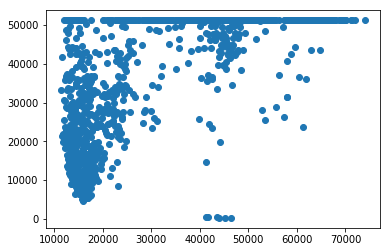

In [18]:
y_train_test_weather = model.predict(X_train_weather)
plt.scatter(y_train_test_weather,y_train)
mse = mean_squared_error(y_train_test_weather, y_train)
print mse

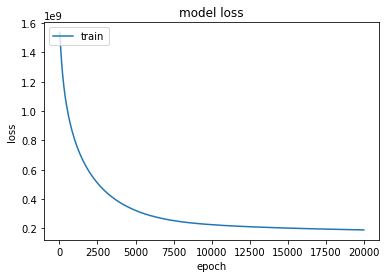

In [19]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Stationary Model 

In [20]:

# Splitting the dataset into the Training set and Test set
#X_train, X_test, y_train, y_test = train_test_split(Stationary, Wearable, test_size = 0.2, random_state = 0)
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

# Initialising the ANN
model2 = Sequential()

# Adding the input layer and the first hidden layer
model2.add(Dense(32, activation = 'relu', input_dim = 6))

# Adding the second hidden layer
model2.add(Dense(units = 32, activation = 'relu'))

# Adding the third hidden layer
model2.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer

model2.add(Dense(units = 6))

adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.001, amsgrad=False)
# Compiling the ANN
model2.compile(optimizer = adam , loss = 'mean_squared_error')

# Fitting the ANN to the Training set
history = model2.fit(X_train_stationary, y_train, batch_size = 16, epochs = 20000)

Epoch 1/20000
192/192 [==============================] - 0s 2ms/step - loss: 1538009322.6667
Epoch 2/20000
192/192 [==============================] - 0s 104us/step - loss: 1537992288.0000
Epoch 3/20000
192/192 [==============================] - 0s 112us/step - loss: 1537967637.3333
Epoch 4/20000
192/192 [==============================] - 0s 104us/step - loss: 1537926357.3333
Epoch 5/20000
192/192 [==============================] - 0s 108us/step - loss: 1537859018.6667
Epoch 6/20000
192/192 [==============================] - 0s 105us/step - loss: 1537739402.6667
Epoch 7/20000
192/192 [==============================] - 0s 101us/step - loss: 1537524714.6667
Epoch 8/20000
192/192 [==============================] - 0s 101us/step - loss: 1537177173.3333
Epoch 9/20000
192/192 [==============================] - 0s 101us/step - loss: 1536634176.0000
Epoch 10/20000
192/192 [==============================] - 0s 97us/step - loss: 1535818016.0000
Epoch 11/20000
192/192 [============================

192/192 [==============================] - 0s 104us/step - loss: 243982262.6667
Epoch 87/20000
192/192 [==============================] - 0s 104us/step - loss: 243765901.3333
Epoch 88/20000
192/192 [==============================] - 0s 100us/step - loss: 243574812.0000
Epoch 89/20000
192/192 [==============================] - 0s 100us/step - loss: 243491051.3333
Epoch 90/20000
192/192 [==============================] - 0s 107us/step - loss: 243176818.6667
Epoch 91/20000
192/192 [==============================] - 0s 103us/step - loss: 243043914.6667
Epoch 92/20000
192/192 [==============================] - 0s 99us/step - loss: 242808284.6667
Epoch 93/20000
192/192 [==============================] - 0s 102us/step - loss: 242661812.6667
Epoch 94/20000
192/192 [==============================] - 0s 108us/step - loss: 242521896.0000
Epoch 95/20000
192/192 [==============================] - 0s 101us/step - loss: 242405120.0000
Epoch 96/20000
192/192 [==============================] - 0s 97us/

192/192 [==============================] - 0s 98us/step - loss: 233754804.6667
Epoch 173/20000
192/192 [==============================] - 0s 101us/step - loss: 233517430.6667
Epoch 174/20000
192/192 [==============================] - 0s 96us/step - loss: 233373390.6667
Epoch 175/20000
192/192 [==============================] - 0s 96us/step - loss: 233291448.0000
Epoch 176/20000
192/192 [==============================] - 0s 106us/step - loss: 233232080.6667
Epoch 177/20000
192/192 [==============================] - 0s 101us/step - loss: 233094837.3333
Epoch 178/20000
192/192 [==============================] - 0s 99us/step - loss: 233055396.6667
Epoch 179/20000
192/192 [==============================] - 0s 105us/step - loss: 232915290.6667
Epoch 180/20000
192/192 [==============================] - 0s 96us/step - loss: 232824116.0000
Epoch 181/20000
192/192 [==============================] - 0s 102us/step - loss: 232698682.0000
Epoch 182/20000
192/192 [==============================] - 0s

Epoch 258/20000
192/192 [==============================] - 0s 97us/step - loss: 225713277.3333
Epoch 259/20000
192/192 [==============================] - 0s 101us/step - loss: 225619930.6667
Epoch 260/20000
192/192 [==============================] - 0s 104us/step - loss: 225525765.3333
Epoch 261/20000
192/192 [==============================] - 0s 104us/step - loss: 225467588.0000
Epoch 262/20000
192/192 [==============================] - 0s 110us/step - loss: 225354630.6667
Epoch 263/20000
192/192 [==============================] - 0s 103us/step - loss: 225281568.6667
Epoch 264/20000
192/192 [==============================] - 0s 103us/step - loss: 225172296.0000
Epoch 265/20000
192/192 [==============================] - 0s 105us/step - loss: 225127282.0000
Epoch 266/20000
192/192 [==============================] - 0s 116us/step - loss: 224966468.0000
Epoch 267/20000
192/192 [==============================] - 0s 103us/step - loss: 224872381.3333
Epoch 268/20000
192/192 [================

192/192 [==============================] - 0s 102us/step - loss: 217770757.3333
Epoch 344/20000
192/192 [==============================] - 0s 106us/step - loss: 217702628.0000
Epoch 345/20000
192/192 [==============================] - 0s 108us/step - loss: 217615607.3333
Epoch 346/20000
192/192 [==============================] - 0s 101us/step - loss: 217507592.0000
Epoch 347/20000
192/192 [==============================] - 0s 102us/step - loss: 217398800.0000
Epoch 348/20000
192/192 [==============================] - 0s 104us/step - loss: 217331172.0000
Epoch 349/20000
192/192 [==============================] - 0s 103us/step - loss: 217218452.6667
Epoch 350/20000
192/192 [==============================] - 0s 103us/step - loss: 217146905.3333
Epoch 351/20000
192/192 [==============================] - 0s 98us/step - loss: 217055412.6667
Epoch 352/20000
192/192 [==============================] - 0s 102us/step - loss: 216971578.6667
Epoch 353/20000
192/192 [==============================] 

192/192 [==============================] - 0s 99us/step - loss: 211063241.3333
Epoch 429/20000
192/192 [==============================] - 0s 100us/step - loss: 210988996.0000
Epoch 430/20000
192/192 [==============================] - 0s 97us/step - loss: 210915408.0000
Epoch 431/20000
192/192 [==============================] - 0s 102us/step - loss: 210849029.3333
Epoch 432/20000
192/192 [==============================] - 0s 97us/step - loss: 210793614.6667
Epoch 433/20000
192/192 [==============================] - 0s 101us/step - loss: 210726694.6667
Epoch 434/20000
192/192 [==============================] - 0s 133us/step - loss: 210696867.3333
Epoch 435/20000
192/192 [==============================] - 0s 117us/step - loss: 210590611.3333
Epoch 436/20000
192/192 [==============================] - 0s 156us/step - loss: 210512204.6667
Epoch 437/20000
192/192 [==============================] - 0s 111us/step - loss: 210459094.6667
Epoch 438/20000
192/192 [==============================] - 

192/192 [==============================] - 0s 104us/step - loss: 205772083.3333
Epoch 514/20000
192/192 [==============================] - 0s 99us/step - loss: 205735816.0000
Epoch 515/20000
192/192 [==============================] - 0s 102us/step - loss: 205647430.0000
Epoch 516/20000
192/192 [==============================] - 0s 101us/step - loss: 205621249.3333
Epoch 517/20000
192/192 [==============================] - 0s 101us/step - loss: 205549312.0000
Epoch 518/20000
192/192 [==============================] - 0s 103us/step - loss: 205479637.3333
Epoch 519/20000
192/192 [==============================] - 0s 100us/step - loss: 205447776.6667
Epoch 520/20000
192/192 [==============================] - 0s 108us/step - loss: 205357176.6667
Epoch 521/20000
192/192 [==============================] - 0s 102us/step - loss: 205339046.0000
Epoch 522/20000
192/192 [==============================] - 0s 102us/step - loss: 205265886.6667
Epoch 523/20000
192/192 [==============================] 

192/192 [==============================] - 0s 96us/step - loss: 200986748.6667
Epoch 599/20000
192/192 [==============================] - 0s 102us/step - loss: 200944188.6667
Epoch 600/20000
192/192 [==============================] - 0s 103us/step - loss: 200878254.0000
Epoch 601/20000
192/192 [==============================] - 0s 100us/step - loss: 200808541.3333
Epoch 602/20000
192/192 [==============================] - 0s 102us/step - loss: 200760332.6667
Epoch 603/20000
192/192 [==============================] - 0s 99us/step - loss: 200709107.3333
Epoch 604/20000
192/192 [==============================] - 0s 100us/step - loss: 200646362.0000
Epoch 605/20000
192/192 [==============================] - 0s 97us/step - loss: 200605749.3333
Epoch 606/20000
192/192 [==============================] - 0s 105us/step - loss: 200535845.3333
Epoch 607/20000
192/192 [==============================] - 0s 102us/step - loss: 200485494.6667
Epoch 608/20000
192/192 [==============================] - 

192/192 [==============================] - 0s 102us/step - loss: 196427088.6667
Epoch 684/20000
192/192 [==============================] - 0s 103us/step - loss: 196365668.0000
Epoch 685/20000
192/192 [==============================] - 0s 101us/step - loss: 196361906.0000
Epoch 686/20000
192/192 [==============================] - 0s 102us/step - loss: 196272215.3333
Epoch 687/20000
192/192 [==============================] - 0s 97us/step - loss: 196233465.3333
Epoch 688/20000
192/192 [==============================] - 0s 100us/step - loss: 196178504.0000
Epoch 689/20000
192/192 [==============================] - 0s 100us/step - loss: 196134300.0000
Epoch 690/20000
192/192 [==============================] - 0s 102us/step - loss: 196080724.0000
Epoch 691/20000
192/192 [==============================] - 0s 103us/step - loss: 196033045.3333
Epoch 692/20000
192/192 [==============================] - 0s 94us/step - loss: 195980912.6667
Epoch 693/20000
192/192 [==============================] -

192/192 [==============================] - 0s 106us/step - loss: 192287482.0000
Epoch 769/20000
192/192 [==============================] - 0s 98us/step - loss: 192223893.3333
Epoch 770/20000
192/192 [==============================] - 0s 100us/step - loss: 192180266.6667
Epoch 771/20000
192/192 [==============================] - 0s 104us/step - loss: 192135298.0000
Epoch 772/20000
192/192 [==============================] - 0s 101us/step - loss: 192097274.0000
Epoch 773/20000
192/192 [==============================] - 0s 101us/step - loss: 192041008.0000
Epoch 774/20000
192/192 [==============================] - 0s 105us/step - loss: 192006154.0000
Epoch 775/20000
192/192 [==============================] - 0s 107us/step - loss: 191952416.0000
Epoch 776/20000
192/192 [==============================] - 0s 105us/step - loss: 191912070.6667
Epoch 777/20000
192/192 [==============================] - 0s 105us/step - loss: 191852458.0000
Epoch 778/20000
192/192 [==============================] 

192/192 [==============================] - 0s 114us/step - loss: 188582264.0000
Epoch 854/20000
192/192 [==============================] - 0s 115us/step - loss: 188524213.3333
Epoch 855/20000
192/192 [==============================] - 0s 108us/step - loss: 188483214.0000
Epoch 856/20000
192/192 [==============================] - 0s 112us/step - loss: 188451046.6667
Epoch 857/20000
192/192 [==============================] - 0s 105us/step - loss: 188421556.0000
Epoch 858/20000
192/192 [==============================] - 0s 106us/step - loss: 188362624.0000
Epoch 859/20000
192/192 [==============================] - 0s 109us/step - loss: 188338461.3333
Epoch 860/20000
192/192 [==============================] - 0s 113us/step - loss: 188280910.6667
Epoch 861/20000
192/192 [==============================] - 0s 113us/step - loss: 188251850.0000
Epoch 862/20000
192/192 [==============================] - 0s 103us/step - loss: 188214813.3333
Epoch 863/20000
192/192 [==============================]

192/192 [==============================] - 0s 104us/step - loss: 185325724.6667
Epoch 939/20000
192/192 [==============================] - 0s 104us/step - loss: 185266971.6667
Epoch 940/20000
192/192 [==============================] - 0s 103us/step - loss: 185239237.3333
Epoch 941/20000
192/192 [==============================] - 0s 104us/step - loss: 185196361.3333
Epoch 942/20000
192/192 [==============================] - 0s 107us/step - loss: 185165618.0000
Epoch 943/20000
192/192 [==============================] - 0s 106us/step - loss: 185132914.0000
Epoch 944/20000
192/192 [==============================] - 0s 104us/step - loss: 185085414.6667
Epoch 945/20000
192/192 [==============================] - 0s 102us/step - loss: 185050376.6667
Epoch 946/20000
192/192 [==============================] - 0s 98us/step - loss: 185019280.0000
Epoch 947/20000
192/192 [==============================] - 0s 106us/step - loss: 184986778.0000
Epoch 948/20000
192/192 [==============================] 

192/192 [==============================] - 0s 124us/step - loss: 182524336.0000
Epoch 1024/20000
192/192 [==============================] - 0s 108us/step - loss: 182483850.0000
Epoch 1025/20000
192/192 [==============================] - 0s 97us/step - loss: 182453820.0000
Epoch 1026/20000
192/192 [==============================] - 0s 111us/step - loss: 182426314.0000
Epoch 1027/20000
192/192 [==============================] - 0s 102us/step - loss: 182393068.0000
Epoch 1028/20000
192/192 [==============================] - 0s 99us/step - loss: 182365880.0000
Epoch 1029/20000
192/192 [==============================] - 0s 97us/step - loss: 182345123.3333
Epoch 1030/20000
192/192 [==============================] - 0s 97us/step - loss: 182305020.6667
Epoch 1031/20000
192/192 [==============================] - 0s 99us/step - loss: 182275856.0000
Epoch 1032/20000
192/192 [==============================] - 0s 101us/step - loss: 182244804.6667
Epoch 1033/20000
192/192 [==========================

192/192 [==============================] - 0s 114us/step - loss: 180102273.3333
Epoch 1108/20000
192/192 [==============================] - 0s 112us/step - loss: 180077040.0000
Epoch 1109/20000
192/192 [==============================] - 0s 116us/step - loss: 180050985.3333
Epoch 1110/20000
192/192 [==============================] - 0s 98us/step - loss: 180027442.6667
Epoch 1111/20000
192/192 [==============================] - 0s 101us/step - loss: 180006356.6667
Epoch 1112/20000
192/192 [==============================] - 0s 126us/step - loss: 179973948.0000
Epoch 1113/20000
192/192 [==============================] - 0s 121us/step - loss: 179952830.0000
Epoch 1114/20000
192/192 [==============================] - 0s 108us/step - loss: 179924812.0000
Epoch 1115/20000
192/192 [==============================] - 0s 101us/step - loss: 179895448.0000
Epoch 1116/20000
192/192 [==============================] - 0s 100us/step - loss: 179870501.3333
Epoch 1117/20000
192/192 [======================

192/192 [==============================] - 0s 111us/step - loss: 178149202.0000
Epoch 1192/20000
192/192 [==============================] - 0s 102us/step - loss: 178127781.3333
Epoch 1193/20000
192/192 [==============================] - 0s 102us/step - loss: 178105520.0000
Epoch 1194/20000
192/192 [==============================] - 0s 104us/step - loss: 178085812.0000
Epoch 1195/20000
192/192 [==============================] - 0s 103us/step - loss: 178065452.6667
Epoch 1196/20000
192/192 [==============================] - 0s 107us/step - loss: 178037987.3333
Epoch 1197/20000
192/192 [==============================] - 0s 103us/step - loss: 178029514.6667
Epoch 1198/20000
192/192 [==============================] - 0s 103us/step - loss: 177997333.3333
Epoch 1199/20000
192/192 [==============================] - 0s 106us/step - loss: 177989269.3333
Epoch 1200/20000
192/192 [==============================] - 0s 102us/step - loss: 177952072.0000
Epoch 1201/20000
192/192 [=====================

192/192 [==============================] - 0s 99us/step - loss: 176420331.3333
Epoch 1277/20000
192/192 [==============================] - 0s 108us/step - loss: 176399043.3333
Epoch 1278/20000
192/192 [==============================] - 0s 103us/step - loss: 176379024.0000
Epoch 1279/20000
192/192 [==============================] - 0s 139us/step - loss: 176361146.6667
Epoch 1280/20000
192/192 [==============================] - 0s 113us/step - loss: 176344125.3333
Epoch 1281/20000
192/192 [==============================] - 0s 133us/step - loss: 176323406.6667
Epoch 1282/20000
192/192 [==============================] - 0s 121us/step - loss: 176307496.0000
Epoch 1283/20000
192/192 [==============================] - 0s 118us/step - loss: 176294633.3333
Epoch 1284/20000
192/192 [==============================] - 0s 99us/step - loss: 176267484.6667
Epoch 1285/20000
192/192 [==============================] - 0s 107us/step - loss: 176257968.6667
Epoch 1286/20000
192/192 [=======================

192/192 [==============================] - 0s 102us/step - loss: 174961398.6667
Epoch 1361/20000
192/192 [==============================] - 0s 101us/step - loss: 174940250.6667
Epoch 1362/20000
192/192 [==============================] - 0s 103us/step - loss: 174921582.6667
Epoch 1363/20000
192/192 [==============================] - 0s 99us/step - loss: 174917105.3333
Epoch 1364/20000
192/192 [==============================] - 0s 99us/step - loss: 174895971.3333
Epoch 1365/20000
192/192 [==============================] - 0s 95us/step - loss: 174882025.3333
Epoch 1366/20000
192/192 [==============================] - 0s 96us/step - loss: 174864874.6667
Epoch 1367/20000
192/192 [==============================] - 0s 102us/step - loss: 174851519.3333
Epoch 1368/20000
192/192 [==============================] - 0s 104us/step - loss: 174837801.3333
Epoch 1369/20000
192/192 [==============================] - 0s 101us/step - loss: 174825093.3333
Epoch 1370/20000
192/192 [=========================

192/192 [==============================] - 0s 101us/step - loss: 173817721.3333
Epoch 1445/20000
192/192 [==============================] - 0s 101us/step - loss: 173804080.6667
Epoch 1446/20000
192/192 [==============================] - 0s 100us/step - loss: 173799862.0000
Epoch 1447/20000
192/192 [==============================] - 0s 109us/step - loss: 173793380.0000
Epoch 1448/20000
192/192 [==============================] - 0s 99us/step - loss: 173769031.3333
Epoch 1449/20000
192/192 [==============================] - 0s 98us/step - loss: 173753271.3333
Epoch 1450/20000
192/192 [==============================] - 0s 97us/step - loss: 173742214.6667
Epoch 1451/20000
192/192 [==============================] - 0s 88us/step - loss: 173733158.6667
Epoch 1452/20000
192/192 [==============================] - 0s 90us/step - loss: 173727023.3333
Epoch 1453/20000
192/192 [==============================] - 0s 91us/step - loss: 173711582.0000
Epoch 1454/20000
192/192 [===========================

192/192 [==============================] - 0s 102us/step - loss: 172858836.0000
Epoch 1529/20000
192/192 [==============================] - 0s 102us/step - loss: 172852398.6667
Epoch 1530/20000
192/192 [==============================] - 0s 98us/step - loss: 172842817.3333
Epoch 1531/20000
192/192 [==============================] - 0s 102us/step - loss: 172822056.6667
Epoch 1532/20000
192/192 [==============================] - 0s 98us/step - loss: 172815354.6667
Epoch 1533/20000
192/192 [==============================] - 0s 102us/step - loss: 172808056.6667
Epoch 1534/20000
192/192 [==============================] - 0s 100us/step - loss: 172799734.0000
Epoch 1535/20000
192/192 [==============================] - 0s 103us/step - loss: 172789884.6667
Epoch 1536/20000
192/192 [==============================] - 0s 102us/step - loss: 172774446.0000
Epoch 1537/20000
192/192 [==============================] - 0s 101us/step - loss: 172768770.0000
Epoch 1538/20000
192/192 [=======================

Epoch 1613/20000
192/192 [==============================] - 0s 101us/step - loss: 172041144.0000
Epoch 1614/20000
192/192 [==============================] - 0s 105us/step - loss: 172039338.6667
Epoch 1615/20000
192/192 [==============================] - 0s 103us/step - loss: 172024284.0000
Epoch 1616/20000
192/192 [==============================] - 0s 113us/step - loss: 172014747.3333
Epoch 1617/20000
192/192 [==============================] - 0s 105us/step - loss: 172006246.6667
Epoch 1618/20000
192/192 [==============================] - 0s 99us/step - loss: 171998731.3333
Epoch 1619/20000
192/192 [==============================] - 0s 97us/step - loss: 171986648.0000
Epoch 1620/20000
192/192 [==============================] - 0s 100us/step - loss: 171985778.6667
Epoch 1621/20000
192/192 [==============================] - 0s 98us/step - loss: 171967314.6667
Epoch 1622/20000
192/192 [==============================] - 0s 100us/step - loss: 171962463.3333
Epoch 1623/20000
192/192 [=======

192/192 [==============================] - 0s 102us/step - loss: 171333074.6667
Epoch 1698/20000
192/192 [==============================] - 0s 105us/step - loss: 171315470.6667
Epoch 1699/20000
192/192 [==============================] - 0s 102us/step - loss: 171309816.6667
Epoch 1700/20000
192/192 [==============================] - 0s 105us/step - loss: 171300067.3333
Epoch 1701/20000
192/192 [==============================] - 0s 143us/step - loss: 171290504.6667
Epoch 1702/20000
192/192 [==============================] - 0s 111us/step - loss: 171286689.3333
Epoch 1703/20000
192/192 [==============================] - 0s 103us/step - loss: 171278744.0000
Epoch 1704/20000
192/192 [==============================] - 0s 95us/step - loss: 171264242.0000
Epoch 1705/20000
192/192 [==============================] - 0s 102us/step - loss: 171266849.3333
Epoch 1706/20000
192/192 [==============================] - 0s 97us/step - loss: 171252338.0000
Epoch 1707/20000
192/192 [=======================

192/192 [==============================] - 0s 128us/step - loss: 170670186.0000
Epoch 1782/20000
192/192 [==============================] - 0s 117us/step - loss: 170662519.3333
Epoch 1783/20000
192/192 [==============================] - 0s 108us/step - loss: 170657422.6667
Epoch 1784/20000
192/192 [==============================] - 0s 107us/step - loss: 170648050.0000
Epoch 1785/20000
192/192 [==============================] - 0s 112us/step - loss: 170643563.6667
Epoch 1786/20000
192/192 [==============================] - 0s 97us/step - loss: 170635800.6667
Epoch 1787/20000
192/192 [==============================] - 0s 103us/step - loss: 170627615.3333
Epoch 1788/20000
192/192 [==============================] - 0s 105us/step - loss: 170620906.6667
Epoch 1789/20000
192/192 [==============================] - 0s 123us/step - loss: 170613711.3333
Epoch 1790/20000
192/192 [==============================] - 0s 97us/step - loss: 170607976.0000
Epoch 1791/20000
192/192 [=======================

192/192 [==============================] - 0s 102us/step - loss: 170077568.0000
Epoch 1866/20000
192/192 [==============================] - 0s 103us/step - loss: 170070624.0000
Epoch 1867/20000
192/192 [==============================] - 0s 131us/step - loss: 170061112.0000
Epoch 1868/20000
192/192 [==============================] - 0s 129us/step - loss: 170055627.3333
Epoch 1869/20000
192/192 [==============================] - 0s 131us/step - loss: 170046866.6667
Epoch 1870/20000
192/192 [==============================] - 0s 136us/step - loss: 170039387.3333
Epoch 1871/20000
192/192 [==============================] - 0s 125us/step - loss: 170038395.3333
Epoch 1872/20000
192/192 [==============================] - 0s 112us/step - loss: 170027920.0000
Epoch 1873/20000
192/192 [==============================] - 0s 114us/step - loss: 170018746.6667
Epoch 1874/20000
192/192 [==============================] - 0s 112us/step - loss: 170010040.0000
Epoch 1875/20000
192/192 [=====================

192/192 [==============================] - 0s 97us/step - loss: 169499314.6667
Epoch 1951/20000
192/192 [==============================] - 0s 99us/step - loss: 169505885.3333
Epoch 1952/20000
192/192 [==============================] - 0s 100us/step - loss: 169487445.3333
Epoch 1953/20000
192/192 [==============================] - 0s 101us/step - loss: 169482729.3333
Epoch 1954/20000
192/192 [==============================] - 0s 99us/step - loss: 169471237.3333
Epoch 1955/20000
192/192 [==============================] - 0s 98us/step - loss: 169466951.3333
Epoch 1956/20000
192/192 [==============================] - 0s 98us/step - loss: 169466576.0000
Epoch 1957/20000
192/192 [==============================] - 0s 99us/step - loss: 169464860.0000
Epoch 1958/20000
192/192 [==============================] - 0s 98us/step - loss: 169445926.0000
Epoch 1959/20000
192/192 [==============================] - 0s 100us/step - loss: 169449612.0000
Epoch 1960/20000
192/192 [============================

Epoch 2035/20000
192/192 [==============================] - 0s 97us/step - loss: 168969080.6667
Epoch 2036/20000
192/192 [==============================] - 0s 98us/step - loss: 168961428.0000
Epoch 2037/20000
192/192 [==============================] - 0s 100us/step - loss: 168956662.0000
Epoch 2038/20000
192/192 [==============================] - 0s 102us/step - loss: 168950962.0000
Epoch 2039/20000
192/192 [==============================] - 0s 103us/step - loss: 168946838.0000
Epoch 2040/20000
192/192 [==============================] - 0s 97us/step - loss: 168935384.0000
Epoch 2041/20000
192/192 [==============================] - 0s 105us/step - loss: 168932438.6667
Epoch 2042/20000
192/192 [==============================] - 0s 98us/step - loss: 168923218.0000
Epoch 2043/20000
192/192 [==============================] - 0s 98us/step - loss: 168922287.3333
Epoch 2044/20000
192/192 [==============================] - 0s 100us/step - loss: 168919577.3333
Epoch 2045/20000
192/192 [=========

192/192 [==============================] - 0s 107us/step - loss: 168489870.6667
Epoch 2120/20000
192/192 [==============================] - 0s 104us/step - loss: 168481777.3333
Epoch 2121/20000
192/192 [==============================] - 0s 105us/step - loss: 168480280.0000
Epoch 2122/20000
192/192 [==============================] - 0s 103us/step - loss: 168471386.6667
Epoch 2123/20000
192/192 [==============================] - 0s 98us/step - loss: 168467924.0000
Epoch 2124/20000
192/192 [==============================] - 0s 103us/step - loss: 168463712.6667
Epoch 2125/20000
192/192 [==============================] - 0s 106us/step - loss: 168459502.6667
Epoch 2126/20000
192/192 [==============================] - 0s 110us/step - loss: 168457556.0000
Epoch 2127/20000
192/192 [==============================] - 0s 100us/step - loss: 168446831.3333
Epoch 2128/20000
192/192 [==============================] - 0s 106us/step - loss: 168441570.6667
Epoch 2129/20000
192/192 [======================

Epoch 2204/20000
192/192 [==============================] - 0s 98us/step - loss: 168050120.6667
Epoch 2205/20000
192/192 [==============================] - 0s 98us/step - loss: 168052554.6667
Epoch 2206/20000
192/192 [==============================] - 0s 99us/step - loss: 168046788.0000
Epoch 2207/20000
192/192 [==============================] - 0s 104us/step - loss: 168042124.0000
Epoch 2208/20000
192/192 [==============================] - 0s 102us/step - loss: 168030153.3333
Epoch 2209/20000
192/192 [==============================] - 0s 101us/step - loss: 168028848.0000
Epoch 2210/20000
192/192 [==============================] - 0s 97us/step - loss: 168028242.6667
Epoch 2211/20000
192/192 [==============================] - 0s 99us/step - loss: 168021743.3333
Epoch 2212/20000
192/192 [==============================] - 0s 100us/step - loss: 168013399.3333
Epoch 2213/20000
192/192 [==============================] - 0s 99us/step - loss: 168013649.3333
Epoch 2214/20000
192/192 [==========

192/192 [==============================] - 0s 104us/step - loss: 167663254.6667
Epoch 2289/20000
192/192 [==============================] - 0s 112us/step - loss: 167652802.6667
Epoch 2290/20000
192/192 [==============================] - 0s 107us/step - loss: 167647136.0000
Epoch 2291/20000
192/192 [==============================] - 0s 101us/step - loss: 167646784.0000
Epoch 2292/20000
192/192 [==============================] - 0s 102us/step - loss: 167641022.0000
Epoch 2293/20000
192/192 [==============================] - 0s 99us/step - loss: 167633880.6667
Epoch 2294/20000
192/192 [==============================] - 0s 112us/step - loss: 167629691.3333
Epoch 2295/20000
192/192 [==============================] - 0s 109us/step - loss: 167630541.3333
Epoch 2296/20000
192/192 [==============================] - 0s 96us/step - loss: 167621348.6667
Epoch 2297/20000
192/192 [==============================] - 0s 105us/step - loss: 167618448.6667
Epoch 2298/20000
192/192 [=======================

Epoch 2373/20000
192/192 [==============================] - 0s 101us/step - loss: 167300027.3333
Epoch 2374/20000
192/192 [==============================] - 0s 99us/step - loss: 167296075.3333
Epoch 2375/20000
192/192 [==============================] - 0s 99us/step - loss: 167292882.0000
Epoch 2376/20000
192/192 [==============================] - 0s 99us/step - loss: 167281138.6667
Epoch 2377/20000
192/192 [==============================] - 0s 99us/step - loss: 167277946.6667
Epoch 2378/20000
192/192 [==============================] - 0s 100us/step - loss: 167273438.0000
Epoch 2379/20000
192/192 [==============================] - 0s 109us/step - loss: 167271748.6667
Epoch 2380/20000
192/192 [==============================] - 0s 98us/step - loss: 167265999.3333
Epoch 2381/20000
192/192 [==============================] - 0s 99us/step - loss: 167263265.3333
Epoch 2382/20000
192/192 [==============================] - 0s 95us/step - loss: 167259560.0000
Epoch 2383/20000
192/192 [===========

192/192 [==============================] - 0s 103us/step - loss: 166964886.6667
Epoch 2458/20000
192/192 [==============================] - 0s 98us/step - loss: 166963942.6667
Epoch 2459/20000
192/192 [==============================] - 0s 102us/step - loss: 166962520.0000
Epoch 2460/20000
192/192 [==============================] - 0s 103us/step - loss: 166951138.6667
Epoch 2461/20000
192/192 [==============================] - 0s 108us/step - loss: 166951759.3333
Epoch 2462/20000
192/192 [==============================] - 0s 108us/step - loss: 166944756.6667
Epoch 2463/20000
192/192 [==============================] - 0s 108us/step - loss: 166941032.6667
Epoch 2464/20000
192/192 [==============================] - 0s 98us/step - loss: 166942382.6667
Epoch 2465/20000
192/192 [==============================] - 0s 97us/step - loss: 166934408.0000
Epoch 2466/20000
192/192 [==============================] - 0s 98us/step - loss: 166935806.0000
Epoch 2467/20000
192/192 [=========================

192/192 [==============================] - 0s 105us/step - loss: 166662974.0000
Epoch 2542/20000
192/192 [==============================] - 0s 104us/step - loss: 166669602.0000
Epoch 2543/20000
192/192 [==============================] - 0s 104us/step - loss: 166657869.3333
Epoch 2544/20000
192/192 [==============================] - 0s 118us/step - loss: 166654963.3333
Epoch 2545/20000
192/192 [==============================] - 0s 100us/step - loss: 166656590.6667
Epoch 2546/20000
192/192 [==============================] - 0s 106us/step - loss: 166645499.3333
Epoch 2547/20000
192/192 [==============================] - 0s 101us/step - loss: 166643576.0000
Epoch 2548/20000
192/192 [==============================] - 0s 97us/step - loss: 166641312.0000
Epoch 2549/20000
192/192 [==============================] - 0s 102us/step - loss: 166639424.6667
Epoch 2550/20000
192/192 [==============================] - 0s 117us/step - loss: 166639190.6667
Epoch 2551/20000
192/192 [======================

192/192 [==============================] - 0s 103us/step - loss: 166387012.0000
Epoch 2626/20000
192/192 [==============================] - 0s 101us/step - loss: 166384841.3333
Epoch 2627/20000
192/192 [==============================] - 0s 104us/step - loss: 166382630.6667
Epoch 2628/20000
192/192 [==============================] - 0s 98us/step - loss: 166380465.3333
Epoch 2629/20000
192/192 [==============================] - 0s 97us/step - loss: 166372696.0000
Epoch 2630/20000
192/192 [==============================] - 0s 99us/step - loss: 166367150.6667
Epoch 2631/20000
192/192 [==============================] - 0s 100us/step - loss: 166365410.0000
Epoch 2632/20000
192/192 [==============================] - 0s 98us/step - loss: 166361354.6667
Epoch 2633/20000
192/192 [==============================] - 0s 96us/step - loss: 166357336.0000
Epoch 2634/20000
192/192 [==============================] - 0s 101us/step - loss: 166355575.3333
Epoch 2635/20000
192/192 [==========================

Epoch 2710/20000
192/192 [==============================] - 0s 102us/step - loss: 166119792.0000
Epoch 2711/20000
192/192 [==============================] - 0s 101us/step - loss: 166114721.3333
Epoch 2712/20000
192/192 [==============================] - 0s 104us/step - loss: 166112764.0000
Epoch 2713/20000
192/192 [==============================] - 0s 98us/step - loss: 166113062.0000
Epoch 2714/20000
192/192 [==============================] - 0s 97us/step - loss: 166111866.0000
Epoch 2715/20000
192/192 [==============================] - 0s 100us/step - loss: 166104289.3333
Epoch 2716/20000
192/192 [==============================] - 0s 98us/step - loss: 166109654.6667
Epoch 2717/20000
192/192 [==============================] - 0s 97us/step - loss: 166099515.3333
Epoch 2718/20000
192/192 [==============================] - 0s 104us/step - loss: 166096947.3333
Epoch 2719/20000
192/192 [==============================] - 0s 100us/step - loss: 166092775.3333
Epoch 2720/20000
192/192 [========

192/192 [==============================] - 0s 99us/step - loss: 165879416.6667
Epoch 2795/20000
192/192 [==============================] - 0s 100us/step - loss: 165873916.0000
Epoch 2796/20000
192/192 [==============================] - 0s 99us/step - loss: 165870878.6667
Epoch 2797/20000
192/192 [==============================] - 0s 99us/step - loss: 165872522.0000
Epoch 2798/20000
192/192 [==============================] - 0s 100us/step - loss: 165864023.3333
Epoch 2799/20000
192/192 [==============================] - 0s 97us/step - loss: 165864934.6667
Epoch 2800/20000
192/192 [==============================] - 0s 105us/step - loss: 165860904.6667
Epoch 2801/20000
192/192 [==============================] - 0s 104us/step - loss: 165857693.3333
Epoch 2802/20000
192/192 [==============================] - 0s 101us/step - loss: 165858308.0000
Epoch 2803/20000
192/192 [==============================] - 0s 99us/step - loss: 165854465.3333
Epoch 2804/20000
192/192 [==========================

Epoch 2879/20000
192/192 [==============================] - 0s 99us/step - loss: 165640425.3333
Epoch 2880/20000
192/192 [==============================] - 0s 102us/step - loss: 165637548.3333
Epoch 2881/20000
192/192 [==============================] - 0s 129us/step - loss: 165640328.0000
Epoch 2882/20000
192/192 [==============================] - 0s 125us/step - loss: 165633246.6667
Epoch 2883/20000
192/192 [==============================] - 0s 97us/step - loss: 165631957.3333
Epoch 2884/20000
192/192 [==============================] - 0s 95us/step - loss: 165629334.6667
Epoch 2885/20000
192/192 [==============================] - 0s 105us/step - loss: 165625986.0000
Epoch 2886/20000
192/192 [==============================] - 0s 98us/step - loss: 165624574.0000
Epoch 2887/20000
192/192 [==============================] - 0s 111us/step - loss: 165621542.0000
Epoch 2888/20000
192/192 [==============================] - 0s 101us/step - loss: 165637942.0000
Epoch 2889/20000
192/192 [========

Epoch 2964/20000
192/192 [==============================] - 0s 101us/step - loss: 165419695.3333
Epoch 2965/20000
192/192 [==============================] - 0s 103us/step - loss: 165408849.3333
Epoch 2966/20000
192/192 [==============================] - 0s 101us/step - loss: 165407353.3333
Epoch 2967/20000
192/192 [==============================] - 0s 100us/step - loss: 165412472.0000
Epoch 2968/20000
192/192 [==============================] - 0s 98us/step - loss: 165410250.6667
Epoch 2969/20000
192/192 [==============================] - 0s 100us/step - loss: 165399774.0000
Epoch 2970/20000
192/192 [==============================] - 0s 99us/step - loss: 165395372.0000
Epoch 2971/20000
192/192 [==============================] - 0s 99us/step - loss: 165394318.0000
Epoch 2972/20000
192/192 [==============================] - 0s 99us/step - loss: 165394306.6667
Epoch 2973/20000
192/192 [==============================] - 0s 102us/step - loss: 165394364.0000
Epoch 2974/20000
192/192 [========

192/192 [==============================] - 0s 100us/step - loss: 165189460.6667
Epoch 3049/20000
192/192 [==============================] - 0s 100us/step - loss: 165189524.0000
Epoch 3050/20000
192/192 [==============================] - 0s 98us/step - loss: 165187024.6667
Epoch 3051/20000
192/192 [==============================] - 0s 103us/step - loss: 165181885.3333
Epoch 3052/20000
192/192 [==============================] - 0s 100us/step - loss: 165180260.0000
Epoch 3053/20000
192/192 [==============================] - 0s 100us/step - loss: 165180720.6667
Epoch 3054/20000
192/192 [==============================] - 0s 100us/step - loss: 165175922.0000
Epoch 3055/20000
192/192 [==============================] - 0s 97us/step - loss: 165178811.3333
Epoch 3056/20000
192/192 [==============================] - 0s 100us/step - loss: 165167288.6667
Epoch 3057/20000
192/192 [==============================] - 0s 97us/step - loss: 165168250.6667
Epoch 3058/20000
192/192 [========================

192/192 [==============================] - 0s 98us/step - loss: 164969406.0000
Epoch 3134/20000
192/192 [==============================] - 0s 97us/step - loss: 164970852.0000
Epoch 3135/20000
192/192 [==============================] - 0s 99us/step - loss: 164968170.6667
Epoch 3136/20000
192/192 [==============================] - 0s 103us/step - loss: 164963812.6667
Epoch 3137/20000
192/192 [==============================] - 0s 99us/step - loss: 164964772.6667
Epoch 3138/20000
192/192 [==============================] - 0s 97us/step - loss: 164957622.6667
Epoch 3139/20000
192/192 [==============================] - 0s 96us/step - loss: 164956683.3333
Epoch 3140/20000
192/192 [==============================] - 0s 99us/step - loss: 164954108.0000
Epoch 3141/20000
192/192 [==============================] - 0s 102us/step - loss: 164951429.3333
Epoch 3142/20000
192/192 [==============================] - 0s 102us/step - loss: 164948301.3333
Epoch 3143/20000
192/192 [============================

192/192 [==============================] - 0s 99us/step - loss: 164760670.6667
Epoch 3219/20000
192/192 [==============================] - 0s 98us/step - loss: 164759918.0000
Epoch 3220/20000
192/192 [==============================] - 0s 97us/step - loss: 164762158.6667
Epoch 3221/20000
192/192 [==============================] - 0s 101us/step - loss: 164752741.3333
Epoch 3222/20000
192/192 [==============================] - 0s 95us/step - loss: 164750192.0000
Epoch 3223/20000
192/192 [==============================] - 0s 92us/step - loss: 164749620.0000
Epoch 3224/20000
192/192 [==============================] - 0s 91us/step - loss: 164745234.0000
Epoch 3225/20000
192/192 [==============================] - 0s 92us/step - loss: 164744481.3333
Epoch 3226/20000
192/192 [==============================] - 0s 88us/step - loss: 164741880.0000
Epoch 3227/20000
192/192 [==============================] - 0s 93us/step - loss: 164738659.3333
Epoch 3228/20000
192/192 [==============================

192/192 [==============================] - 0s 103us/step - loss: 164556602.6667
Epoch 3303/20000
192/192 [==============================] - 0s 101us/step - loss: 164554763.3333
Epoch 3304/20000
192/192 [==============================] - 0s 103us/step - loss: 164551400.3333
Epoch 3305/20000
192/192 [==============================] - 0s 98us/step - loss: 164548912.6667
Epoch 3306/20000
192/192 [==============================] - 0s 101us/step - loss: 164546508.0000
Epoch 3307/20000
192/192 [==============================] - 0s 100us/step - loss: 164547452.6667
Epoch 3308/20000
192/192 [==============================] - 0s 101us/step - loss: 164542188.0000
Epoch 3309/20000
192/192 [==============================] - 0s 97us/step - loss: 164541326.0000
Epoch 3310/20000
192/192 [==============================] - 0s 96us/step - loss: 164537381.3333
Epoch 3311/20000
192/192 [==============================] - 0s 100us/step - loss: 164535169.3333
Epoch 3312/20000
192/192 [========================

Epoch 3387/20000
192/192 [==============================] - 0s 104us/step - loss: 164364700.0000
Epoch 3388/20000
192/192 [==============================] - 0s 100us/step - loss: 164353042.0000
Epoch 3389/20000
192/192 [==============================] - 0s 99us/step - loss: 164353357.3333
Epoch 3390/20000
192/192 [==============================] - 0s 100us/step - loss: 164349305.3333
Epoch 3391/20000
192/192 [==============================] - 0s 98us/step - loss: 164349100.0000
Epoch 3392/20000
192/192 [==============================] - 0s 102us/step - loss: 164345261.3333
Epoch 3393/20000
192/192 [==============================] - 0s 103us/step - loss: 164343236.0000
Epoch 3394/20000
192/192 [==============================] - 0s 100us/step - loss: 164343486.6667
Epoch 3395/20000
192/192 [==============================] - 0s 103us/step - loss: 164337425.3333
Epoch 3396/20000
192/192 [==============================] - 0s 110us/step - loss: 164335442.6667
Epoch 3397/20000
192/192 [======

192/192 [==============================] - 0s 99us/step - loss: 164168138.0000
Epoch 3472/20000
192/192 [==============================] - 0s 101us/step - loss: 164164036.6667
Epoch 3473/20000
192/192 [==============================] - 0s 94us/step - loss: 164161863.3333
Epoch 3474/20000
192/192 [==============================] - 0s 95us/step - loss: 164164570.6667
Epoch 3475/20000
192/192 [==============================] - 0s 97us/step - loss: 164166262.6667
Epoch 3476/20000
192/192 [==============================] - 0s 101us/step - loss: 164155744.0000
Epoch 3477/20000
192/192 [==============================] - 0s 96us/step - loss: 164150839.3333
Epoch 3478/20000
192/192 [==============================] - 0s 103us/step - loss: 164150192.6667
Epoch 3479/20000
192/192 [==============================] - 0s 99us/step - loss: 164147936.0000
Epoch 3480/20000
192/192 [==============================] - 0s 98us/step - loss: 164149088.0000
Epoch 3481/20000
192/192 [============================

192/192 [==============================] - 0s 103us/step - loss: 163976008.0000
Epoch 3557/20000
192/192 [==============================] - 0s 101us/step - loss: 163974088.6667
Epoch 3558/20000
192/192 [==============================] - 0s 100us/step - loss: 163970934.0000
Epoch 3559/20000
192/192 [==============================] - 0s 96us/step - loss: 163970517.3333
Epoch 3560/20000
192/192 [==============================] - 0s 97us/step - loss: 163965928.0000
Epoch 3561/20000
192/192 [==============================] - 0s 98us/step - loss: 163961816.0000
Epoch 3562/20000
192/192 [==============================] - 0s 98us/step - loss: 163964920.6667
Epoch 3563/20000
192/192 [==============================] - 0s 96us/step - loss: 163960624.6667
Epoch 3564/20000
192/192 [==============================] - 0s 98us/step - loss: 163956907.3333
Epoch 3565/20000
192/192 [==============================] - 0s 100us/step - loss: 163956610.0000
Epoch 3566/20000
192/192 [===========================

Epoch 3641/20000
192/192 [==============================] - 0s 105us/step - loss: 163787794.6667
Epoch 3642/20000
192/192 [==============================] - 0s 104us/step - loss: 163784019.3333
Epoch 3643/20000
192/192 [==============================] - 0s 100us/step - loss: 163782245.3333
Epoch 3644/20000
192/192 [==============================] - 0s 104us/step - loss: 163780085.3333
Epoch 3645/20000
192/192 [==============================] - 0s 101us/step - loss: 163778399.3333
Epoch 3646/20000
192/192 [==============================] - 0s 101us/step - loss: 163777472.6667
Epoch 3647/20000
192/192 [==============================] - 0s 98us/step - loss: 163774406.6667
Epoch 3648/20000
192/192 [==============================] - 0s 104us/step - loss: 163772598.0000
Epoch 3649/20000
192/192 [==============================] - 0s 102us/step - loss: 163768636.0000
Epoch 3650/20000
192/192 [==============================] - 0s 106us/step - loss: 163767096.6667
Epoch 3651/20000
192/192 [=====

192/192 [==============================] - 0s 100us/step - loss: 163607412.0000
Epoch 3726/20000
192/192 [==============================] - 0s 104us/step - loss: 163605386.0000
Epoch 3727/20000
192/192 [==============================] - 0s 100us/step - loss: 163602370.0000
Epoch 3728/20000
192/192 [==============================] - 0s 98us/step - loss: 163602802.6667
Epoch 3729/20000
192/192 [==============================] - 0s 103us/step - loss: 163599264.0000
Epoch 3730/20000
192/192 [==============================] - 0s 102us/step - loss: 163596108.0000
Epoch 3731/20000
192/192 [==============================] - 0s 101us/step - loss: 163593973.3333
Epoch 3732/20000
192/192 [==============================] - 0s 95us/step - loss: 163590952.0000
Epoch 3733/20000
192/192 [==============================] - 0s 94us/step - loss: 163589651.3333
Epoch 3734/20000
192/192 [==============================] - 0s 97us/step - loss: 163588288.6667
Epoch 3735/20000
192/192 [=========================

192/192 [==============================] - 0s 105us/step - loss: 163433302.0000
Epoch 3810/20000
192/192 [==============================] - 0s 107us/step - loss: 163431920.0000
Epoch 3811/20000
192/192 [==============================] - 0s 105us/step - loss: 163427261.3333
Epoch 3812/20000
192/192 [==============================] - 0s 137us/step - loss: 163425120.6667
Epoch 3813/20000
192/192 [==============================] - 0s 103us/step - loss: 163419604.0000
Epoch 3814/20000
192/192 [==============================] - 0s 99us/step - loss: 163418137.3333
Epoch 3815/20000
192/192 [==============================] - 0s 106us/step - loss: 163423665.3333
Epoch 3816/20000
192/192 [==============================] - 0s 103us/step - loss: 163413720.0000
Epoch 3817/20000
192/192 [==============================] - 0s 101us/step - loss: 163420216.0000
Epoch 3818/20000
192/192 [==============================] - 0s 110us/step - loss: 163411476.0000
Epoch 3819/20000
192/192 [======================

192/192 [==============================] - 0s 99us/step - loss: 163260964.0000
Epoch 3894/20000
192/192 [==============================] - 0s 99us/step - loss: 163256165.3333
Epoch 3895/20000
192/192 [==============================] - 0s 97us/step - loss: 163253009.3333
Epoch 3896/20000
192/192 [==============================] - 0s 101us/step - loss: 163253512.6667
Epoch 3897/20000
192/192 [==============================] - 0s 97us/step - loss: 163250846.0000
Epoch 3898/20000
192/192 [==============================] - 0s 100us/step - loss: 163260886.0000
Epoch 3899/20000
192/192 [==============================] - 0s 104us/step - loss: 163247776.0000
Epoch 3900/20000
192/192 [==============================] - 0s 98us/step - loss: 163246408.6667
Epoch 3901/20000
192/192 [==============================] - 0s 101us/step - loss: 163244086.6667
Epoch 3902/20000
192/192 [==============================] - 0s 103us/step - loss: 163242267.3333
Epoch 3903/20000
192/192 [==========================

192/192 [==============================] - 0s 102us/step - loss: 163101272.6667
Epoch 3978/20000
192/192 [==============================] - 0s 108us/step - loss: 163089462.6667
Epoch 3979/20000
192/192 [==============================] - 0s 102us/step - loss: 163089378.0000
Epoch 3980/20000
192/192 [==============================] - 0s 107us/step - loss: 163090412.6667
Epoch 3981/20000
192/192 [==============================] - 0s 105us/step - loss: 163085646.0000
Epoch 3982/20000
192/192 [==============================] - 0s 110us/step - loss: 163085186.0000
Epoch 3983/20000
192/192 [==============================] - 0s 104us/step - loss: 163081764.0000
Epoch 3984/20000
192/192 [==============================] - 0s 102us/step - loss: 163080034.6667
Epoch 3985/20000
192/192 [==============================] - 0s 100us/step - loss: 163077243.3333
Epoch 3986/20000
192/192 [==============================] - 0s 101us/step - loss: 163077914.0000
Epoch 3987/20000
192/192 [=====================

Epoch 4062/20000
192/192 [==============================] - 0s 99us/step - loss: 162926698.6667
Epoch 4063/20000
192/192 [==============================] - 0s 99us/step - loss: 162925650.0000
Epoch 4064/20000
192/192 [==============================] - 0s 99us/step - loss: 162926887.3333
Epoch 4065/20000
192/192 [==============================] - 0s 98us/step - loss: 162921625.3333
Epoch 4066/20000
192/192 [==============================] - 0s 101us/step - loss: 162920562.6667
Epoch 4067/20000
192/192 [==============================] - 0s 98us/step - loss: 162919576.6667
Epoch 4068/20000
192/192 [==============================] - 0s 96us/step - loss: 162915465.3333
Epoch 4069/20000
192/192 [==============================] - 0s 100us/step - loss: 162915556.0000
Epoch 4070/20000
192/192 [==============================] - 0s 105us/step - loss: 162915194.6667
Epoch 4071/20000
192/192 [==============================] - 0s 102us/step - loss: 162911132.6667
Epoch 4072/20000
192/192 [==========

192/192 [==============================] - 0s 101us/step - loss: 162769363.3333
Epoch 4147/20000
192/192 [==============================] - 0s 107us/step - loss: 162766437.3333
Epoch 4148/20000
192/192 [==============================] - 0s 109us/step - loss: 162762800.0000
Epoch 4149/20000
192/192 [==============================] - 0s 107us/step - loss: 162764796.6667
Epoch 4150/20000
192/192 [==============================] - 0s 106us/step - loss: 162759823.3333
Epoch 4151/20000
192/192 [==============================] - 0s 105us/step - loss: 162759812.0000
Epoch 4152/20000
192/192 [==============================] - 0s 104us/step - loss: 162761455.3333
Epoch 4153/20000
192/192 [==============================] - 0s 96us/step - loss: 162755366.6667
Epoch 4154/20000
192/192 [==============================] - 0s 111us/step - loss: 162753032.6667
Epoch 4155/20000
192/192 [==============================] - 0s 107us/step - loss: 162750082.0000
Epoch 4156/20000
192/192 [======================

192/192 [==============================] - 0s 101us/step - loss: 162614420.0000
Epoch 4231/20000
192/192 [==============================] - 0s 102us/step - loss: 162611634.6667
Epoch 4232/20000
192/192 [==============================] - 0s 101us/step - loss: 162609694.6667
Epoch 4233/20000
192/192 [==============================] - 0s 96us/step - loss: 162607697.3333
Epoch 4234/20000
192/192 [==============================] - 0s 97us/step - loss: 162605356.6667
Epoch 4235/20000
192/192 [==============================] - 0s 101us/step - loss: 162606588.0000
Epoch 4236/20000
192/192 [==============================] - 0s 103us/step - loss: 162602636.0000
Epoch 4237/20000
192/192 [==============================] - 0s 97us/step - loss: 162600529.3333
Epoch 4238/20000
192/192 [==============================] - 0s 101us/step - loss: 162600496.6667
Epoch 4239/20000
192/192 [==============================] - 0s 103us/step - loss: 162597625.3333
Epoch 4240/20000
192/192 [========================

192/192 [==============================] - 0s 97us/step - loss: 162463541.3333
Epoch 4316/20000
192/192 [==============================] - 0s 96us/step - loss: 162461618.0000
Epoch 4317/20000
192/192 [==============================] - 0s 96us/step - loss: 162458215.3333
Epoch 4318/20000
192/192 [==============================] - 0s 97us/step - loss: 162456060.0000
Epoch 4319/20000
192/192 [==============================] - 0s 96us/step - loss: 162456587.3333
Epoch 4320/20000
192/192 [==============================] - 0s 101us/step - loss: 162453536.6667
Epoch 4321/20000
192/192 [==============================] - 0s 98us/step - loss: 162452424.0000
Epoch 4322/20000
192/192 [==============================] - 0s 90us/step - loss: 162449432.6667
Epoch 4323/20000
192/192 [==============================] - 0s 137us/step - loss: 162447312.6667
Epoch 4324/20000
192/192 [==============================] - 0s 98us/step - loss: 162446702.0000
Epoch 4325/20000
192/192 [=============================

192/192 [==============================] - 0s 95us/step - loss: 162315270.6667
Epoch 4401/20000
192/192 [==============================] - 0s 100us/step - loss: 162313026.6667
Epoch 4402/20000
192/192 [==============================] - 0s 100us/step - loss: 162315054.6667
Epoch 4403/20000
192/192 [==============================] - 0s 99us/step - loss: 162311396.6667
Epoch 4404/20000
192/192 [==============================] - 0s 97us/step - loss: 162307684.0000
Epoch 4405/20000
192/192 [==============================] - 0s 99us/step - loss: 162306339.3333
Epoch 4406/20000
192/192 [==============================] - 0s 96us/step - loss: 162306328.0000
Epoch 4407/20000
192/192 [==============================] - 0s 103us/step - loss: 162302771.3333
Epoch 4408/20000
192/192 [==============================] - 0s 98us/step - loss: 162304427.3333
Epoch 4409/20000
192/192 [==============================] - 0s 101us/step - loss: 162303565.3333
Epoch 4410/20000
192/192 [===========================

192/192 [==============================] - 0s 106us/step - loss: 162174168.0000
Epoch 4486/20000
192/192 [==============================] - 0s 102us/step - loss: 162173635.3333
Epoch 4487/20000
192/192 [==============================] - 0s 100us/step - loss: 162172276.6667
Epoch 4488/20000
192/192 [==============================] - 0s 101us/step - loss: 162174498.0000
Epoch 4489/20000
192/192 [==============================] - 0s 101us/step - loss: 162166741.3333
Epoch 4490/20000
192/192 [==============================] - 0s 97us/step - loss: 162169787.3333
Epoch 4491/20000
192/192 [==============================] - 0s 104us/step - loss: 162165903.3333
Epoch 4492/20000
192/192 [==============================] - 0s 98us/step - loss: 162162796.0000
Epoch 4493/20000
192/192 [==============================] - 0s 101us/step - loss: 162160823.3333
Epoch 4494/20000
192/192 [==============================] - 0s 103us/step - loss: 162162784.0000
Epoch 4495/20000
192/192 [=======================

192/192 [==============================] - 0s 100us/step - loss: 162036752.6667
Epoch 4571/20000
192/192 [==============================] - 0s 101us/step - loss: 162035187.3333
Epoch 4572/20000
192/192 [==============================] - 0s 97us/step - loss: 162032188.0000
Epoch 4573/20000
192/192 [==============================] - 0s 101us/step - loss: 162031848.0000
Epoch 4574/20000
192/192 [==============================] - 0s 101us/step - loss: 162027882.6667
Epoch 4575/20000
192/192 [==============================] - 0s 103us/step - loss: 162030940.0000
Epoch 4576/20000
192/192 [==============================] - 0s 101us/step - loss: 162025044.0000
Epoch 4577/20000
192/192 [==============================] - 0s 102us/step - loss: 162023633.3333
Epoch 4578/20000
192/192 [==============================] - 0s 99us/step - loss: 162022552.0000
Epoch 4579/20000
192/192 [==============================] - 0s 105us/step - loss: 162025426.0000
Epoch 4580/20000
192/192 [=======================

Epoch 4655/20000
192/192 [==============================] - 0s 102us/step - loss: 161897182.0000
Epoch 4656/20000
192/192 [==============================] - 0s 109us/step - loss: 161898063.3333
Epoch 4657/20000
192/192 [==============================] - 0s 104us/step - loss: 161894115.3333
Epoch 4658/20000
192/192 [==============================] - 0s 100us/step - loss: 161892728.6667
Epoch 4659/20000
192/192 [==============================] - 0s 102us/step - loss: 161889403.3333
Epoch 4660/20000
192/192 [==============================] - 0s 104us/step - loss: 161889968.6667
Epoch 4661/20000
192/192 [==============================] - 0s 105us/step - loss: 161886897.3333
Epoch 4662/20000
192/192 [==============================] - 0s 102us/step - loss: 161885894.0000
Epoch 4663/20000
192/192 [==============================] - 0s 101us/step - loss: 161883614.0000
Epoch 4664/20000
192/192 [==============================] - 0s 101us/step - loss: 161887152.0000
Epoch 4665/20000
192/192 [====

192/192 [==============================] - 0s 100us/step - loss: 161763944.0000
Epoch 4740/20000
192/192 [==============================] - 0s 98us/step - loss: 161764185.0000
Epoch 4741/20000
192/192 [==============================] - 0s 101us/step - loss: 161763364.0000
Epoch 4742/20000
192/192 [==============================] - 0s 105us/step - loss: 161759026.6667
Epoch 4743/20000
192/192 [==============================] - 0s 96us/step - loss: 161757000.0000
Epoch 4744/20000
192/192 [==============================] - 0s 98us/step - loss: 161757040.6667
Epoch 4745/20000
192/192 [==============================] - 0s 97us/step - loss: 161761903.3333
Epoch 4746/20000
192/192 [==============================] - 0s 99us/step - loss: 161762226.0000
Epoch 4747/20000
192/192 [==============================] - 0s 103us/step - loss: 161751417.3333
Epoch 4748/20000
192/192 [==============================] - 0s 100us/step - loss: 161750774.0000
Epoch 4749/20000
192/192 [==========================

192/192 [==============================] - 0s 99us/step - loss: 161638094.0000
Epoch 4824/20000
192/192 [==============================] - 0s 111us/step - loss: 161634618.0000
Epoch 4825/20000
192/192 [==============================] - 0s 95us/step - loss: 161634046.0000
Epoch 4826/20000
192/192 [==============================] - 0s 97us/step - loss: 161631466.0000
Epoch 4827/20000
192/192 [==============================] - 0s 100us/step - loss: 161631373.3333
Epoch 4828/20000
192/192 [==============================] - 0s 103us/step - loss: 161628633.3333
Epoch 4829/20000
192/192 [==============================] - 0s 106us/step - loss: 161630136.0000
Epoch 4830/20000
192/192 [==============================] - 0s 103us/step - loss: 161624848.6667
Epoch 4831/20000
192/192 [==============================] - 0s 103us/step - loss: 161626302.6667
Epoch 4832/20000
192/192 [==============================] - 0s 115us/step - loss: 161623468.6667
Epoch 4833/20000
192/192 [========================

Epoch 4908/20000
192/192 [==============================] - 0s 101us/step - loss: 161514472.6667
Epoch 4909/20000
192/192 [==============================] - 0s 96us/step - loss: 161508215.3333
Epoch 4910/20000
192/192 [==============================] - 0s 100us/step - loss: 161505994.0000
Epoch 4911/20000
192/192 [==============================] - 0s 103us/step - loss: 161505464.0000
Epoch 4912/20000
192/192 [==============================] - 0s 100us/step - loss: 161502516.6667
Epoch 4913/20000
192/192 [==============================] - 0s 97us/step - loss: 161504640.6667
Epoch 4914/20000
192/192 [==============================] - 0s 103us/step - loss: 161500650.6667
Epoch 4915/20000
192/192 [==============================] - 0s 101us/step - loss: 161498218.6667
Epoch 4916/20000
192/192 [==============================] - 0s 102us/step - loss: 161497982.0000
Epoch 4917/20000
192/192 [==============================] - 0s 96us/step - loss: 161497421.3333
Epoch 4918/20000
192/192 [=======

192/192 [==============================] - 0s 97us/step - loss: 161385560.0000
Epoch 4993/20000
192/192 [==============================] - 0s 99us/step - loss: 161384454.6667
Epoch 4994/20000
192/192 [==============================] - 0s 100us/step - loss: 161383082.6667
Epoch 4995/20000
192/192 [==============================] - 0s 100us/step - loss: 161381116.0000
Epoch 4996/20000
192/192 [==============================] - 0s 101us/step - loss: 161380245.3333
Epoch 4997/20000
192/192 [==============================] - 0s 100us/step - loss: 161378792.3333
Epoch 4998/20000
192/192 [==============================] - 0s 101us/step - loss: 161379454.6667
Epoch 4999/20000
192/192 [==============================] - 0s 103us/step - loss: 161375214.0000
Epoch 5000/20000
192/192 [==============================] - 0s 99us/step - loss: 161374078.0000
Epoch 5001/20000
192/192 [==============================] - 0s 102us/step - loss: 161372712.6667
Epoch 5002/20000
192/192 [========================

192/192 [==============================] - 0s 102us/step - loss: 161264074.6667
Epoch 5078/20000
192/192 [==============================] - 0s 102us/step - loss: 161263372.0000
Epoch 5079/20000
192/192 [==============================] - 0s 100us/step - loss: 161261014.0000
Epoch 5080/20000
192/192 [==============================] - 0s 99us/step - loss: 161259288.3333
Epoch 5081/20000
192/192 [==============================] - 0s 97us/step - loss: 161261778.6667
Epoch 5082/20000
192/192 [==============================] - 0s 99us/step - loss: 161256501.3333
Epoch 5083/20000
192/192 [==============================] - 0s 99us/step - loss: 161258371.3333
Epoch 5084/20000
192/192 [==============================] - 0s 98us/step - loss: 161252662.6667
Epoch 5085/20000
192/192 [==============================] - 0s 100us/step - loss: 161252525.3333
Epoch 5086/20000
192/192 [==============================] - 0s 98us/step - loss: 161252008.0000
Epoch 5087/20000
192/192 [===========================

192/192 [==============================] - 0s 121us/step - loss: 161143928.0000
Epoch 5163/20000
192/192 [==============================] - 0s 102us/step - loss: 161143014.6667
Epoch 5164/20000
192/192 [==============================] - 0s 101us/step - loss: 161143330.6667
Epoch 5165/20000
192/192 [==============================] - 0s 107us/step - loss: 161140401.3333
Epoch 5166/20000
192/192 [==============================] - 0s 103us/step - loss: 161139893.3333
Epoch 5167/20000
192/192 [==============================] - 0s 98us/step - loss: 161139764.0000
Epoch 5168/20000
192/192 [==============================] - 0s 112us/step - loss: 161135738.0000
Epoch 5169/20000
192/192 [==============================] - 0s 103us/step - loss: 161137724.6667
Epoch 5170/20000
192/192 [==============================] - 0s 106us/step - loss: 161133752.6667
Epoch 5171/20000
192/192 [==============================] - 0s 104us/step - loss: 161133038.6667
Epoch 5172/20000
192/192 [======================

192/192 [==============================] - 0s 120us/step - loss: 161034598.0000
Epoch 5246/20000
192/192 [==============================] - 0s 100us/step - loss: 161030318.6667
Epoch 5247/20000
192/192 [==============================] - 0s 101us/step - loss: 161030566.6667
Epoch 5248/20000
192/192 [==============================] - 0s 102us/step - loss: 161027692.6667
Epoch 5249/20000
192/192 [==============================] - 0s 100us/step - loss: 161028852.6667
Epoch 5250/20000
192/192 [==============================] - 0s 99us/step - loss: 161024903.3333
Epoch 5251/20000
192/192 [==============================] - 0s 100us/step - loss: 161023281.3333
Epoch 5252/20000
192/192 [==============================] - 0s 104us/step - loss: 161024496.6667
Epoch 5253/20000
192/192 [==============================] - 0s 111us/step - loss: 161021088.6667
Epoch 5254/20000
192/192 [==============================] - 0s 107us/step - loss: 161018920.6667
Epoch 5255/20000
192/192 [======================

Epoch 5330/20000
192/192 [==============================] - 0s 100us/step - loss: 160921229.3333
Epoch 5331/20000
192/192 [==============================] - 0s 97us/step - loss: 160919879.3333
Epoch 5332/20000
192/192 [==============================] - 0s 101us/step - loss: 160915996.0000
Epoch 5333/20000
192/192 [==============================] - 0s 97us/step - loss: 160915080.6667
Epoch 5334/20000
192/192 [==============================] - 0s 92us/step - loss: 160913294.6667
Epoch 5335/20000
192/192 [==============================] - 0s 104us/step - loss: 160915350.6667
Epoch 5336/20000
192/192 [==============================] - 0s 99us/step - loss: 160912946.6667
Epoch 5337/20000
192/192 [==============================] - 0s 100us/step - loss: 160911796.6667
Epoch 5338/20000
192/192 [==============================] - 0s 95us/step - loss: 160909778.0000
Epoch 5339/20000
192/192 [==============================] - 0s 99us/step - loss: 160908669.3333
Epoch 5340/20000
192/192 [==========

Epoch 5415/20000
192/192 [==============================] - 0s 86us/step - loss: 160807747.3333
Epoch 5416/20000
192/192 [==============================] - 0s 90us/step - loss: 160807199.3333
Epoch 5417/20000
192/192 [==============================] - 0s 94us/step - loss: 160804014.6667
Epoch 5418/20000
192/192 [==============================] - 0s 94us/step - loss: 160805341.3333
Epoch 5419/20000
192/192 [==============================] - 0s 95us/step - loss: 160801290.6667
Epoch 5420/20000
192/192 [==============================] - 0s 91us/step - loss: 160801351.3333
Epoch 5421/20000
192/192 [==============================] - 0s 124us/step - loss: 160801698.6667
Epoch 5422/20000
192/192 [==============================] - 0s 103us/step - loss: 160798555.3333
Epoch 5423/20000
192/192 [==============================] - 0s 128us/step - loss: 160797057.3333
Epoch 5424/20000
192/192 [==============================] - 0s 112us/step - loss: 160795413.3333
Epoch 5425/20000
192/192 [==========

Epoch 5500/20000
192/192 [==============================] - 0s 98us/step - loss: 160699122.6667
Epoch 5501/20000
192/192 [==============================] - 0s 96us/step - loss: 160696724.6667
Epoch 5502/20000
192/192 [==============================] - 0s 99us/step - loss: 160694390.6667
Epoch 5503/20000
192/192 [==============================] - 0s 109us/step - loss: 160693786.6667
Epoch 5504/20000
192/192 [==============================] - 0s 95us/step - loss: 160692764.6667
Epoch 5505/20000
192/192 [==============================] - 0s 103us/step - loss: 160694007.3333
Epoch 5506/20000
192/192 [==============================] - 0s 97us/step - loss: 160690461.3333
Epoch 5507/20000
192/192 [==============================] - 0s 100us/step - loss: 160690607.3333
Epoch 5508/20000
192/192 [==============================] - 0s 108us/step - loss: 160686510.6667
Epoch 5509/20000
192/192 [==============================] - 0s 99us/step - loss: 160685001.3333
Epoch 5510/20000
192/192 [==========

192/192 [==============================] - 0s 100us/step - loss: 160590394.0000
Epoch 5585/20000
192/192 [==============================] - 0s 104us/step - loss: 160593218.0000
Epoch 5586/20000
192/192 [==============================] - 0s 107us/step - loss: 160587678.6667
Epoch 5587/20000
192/192 [==============================] - 0s 99us/step - loss: 160586996.0000
Epoch 5588/20000
192/192 [==============================] - 0s 101us/step - loss: 160587706.0000
Epoch 5589/20000
192/192 [==============================] - 0s 101us/step - loss: 160584094.0000
Epoch 5590/20000
192/192 [==============================] - 0s 104us/step - loss: 160583204.6667
Epoch 5591/20000
192/192 [==============================] - 0s 105us/step - loss: 160583528.0000
Epoch 5592/20000
192/192 [==============================] - 0s 107us/step - loss: 160580456.0000
Epoch 5593/20000
192/192 [==============================] - 0s 103us/step - loss: 160582275.3333
Epoch 5594/20000
192/192 [======================

192/192 [==============================] - 0s 98us/step - loss: 160486665.3333
Epoch 5669/20000
192/192 [==============================] - 0s 107us/step - loss: 160485543.6667
Epoch 5670/20000
192/192 [==============================] - 0s 116us/step - loss: 160483904.0000
Epoch 5671/20000
192/192 [==============================] - 0s 111us/step - loss: 160482958.6667
Epoch 5672/20000
192/192 [==============================] - 0s 107us/step - loss: 160481488.6667
Epoch 5673/20000
192/192 [==============================] - 0s 104us/step - loss: 160480214.6667
Epoch 5674/20000
192/192 [==============================] - 0s 108us/step - loss: 160482788.0000
Epoch 5675/20000
192/192 [==============================] - 0s 113us/step - loss: 160477326.6667
Epoch 5676/20000
192/192 [==============================] - 0s 113us/step - loss: 160475754.0000
Epoch 5677/20000
192/192 [==============================] - 0s 110us/step - loss: 160475317.3333
Epoch 5678/20000
192/192 [======================

192/192 [==============================] - 0s 100us/step - loss: 160385694.0000
Epoch 5754/20000
192/192 [==============================] - 0s 96us/step - loss: 160382787.3333
Epoch 5755/20000
192/192 [==============================] - 0s 97us/step - loss: 160380820.6667
Epoch 5756/20000
192/192 [==============================] - 0s 97us/step - loss: 160379624.0000
Epoch 5757/20000
192/192 [==============================] - 0s 108us/step - loss: 160379214.0000
Epoch 5758/20000
192/192 [==============================] - 0s 99us/step - loss: 160377484.0000
Epoch 5759/20000
192/192 [==============================] - 0s 99us/step - loss: 160375504.0000
Epoch 5760/20000
192/192 [==============================] - 0s 104us/step - loss: 160374606.0000
Epoch 5761/20000
192/192 [==============================] - 0s 99us/step - loss: 160373698.6667
Epoch 5762/20000
192/192 [==============================] - 0s 101us/step - loss: 160374641.3333
Epoch 5763/20000
192/192 [===========================

192/192 [==============================] - 0s 98us/step - loss: 160281950.0000
Epoch 5839/20000
192/192 [==============================] - 0s 100us/step - loss: 160278997.3333
Epoch 5840/20000
192/192 [==============================] - 0s 105us/step - loss: 160281284.6667
Epoch 5841/20000
192/192 [==============================] - 0s 99us/step - loss: 160276896.0000
Epoch 5842/20000
192/192 [==============================] - 0s 99us/step - loss: 160277574.6667
Epoch 5843/20000
192/192 [==============================] - 0s 98us/step - loss: 160287509.3333
Epoch 5844/20000
192/192 [==============================] - 0s 98us/step - loss: 160276736.0000
Epoch 5845/20000
192/192 [==============================] - 0s 101us/step - loss: 160272686.6667
Epoch 5846/20000
192/192 [==============================] - 0s 99us/step - loss: 160270686.0000
Epoch 5847/20000
192/192 [==============================] - 0s 97us/step - loss: 160269248.0000
Epoch 5848/20000
192/192 [============================

Epoch 5923/20000
192/192 [==============================] - 0s 106us/step - loss: 160181074.6667
Epoch 5924/20000
192/192 [==============================] - 0s 98us/step - loss: 160180792.0000
Epoch 5925/20000
192/192 [==============================] - 0s 106us/step - loss: 160179578.6667
Epoch 5926/20000
192/192 [==============================] - 0s 102us/step - loss: 160177734.6667
Epoch 5927/20000
192/192 [==============================] - 0s 102us/step - loss: 160178828.0000
Epoch 5928/20000
192/192 [==============================] - 0s 103us/step - loss: 160173708.0000
Epoch 5929/20000
192/192 [==============================] - 0s 105us/step - loss: 160173588.0000
Epoch 5930/20000
192/192 [==============================] - ETA: 0s - loss: 231643728.000 - 0s 110us/step - loss: 160171457.3333
Epoch 5931/20000
192/192 [==============================] - 0s 112us/step - loss: 160171394.6667
Epoch 5932/20000
192/192 [==============================] - 0s 104us/step - loss: 160170684.6667

192/192 [==============================] - 0s 94us/step - loss: 160083528.0000
Epoch 6008/20000
192/192 [==============================] - 0s 101us/step - loss: 160081912.0000
Epoch 6009/20000
192/192 [==============================] - 0s 93us/step - loss: 160080142.6667
Epoch 6010/20000
192/192 [==============================] - 0s 88us/step - loss: 160078898.0000
Epoch 6011/20000
192/192 [==============================] - 0s 88us/step - loss: 160077967.3333
Epoch 6012/20000
192/192 [==============================] - 0s 91us/step - loss: 160075981.3333
Epoch 6013/20000
192/192 [==============================] - 0s 87us/step - loss: 160076220.6667
Epoch 6014/20000
192/192 [==============================] - 0s 92us/step - loss: 160076512.6667
Epoch 6015/20000
192/192 [==============================] - 0s 98us/step - loss: 160072996.0000
Epoch 6016/20000
192/192 [==============================] - 0s 102us/step - loss: 160076230.0000
Epoch 6017/20000
192/192 [=============================

192/192 [==============================] - 0s 120us/step - loss: 159985405.3333
Epoch 6092/20000
192/192 [==============================] - 0s 131us/step - loss: 159987530.6667
Epoch 6093/20000
192/192 [==============================] - 0s 116us/step - loss: 159984186.6667
Epoch 6094/20000
192/192 [==============================] - 0s 121us/step - loss: 159983798.0000
Epoch 6095/20000
192/192 [==============================] - 0s 116us/step - loss: 159982215.3333
Epoch 6096/20000
192/192 [==============================] - 0s 97us/step - loss: 159980095.3333
Epoch 6097/20000
192/192 [==============================] - 0s 100us/step - loss: 159977913.3333
Epoch 6098/20000
192/192 [==============================] - 0s 133us/step - loss: 159982154.6667
Epoch 6099/20000
192/192 [==============================] - 0s 112us/step - loss: 159976945.3333
Epoch 6100/20000
192/192 [==============================] - 0s 105us/step - loss: 159975272.6667
Epoch 6101/20000
192/192 [======================

192/192 [==============================] - 0s 102us/step - loss: 159890111.3333
Epoch 6176/20000
192/192 [==============================] - 0s 101us/step - loss: 159888716.6667
Epoch 6177/20000
192/192 [==============================] - 0s 98us/step - loss: 159889043.3333
Epoch 6178/20000
192/192 [==============================] - 0s 101us/step - loss: 159885889.3333
Epoch 6179/20000
192/192 [==============================] - 0s 100us/step - loss: 159885210.0000
Epoch 6180/20000
192/192 [==============================] - 0s 108us/step - loss: 159883750.6667
Epoch 6181/20000
192/192 [==============================] - 0s 105us/step - loss: 159882890.6667
Epoch 6182/20000
192/192 [==============================] - 0s 101us/step - loss: 159883620.6667
Epoch 6183/20000
192/192 [==============================] - 0s 109us/step - loss: 159881493.3333
Epoch 6184/20000
192/192 [==============================] - 0s 103us/step - loss: 159881751.3333
Epoch 6185/20000
192/192 [======================

192/192 [==============================] - 0s 102us/step - loss: 159798541.3333
Epoch 6261/20000
192/192 [==============================] - 0s 103us/step - loss: 159795754.0000
Epoch 6262/20000
192/192 [==============================] - 0s 103us/step - loss: 159792532.0000
Epoch 6263/20000
192/192 [==============================] - 0s 101us/step - loss: 159792834.6667
Epoch 6264/20000
192/192 [==============================] - 0s 100us/step - loss: 159790497.3333
Epoch 6265/20000
192/192 [==============================] - 0s 97us/step - loss: 159791322.0000
Epoch 6266/20000
192/192 [==============================] - 0s 103us/step - loss: 159788921.3333
Epoch 6267/20000
192/192 [==============================] - 0s 111us/step - loss: 159788351.3333
Epoch 6268/20000
192/192 [==============================] - 0s 99us/step - loss: 159789888.6667
Epoch 6269/20000
192/192 [==============================] - 0s 104us/step - loss: 159787466.0000
Epoch 6270/20000
192/192 [=======================

192/192 [==============================] - 0s 100us/step - loss: 159703841.3333
Epoch 6346/20000
192/192 [==============================] - 0s 98us/step - loss: 159700648.6667
Epoch 6347/20000
192/192 [==============================] - 0s 97us/step - loss: 159700759.3333
Epoch 6348/20000
192/192 [==============================] - 0s 130us/step - loss: 159697988.6667
Epoch 6349/20000
192/192 [==============================] - 0s 130us/step - loss: 159698236.6667
Epoch 6350/20000
192/192 [==============================] - 0s 125us/step - loss: 159696462.0000
Epoch 6351/20000
192/192 [==============================] - 0s 151us/step - loss: 159694993.3333
Epoch 6352/20000
192/192 [==============================] - 0s 135us/step - loss: 159696119.3333
Epoch 6353/20000
192/192 [==============================] - 0s 114us/step - loss: 159693152.6667
Epoch 6354/20000
192/192 [==============================] - 0s 120us/step - loss: 159692918.0000
Epoch 6355/20000
192/192 [=======================

192/192 [==============================] - 0s 96us/step - loss: 159616774.0000
Epoch 6430/20000
192/192 [==============================] - 0s 97us/step - loss: 159610928.6667
Epoch 6431/20000
192/192 [==============================] - 0s 97us/step - loss: 159609908.6667
Epoch 6432/20000
192/192 [==============================] - 0s 97us/step - loss: 159608872.6667
Epoch 6433/20000
192/192 [==============================] - 0s 99us/step - loss: 159607483.3333
Epoch 6434/20000
192/192 [==============================] - 0s 99us/step - loss: 159607696.6667
Epoch 6435/20000
192/192 [==============================] - 0s 101us/step - loss: 159606390.0000
Epoch 6436/20000
192/192 [==============================] - 0s 100us/step - loss: 159603843.3333
Epoch 6437/20000
192/192 [==============================] - 0s 99us/step - loss: 159605027.3333
Epoch 6438/20000
192/192 [==============================] - 0s 102us/step - loss: 159601666.6667
Epoch 6439/20000
192/192 [============================

192/192 [==============================] - 0s 96us/step - loss: 159523184.0000
Epoch 6515/20000
192/192 [==============================] - 0s 97us/step - loss: 159520665.3333
Epoch 6516/20000
192/192 [==============================] - 0s 98us/step - loss: 159521218.6667
Epoch 6517/20000
192/192 [==============================] - 0s 95us/step - loss: 159519416.0000
Epoch 6518/20000
192/192 [==============================] - 0s 99us/step - loss: 159517921.3333
Epoch 6519/20000
192/192 [==============================] - 0s 98us/step - loss: 159518006.6667
Epoch 6520/20000
192/192 [==============================] - 0s 98us/step - loss: 159517430.0000
Epoch 6521/20000
192/192 [==============================] - 0s 95us/step - loss: 159514595.0000
Epoch 6522/20000
192/192 [==============================] - 0s 98us/step - loss: 159513153.3333
Epoch 6523/20000
192/192 [==============================] - 0s 103us/step - loss: 159512208.6667
Epoch 6524/20000
192/192 [==============================

192/192 [==============================] - 0s 102us/step - loss: 159434634.6667
Epoch 6600/20000
192/192 [==============================] - 0s 103us/step - loss: 159433923.3333
Epoch 6601/20000
192/192 [==============================] - 0s 99us/step - loss: 159435986.6667
Epoch 6602/20000
192/192 [==============================] - 0s 102us/step - loss: 159435804.0000
Epoch 6603/20000
192/192 [==============================] - 0s 100us/step - loss: 159430820.6667
Epoch 6604/20000
192/192 [==============================] - 0s 98us/step - loss: 159430270.6667
Epoch 6605/20000
192/192 [==============================] - 0s 106us/step - loss: 159428880.6667
Epoch 6606/20000
192/192 [==============================] - 0s 100us/step - loss: 159427302.6667
Epoch 6607/20000
192/192 [==============================] - 0s 98us/step - loss: 159426630.0000
Epoch 6608/20000
192/192 [==============================] - 0s 95us/step - loss: 159426272.6667
Epoch 6609/20000
192/192 [=========================

192/192 [==============================] - 0s 105us/step - loss: 159346920.0000
Epoch 6685/20000
192/192 [==============================] - 0s 100us/step - loss: 159345407.3333
Epoch 6686/20000
192/192 [==============================] - 0s 97us/step - loss: 159344229.3333
Epoch 6687/20000
192/192 [==============================] - 0s 99us/step - loss: 159343304.6667
Epoch 6688/20000
192/192 [==============================] - 0s 95us/step - loss: 159342220.6667
Epoch 6689/20000
192/192 [==============================] - 0s 98us/step - loss: 159341233.3333
Epoch 6690/20000
192/192 [==============================] - 0s 100us/step - loss: 159340360.0000
Epoch 6691/20000
192/192 [==============================] - 0s 104us/step - loss: 159340726.6667
Epoch 6692/20000
192/192 [==============================] - 0s 102us/step - loss: 159338438.6667
Epoch 6693/20000
192/192 [==============================] - 0s 100us/step - loss: 159337310.0000
Epoch 6694/20000
192/192 [=========================

Epoch 6769/20000
192/192 [==============================] - 0s 101us/step - loss: 159257538.0000
Epoch 6770/20000
192/192 [==============================] - 0s 96us/step - loss: 159259778.0000
Epoch 6771/20000
192/192 [==============================] - 0s 99us/step - loss: 159256646.6667
Epoch 6772/20000
192/192 [==============================] - 0s 102us/step - loss: 159255808.0000
Epoch 6773/20000
192/192 [==============================] - 0s 97us/step - loss: 159253616.6667
Epoch 6774/20000
192/192 [==============================] - 0s 103us/step - loss: 159254056.6667
Epoch 6775/20000
192/192 [==============================] - 0s 98us/step - loss: 159251984.6667
Epoch 6776/20000
192/192 [==============================] - 0s 97us/step - loss: 159251227.3333
Epoch 6777/20000
192/192 [==============================] - 0s 102us/step - loss: 159252191.3333
Epoch 6778/20000
192/192 [==============================] - 0s 101us/step - loss: 159248656.6667
Epoch 6779/20000
192/192 [=========

192/192 [==============================] - 0s 100us/step - loss: 159171611.3333
Epoch 6854/20000
192/192 [==============================] - 0s 100us/step - loss: 159170702.6667
Epoch 6855/20000
192/192 [==============================] - 0s 100us/step - loss: 159169952.6667
Epoch 6856/20000
192/192 [==============================] - 0s 99us/step - loss: 159169386.6667
Epoch 6857/20000
192/192 [==============================] - 0s 102us/step - loss: 159169020.0000
Epoch 6858/20000
192/192 [==============================] - 0s 95us/step - loss: 159167770.0000
Epoch 6859/20000
192/192 [==============================] - 0s 98us/step - loss: 159168789.3333
Epoch 6860/20000
192/192 [==============================] - 0s 99us/step - loss: 159165904.6667
Epoch 6861/20000
192/192 [==============================] - 0s 100us/step - loss: 159164612.6667
Epoch 6862/20000
192/192 [==============================] - 0s 99us/step - loss: 159164015.3333
Epoch 6863/20000
192/192 [==========================

192/192 [==============================] - 0s 98us/step - loss: 159087602.6667
Epoch 6939/20000
192/192 [==============================] - 0s 104us/step - loss: 159086198.6667
Epoch 6940/20000
192/192 [==============================] - 0s 99us/step - loss: 159085191.3333
Epoch 6941/20000
192/192 [==============================] - 0s 98us/step - loss: 159086406.6667
Epoch 6942/20000
192/192 [==============================] - 0s 100us/step - loss: 159083322.6667
Epoch 6943/20000
192/192 [==============================] - 0s 97us/step - loss: 159081819.3333
Epoch 6944/20000
192/192 [==============================] - 0s 96us/step - loss: 159080944.0000
Epoch 6945/20000
192/192 [==============================] - 0s 101us/step - loss: 159080919.3333
Epoch 6946/20000
192/192 [==============================] - 0s 99us/step - loss: 159081244.0000
Epoch 6947/20000
192/192 [==============================] - 0s 99us/step - loss: 159077601.3333
Epoch 6948/20000
192/192 [============================

192/192 [==============================] - 0s 100us/step - loss: 159001987.3333
Epoch 7024/20000
192/192 [==============================] - 0s 101us/step - loss: 159001880.0000
Epoch 7025/20000
192/192 [==============================] - 0s 98us/step - loss: 158999518.0000
Epoch 7026/20000
192/192 [==============================] - 0s 96us/step - loss: 158999892.6667
Epoch 7027/20000
192/192 [==============================] - 0s 97us/step - loss: 158998680.6667
Epoch 7028/20000
192/192 [==============================] - 0s 97us/step - loss: 158997285.3333
Epoch 7029/20000
192/192 [==============================] - 0s 98us/step - loss: 158996511.3333
Epoch 7030/20000
192/192 [==============================] - 0s 100us/step - loss: 158995225.3333
Epoch 7031/20000
192/192 [==============================] - 0s 96us/step - loss: 158994419.3333
Epoch 7032/20000
192/192 [==============================] - 0s 99us/step - loss: 158992983.3333
Epoch 7033/20000
192/192 [============================

192/192 [==============================] - 0s 97us/step - loss: 158921159.3333
Epoch 7109/20000
192/192 [==============================] - 0s 105us/step - loss: 158918472.0000
Epoch 7110/20000
192/192 [==============================] - 0s 103us/step - loss: 158916928.6667
Epoch 7111/20000
192/192 [==============================] - 0s 100us/step - loss: 158915593.3333
Epoch 7112/20000
192/192 [==============================] - 0s 96us/step - loss: 158914103.3333
Epoch 7113/20000
192/192 [==============================] - 0s 98us/step - loss: 158913979.3333
Epoch 7114/20000
192/192 [==============================] - 0s 96us/step - loss: 158914035.3333
Epoch 7115/20000
192/192 [==============================] - 0s 103us/step - loss: 158912154.6667
Epoch 7116/20000
192/192 [==============================] - 0s 100us/step - loss: 158912148.0000
Epoch 7117/20000
192/192 [==============================] - 0s 102us/step - loss: 158911211.6667
Epoch 7118/20000
192/192 [=========================

192/192 [==============================] - 0s 96us/step - loss: 158839508.0000
Epoch 7194/20000
192/192 [==============================] - 0s 98us/step - loss: 158835713.3333
Epoch 7195/20000
192/192 [==============================] - 0s 97us/step - loss: 158837830.6667
Epoch 7196/20000
192/192 [==============================] - 0s 99us/step - loss: 158833705.3333
Epoch 7197/20000
192/192 [==============================] - 0s 97us/step - loss: 158832850.0000
Epoch 7198/20000
192/192 [==============================] - 0s 102us/step - loss: 158831846.0000
Epoch 7199/20000
192/192 [==============================] - 0s 100us/step - loss: 158830745.3333
Epoch 7200/20000
192/192 [==============================] - 0s 99us/step - loss: 158830980.6667
Epoch 7201/20000
192/192 [==============================] - 0s 100us/step - loss: 158832683.3333
Epoch 7202/20000
192/192 [==============================] - 0s 99us/step - loss: 158829836.0000
Epoch 7203/20000
192/192 [============================

192/192 [==============================] - 0s 104us/step - loss: 158756505.3333
Epoch 7279/20000
192/192 [==============================] - 0s 102us/step - loss: 158755634.0000
Epoch 7280/20000
192/192 [==============================] - 0s 106us/step - loss: 158754349.3333
Epoch 7281/20000
192/192 [==============================] - 0s 100us/step - loss: 158754858.0000
Epoch 7282/20000
192/192 [==============================] - 0s 110us/step - loss: 158751799.3333
Epoch 7283/20000
192/192 [==============================] - 0s 102us/step - loss: 158750936.0000
Epoch 7284/20000
192/192 [==============================] - 0s 105us/step - loss: 158750760.0000
Epoch 7285/20000
192/192 [==============================] - 0s 106us/step - loss: 158750061.3333
Epoch 7286/20000
192/192 [==============================] - 0s 110us/step - loss: 158752274.6667
Epoch 7287/20000
192/192 [==============================] - 0s 99us/step - loss: 158748384.6667
Epoch 7288/20000
192/192 [======================

192/192 [==============================] - 0s 101us/step - loss: 158677124.6667
Epoch 7363/20000
192/192 [==============================] - 0s 98us/step - loss: 158675784.6667
Epoch 7364/20000
192/192 [==============================] - 0s 97us/step - loss: 158674059.3333
Epoch 7365/20000
192/192 [==============================] - 0s 99us/step - loss: 158672974.0000
Epoch 7366/20000
192/192 [==============================] - 0s 96us/step - loss: 158673544.6667
Epoch 7367/20000
192/192 [==============================] - 0s 98us/step - loss: 158672682.0000
Epoch 7368/20000
192/192 [==============================] - 0s 103us/step - loss: 158671632.0000
Epoch 7369/20000
192/192 [==============================] - 0s 97us/step - loss: 158670238.0000
Epoch 7370/20000
192/192 [==============================] - 0s 99us/step - loss: 158669849.3333
Epoch 7371/20000
192/192 [==============================] - 0s 101us/step - loss: 158668262.6667
Epoch 7372/20000
192/192 [============================

192/192 [==============================] - 0s 100us/step - loss: 158598933.3333
Epoch 7448/20000
192/192 [==============================] - 0s 103us/step - loss: 158598259.3333
Epoch 7449/20000
192/192 [==============================] - 0s 99us/step - loss: 158596010.0000
Epoch 7450/20000
192/192 [==============================] - 0s 99us/step - loss: 158596722.6667
Epoch 7451/20000
192/192 [==============================] - 0s 100us/step - loss: 158595685.3333
Epoch 7452/20000
192/192 [==============================] - 0s 94us/step - loss: 158596068.0000
Epoch 7453/20000
192/192 [==============================] - 0s 101us/step - loss: 158592758.6667
Epoch 7454/20000
192/192 [==============================] - 0s 99us/step - loss: 158593193.3333
Epoch 7455/20000
192/192 [==============================] - 0s 100us/step - loss: 158590919.3333
Epoch 7456/20000
192/192 [==============================] - 0s 99us/step - loss: 158589634.6667
Epoch 7457/20000
192/192 [==========================

192/192 [==============================] - 0s 97us/step - loss: 158521056.0000
Epoch 7533/20000
192/192 [==============================] - 0s 95us/step - loss: 158519512.6667
Epoch 7534/20000
192/192 [==============================] - 0s 100us/step - loss: 158518779.3333
Epoch 7535/20000
192/192 [==============================] - 0s 102us/step - loss: 158518237.3333
Epoch 7536/20000
192/192 [==============================] - 0s 98us/step - loss: 158517767.3333
Epoch 7537/20000
192/192 [==============================] - 0s 96us/step - loss: 158516990.0000
Epoch 7538/20000
192/192 [==============================] - 0s 97us/step - loss: 158515821.3333
Epoch 7539/20000
192/192 [==============================] - 0s 100us/step - loss: 158514215.3333
Epoch 7540/20000
192/192 [==============================] - 0s 102us/step - loss: 158513032.6667
Epoch 7541/20000
192/192 [==============================] - 0s 100us/step - loss: 158512564.6667
Epoch 7542/20000
192/192 [==========================

192/192 [==============================] - 0s 97us/step - loss: 158447541.3333
Epoch 7617/20000
192/192 [==============================] - 0s 99us/step - loss: 158444552.0000
Epoch 7618/20000
192/192 [==============================] - 0s 105us/step - loss: 158443288.6667
Epoch 7619/20000
192/192 [==============================] - 0s 98us/step - loss: 158445088.0000
Epoch 7620/20000
192/192 [==============================] - 0s 97us/step - loss: 158441830.6667
Epoch 7621/20000
192/192 [==============================] - 0s 98us/step - loss: 158440250.0000
Epoch 7622/20000
192/192 [==============================] - 0s 98us/step - loss: 158440177.3333
Epoch 7623/20000
192/192 [==============================] - 0s 97us/step - loss: 158439420.0000
Epoch 7624/20000
192/192 [==============================] - 0s 97us/step - loss: 158437481.3333
Epoch 7625/20000
192/192 [==============================] - 0s 98us/step - loss: 158439930.6667
Epoch 7626/20000
192/192 [==============================

192/192 [==============================] - 0s 109us/step - loss: 158370904.6667
Epoch 7702/20000
192/192 [==============================] - 0s 102us/step - loss: 158369064.6667
Epoch 7703/20000
192/192 [==============================] - 0s 103us/step - loss: 158367477.3333
Epoch 7704/20000
192/192 [==============================] - 0s 110us/step - loss: 158367333.3333
Epoch 7705/20000
192/192 [==============================] - 0s 116us/step - loss: 158368751.3333
Epoch 7706/20000
192/192 [==============================] - 0s 107us/step - loss: 158364580.6667
Epoch 7707/20000
192/192 [==============================] - 0s 98us/step - loss: 158364266.6667
Epoch 7708/20000
192/192 [==============================] - 0s 113us/step - loss: 158363391.3333
Epoch 7709/20000
192/192 [==============================] - 0s 110us/step - loss: 158361968.6667
Epoch 7710/20000
192/192 [==============================] - 0s 100us/step - loss: 158361625.3333
Epoch 7711/20000
192/192 [======================

192/192 [==============================] - 0s 100us/step - loss: 158300177.3333
Epoch 7786/20000
192/192 [==============================] - 0s 96us/step - loss: 158296150.6667
Epoch 7787/20000
192/192 [==============================] - 0s 103us/step - loss: 158294816.0000
Epoch 7788/20000
192/192 [==============================] - 0s 102us/step - loss: 158293040.0000
Epoch 7789/20000
192/192 [==============================] - 0s 106us/step - loss: 158292193.3333
Epoch 7790/20000
192/192 [==============================] - 0s 108us/step - loss: 158292654.6667
Epoch 7791/20000
192/192 [==============================] - 0s 113us/step - loss: 158291326.0000
Epoch 7792/20000
192/192 [==============================] - 0s 101us/step - loss: 158291273.3333
Epoch 7793/20000
192/192 [==============================] - 0s 106us/step - loss: 158290786.6667
Epoch 7794/20000
192/192 [==============================] - 0s 109us/step - loss: 158287742.0000
Epoch 7795/20000
192/192 [======================

192/192 [==============================] - 0s 98us/step - loss: 158220759.3333
Epoch 7871/20000
192/192 [==============================] - 0s 130us/step - loss: 158219291.3333
Epoch 7872/20000
192/192 [==============================] - 0s 96us/step - loss: 158218248.0000
Epoch 7873/20000
192/192 [==============================] - 0s 104us/step - loss: 158218781.3333
Epoch 7874/20000
192/192 [==============================] - 0s 97us/step - loss: 158217428.0000
Epoch 7875/20000
192/192 [==============================] - 0s 106us/step - loss: 158215966.6667
Epoch 7876/20000
192/192 [==============================] - 0s 111us/step - loss: 158215318.6667
Epoch 7877/20000
192/192 [==============================] - 0s 100us/step - loss: 158214966.0000
Epoch 7878/20000
192/192 [==============================] - 0s 99us/step - loss: 158214344.6667
Epoch 7879/20000
192/192 [==============================] - 0s 104us/step - loss: 158212484.0000
Epoch 7880/20000
192/192 [=========================

192/192 [==============================] - 0s 100us/step - loss: 158147728.0000
Epoch 7956/20000
192/192 [==============================] - 0s 101us/step - loss: 158145217.3333
Epoch 7957/20000
192/192 [==============================] - 0s 102us/step - loss: 158145524.0000
Epoch 7958/20000
192/192 [==============================] - 0s 101us/step - loss: 158145257.3333
Epoch 7959/20000
192/192 [==============================] - 0s 100us/step - loss: 158142894.6667
Epoch 7960/20000
192/192 [==============================] - 0s 98us/step - loss: 158143382.6667
Epoch 7961/20000
192/192 [==============================] - 0s 96us/step - loss: 158141520.6667
Epoch 7962/20000
192/192 [==============================] - 0s 100us/step - loss: 158141372.0000
Epoch 7963/20000
192/192 [==============================] - 0s 99us/step - loss: 158141967.3333
Epoch 7964/20000
192/192 [==============================] - 0s 102us/step - loss: 158139516.0000
Epoch 7965/20000
192/192 [========================

Epoch 8040/20000
192/192 [==============================] - 0s 103us/step - loss: 158074301.3333
Epoch 8041/20000
192/192 [==============================] - 0s 104us/step - loss: 158075030.0000
Epoch 8042/20000
192/192 [==============================] - 0s 101us/step - loss: 158072078.0000
Epoch 8043/20000
192/192 [==============================] - 0s 112us/step - loss: 158072204.0000
Epoch 8044/20000
192/192 [==============================] - 0s 106us/step - loss: 158070784.0000
Epoch 8045/20000
192/192 [==============================] - 0s 103us/step - loss: 158071444.6667
Epoch 8046/20000
192/192 [==============================] - 0s 153us/step - loss: 158068772.6667
Epoch 8047/20000
192/192 [==============================] - 0s 130us/step - loss: 158068498.0000
Epoch 8048/20000
192/192 [==============================] - 0s 136us/step - loss: 158067167.3333
Epoch 8049/20000
192/192 [==============================] - 0s 126us/step - loss: 158066458.0000
Epoch 8050/20000
192/192 [====

192/192 [==============================] - 0s 97us/step - loss: 158001458.6667
Epoch 8125/20000
192/192 [==============================] - 0s 103us/step - loss: 158004974.6667
Epoch 8126/20000
192/192 [==============================] - 0s 96us/step - loss: 158000914.0000
Epoch 8127/20000
192/192 [==============================] - 0s 102us/step - loss: 158002086.6667
Epoch 8128/20000
192/192 [==============================] - 0s 101us/step - loss: 157998346.0000
Epoch 8129/20000
192/192 [==============================] - 0s 97us/step - loss: 157997136.0000
Epoch 8130/20000
192/192 [==============================] - 0s 101us/step - loss: 157996650.0000
Epoch 8131/20000
192/192 [==============================] - 0s 99us/step - loss: 157996878.6667
Epoch 8132/20000
192/192 [==============================] - 0s 96us/step - loss: 157996035.3333
Epoch 8133/20000
192/192 [==============================] - 0s 97us/step - loss: 157993922.0000
Epoch 8134/20000
192/192 [===========================

192/192 [==============================] - 0s 98us/step - loss: 157933374.0000
Epoch 8209/20000
192/192 [==============================] - 0s 98us/step - loss: 157930469.3333
Epoch 8210/20000
192/192 [==============================] - 0s 100us/step - loss: 157928184.6667
Epoch 8211/20000
192/192 [==============================] - 0s 99us/step - loss: 157928822.0000
Epoch 8212/20000
192/192 [==============================] - 0s 100us/step - loss: 157927078.6667
Epoch 8213/20000
192/192 [==============================] - 0s 99us/step - loss: 157926562.6667
Epoch 8214/20000
192/192 [==============================] - 0s 97us/step - loss: 157925576.6667
Epoch 8215/20000
192/192 [==============================] - 0s 104us/step - loss: 157924913.3333
Epoch 8216/20000
192/192 [==============================] - 0s 100us/step - loss: 157923244.6667
Epoch 8217/20000
192/192 [==============================] - 0s 102us/step - loss: 157923712.6667
Epoch 8218/20000
192/192 [==========================

192/192 [==============================] - 0s 101us/step - loss: 157860098.6667
Epoch 8293/20000
192/192 [==============================] - 0s 103us/step - loss: 157859764.0000
Epoch 8294/20000
192/192 [==============================] - 0s 100us/step - loss: 157858734.0000
Epoch 8295/20000
192/192 [==============================] - 0s 100us/step - loss: 157857191.3333
Epoch 8296/20000
192/192 [==============================] - 0s 98us/step - loss: 157856213.3333
Epoch 8297/20000
192/192 [==============================] - 0s 99us/step - loss: 157855734.6667
Epoch 8298/20000
192/192 [==============================] - 0s 96us/step - loss: 157856150.0000
Epoch 8299/20000
192/192 [==============================] - 0s 100us/step - loss: 157853711.3333
Epoch 8300/20000
192/192 [==============================] - 0s 99us/step - loss: 157854786.6667
Epoch 8301/20000
192/192 [==============================] - 0s 105us/step - loss: 157852349.3333
Epoch 8302/20000
192/192 [=========================

192/192 [==============================] - 0s 102us/step - loss: 157791087.3333
Epoch 8378/20000
192/192 [==============================] - 0s 97us/step - loss: 157790038.0000
Epoch 8379/20000
192/192 [==============================] - 0s 103us/step - loss: 157788452.0000
Epoch 8380/20000
192/192 [==============================] - 0s 103us/step - loss: 157787830.0000
Epoch 8381/20000
192/192 [==============================] - 0s 103us/step - loss: 157786750.0000
Epoch 8382/20000
192/192 [==============================] - 0s 104us/step - loss: 157785945.3333
Epoch 8383/20000
192/192 [==============================] - 0s 105us/step - loss: 157785449.3333
Epoch 8384/20000
192/192 [==============================] - 0s 97us/step - loss: 157784830.6667
Epoch 8385/20000
192/192 [==============================] - 0s 102us/step - loss: 157784221.3333
Epoch 8386/20000
192/192 [==============================] - 0s 100us/step - loss: 157782464.6667
Epoch 8387/20000
192/192 [=======================

192/192 [==============================] - 0s 103us/step - loss: 157721478.6667
Epoch 8463/20000
192/192 [==============================] - 0s 99us/step - loss: 157719922.6667
Epoch 8464/20000
192/192 [==============================] - 0s 99us/step - loss: 157719669.3333
Epoch 8465/20000
192/192 [==============================] - 0s 107us/step - loss: 157721036.6667
Epoch 8466/20000
192/192 [==============================] - 0s 102us/step - loss: 157717905.3333
Epoch 8467/20000
192/192 [==============================] - 0s 98us/step - loss: 157717525.3333
Epoch 8468/20000
192/192 [==============================] - 0s 99us/step - loss: 157716461.3333
Epoch 8469/20000
192/192 [==============================] - 0s 100us/step - loss: 157716654.6667
Epoch 8470/20000
192/192 [==============================] - 0s 97us/step - loss: 157715482.0000
Epoch 8471/20000
192/192 [==============================] - 0s 100us/step - loss: 157713878.0000
Epoch 8472/20000
192/192 [==========================

192/192 [==============================] - 0s 94us/step - loss: 157652180.0000
Epoch 8548/20000
192/192 [==============================] - 0s 100us/step - loss: 157653257.3333
Epoch 8549/20000
192/192 [==============================] - 0s 98us/step - loss: 157650477.3333
Epoch 8550/20000
192/192 [==============================] - 0s 106us/step - loss: 157652894.6667
Epoch 8551/20000
192/192 [==============================] - 0s 100us/step - loss: 157648400.0000
Epoch 8552/20000
192/192 [==============================] - 0s 100us/step - loss: 157648214.6667
Epoch 8553/20000
192/192 [==============================] - 0s 100us/step - loss: 157648302.0000
Epoch 8554/20000
192/192 [==============================] - 0s 96us/step - loss: 157646760.0000
Epoch 8555/20000
192/192 [==============================] - 0s 103us/step - loss: 157645906.0000
Epoch 8556/20000
192/192 [==============================] - 0s 101us/step - loss: 157646024.0000
Epoch 8557/20000
192/192 [========================

192/192 [==============================] - 0s 97us/step - loss: 157583822.0000
Epoch 8632/20000
192/192 [==============================] - 0s 94us/step - loss: 157582993.3333
Epoch 8633/20000
192/192 [==============================] - 0s 92us/step - loss: 157582295.0000
Epoch 8634/20000
192/192 [==============================] - 0s 94us/step - loss: 157583132.6667
Epoch 8635/20000
192/192 [==============================] - 0s 94us/step - loss: 157580634.0000
Epoch 8636/20000
192/192 [==============================] - 0s 99us/step - loss: 157579702.0000
Epoch 8637/20000
192/192 [==============================] - 0s 99us/step - loss: 157578903.3333
Epoch 8638/20000
192/192 [==============================] - 0s 100us/step - loss: 157578245.3333
Epoch 8639/20000
192/192 [==============================] - 0s 98us/step - loss: 157579534.0000
Epoch 8640/20000
192/192 [==============================] - 0s 96us/step - loss: 157577052.6667
Epoch 8641/20000
192/192 [==============================

192/192 [==============================] - 0s 100us/step - loss: 157515960.0000
Epoch 8717/20000
192/192 [==============================] - 0s 97us/step - loss: 157514532.6667
Epoch 8718/20000
192/192 [==============================] - 0s 96us/step - loss: 157514924.0000
Epoch 8719/20000
192/192 [==============================] - 0s 101us/step - loss: 157513645.3333
Epoch 8720/20000
192/192 [==============================] - 0s 100us/step - loss: 157512771.3333
Epoch 8721/20000
192/192 [==============================] - 0s 97us/step - loss: 157511861.3333
Epoch 8722/20000
192/192 [==============================] - 0s 97us/step - loss: 157510660.6667
Epoch 8723/20000
192/192 [==============================] - 0s 97us/step - loss: 157512410.6667
Epoch 8724/20000
192/192 [==============================] - 0s 98us/step - loss: 157508420.0000
Epoch 8725/20000
192/192 [==============================] - 0s 101us/step - loss: 157508687.3333
Epoch 8726/20000
192/192 [===========================

192/192 [==============================] - 0s 97us/step - loss: 157446872.6667
Epoch 8802/20000
192/192 [==============================] - 0s 107us/step - loss: 157447300.6667
Epoch 8803/20000
192/192 [==============================] - 0s 96us/step - loss: 157445770.0000
Epoch 8804/20000
192/192 [==============================] - 0s 104us/step - loss: 157444904.6667
Epoch 8805/20000
192/192 [==============================] - 0s 106us/step - loss: 157444984.6667
Epoch 8806/20000
192/192 [==============================] - 0s 102us/step - loss: 157444726.0000
Epoch 8807/20000
192/192 [==============================] - 0s 97us/step - loss: 157442813.3333
Epoch 8808/20000
192/192 [==============================] - 0s 92us/step - loss: 157442422.6667
Epoch 8809/20000
192/192 [==============================] - 0s 98us/step - loss: 157442396.6667
Epoch 8810/20000
192/192 [==============================] - 0s 97us/step - loss: 157440683.3333
Epoch 8811/20000
192/192 [===========================

192/192 [==============================] - 0s 102us/step - loss: 157380050.0000
Epoch 8886/20000
192/192 [==============================] - 0s 103us/step - loss: 157382821.3333
Epoch 8887/20000
192/192 [==============================] - 0s 100us/step - loss: 157378972.6667
Epoch 8888/20000
192/192 [==============================] - 0s 103us/step - loss: 157377870.6667
Epoch 8889/20000
192/192 [==============================] - 0s 109us/step - loss: 157378437.3333
Epoch 8890/20000
192/192 [==============================] - 0s 98us/step - loss: 157377546.6667
Epoch 8891/20000
192/192 [==============================] - 0s 109us/step - loss: 157376444.0000
Epoch 8892/20000
192/192 [==============================] - 0s 107us/step - loss: 157374643.3333
Epoch 8893/20000
192/192 [==============================] - 0s 108us/step - loss: 157374000.0000
Epoch 8894/20000
192/192 [==============================] - 0s 113us/step - loss: 157373437.3333
Epoch 8895/20000
192/192 [======================

192/192 [==============================] - 0s 100us/step - loss: 157314455.3333
Epoch 8970/20000
192/192 [==============================] - 0s 96us/step - loss: 157313743.3333
Epoch 8971/20000
192/192 [==============================] - 0s 101us/step - loss: 157313326.0000
Epoch 8972/20000
192/192 [==============================] - 0s 107us/step - loss: 157310768.6667
Epoch 8973/20000
192/192 [==============================] - 0s 105us/step - loss: 157310417.3333
Epoch 8974/20000
192/192 [==============================] - 0s 120us/step - loss: 157310460.0000
Epoch 8975/20000
192/192 [==============================] - 0s 104us/step - loss: 157308957.3333
Epoch 8976/20000
192/192 [==============================] - 0s 113us/step - loss: 157308559.3333
Epoch 8977/20000
192/192 [==============================] - 0s 101us/step - loss: 157309453.3333
Epoch 8978/20000
192/192 [==============================] - 0s 102us/step - loss: 157306880.6667
Epoch 8979/20000
192/192 [======================

192/192 [==============================] - 0s 100us/step - loss: 157248416.0000
Epoch 9055/20000
192/192 [==============================] - 0s 96us/step - loss: 157247208.3333
Epoch 9056/20000
192/192 [==============================] - 0s 101us/step - loss: 157246688.6667
Epoch 9057/20000
192/192 [==============================] - 0s 97us/step - loss: 157244564.0000
Epoch 9058/20000
192/192 [==============================] - 0s 102us/step - loss: 157244822.6667
Epoch 9059/20000
192/192 [==============================] - 0s 101us/step - loss: 157243627.3333
Epoch 9060/20000
192/192 [==============================] - 0s 101us/step - loss: 157242153.3333
Epoch 9061/20000
192/192 [==============================] - 0s 100us/step - loss: 157242362.6667
Epoch 9062/20000
192/192 [==============================] - 0s 107us/step - loss: 157240848.0000
Epoch 9063/20000
192/192 [==============================] - 0s 102us/step - loss: 157240649.3333
Epoch 9064/20000
192/192 [=======================

192/192 [==============================] - 0s 98us/step - loss: 157181634.6667
Epoch 9140/20000
192/192 [==============================] - 0s 106us/step - loss: 157181061.3333
Epoch 9141/20000
192/192 [==============================] - 0s 101us/step - loss: 157179230.0000
Epoch 9142/20000
192/192 [==============================] - 0s 100us/step - loss: 157179418.0000
Epoch 9143/20000
192/192 [==============================] - 0s 100us/step - loss: 157179646.0000
Epoch 9144/20000
192/192 [==============================] - 0s 96us/step - loss: 157177792.0000
Epoch 9145/20000
192/192 [==============================] - 0s 98us/step - loss: 157176349.3333
Epoch 9146/20000
192/192 [==============================] - 0s 98us/step - loss: 157178015.3333
Epoch 9147/20000
192/192 [==============================] - 0s 99us/step - loss: 157176840.0000
Epoch 9148/20000
192/192 [==============================] - 0s 100us/step - loss: 157173902.0000
Epoch 9149/20000
192/192 [==========================

192/192 [==============================] - 0s 106us/step - loss: 157116142.6667
Epoch 9224/20000
192/192 [==============================] - 0s 112us/step - loss: 157118529.3333
Epoch 9225/20000
192/192 [==============================] - 0s 103us/step - loss: 157114868.0000
Epoch 9226/20000
192/192 [==============================] - 0s 102us/step - loss: 157114192.0000
Epoch 9227/20000
192/192 [==============================] - 0s 108us/step - loss: 157114540.3333
Epoch 9228/20000
192/192 [==============================] - 0s 98us/step - loss: 157113161.3333
Epoch 9229/20000
192/192 [==============================] - 0s 102us/step - loss: 157111999.3333
Epoch 9230/20000
192/192 [==============================] - 0s 100us/step - loss: 157111006.6667
Epoch 9231/20000
192/192 [==============================] - 0s 110us/step - loss: 157110774.0000
Epoch 9232/20000
192/192 [==============================] - 0s 97us/step - loss: 157110116.0000
Epoch 9233/20000
192/192 [=======================

192/192 [==============================] - 0s 98us/step - loss: 157053057.3333
Epoch 9308/20000
192/192 [==============================] - 0s 95us/step - loss: 157052580.0000
Epoch 9309/20000
192/192 [==============================] - 0s 98us/step - loss: 157051458.0000
Epoch 9310/20000
192/192 [==============================] - 0s 95us/step - loss: 157050913.3333
Epoch 9311/20000
192/192 [==============================] - 0s 99us/step - loss: 157050794.6667
Epoch 9312/20000
192/192 [==============================] - 0s 96us/step - loss: 157049202.0000
Epoch 9313/20000
192/192 [==============================] - 0s 100us/step - loss: 157048998.6667
Epoch 9314/20000
192/192 [==============================] - 0s 95us/step - loss: 157047987.3333
Epoch 9315/20000
192/192 [==============================] - 0s 98us/step - loss: 157046930.0000
Epoch 9316/20000
192/192 [==============================] - 0s 95us/step - loss: 157046332.0000
Epoch 9317/20000
192/192 [==============================

192/192 [==============================] - 0s 107us/step - loss: 156989779.3333
Epoch 9392/20000
192/192 [==============================] - 0s 95us/step - loss: 156988787.3333
Epoch 9393/20000
192/192 [==============================] - 0s 102us/step - loss: 156989504.0000
Epoch 9394/20000
192/192 [==============================] - 0s 96us/step - loss: 156987722.6667
Epoch 9395/20000
192/192 [==============================] - 0s 99us/step - loss: 156986382.6667
Epoch 9396/20000
192/192 [==============================] - 0s 98us/step - loss: 156985866.6667
Epoch 9397/20000
192/192 [==============================] - 0s 98us/step - loss: 156985837.3333
Epoch 9398/20000
192/192 [==============================] - 0s 100us/step - loss: 156984430.6667
Epoch 9399/20000
192/192 [==============================] - 0s 98us/step - loss: 156984076.6667
Epoch 9400/20000
192/192 [==============================] - 0s 95us/step - loss: 156984713.6667
Epoch 9401/20000
192/192 [============================

192/192 [==============================] - 0s 99us/step - loss: 156927915.3333
Epoch 9477/20000
192/192 [==============================] - 0s 109us/step - loss: 156925879.3333
Epoch 9478/20000
192/192 [==============================] - 0s 113us/step - loss: 156925317.6667
Epoch 9479/20000
192/192 [==============================] - 0s 114us/step - loss: 156924993.3333
Epoch 9480/20000
192/192 [==============================] - 0s 106us/step - loss: 156923474.0000
Epoch 9481/20000
192/192 [==============================] - 0s 111us/step - loss: 156922546.6667
Epoch 9482/20000
192/192 [==============================] - 0s 111us/step - loss: 156922002.0000
Epoch 9483/20000
192/192 [==============================] - 0s 128us/step - loss: 156922916.0000
Epoch 9484/20000
192/192 [==============================] - 0s 118us/step - loss: 156920878.0000
Epoch 9485/20000
192/192 [==============================] - 0s 113us/step - loss: 156920840.6667
Epoch 9486/20000
192/192 [======================

192/192 [==============================] - 0s 97us/step - loss: 156865985.3333
Epoch 9561/20000
192/192 [==============================] - 0s 99us/step - loss: 156864276.6667
Epoch 9562/20000
192/192 [==============================] - 0s 101us/step - loss: 156863820.0000
Epoch 9563/20000
192/192 [==============================] - 0s 99us/step - loss: 156863088.6667
Epoch 9564/20000
192/192 [==============================] - 0s 100us/step - loss: 156862218.0000
Epoch 9565/20000
192/192 [==============================] - 0s 103us/step - loss: 156861976.0000
Epoch 9566/20000
192/192 [==============================] - 0s 96us/step - loss: 156860448.0000
Epoch 9567/20000
192/192 [==============================] - 0s 99us/step - loss: 156859848.0000
Epoch 9568/20000
192/192 [==============================] - 0s 102us/step - loss: 156858942.6667
Epoch 9569/20000
192/192 [==============================] - 0s 106us/step - loss: 156858786.0000
Epoch 9570/20000
192/192 [==========================

192/192 [==============================] - 0s 97us/step - loss: 156803624.0000
Epoch 9646/20000
192/192 [==============================] - 0s 100us/step - loss: 156803901.3333
Epoch 9647/20000
192/192 [==============================] - 0s 101us/step - loss: 156806001.3333
Epoch 9648/20000
192/192 [==============================] - 0s 100us/step - loss: 156801381.3333
Epoch 9649/20000
192/192 [==============================] - 0s 107us/step - loss: 156800445.3333
Epoch 9650/20000
192/192 [==============================] - 0s 98us/step - loss: 156800709.3333
Epoch 9651/20000
192/192 [==============================] - 0s 96us/step - loss: 156799051.3333
Epoch 9652/20000
192/192 [==============================] - 0s 100us/step - loss: 156798652.6667
Epoch 9653/20000
192/192 [==============================] - 0s 102us/step - loss: 156797746.0000
Epoch 9654/20000
192/192 [==============================] - 0s 99us/step - loss: 156797031.3333
Epoch 9655/20000
192/192 [=========================

192/192 [==============================] - 0s 102us/step - loss: 156744891.3333
Epoch 9730/20000
192/192 [==============================] - 0s 98us/step - loss: 156743000.3333
Epoch 9731/20000
192/192 [==============================] - 0s 103us/step - loss: 156742405.3333
Epoch 9732/20000
192/192 [==============================] - 0s 96us/step - loss: 156741316.0000
Epoch 9733/20000
192/192 [==============================] - 0s 96us/step - loss: 156741800.0000
Epoch 9734/20000
192/192 [==============================] - 0s 100us/step - loss: 156739929.3333
Epoch 9735/20000
192/192 [==============================] - 0s 101us/step - loss: 156739331.3333
Epoch 9736/20000
192/192 [==============================] - 0s 99us/step - loss: 156739501.3333
Epoch 9737/20000
192/192 [==============================] - 0s 100us/step - loss: 156738664.0000
Epoch 9738/20000
192/192 [==============================] - 0s 99us/step - loss: 156737819.3333
Epoch 9739/20000
192/192 [==========================

192/192 [==============================] - 0s 105us/step - loss: 156684824.6667
Epoch 9815/20000
192/192 [==============================] - 0s 99us/step - loss: 156683856.0000
Epoch 9816/20000
192/192 [==============================] - 0s 98us/step - loss: 156682622.0000
Epoch 9817/20000
192/192 [==============================] - 0s 98us/step - loss: 156680760.6667
Epoch 9818/20000
192/192 [==============================] - 0s 103us/step - loss: 156680482.6667
Epoch 9819/20000
192/192 [==============================] - 0s 99us/step - loss: 156682314.6667
Epoch 9820/20000
192/192 [==============================] - 0s 97us/step - loss: 156681106.6667
Epoch 9821/20000
192/192 [==============================] - 0s 98us/step - loss: 156678977.0000
Epoch 9822/20000
192/192 [==============================] - 0s 98us/step - loss: 156681394.6667
Epoch 9823/20000
192/192 [==============================] - 0s 99us/step - loss: 156678074.6667
Epoch 9824/20000
192/192 [=============================

192/192 [==============================] - 0s 100us/step - loss: 156624202.0000
Epoch 9900/20000
192/192 [==============================] - 0s 96us/step - loss: 156623602.0000
Epoch 9901/20000
192/192 [==============================] - 0s 99us/step - loss: 156622520.0000
Epoch 9902/20000
192/192 [==============================] - 0s 101us/step - loss: 156621656.0000
Epoch 9903/20000
192/192 [==============================] - 0s 100us/step - loss: 156621497.3333
Epoch 9904/20000
192/192 [==============================] - 0s 97us/step - loss: 156622326.0000
Epoch 9905/20000
192/192 [==============================] - 0s 100us/step - loss: 156619859.3333
Epoch 9906/20000
192/192 [==============================] - 0s 100us/step - loss: 156620344.6667
Epoch 9907/20000
192/192 [==============================] - 0s 95us/step - loss: 156620008.0000
Epoch 9908/20000
192/192 [==============================] - 0s 102us/step - loss: 156617404.6667
Epoch 9909/20000
192/192 [=========================

192/192 [==============================] - 0s 103us/step - loss: 156565318.6667
Epoch 9985/20000
192/192 [==============================] - 0s 97us/step - loss: 156566181.3333
Epoch 9986/20000
192/192 [==============================] - 0s 115us/step - loss: 156563544.0000
Epoch 9987/20000
192/192 [==============================] - 0s 105us/step - loss: 156563310.3333
Epoch 9988/20000
192/192 [==============================] - 0s 97us/step - loss: 156561988.0000
Epoch 9989/20000
192/192 [==============================] - 0s 101us/step - loss: 156561441.3333
Epoch 9990/20000
192/192 [==============================] - 0s 109us/step - loss: 156561144.6667
Epoch 9991/20000
192/192 [==============================] - 0s 110us/step - loss: 156559897.3333
Epoch 9992/20000
192/192 [==============================] - 0s 108us/step - loss: 156560111.3333
Epoch 9993/20000
192/192 [==============================] - 0s 120us/step - loss: 156559288.6667
Epoch 9994/20000
192/192 [=======================

192/192 [==============================] - 0s 100us/step - loss: 156506618.0000
Epoch 10068/20000
192/192 [==============================] - 0s 98us/step - loss: 156506237.3333
Epoch 10069/20000
192/192 [==============================] - 0s 100us/step - loss: 156505685.3333
Epoch 10070/20000
192/192 [==============================] - 0s 107us/step - loss: 156504953.3333
Epoch 10071/20000
192/192 [==============================] - 0s 101us/step - loss: 156503534.0000
Epoch 10072/20000
192/192 [==============================] - 0s 102us/step - loss: 156503965.3333
Epoch 10073/20000
192/192 [==============================] - 0s 100us/step - loss: 156503716.0000
Epoch 10074/20000
192/192 [==============================] - 0s 97us/step - loss: 156503136.0000
Epoch 10075/20000
192/192 [==============================] - 0s 104us/step - loss: 156502752.6667
Epoch 10076/20000
192/192 [==============================] - 0s 98us/step - loss: 156502804.6667
Epoch 10077/20000
192/192 [==============

192/192 [==============================] - 0s 97us/step - loss: 156448972.6667
Epoch 10152/20000
192/192 [==============================] - 0s 97us/step - loss: 156448296.6667
Epoch 10153/20000
192/192 [==============================] - 0s 97us/step - loss: 156448350.6667
Epoch 10154/20000
192/192 [==============================] - 0s 93us/step - loss: 156447588.0000
Epoch 10155/20000
192/192 [==============================] - 0s 98us/step - loss: 156446900.0000
Epoch 10156/20000
192/192 [==============================] - 0s 100us/step - loss: 156445112.6667
Epoch 10157/20000
192/192 [==============================] - 0s 99us/step - loss: 156445265.3333
Epoch 10158/20000
192/192 [==============================] - 0s 100us/step - loss: 156444490.6667
Epoch 10159/20000
192/192 [==============================] - 0s 98us/step - loss: 156443463.3333
Epoch 10160/20000
192/192 [==============================] - 0s 97us/step - loss: 156442192.6667
Epoch 10161/20000
192/192 [===================

192/192 [==============================] - 0s 101us/step - loss: 156391544.6667
Epoch 10236/20000
192/192 [==============================] - 0s 97us/step - loss: 156391186.0000
Epoch 10237/20000
192/192 [==============================] - 0s 103us/step - loss: 156389758.6667
Epoch 10238/20000
192/192 [==============================] - 0s 102us/step - loss: 156389024.6667
Epoch 10239/20000
192/192 [==============================] - 0s 100us/step - loss: 156389008.0000
Epoch 10240/20000
192/192 [==============================] - 0s 100us/step - loss: 156388088.0000
Epoch 10241/20000
192/192 [==============================] - 0s 99us/step - loss: 156387894.6667
Epoch 10242/20000
192/192 [==============================] - 0s 103us/step - loss: 156386240.6667
Epoch 10243/20000
192/192 [==============================] - 0s 98us/step - loss: 156385293.3333
Epoch 10244/20000
192/192 [==============================] - 0s 101us/step - loss: 156385220.6667
Epoch 10245/20000
192/192 [==============

192/192 [==============================] - 0s 106us/step - loss: 156335394.6667
Epoch 10320/20000
192/192 [==============================] - 0s 109us/step - loss: 156333519.3333
Epoch 10321/20000
192/192 [==============================] - 0s 111us/step - loss: 156332918.6667
Epoch 10322/20000
192/192 [==============================] - 0s 100us/step - loss: 156332844.0000
Epoch 10323/20000
192/192 [==============================] - 0s 105us/step - loss: 156332657.3333
Epoch 10324/20000
192/192 [==============================] - 0s 96us/step - loss: 156332545.3333
Epoch 10325/20000
192/192 [==============================] - 0s 102us/step - loss: 156331011.3333
Epoch 10326/20000
192/192 [==============================] - 0s 107us/step - loss: 156331450.0000
Epoch 10327/20000
192/192 [==============================] - 0s 100us/step - loss: 156328771.3333
Epoch 10328/20000
192/192 [==============================] - 0s 99us/step - loss: 156328310.6667
Epoch 10329/20000
192/192 [=============

Epoch 10403/20000
192/192 [==============================] - 0s 104us/step - loss: 156279808.0000
Epoch 10404/20000
192/192 [==============================] - 0s 105us/step - loss: 156278676.0000
Epoch 10405/20000
192/192 [==============================] - 0s 115us/step - loss: 156277101.3333
Epoch 10406/20000
192/192 [==============================] - 0s 114us/step - loss: 156277256.0000
Epoch 10407/20000
192/192 [==============================] - 0s 110us/step - loss: 156276942.6667
Epoch 10408/20000
192/192 [==============================] - 0s 110us/step - loss: 156274632.0000
Epoch 10409/20000
192/192 [==============================] - 0s 120us/step - loss: 156274313.3333
Epoch 10410/20000
192/192 [==============================] - 0s 115us/step - loss: 156274748.0000
Epoch 10411/20000
192/192 [==============================] - 0s 146us/step - loss: 156272724.6667
Epoch 10412/20000
192/192 [==============================] - 0s 132us/step - loss: 156272705.3333
Epoch 10413/20000
19

192/192 [==============================] - 0s 99us/step - loss: 156224752.0000
Epoch 10487/20000
192/192 [==============================] - 0s 95us/step - loss: 156224442.0000
Epoch 10488/20000
192/192 [==============================] - 0s 97us/step - loss: 156222060.0000
Epoch 10489/20000
192/192 [==============================] - 0s 96us/step - loss: 156221718.6667
Epoch 10490/20000
192/192 [==============================] - 0s 91us/step - loss: 156220833.3333
Epoch 10491/20000
192/192 [==============================] - 0s 95us/step - loss: 156220427.3333
Epoch 10492/20000
192/192 [==============================] - 0s 96us/step - loss: 156219485.3333
Epoch 10493/20000
192/192 [==============================] - 0s 95us/step - loss: 156219052.6667
Epoch 10494/20000
192/192 [==============================] - 0s 105us/step - loss: 156218652.0000
Epoch 10495/20000
192/192 [==============================] - 0s 96us/step - loss: 156218632.0000
Epoch 10496/20000
192/192 [====================

192/192 [==============================] - 0s 100us/step - loss: 156169885.3333
Epoch 10571/20000
192/192 [==============================] - 0s 99us/step - loss: 156168552.6667
Epoch 10572/20000
192/192 [==============================] - 0s 101us/step - loss: 156168160.6667
Epoch 10573/20000
192/192 [==============================] - 0s 96us/step - loss: 156167878.6667
Epoch 10574/20000
192/192 [==============================] - 0s 104us/step - loss: 156168272.0000
Epoch 10575/20000
192/192 [==============================] - 0s 96us/step - loss: 156166861.6667
Epoch 10576/20000
192/192 [==============================] - 0s 102us/step - loss: 156165891.3333
Epoch 10577/20000
192/192 [==============================] - 0s 103us/step - loss: 156165905.3333
Epoch 10578/20000
192/192 [==============================] - 0s 104us/step - loss: 156165051.3333
Epoch 10579/20000
192/192 [==============================] - 0s 105us/step - loss: 156164196.0000
Epoch 10580/20000
192/192 [==============

192/192 [==============================] - 0s 102us/step - loss: 156115996.0000
Epoch 10655/20000
192/192 [==============================] - 0s 101us/step - loss: 156116192.6667
Epoch 10656/20000
192/192 [==============================] - 0s 99us/step - loss: 156114523.3333
Epoch 10657/20000
192/192 [==============================] - 0s 98us/step - loss: 156114714.6667
Epoch 10658/20000
192/192 [==============================] - 0s 101us/step - loss: 156114848.0000
Epoch 10659/20000
192/192 [==============================] - 0s 99us/step - loss: 156113238.3333
Epoch 10660/20000
192/192 [==============================] - 0s 99us/step - loss: 156114795.3333
Epoch 10661/20000
192/192 [==============================] - 0s 99us/step - loss: 156112571.3333
Epoch 10662/20000
192/192 [==============================] - 0s 103us/step - loss: 156110791.3333
Epoch 10663/20000
192/192 [==============================] - 0s 99us/step - loss: 156110333.3333
Epoch 10664/20000
192/192 [=================

192/192 [==============================] - 0s 107us/step - loss: 156063104.0000
Epoch 10739/20000
192/192 [==============================] - 0s 102us/step - loss: 156063821.3333
Epoch 10740/20000
192/192 [==============================] - 0s 104us/step - loss: 156062155.3333
Epoch 10741/20000
192/192 [==============================] - 0s 110us/step - loss: 156061692.0000
Epoch 10742/20000
192/192 [==============================] - 0s 101us/step - loss: 156060221.3333
Epoch 10743/20000
192/192 [==============================] - 0s 102us/step - loss: 156059362.6667
Epoch 10744/20000
192/192 [==============================] - 0s 102us/step - loss: 156058761.3333
Epoch 10745/20000
192/192 [==============================] - 0s 102us/step - loss: 156058522.6667
Epoch 10746/20000
192/192 [==============================] - 0s 101us/step - loss: 156057797.3333
Epoch 10747/20000
192/192 [==============================] - 0s 101us/step - loss: 156057162.6667
Epoch 10748/20000
192/192 [===========

192/192 [==============================] - 0s 98us/step - loss: 156012327.3333
Epoch 10823/20000
192/192 [==============================] - 0s 98us/step - loss: 156010349.3333
Epoch 10824/20000
192/192 [==============================] - 0s 106us/step - loss: 156009528.0000
Epoch 10825/20000
192/192 [==============================] - 0s 100us/step - loss: 156008315.6667
Epoch 10826/20000
192/192 [==============================] - 0s 98us/step - loss: 156008414.6667
Epoch 10827/20000
192/192 [==============================] - 0s 101us/step - loss: 156008036.6667
Epoch 10828/20000
192/192 [==============================] - 0s 99us/step - loss: 156006237.3333
Epoch 10829/20000
192/192 [==============================] - 0s 96us/step - loss: 156007310.0000
Epoch 10830/20000
192/192 [==============================] - 0s 100us/step - loss: 156005331.3333
Epoch 10831/20000
192/192 [==============================] - 0s 97us/step - loss: 156005501.3333
Epoch 10832/20000
192/192 [=================

192/192 [==============================] - 0s 101us/step - loss: 155958989.3333
Epoch 10907/20000
192/192 [==============================] - 0s 102us/step - loss: 155956760.0000
Epoch 10908/20000
192/192 [==============================] - 0s 103us/step - loss: 155956555.3333
Epoch 10909/20000
192/192 [==============================] - 0s 96us/step - loss: 155955506.6667
Epoch 10910/20000
192/192 [==============================] - 0s 102us/step - loss: 155955913.3333
Epoch 10911/20000
192/192 [==============================] - 0s 102us/step - loss: 155955983.0000
Epoch 10912/20000
192/192 [==============================] - 0s 100us/step - loss: 155953749.3333
Epoch 10913/20000
192/192 [==============================] - 0s 107us/step - loss: 155953479.3333
Epoch 10914/20000
192/192 [==============================] - 0s 96us/step - loss: 155952301.3333
Epoch 10915/20000
192/192 [==============================] - 0s 98us/step - loss: 155952186.0000
Epoch 10916/20000
192/192 [==============

192/192 [==============================] - 0s 85us/step - loss: 155904623.3333
Epoch 10991/20000
192/192 [==============================] - 0s 109us/step - loss: 155903344.6667
Epoch 10992/20000
192/192 [==============================] - 0s 109us/step - loss: 155902751.3333
Epoch 10993/20000
192/192 [==============================] - 0s 103us/step - loss: 155902771.3333
Epoch 10994/20000
192/192 [==============================] - 0s 114us/step - loss: 155902393.3333
Epoch 10995/20000
192/192 [==============================] - 0s 111us/step - loss: 155901517.3333
Epoch 10996/20000
192/192 [==============================] - 0s 122us/step - loss: 155900917.3333
Epoch 10997/20000
192/192 [==============================] - 0s 108us/step - loss: 155900124.0000
Epoch 10998/20000
192/192 [==============================] - 0s 113us/step - loss: 155899979.3333
Epoch 10999/20000
192/192 [==============================] - 0s 120us/step - loss: 155898392.6667
Epoch 11000/20000
192/192 [============

192/192 [==============================] - 0s 109us/step - loss: 155851923.3333
Epoch 11075/20000
192/192 [==============================] - 0s 109us/step - loss: 155850356.6667
Epoch 11076/20000
192/192 [==============================] - 0s 113us/step - loss: 155850376.0000
Epoch 11077/20000
192/192 [==============================] - 0s 114us/step - loss: 155849530.6667
Epoch 11078/20000
192/192 [==============================] - 0s 113us/step - loss: 155849655.3333
Epoch 11079/20000
192/192 [==============================] - 0s 101us/step - loss: 155849056.6667
Epoch 11080/20000
192/192 [==============================] - 0s 99us/step - loss: 155847815.3333
Epoch 11081/20000
192/192 [==============================] - 0s 99us/step - loss: 155846968.0000
Epoch 11082/20000
192/192 [==============================] - 0s 100us/step - loss: 155846859.3333
Epoch 11083/20000
192/192 [==============================] - 0s 96us/step - loss: 155846033.3333
Epoch 11084/20000
192/192 [==============

192/192 [==============================] - 0s 100us/step - loss: 155799482.0000
Epoch 11159/20000
192/192 [==============================] - 0s 104us/step - loss: 155798129.3333
Epoch 11160/20000
192/192 [==============================] - 0s 105us/step - loss: 155797804.6667
Epoch 11161/20000
192/192 [==============================] - 0s 100us/step - loss: 155797472.6667
Epoch 11162/20000
192/192 [==============================] - 0s 103us/step - loss: 155798624.0000
Epoch 11163/20000
192/192 [==============================] - 0s 101us/step - loss: 155795970.0000
Epoch 11164/20000
192/192 [==============================] - 0s 98us/step - loss: 155796568.6667
Epoch 11165/20000
192/192 [==============================] - 0s 102us/step - loss: 155796666.0000
Epoch 11166/20000
192/192 [==============================] - 0s 95us/step - loss: 155794201.3333
Epoch 11167/20000
192/192 [==============================] - 0s 98us/step - loss: 155793903.0000
Epoch 11168/20000
192/192 [==============

192/192 [==============================] - 0s 107us/step - loss: 155748002.0000
Epoch 11243/20000
192/192 [==============================] - 0s 109us/step - loss: 155747294.6667
Epoch 11244/20000
192/192 [==============================] - 0s 98us/step - loss: 155747159.3333
Epoch 11245/20000
192/192 [==============================] - 0s 100us/step - loss: 155746776.6667
Epoch 11246/20000
192/192 [==============================] - 0s 103us/step - loss: 155745591.3333
Epoch 11247/20000
192/192 [==============================] - 0s 101us/step - loss: 155745472.6667
Epoch 11248/20000
192/192 [==============================] - 0s 103us/step - loss: 155744774.0000
Epoch 11249/20000
192/192 [==============================] - 0s 95us/step - loss: 155744335.3333
Epoch 11250/20000
192/192 [==============================] - 0s 98us/step - loss: 155743792.0000
Epoch 11251/20000
192/192 [==============================] - 0s 108us/step - loss: 155743643.3333
Epoch 11252/20000
192/192 [==============

192/192 [==============================] - 0s 115us/step - loss: 155697318.0000
Epoch 11327/20000
192/192 [==============================] - 0s 109us/step - loss: 155697402.6667
Epoch 11328/20000
192/192 [==============================] - 0s 100us/step - loss: 155696612.6667
Epoch 11329/20000
192/192 [==============================] - 0s 100us/step - loss: 155695865.3333
Epoch 11330/20000
192/192 [==============================] - 0s 92us/step - loss: 155695746.0000
Epoch 11331/20000
192/192 [==============================] - 0s 89us/step - loss: 155694636.0000
Epoch 11332/20000
192/192 [==============================] - 0s 97us/step - loss: 155694148.6667
Epoch 11333/20000
192/192 [==============================] - 0s 97us/step - loss: 155693364.6667
Epoch 11334/20000
192/192 [==============================] - 0s 107us/step - loss: 155692777.3333
Epoch 11335/20000
192/192 [==============================] - 0s 104us/step - loss: 155692790.0000
Epoch 11336/20000
192/192 [===============

Epoch 11410/20000
192/192 [==============================] - ETA: 0s - loss: 147713568.000 - 0s 99us/step - loss: 155649018.6667
Epoch 11411/20000
192/192 [==============================] - 0s 109us/step - loss: 155648472.6667
Epoch 11412/20000
192/192 [==============================] - 0s 102us/step - loss: 155646866.0000
Epoch 11413/20000
192/192 [==============================] - 0s 108us/step - loss: 155646996.0000
Epoch 11414/20000
192/192 [==============================] - 0s 103us/step - loss: 155646776.6667
Epoch 11415/20000
192/192 [==============================] - 0s 101us/step - loss: 155646395.3333
Epoch 11416/20000
192/192 [==============================] - 0s 100us/step - loss: 155644652.6667
Epoch 11417/20000
192/192 [==============================] - 0s 111us/step - loss: 155644767.3333
Epoch 11418/20000
192/192 [==============================] - 0s 103us/step - loss: 155644660.6667
Epoch 11419/20000
192/192 [==============================] - 0s 109us/step - loss: 1556

192/192 [==============================] - 0s 102us/step - loss: 155601878.0000
Epoch 11494/20000
192/192 [==============================] - 0s 99us/step - loss: 155599676.0000
Epoch 11495/20000
192/192 [==============================] - 0s 97us/step - loss: 155598986.0000
Epoch 11496/20000
192/192 [==============================] - 0s 118us/step - loss: 155598886.6667
Epoch 11497/20000
192/192 [==============================] - 0s 94us/step - loss: 155598016.0000
Epoch 11498/20000
192/192 [==============================] - 0s 101us/step - loss: 155597050.6667
Epoch 11499/20000
192/192 [==============================] - 0s 100us/step - loss: 155596518.0000
Epoch 11500/20000
192/192 [==============================] - 0s 100us/step - loss: 155595968.6667
Epoch 11501/20000
192/192 [==============================] - 0s 100us/step - loss: 155595602.0000
Epoch 11502/20000
192/192 [==============================] - 0s 99us/step - loss: 155594597.3333
Epoch 11503/20000
192/192 [===============

192/192 [==============================] - 0s 99us/step - loss: 155552072.6667
Epoch 11577/20000
192/192 [==============================] - 0s 102us/step - loss: 155552313.3333
Epoch 11578/20000
192/192 [==============================] - 0s 104us/step - loss: 155551688.0000
Epoch 11579/20000
192/192 [==============================] - 0s 100us/step - loss: 155550216.0000
Epoch 11580/20000
192/192 [==============================] - 0s 116us/step - loss: 155549776.6667
Epoch 11581/20000
192/192 [==============================] - 0s 141us/step - loss: 155549548.6667
Epoch 11582/20000
192/192 [==============================] - 0s 113us/step - loss: 155548656.0000
Epoch 11583/20000
192/192 [==============================] - 0s 148us/step - loss: 155548732.6667
Epoch 11584/20000
192/192 [==============================] - 0s 150us/step - loss: 155548220.6667
Epoch 11585/20000
192/192 [==============================] - 0s 117us/step - loss: 155546748.0000
Epoch 11586/20000
192/192 [============

192/192 [==============================] - 0s 96us/step - loss: 155504508.0000
Epoch 11660/20000
192/192 [==============================] - 0s 96us/step - loss: 155503457.3333
Epoch 11661/20000
192/192 [==============================] - 0s 98us/step - loss: 155503502.6667
Epoch 11662/20000
192/192 [==============================] - 0s 100us/step - loss: 155503701.3333
Epoch 11663/20000
192/192 [==============================] - 0s 99us/step - loss: 155504912.0000
Epoch 11664/20000
192/192 [==============================] - 0s 103us/step - loss: 155501437.3333
Epoch 11665/20000
192/192 [==============================] - 0s 102us/step - loss: 155501198.6667
Epoch 11666/20000
192/192 [==============================] - 0s 94us/step - loss: 155500830.6667
Epoch 11667/20000
192/192 [==============================] - 0s 99us/step - loss: 155500798.0000
Epoch 11668/20000
192/192 [==============================] - 0s 101us/step - loss: 155499257.3333
Epoch 11669/20000
192/192 [=================

192/192 [==============================] - 0s 101us/step - loss: 155457818.6667
Epoch 11743/20000
192/192 [==============================] - 0s 98us/step - loss: 155457202.0000
Epoch 11744/20000
192/192 [==============================] - 0s 96us/step - loss: 155455450.0000
Epoch 11745/20000
192/192 [==============================] - 0s 95us/step - loss: 155458206.6667
Epoch 11746/20000
192/192 [==============================] - 0s 101us/step - loss: 155454396.6667
Epoch 11747/20000
192/192 [==============================] - 0s 97us/step - loss: 155454726.6667
Epoch 11748/20000
192/192 [==============================] - 0s 97us/step - loss: 155453262.0000
Epoch 11749/20000
192/192 [==============================] - 0s 104us/step - loss: 155452938.0000
Epoch 11750/20000
192/192 [==============================] - 0s 99us/step - loss: 155452430.0000
Epoch 11751/20000
192/192 [==============================] - 0s 102us/step - loss: 155451508.0000
Epoch 11752/20000
192/192 [=================

192/192 [==============================] - 0s 95us/step - loss: 155409519.3333
Epoch 11827/20000
192/192 [==============================] - 0s 100us/step - loss: 155408873.3333
Epoch 11828/20000
192/192 [==============================] - 0s 97us/step - loss: 155407901.3333
Epoch 11829/20000
192/192 [==============================] - 0s 104us/step - loss: 155406948.6667
Epoch 11830/20000
192/192 [==============================] - 0s 99us/step - loss: 155407165.3333
Epoch 11831/20000
192/192 [==============================] - 0s 99us/step - loss: 155406828.0000
Epoch 11832/20000
192/192 [==============================] - 0s 99us/step - loss: 155406847.3333
Epoch 11833/20000
192/192 [==============================] - 0s 100us/step - loss: 155405374.0000
Epoch 11834/20000
192/192 [==============================] - 0s 96us/step - loss: 155405146.6667
Epoch 11835/20000
192/192 [==============================] - 0s 102us/step - loss: 155404145.3333
Epoch 11836/20000
192/192 [=================

192/192 [==============================] - 0s 102us/step - loss: 155362460.0000
Epoch 11911/20000
192/192 [==============================] - 0s 97us/step - loss: 155362180.6667
Epoch 11912/20000
192/192 [==============================] - 0s 98us/step - loss: 155360595.3333
Epoch 11913/20000
192/192 [==============================] - 0s 113us/step - loss: 155360051.3333
Epoch 11914/20000
192/192 [==============================] - 0s 102us/step - loss: 155359532.6667
Epoch 11915/20000
192/192 [==============================] - 0s 102us/step - loss: 155359894.0000
Epoch 11916/20000
192/192 [==============================] - 0s 103us/step - loss: 155357938.6667
Epoch 11917/20000
192/192 [==============================] - 0s 102us/step - loss: 155357376.6667
Epoch 11918/20000
192/192 [==============================] - 0s 95us/step - loss: 155357450.6667
Epoch 11919/20000
192/192 [==============================] - 0s 97us/step - loss: 155355940.6667
Epoch 11920/20000
192/192 [===============

192/192 [==============================] - 0s 100us/step - loss: 155314560.0000
Epoch 11995/20000
192/192 [==============================] - 0s 103us/step - loss: 155313393.3333
Epoch 11996/20000
192/192 [==============================] - 0s 97us/step - loss: 155313034.6667
Epoch 11997/20000
192/192 [==============================] - 0s 103us/step - loss: 155312383.3333
Epoch 11998/20000
192/192 [==============================] - 0s 97us/step - loss: 155312164.0000
Epoch 11999/20000
192/192 [==============================] - 0s 103us/step - loss: 155312525.3333
Epoch 12000/20000
192/192 [==============================] - 0s 99us/step - loss: 155310804.6667
Epoch 12001/20000
192/192 [==============================] - 0s 98us/step - loss: 155311030.0000
Epoch 12002/20000
192/192 [==============================] - 0s 99us/step - loss: 155309260.6667
Epoch 12003/20000
192/192 [==============================] - 0s 103us/step - loss: 155309758.0000
Epoch 12004/20000
192/192 [================

192/192 [==============================] - 0s 112us/step - loss: 155267025.3333
Epoch 12079/20000
192/192 [==============================] - 0s 108us/step - loss: 155266652.6667
Epoch 12080/20000
192/192 [==============================] - 0s 124us/step - loss: 155266965.3333
Epoch 12081/20000
192/192 [==============================] - 0s 129us/step - loss: 155264668.6667
Epoch 12082/20000
192/192 [==============================] - 0s 133us/step - loss: 155264229.3333
Epoch 12083/20000
192/192 [==============================] - 0s 262us/step - loss: 155263886.0000
Epoch 12084/20000
192/192 [==============================] - 0s 157us/step - loss: 155263684.0000
Epoch 12085/20000
192/192 [==============================] - 0s 132us/step - loss: 155263317.3333
Epoch 12086/20000
192/192 [==============================] - 0s 165us/step - loss: 155262820.6667
Epoch 12087/20000
192/192 [==============================] - 0s 139us/step - loss: 155261814.6667
Epoch 12088/20000
192/192 [===========

192/192 [==============================] - 0s 118us/step - loss: 155224208.3333
Epoch 12162/20000
192/192 [==============================] - 0s 119us/step - loss: 155220566.6667
Epoch 12163/20000
192/192 [==============================] - 0s 111us/step - loss: 155221338.0000
Epoch 12164/20000
192/192 [==============================] - 0s 126us/step - loss: 155219355.3333
Epoch 12165/20000
192/192 [==============================] - 0s 125us/step - loss: 155219531.3333
Epoch 12166/20000
192/192 [==============================] - 0s 116us/step - loss: 155219367.3333
Epoch 12167/20000
192/192 [==============================] - 0s 138us/step - loss: 155218543.3333
Epoch 12168/20000
192/192 [==============================] - 0s 115us/step - loss: 155218073.3333
Epoch 12169/20000
192/192 [==============================] - 0s 112us/step - loss: 155216808.0000
Epoch 12170/20000
192/192 [==============================] - 0s 109us/step - loss: 155216501.3333
Epoch 12171/20000
192/192 [===========

192/192 [==============================] - 0s 100us/step - loss: 155176612.6667
Epoch 12245/20000
192/192 [==============================] - 0s 116us/step - loss: 155175616.0000
Epoch 12246/20000
192/192 [==============================] - 0s 104us/step - loss: 155174638.6667
Epoch 12247/20000
192/192 [==============================] - 0s 99us/step - loss: 155174752.0000
Epoch 12248/20000
192/192 [==============================] - 0s 107us/step - loss: 155174077.3333
Epoch 12249/20000
192/192 [==============================] - 0s 113us/step - loss: 155174201.3333
Epoch 12250/20000
192/192 [==============================] - 0s 109us/step - loss: 155173087.3333
Epoch 12251/20000
192/192 [==============================] - 0s 102us/step - loss: 155173316.6667
Epoch 12252/20000
192/192 [==============================] - 0s 109us/step - loss: 155171369.3333
Epoch 12253/20000
192/192 [==============================] - 0s 103us/step - loss: 155170828.6667
Epoch 12254/20000
192/192 [============

192/192 [==============================] - 0s 117us/step - loss: 155131070.6667
Epoch 12328/20000
192/192 [==============================] - 0s 134us/step - loss: 155130510.0000
Epoch 12329/20000
192/192 [==============================] - 0s 117us/step - loss: 155130154.6667
Epoch 12330/20000
192/192 [==============================] - 0s 124us/step - loss: 155129135.3333
Epoch 12331/20000
192/192 [==============================] - 0s 119us/step - loss: 155128796.6667
Epoch 12332/20000
192/192 [==============================] - 0s 116us/step - loss: 155128254.6667
Epoch 12333/20000
192/192 [==============================] - 0s 120us/step - loss: 155127432.6667
Epoch 12334/20000
192/192 [==============================] - 0s 125us/step - loss: 155128161.3333
Epoch 12335/20000
192/192 [==============================] - 0s 125us/step - loss: 155127285.3333
Epoch 12336/20000
192/192 [==============================] - 0s 125us/step - loss: 155126458.6667
Epoch 12337/20000
192/192 [===========

192/192 [==============================] - 0s 110us/step - loss: 155086019.3333
Epoch 12411/20000
192/192 [==============================] - 0s 106us/step - loss: 155084664.0000
Epoch 12412/20000
192/192 [==============================] - 0s 106us/step - loss: 155084249.3333
Epoch 12413/20000
192/192 [==============================] - 0s 118us/step - loss: 155084554.6667
Epoch 12414/20000
192/192 [==============================] - 0s 109us/step - loss: 155083682.6667
Epoch 12415/20000
192/192 [==============================] - 0s 117us/step - loss: 155083106.0000
Epoch 12416/20000
192/192 [==============================] - 0s 114us/step - loss: 155082737.3333
Epoch 12417/20000
192/192 [==============================] - 0s 116us/step - loss: 155081820.6667
Epoch 12418/20000
192/192 [==============================] - 0s 110us/step - loss: 155081338.0000
Epoch 12419/20000
192/192 [==============================] - 0s 110us/step - loss: 155080740.6667
Epoch 12420/20000
192/192 [===========

192/192 [==============================] - 0s 119us/step - loss: 155041874.0000
Epoch 12494/20000
192/192 [==============================] - 0s 112us/step - loss: 155040738.0000
Epoch 12495/20000
192/192 [==============================] - 0s 104us/step - loss: 155040942.6667
Epoch 12496/20000
192/192 [==============================] - 0s 122us/step - loss: 155039869.3333
Epoch 12497/20000
192/192 [==============================] - 0s 109us/step - loss: 155039561.3333
Epoch 12498/20000
192/192 [==============================] - 0s 106us/step - loss: 155039187.3333
Epoch 12499/20000
192/192 [==============================] - 0s 102us/step - loss: 155038349.3333
Epoch 12500/20000
192/192 [==============================] - 0s 102us/step - loss: 155038130.6667
Epoch 12501/20000
192/192 [==============================] - 0s 104us/step - loss: 155037306.6667
Epoch 12502/20000
192/192 [==============================] - 0s 105us/step - loss: 155036405.3333
Epoch 12503/20000
192/192 [===========

192/192 [==============================] - 0s 101us/step - loss: 154997406.0000
Epoch 12577/20000
192/192 [==============================] - 0s 98us/step - loss: 154996610.6667
Epoch 12578/20000
192/192 [==============================] - 0s 102us/step - loss: 154995911.3333
Epoch 12579/20000
192/192 [==============================] - 0s 100us/step - loss: 154996058.0000
Epoch 12580/20000
192/192 [==============================] - 0s 99us/step - loss: 154995071.3333
Epoch 12581/20000
192/192 [==============================] - 0s 101us/step - loss: 154995006.0000
Epoch 12582/20000
192/192 [==============================] - 0s 110us/step - loss: 154994324.0000
Epoch 12583/20000
192/192 [==============================] - 0s 109us/step - loss: 154993508.6667
Epoch 12584/20000
192/192 [==============================] - 0s 102us/step - loss: 154993499.3333
Epoch 12585/20000
192/192 [==============================] - 0s 105us/step - loss: 154992493.3333
Epoch 12586/20000
192/192 [=============

192/192 [==============================] - 0s 99us/step - loss: 154953700.6667
Epoch 12660/20000
192/192 [==============================] - 0s 98us/step - loss: 154954048.0000
Epoch 12661/20000
192/192 [==============================] - 0s 105us/step - loss: 154952201.3333
Epoch 12662/20000
192/192 [==============================] - 0s 102us/step - loss: 154951465.3333
Epoch 12663/20000
192/192 [==============================] - 0s 100us/step - loss: 154951364.0000
Epoch 12664/20000
192/192 [==============================] - 0s 98us/step - loss: 154950291.3333
Epoch 12665/20000
192/192 [==============================] - 0s 101us/step - loss: 154949569.3333
Epoch 12666/20000
192/192 [==============================] - 0s 101us/step - loss: 154949888.0000
Epoch 12667/20000
192/192 [==============================] - 0s 97us/step - loss: 154950013.3333
Epoch 12668/20000
192/192 [==============================] - 0s 104us/step - loss: 154948397.3333
Epoch 12669/20000
192/192 [===============

192/192 [==============================] - 0s 101us/step - loss: 154909741.3333
Epoch 12743/20000
192/192 [==============================] - 0s 109us/step - loss: 154908739.3333
Epoch 12744/20000
192/192 [==============================] - 0s 106us/step - loss: 154907806.6667
Epoch 12745/20000
192/192 [==============================] - 0s 102us/step - loss: 154908737.3333
Epoch 12746/20000
192/192 [==============================] - 0s 106us/step - loss: 154906796.0000
Epoch 12747/20000
192/192 [==============================] - 0s 100us/step - loss: 154907274.6667
Epoch 12748/20000
192/192 [==============================] - 0s 101us/step - loss: 154906544.0000
Epoch 12749/20000
192/192 [==============================] - 0s 104us/step - loss: 154904994.0000
Epoch 12750/20000
192/192 [==============================] - 0s 99us/step - loss: 154905601.3333
Epoch 12751/20000
192/192 [==============================] - 0s 108us/step - loss: 154905560.6667
Epoch 12752/20000
192/192 [============

Epoch 12826/20000
192/192 [==============================] - 0s 101us/step - loss: 154866047.3333
Epoch 12827/20000
192/192 [==============================] - 0s 108us/step - loss: 154863650.0000
Epoch 12828/20000
192/192 [==============================] - 0s 109us/step - loss: 154864218.6667
Epoch 12829/20000
192/192 [==============================] - 0s 103us/step - loss: 154863718.0000
Epoch 12830/20000
192/192 [==============================] - 0s 113us/step - loss: 154862937.3333
Epoch 12831/20000
192/192 [==============================] - 0s 106us/step - loss: 154861711.3333
Epoch 12832/20000
192/192 [==============================] - 0s 97us/step - loss: 154862261.3333
Epoch 12833/20000
192/192 [==============================] - 0s 107us/step - loss: 154860651.3333
Epoch 12834/20000
192/192 [==============================] - 0s 101us/step - loss: 154861252.3333
Epoch 12835/20000
192/192 [==============================] - 0s 99us/step - loss: 154860024.6667
Epoch 12836/20000
192/

192/192 [==============================] - 0s 129us/step - loss: 154820458.0000
Epoch 12910/20000
192/192 [==============================] - 0s 137us/step - loss: 154820269.3333
Epoch 12911/20000
192/192 [==============================] - 0s 156us/step - loss: 154821261.3333
Epoch 12912/20000
192/192 [==============================] - 0s 110us/step - loss: 154819152.6667
Epoch 12913/20000
192/192 [==============================] - 0s 110us/step - loss: 154820348.0000
Epoch 12914/20000
192/192 [==============================] - 0s 102us/step - loss: 154818790.0000
Epoch 12915/20000
192/192 [==============================] - 0s 104us/step - loss: 154817950.6667
Epoch 12916/20000
192/192 [==============================] - 0s 110us/step - loss: 154817340.6667
Epoch 12917/20000
192/192 [==============================] - 0s 105us/step - loss: 154816188.0000
Epoch 12918/20000
192/192 [==============================] - 0s 100us/step - loss: 154816141.3333
Epoch 12919/20000
192/192 [===========

192/192 [==============================] - 0s 104us/step - loss: 154776788.6667
Epoch 12993/20000
192/192 [==============================] - 0s 102us/step - loss: 154776504.6667
Epoch 12994/20000
192/192 [==============================] - 0s 101us/step - loss: 154776272.0000
Epoch 12995/20000
192/192 [==============================] - 0s 105us/step - loss: 154775838.0000
Epoch 12996/20000
192/192 [==============================] - 0s 111us/step - loss: 154774508.0000
Epoch 12997/20000
192/192 [==============================] - 0s 107us/step - loss: 154775280.6667
Epoch 12998/20000
192/192 [==============================] - 0s 111us/step - loss: 154774650.0000
Epoch 12999/20000
192/192 [==============================] - 0s 105us/step - loss: 154773275.3333
Epoch 13000/20000
192/192 [==============================] - 0s 105us/step - loss: 154773105.3333
Epoch 13001/20000
192/192 [==============================] - 0s 102us/step - loss: 154771930.0000
Epoch 13002/20000
192/192 [===========

192/192 [==============================] - 0s 102us/step - loss: 154734063.3333
Epoch 13076/20000
192/192 [==============================] - 0s 101us/step - loss: 154733826.0000
Epoch 13077/20000
192/192 [==============================] - 0s 101us/step - loss: 154732384.6667
Epoch 13078/20000
192/192 [==============================] - 0s 99us/step - loss: 154733201.3333
Epoch 13079/20000
192/192 [==============================] - 0s 105us/step - loss: 154731796.6667
Epoch 13080/20000
192/192 [==============================] - 0s 99us/step - loss: 154730840.6667
Epoch 13081/20000
192/192 [==============================] - 0s 100us/step - loss: 154731612.6667
Epoch 13082/20000
192/192 [==============================] - 0s 102us/step - loss: 154730083.3333
Epoch 13083/20000
192/192 [==============================] - 0s 100us/step - loss: 154729184.0000
Epoch 13084/20000
192/192 [==============================] - 0s 100us/step - loss: 154729540.6667
Epoch 13085/20000
192/192 [=============

192/192 [==============================] - 0s 100us/step - loss: 154689862.6667
Epoch 13160/20000
192/192 [==============================] - 0s 101us/step - loss: 154689330.0000
Epoch 13161/20000
192/192 [==============================] - 0s 103us/step - loss: 154690071.3333
Epoch 13162/20000
192/192 [==============================] - 0s 103us/step - loss: 154689150.0000
Epoch 13163/20000
192/192 [==============================] - 0s 99us/step - loss: 154688388.6667
Epoch 13164/20000
192/192 [==============================] - 0s 98us/step - loss: 154688611.3333
Epoch 13165/20000
192/192 [==============================] - 0s 101us/step - loss: 154686967.3333
Epoch 13166/20000
192/192 [==============================] - 0s 96us/step - loss: 154685796.0000
Epoch 13167/20000
192/192 [==============================] - 0s 99us/step - loss: 154687310.0000
Epoch 13168/20000
192/192 [==============================] - 0s 96us/step - loss: 154685304.0000
Epoch 13169/20000
192/192 [================

192/192 [==============================] - 0s 105us/step - loss: 154646138.6667
Epoch 13244/20000
192/192 [==============================] - 0s 108us/step - loss: 154645348.6667
Epoch 13245/20000
192/192 [==============================] - 0s 102us/step - loss: 154645194.0000
Epoch 13246/20000
192/192 [==============================] - 0s 104us/step - loss: 154644690.6667
Epoch 13247/20000
192/192 [==============================] - 0s 101us/step - loss: 154643770.6667
Epoch 13248/20000
192/192 [==============================] - 0s 99us/step - loss: 154643399.3333
Epoch 13249/20000
192/192 [==============================] - 0s 98us/step - loss: 154645079.3333
Epoch 13250/20000
192/192 [==============================] - 0s 102us/step - loss: 154642554.0000
Epoch 13251/20000
192/192 [==============================] - 0s 101us/step - loss: 154643200.0000
Epoch 13252/20000
192/192 [==============================] - 0s 101us/step - loss: 154642149.3333
Epoch 13253/20000
192/192 [=============

192/192 [==============================] - 0s 120us/step - loss: 154604764.6667
Epoch 13326/20000
192/192 [==============================] - 0s 102us/step - loss: 154604436.0000
Epoch 13327/20000
192/192 [==============================] - 0s 110us/step - loss: 154603822.0000
Epoch 13328/20000
192/192 [==============================] - 0s 100us/step - loss: 154604050.0000
Epoch 13329/20000
192/192 [==============================] - 0s 97us/step - loss: 154602764.0000
Epoch 13330/20000
192/192 [==============================] - 0s 104us/step - loss: 154602430.6667
Epoch 13331/20000
192/192 [==============================] - 0s 102us/step - loss: 154602140.6667
Epoch 13332/20000
192/192 [==============================] - 0s 105us/step - loss: 154601236.0000
Epoch 13333/20000
192/192 [==============================] - 0s 112us/step - loss: 154601813.3333
Epoch 13334/20000
192/192 [==============================] - 0s 117us/step - loss: 154600765.3333
Epoch 13335/20000
192/192 [============

192/192 [==============================] - 0s 112us/step - loss: 154562761.3333
Epoch 13409/20000
192/192 [==============================] - 0s 101us/step - loss: 154561738.0000
Epoch 13410/20000
192/192 [==============================] - 0s 98us/step - loss: 154561560.0000
Epoch 13411/20000
192/192 [==============================] - 0s 98us/step - loss: 154561067.3333
Epoch 13412/20000
192/192 [==============================] - 0s 101us/step - loss: 154560350.6667
Epoch 13413/20000
192/192 [==============================] - 0s 99us/step - loss: 154559877.3333
Epoch 13414/20000
192/192 [==============================] - 0s 102us/step - loss: 154559456.0000
Epoch 13415/20000
192/192 [==============================] - 0s 94us/step - loss: 154559786.6667
Epoch 13416/20000
192/192 [==============================] - 0s 102us/step - loss: 154558216.6667
Epoch 13417/20000
192/192 [==============================] - 0s 100us/step - loss: 154557327.3333
Epoch 13418/20000
192/192 [===============

192/192 [==============================] - 0s 101us/step - loss: 154521219.3333
Epoch 13492/20000
192/192 [==============================] - 0s 97us/step - loss: 154521074.0000
Epoch 13493/20000
192/192 [==============================] - 0s 105us/step - loss: 154519960.6667
Epoch 13494/20000
192/192 [==============================] - 0s 107us/step - loss: 154520390.0000
Epoch 13495/20000
192/192 [==============================] - 0s 105us/step - loss: 154518132.0000
Epoch 13496/20000
192/192 [==============================] - 0s 96us/step - loss: 154518402.0000
Epoch 13497/20000
192/192 [==============================] - 0s 102us/step - loss: 154517720.6667
Epoch 13498/20000
192/192 [==============================] - 0s 107us/step - loss: 154516793.3333
Epoch 13499/20000
192/192 [==============================] - 0s 104us/step - loss: 154517372.0000
Epoch 13500/20000
192/192 [==============================] - 0s 102us/step - loss: 154516443.3333
Epoch 13501/20000
192/192 [=============

192/192 [==============================] - 0s 97us/step - loss: 154478942.0000
Epoch 13576/20000
192/192 [==============================] - 0s 102us/step - loss: 154479904.6667
Epoch 13577/20000
192/192 [==============================] - 0s 102us/step - loss: 154477656.6667
Epoch 13578/20000
192/192 [==============================] - 0s 99us/step - loss: 154476966.6667
Epoch 13579/20000
192/192 [==============================] - 0s 97us/step - loss: 154476908.6667
Epoch 13580/20000
192/192 [==============================] - 0s 98us/step - loss: 154476316.6667
Epoch 13581/20000
192/192 [==============================] - 0s 97us/step - loss: 154476770.6667
Epoch 13582/20000
192/192 [==============================] - 0s 100us/step - loss: 154474882.6667
Epoch 13583/20000
192/192 [==============================] - 0s 98us/step - loss: 154474766.0000
Epoch 13584/20000
192/192 [==============================] - 0s 99us/step - loss: 154474909.3333
Epoch 13585/20000
192/192 [==================

192/192 [==============================] - 0s 99us/step - loss: 154436976.0000
Epoch 13659/20000
192/192 [==============================] - 0s 94us/step - loss: 154436604.0000
Epoch 13660/20000
192/192 [==============================] - 0s 90us/step - loss: 154436709.3333
Epoch 13661/20000
192/192 [==============================] - 0s 92us/step - loss: 154435880.0000
Epoch 13662/20000
192/192 [==============================] - 0s 93us/step - loss: 154435214.6667
Epoch 13663/20000
192/192 [==============================] - 0s 97us/step - loss: 154434612.6667
Epoch 13664/20000
192/192 [==============================] - 0s 90us/step - loss: 154436468.6667
Epoch 13665/20000
192/192 [==============================] - 0s 99us/step - loss: 154433495.3333
Epoch 13666/20000
192/192 [==============================] - 0s 97us/step - loss: 154433334.6667
Epoch 13667/20000
192/192 [==============================] - 0s 98us/step - loss: 154433538.0000
Epoch 13668/20000
192/192 [=====================

192/192 [==============================] - 0s 97us/step - loss: 154396799.3333
Epoch 13743/20000
192/192 [==============================] - 0s 98us/step - loss: 154396346.0000
Epoch 13744/20000
192/192 [==============================] - 0s 99us/step - loss: 154396267.3333
Epoch 13745/20000
192/192 [==============================] - 0s 101us/step - loss: 154394004.0000
Epoch 13746/20000
192/192 [==============================] - 0s 105us/step - loss: 154393761.3333
Epoch 13747/20000
192/192 [==============================] - 0s 100us/step - loss: 154393306.6667
Epoch 13748/20000
192/192 [==============================] - 0s 104us/step - loss: 154392946.6667
Epoch 13749/20000
192/192 [==============================] - 0s 102us/step - loss: 154391998.6667
Epoch 13750/20000
192/192 [==============================] - 0s 98us/step - loss: 154391746.0000
Epoch 13751/20000
192/192 [==============================] - 0s 102us/step - loss: 154391490.0000
Epoch 13752/20000
192/192 [===============

Epoch 13826/20000
192/192 [==============================] - 0s 104us/step - loss: 154354834.6667
Epoch 13827/20000
192/192 [==============================] - 0s 99us/step - loss: 154354379.3333
Epoch 13828/20000
192/192 [==============================] - 0s 101us/step - loss: 154353548.0000
Epoch 13829/20000
192/192 [==============================] - 0s 101us/step - loss: 154355435.3333
Epoch 13830/20000
192/192 [==============================] - 0s 111us/step - loss: 154355427.3333
Epoch 13831/20000
192/192 [==============================] - 0s 101us/step - loss: 154352950.0000
Epoch 13832/20000
192/192 [==============================] - 0s 96us/step - loss: 154352466.6667
Epoch 13833/20000
192/192 [==============================] - 0s 102us/step - loss: 154351213.3333
Epoch 13834/20000
192/192 [==============================] - 0s 102us/step - loss: 154351111.3333
Epoch 13835/20000
192/192 [==============================] - 0s 105us/step - loss: 154350286.0000
Epoch 13836/20000
192/

192/192 [==============================] - 0s 108us/step - loss: 154315306.6667
Epoch 13910/20000
192/192 [==============================] - 0s 117us/step - loss: 154314998.6667
Epoch 13911/20000
192/192 [==============================] - 0s 115us/step - loss: 154313724.6667
Epoch 13912/20000
192/192 [==============================] - 0s 110us/step - loss: 154313280.6667
Epoch 13913/20000
192/192 [==============================] - 0s 103us/step - loss: 154312842.0000
Epoch 13914/20000
192/192 [==============================] - 0s 104us/step - loss: 154312305.3333
Epoch 13915/20000
192/192 [==============================] - 0s 111us/step - loss: 154311648.0000
Epoch 13916/20000
192/192 [==============================] - 0s 106us/step - loss: 154311787.3333
Epoch 13917/20000
192/192 [==============================] - 0s 103us/step - loss: 154312326.0000
Epoch 13918/20000
192/192 [==============================] - 0s 105us/step - loss: 154310000.0000
Epoch 13919/20000
192/192 [===========

192/192 [==============================] - 0s 103us/step - loss: 154275753.3333
Epoch 13993/20000
192/192 [==============================] - 0s 106us/step - loss: 154275721.3333
Epoch 13994/20000
192/192 [==============================] - 0s 105us/step - loss: 154274783.3333
Epoch 13995/20000
192/192 [==============================] - 0s 105us/step - loss: 154274218.6667
Epoch 13996/20000
192/192 [==============================] - 0s 108us/step - loss: 154273544.6667
Epoch 13997/20000
192/192 [==============================] - 0s 107us/step - loss: 154272817.3333
Epoch 13998/20000
192/192 [==============================] - 0s 106us/step - loss: 154272184.6667
Epoch 13999/20000
192/192 [==============================] - 0s 98us/step - loss: 154272652.0000
Epoch 14000/20000
192/192 [==============================] - 0s 109us/step - loss: 154272224.6667
Epoch 14001/20000
192/192 [==============================] - 0s 100us/step - loss: 154271143.3333
Epoch 14002/20000
192/192 [============

Epoch 14076/20000
192/192 [==============================] - 0s 98us/step - loss: 154235926.6667
Epoch 14077/20000
192/192 [==============================] - 0s 105us/step - loss: 154235782.6667
Epoch 14078/20000
192/192 [==============================] - 0s 99us/step - loss: 154236527.3333
Epoch 14079/20000
192/192 [==============================] - 0s 99us/step - loss: 154234340.6667
Epoch 14080/20000
192/192 [==============================] - 0s 99us/step - loss: 154233097.3333
Epoch 14081/20000
192/192 [==============================] - 0s 103us/step - loss: 154233328.6667
Epoch 14082/20000
192/192 [==============================] - 0s 100us/step - loss: 154233114.6667
Epoch 14083/20000
192/192 [==============================] - 0s 100us/step - loss: 154231804.0000
Epoch 14084/20000
192/192 [==============================] - 0s 103us/step - loss: 154232013.3333
Epoch 14085/20000
192/192 [==============================] - 0s 98us/step - loss: 154231066.0000
Epoch 14086/20000
192/192

192/192 [==============================] - 0s 102us/step - loss: 154195341.3333
Epoch 14160/20000
192/192 [==============================] - 0s 102us/step - loss: 154195063.3333
Epoch 14161/20000
192/192 [==============================] - 0s 101us/step - loss: 154195078.0000
Epoch 14162/20000
192/192 [==============================] - 0s 98us/step - loss: 154193770.0000
Epoch 14163/20000
192/192 [==============================] - 0s 99us/step - loss: 154193758.6667
Epoch 14164/20000
192/192 [==============================] - 0s 108us/step - loss: 154192886.6667
Epoch 14165/20000
192/192 [==============================] - 0s 106us/step - loss: 154194696.6667
Epoch 14166/20000
192/192 [==============================] - 0s 106us/step - loss: 154193270.0000
Epoch 14167/20000
192/192 [==============================] - 0s 106us/step - loss: 154191465.3333
Epoch 14168/20000
192/192 [==============================] - 0s 108us/step - loss: 154192109.3333
Epoch 14169/20000
192/192 [=============

192/192 [==============================] - 0s 102us/step - loss: 154156201.3333
Epoch 14244/20000
192/192 [==============================] - 0s 104us/step - loss: 154155263.3333
Epoch 14245/20000
192/192 [==============================] - 0s 110us/step - loss: 154154673.3333
Epoch 14246/20000
192/192 [==============================] - 0s 104us/step - loss: 154154332.0000
Epoch 14247/20000
192/192 [==============================] - 0s 107us/step - loss: 154154488.0000
Epoch 14248/20000
192/192 [==============================] - 0s 108us/step - loss: 154153950.0000
Epoch 14249/20000
192/192 [==============================] - 0s 105us/step - loss: 154152940.0000
Epoch 14250/20000
192/192 [==============================] - 0s 101us/step - loss: 154152782.6667
Epoch 14251/20000
192/192 [==============================] - 0s 105us/step - loss: 154152089.3333
Epoch 14252/20000
192/192 [==============================] - 0s 105us/step - loss: 154152710.0000
Epoch 14253/20000
192/192 [===========

192/192 [==============================] - 0s 104us/step - loss: 154117078.6667
Epoch 14327/20000
192/192 [==============================] - 0s 105us/step - loss: 154116950.6667
Epoch 14328/20000
192/192 [==============================] - 0s 106us/step - loss: 154116980.6667
Epoch 14329/20000
192/192 [==============================] - 0s 99us/step - loss: 154116202.6667
Epoch 14330/20000
192/192 [==============================] - 0s 99us/step - loss: 154115935.3333
Epoch 14331/20000
192/192 [==============================] - 0s 108us/step - loss: 154115384.0000
Epoch 14332/20000
192/192 [==============================] - 0s 102us/step - loss: 154114410.0000
Epoch 14333/20000
192/192 [==============================] - 0s 96us/step - loss: 154113724.6667
Epoch 14334/20000
192/192 [==============================] - 0s 106us/step - loss: 154113926.0000
Epoch 14335/20000
192/192 [==============================] - 0s 99us/step - loss: 154112998.6667
Epoch 14336/20000
192/192 [===============

Epoch 14410/20000
192/192 [==============================] - 0s 99us/step - loss: 154078934.6667
Epoch 14411/20000
192/192 [==============================] - 0s 107us/step - loss: 154077725.3333
Epoch 14412/20000
192/192 [==============================] - 0s 106us/step - loss: 154077513.3333
Epoch 14413/20000
192/192 [==============================] - 0s 107us/step - loss: 154078898.0000
Epoch 14414/20000
192/192 [==============================] - 0s 110us/step - loss: 154076883.3333
Epoch 14415/20000
192/192 [==============================] - 0s 106us/step - loss: 154075781.3333
Epoch 14416/20000
192/192 [==============================] - 0s 103us/step - loss: 154075660.6667
Epoch 14417/20000
192/192 [==============================] - 0s 106us/step - loss: 154075315.3333
Epoch 14418/20000
192/192 [==============================] - 0s 110us/step - loss: 154075160.0000
Epoch 14419/20000
192/192 [==============================] - 0s 103us/step - loss: 154074355.3333
Epoch 14420/20000
192

192/192 [==============================] - 0s 106us/step - loss: 154040291.3333
Epoch 14494/20000
192/192 [==============================] - 0s 99us/step - loss: 154039249.3333
Epoch 14495/20000
192/192 [==============================] - 0s 102us/step - loss: 154038979.3333
Epoch 14496/20000
192/192 [==============================] - 0s 105us/step - loss: 154038341.3333
Epoch 14497/20000
192/192 [==============================] - 0s 106us/step - loss: 154038095.3333
Epoch 14498/20000
192/192 [==============================] - 0s 105us/step - loss: 154037733.0000
Epoch 14499/20000
192/192 [==============================] - 0s 105us/step - loss: 154036886.6667
Epoch 14500/20000
192/192 [==============================] - 0s 104us/step - loss: 154036594.0000
Epoch 14501/20000
192/192 [==============================] - 0s 103us/step - loss: 154036584.0000
Epoch 14502/20000
192/192 [==============================] - 0s 106us/step - loss: 154035741.3333
Epoch 14503/20000
192/192 [============

192/192 [==============================] - 0s 107us/step - loss: 154002125.3333
Epoch 14577/20000
192/192 [==============================] - 0s 110us/step - loss: 154001729.3333
Epoch 14578/20000
192/192 [==============================] - 0s 422us/step - loss: 154001367.3333
Epoch 14579/20000
192/192 [==============================] - 0s 132us/step - loss: 154001110.6667
Epoch 14580/20000
192/192 [==============================] - 0s 123us/step - loss: 154000854.0000
Epoch 14581/20000
192/192 [==============================] - 0s 163us/step - loss: 154000540.6667
Epoch 14582/20000
192/192 [==============================] - 0s 154us/step - loss: 153999210.0000
Epoch 14583/20000
192/192 [==============================] - 0s 129us/step - loss: 153999167.3333
Epoch 14584/20000
192/192 [==============================] - 0s 178us/step - loss: 153998818.0000
Epoch 14585/20000
192/192 [==============================] - 0s 119us/step - loss: 153998111.3333
Epoch 14586/20000
192/192 [===========

192/192 [==============================] - 0s 117us/step - loss: 153964875.3333
Epoch 14660/20000
192/192 [==============================] - 0s 128us/step - loss: 153964412.6667
Epoch 14661/20000
192/192 [==============================] - 0s 107us/step - loss: 153963565.3333
Epoch 14662/20000
192/192 [==============================] - 0s 118us/step - loss: 153962703.3333
Epoch 14663/20000
192/192 [==============================] - 0s 106us/step - loss: 153963465.3333
Epoch 14664/20000
192/192 [==============================] - 0s 110us/step - loss: 153962858.6667
Epoch 14665/20000
192/192 [==============================] - 0s 109us/step - loss: 153961969.3333
Epoch 14666/20000
192/192 [==============================] - 0s 106us/step - loss: 153960967.3333
Epoch 14667/20000
192/192 [==============================] - 0s 106us/step - loss: 153960732.0000
Epoch 14668/20000
192/192 [==============================] - 0s 104us/step - loss: 153960008.6667
Epoch 14669/20000
192/192 [===========

192/192 [==============================] - 0s 102us/step - loss: 153928304.0000
Epoch 14743/20000
192/192 [==============================] - 0s 107us/step - loss: 153926827.3333
Epoch 14744/20000
192/192 [==============================] - 0s 99us/step - loss: 153925438.0000
Epoch 14745/20000
192/192 [==============================] - 0s 97us/step - loss: 153925107.3333
Epoch 14746/20000
192/192 [==============================] - 0s 97us/step - loss: 153924875.3333
Epoch 14747/20000
192/192 [==============================] - 0s 107us/step - loss: 153924422.0000
Epoch 14748/20000
192/192 [==============================] - 0s 102us/step - loss: 153923765.6667
Epoch 14749/20000
192/192 [==============================] - 0s 102us/step - loss: 153923331.3333
Epoch 14750/20000
192/192 [==============================] - 0s 99us/step - loss: 153923072.0000
Epoch 14751/20000
192/192 [==============================] - 0s 107us/step - loss: 153922474.0000
Epoch 14752/20000
192/192 [===============

192/192 [==============================] - 0s 92us/step - loss: 153887332.0000
Epoch 14827/20000
192/192 [==============================] - 0s 99us/step - loss: 153887099.3333
Epoch 14828/20000
192/192 [==============================] - 0s 98us/step - loss: 153887289.3333
Epoch 14829/20000
192/192 [==============================] - 0s 89us/step - loss: 153885982.6667
Epoch 14830/20000
192/192 [==============================] - 0s 98us/step - loss: 153885831.3333
Epoch 14831/20000
192/192 [==============================] - 0s 95us/step - loss: 153885103.3333
Epoch 14832/20000
192/192 [==============================] - 0s 97us/step - loss: 153884487.3333
Epoch 14833/20000
192/192 [==============================] - ETA: 0s - loss: 156045760.000 - 0s 98us/step - loss: 153883878.6667
Epoch 14834/20000
192/192 [==============================] - 0s 101us/step - loss: 153883571.3333
Epoch 14835/20000
192/192 [==============================] - 0s 131us/step - loss: 153883148.0000
Epoch 14836/20

192/192 [==============================] - 0s 105us/step - loss: 153848678.0000
Epoch 14910/20000
192/192 [==============================] - 0s 103us/step - loss: 153848312.6667
Epoch 14911/20000
192/192 [==============================] - 0s 96us/step - loss: 153849018.6667
Epoch 14912/20000
192/192 [==============================] - 0s 101us/step - loss: 153847693.3333
Epoch 14913/20000
192/192 [==============================] - 0s 99us/step - loss: 153847046.0000
Epoch 14914/20000
192/192 [==============================] - 0s 99us/step - loss: 153847395.3333
Epoch 14915/20000
192/192 [==============================] - 0s 90us/step - loss: 153847426.6667
Epoch 14916/20000
192/192 [==============================] - 0s 91us/step - loss: 153845598.0000
Epoch 14917/20000
192/192 [==============================] - 0s 95us/step - loss: 153845401.3333
Epoch 14918/20000
192/192 [==============================] - 0s 93us/step - loss: 153844571.3333
Epoch 14919/20000
192/192 [==================

192/192 [==============================] - 0s 101us/step - loss: 153811075.3333
Epoch 14994/20000
192/192 [==============================] - 0s 99us/step - loss: 153811068.0000
Epoch 14995/20000
192/192 [==============================] - 0s 101us/step - loss: 153809908.6667
Epoch 14996/20000
192/192 [==============================] - 0s 99us/step - loss: 153809166.0000
Epoch 14997/20000
192/192 [==============================] - 0s 98us/step - loss: 153809263.3333
Epoch 14998/20000
192/192 [==============================] - 0s 105us/step - loss: 153808338.0000
Epoch 14999/20000
192/192 [==============================] - 0s 100us/step - loss: 153808255.3333
Epoch 15000/20000
192/192 [==============================] - 0s 94us/step - loss: 153807838.6667
Epoch 15001/20000
192/192 [==============================] - 0s 112us/step - loss: 153807610.0000
Epoch 15002/20000
192/192 [==============================] - 0s 99us/step - loss: 153807024.0000
Epoch 15003/20000
192/192 [================

192/192 [==============================] - 0s 100us/step - loss: 153772538.0000
Epoch 15078/20000
192/192 [==============================] - 0s 102us/step - loss: 153772194.0000
Epoch 15079/20000
192/192 [==============================] - 0s 100us/step - loss: 153772276.0000
Epoch 15080/20000
192/192 [==============================] - 0s 107us/step - loss: 153771651.3333
Epoch 15081/20000
192/192 [==============================] - 0s 112us/step - loss: 153771490.6667
Epoch 15082/20000
192/192 [==============================] - 0s 102us/step - loss: 153770464.6667
Epoch 15083/20000
192/192 [==============================] - 0s 110us/step - loss: 153770900.6667
Epoch 15084/20000
192/192 [==============================] - 0s 105us/step - loss: 153769740.0000
Epoch 15085/20000
192/192 [==============================] - 0s 99us/step - loss: 153769064.0000
Epoch 15086/20000
192/192 [==============================] - 0s 111us/step - loss: 153769252.6667
Epoch 15087/20000
192/192 [============

192/192 [==============================] - 0s 126us/step - loss: 153736538.6667
Epoch 15160/20000
192/192 [==============================] - 0s 103us/step - loss: 153735233.3333
Epoch 15161/20000
192/192 [==============================] - 0s 106us/step - loss: 153734380.0000
Epoch 15162/20000
192/192 [==============================] - 0s 97us/step - loss: 153734194.0000
Epoch 15163/20000
192/192 [==============================] - 0s 113us/step - loss: 153733740.6667
Epoch 15164/20000
192/192 [==============================] - 0s 107us/step - loss: 153733551.3333
Epoch 15165/20000
192/192 [==============================] - 0s 100us/step - loss: 153734484.6667
Epoch 15166/20000
192/192 [==============================] - 0s 99us/step - loss: 153732327.3333
Epoch 15167/20000
192/192 [==============================] - 0s 99us/step - loss: 153731573.3333
Epoch 15168/20000
192/192 [==============================] - 0s 110us/step - loss: 153731341.3333
Epoch 15169/20000
192/192 [==============

192/192 [==============================] - 0s 105us/step - loss: 153697172.6667
Epoch 15244/20000
192/192 [==============================] - 0s 103us/step - loss: 153696841.3333
Epoch 15245/20000
192/192 [==============================] - 0s 101us/step - loss: 153696784.0000
Epoch 15246/20000
192/192 [==============================] - 0s 101us/step - loss: 153696069.3333
Epoch 15247/20000
192/192 [==============================] - 0s 99us/step - loss: 153695437.3333
Epoch 15248/20000
192/192 [==============================] - 0s 101us/step - loss: 153694954.0000
Epoch 15249/20000
192/192 [==============================] - 0s 98us/step - loss: 153694635.3333
Epoch 15250/20000
192/192 [==============================] - 0s 112us/step - loss: 153694007.3333
Epoch 15251/20000
192/192 [==============================] - ETA: 0s - loss: 216619488.000 - 0s 136us/step - loss: 153693748.6667
Epoch 15252/20000
192/192 [==============================] - 0s 133us/step - loss: 153693982.0000
Epoch 15

192/192 [==============================] - 0s 100us/step - loss: 153660656.6667
Epoch 15327/20000
192/192 [==============================] - 0s 111us/step - loss: 153659412.0000
Epoch 15328/20000
192/192 [==============================] - 0s 89us/step - loss: 153658968.6667
Epoch 15329/20000
192/192 [==============================] - 0s 96us/step - loss: 153658473.3333
Epoch 15330/20000
192/192 [==============================] - 0s 94us/step - loss: 153658348.0000
Epoch 15331/20000
192/192 [==============================] - 0s 97us/step - loss: 153657438.6667
Epoch 15332/20000
192/192 [==============================] - 0s 90us/step - loss: 153657706.0000
Epoch 15333/20000
192/192 [==============================] - 0s 95us/step - loss: 153656666.0000
Epoch 15334/20000
192/192 [==============================] - 0s 92us/step - loss: 153656168.6667
Epoch 15335/20000
192/192 [==============================] - 0s 97us/step - loss: 153656242.6667
Epoch 15336/20000
192/192 [===================

192/192 [==============================] - 0s 108us/step - loss: 153622926.0000
Epoch 15410/20000
192/192 [==============================] - 0s 113us/step - loss: 153622268.0000
Epoch 15411/20000
192/192 [==============================] - 0s 110us/step - loss: 153621790.6667
Epoch 15412/20000
192/192 [==============================] - 0s 108us/step - loss: 153621234.6667
Epoch 15413/20000
192/192 [==============================] - 0s 103us/step - loss: 153620335.3333
Epoch 15414/20000
192/192 [==============================] - 0s 104us/step - loss: 153619810.0000
Epoch 15415/20000
192/192 [==============================] - 0s 146us/step - loss: 153619984.0000
Epoch 15416/20000
192/192 [==============================] - 0s 107us/step - loss: 153619242.3333
Epoch 15417/20000
192/192 [==============================] - 0s 104us/step - loss: 153618920.0000
Epoch 15418/20000
192/192 [==============================] - 0s 109us/step - loss: 153618492.6667
Epoch 15419/20000
192/192 [===========

192/192 [==============================] - 0s 107us/step - loss: 153585374.6667
Epoch 15493/20000
192/192 [==============================] - 0s 106us/step - loss: 153585434.6667
Epoch 15494/20000
192/192 [==============================] - 0s 97us/step - loss: 153584797.3333
Epoch 15495/20000
192/192 [==============================] - 0s 106us/step - loss: 153584615.3333
Epoch 15496/20000
192/192 [==============================] - 0s 102us/step - loss: 153583534.0000
Epoch 15497/20000
192/192 [==============================] - 0s 106us/step - loss: 153583294.6667
Epoch 15498/20000
192/192 [==============================] - 0s 107us/step - loss: 153584055.3333
Epoch 15499/20000
192/192 [==============================] - 0s 104us/step - loss: 153582317.3333
Epoch 15500/20000
192/192 [==============================] - 0s 104us/step - loss: 153581790.6667
Epoch 15501/20000
192/192 [==============================] - 0s 110us/step - loss: 153582141.3333
Epoch 15502/20000
192/192 [============

192/192 [==============================] - 0s 109us/step - loss: 153549416.0000
Epoch 15576/20000
192/192 [==============================] - 0s 108us/step - loss: 153548580.0000
Epoch 15577/20000
192/192 [==============================] - 0s 105us/step - loss: 153548342.6667
Epoch 15578/20000
192/192 [==============================] - 0s 105us/step - loss: 153549269.3333
Epoch 15579/20000
192/192 [==============================] - 0s 106us/step - loss: 153547211.3333
Epoch 15580/20000
192/192 [==============================] - 0s 103us/step - loss: 153546616.0000
Epoch 15581/20000
192/192 [==============================] - 0s 108us/step - loss: 153546639.3333
Epoch 15582/20000
192/192 [==============================] - 0s 107us/step - loss: 153545985.3333
Epoch 15583/20000
192/192 [==============================] - ETA: 0s - loss: 133416112.000 - 0s 102us/step - loss: 153545190.0000
Epoch 15584/20000
192/192 [==============================] - 0s 107us/step - loss: 153545905.3333
Epoch 

192/192 [==============================] - 0s 101us/step - loss: 153512352.0000
Epoch 15659/20000
192/192 [==============================] - 0s 104us/step - loss: 153512310.6667
Epoch 15660/20000
192/192 [==============================] - 0s 98us/step - loss: 153512738.0000
Epoch 15661/20000
192/192 [==============================] - 0s 98us/step - loss: 153511092.6667
Epoch 15662/20000
192/192 [==============================] - 0s 101us/step - loss: 153511195.3333
Epoch 15663/20000
192/192 [==============================] - 0s 99us/step - loss: 153510744.6667
Epoch 15664/20000
192/192 [==============================] - 0s 107us/step - loss: 153510400.6667
Epoch 15665/20000
192/192 [==============================] - 0s 114us/step - loss: 153509382.6667
Epoch 15666/20000
192/192 [==============================] - 0s 101us/step - loss: 153510771.3333
Epoch 15667/20000
192/192 [==============================] - 0s 103us/step - loss: 153508724.0000
Epoch 15668/20000
192/192 [==============

192/192 [==============================] - 0s 99us/step - loss: 153476344.0000
Epoch 15742/20000
192/192 [==============================] - 0s 110us/step - loss: 153476367.3333
Epoch 15743/20000
192/192 [==============================] - 0s 102us/step - loss: 153475804.6667
Epoch 15744/20000
192/192 [==============================] - 0s 100us/step - loss: 153474937.3333
Epoch 15745/20000
192/192 [==============================] - 0s 116us/step - loss: 153474948.6667
Epoch 15746/20000
192/192 [==============================] - 0s 104us/step - loss: 153474702.0000
Epoch 15747/20000
192/192 [==============================] - 0s 111us/step - loss: 153473765.3333
Epoch 15748/20000
192/192 [==============================] - 0s 109us/step - loss: 153473404.6667
Epoch 15749/20000
192/192 [==============================] - 0s 108us/step - loss: 153473216.6667
Epoch 15750/20000
192/192 [==============================] - 0s 109us/step - loss: 153472567.6667
Epoch 15751/20000
192/192 [============

192/192 [==============================] - 0s 98us/step - loss: 153441166.0000
Epoch 15826/20000
192/192 [==============================] - 0s 103us/step - loss: 153440932.0000
Epoch 15827/20000
192/192 [==============================] - 0s 98us/step - loss: 153439900.0000
Epoch 15828/20000
192/192 [==============================] - 0s 101us/step - loss: 153438757.3333
Epoch 15829/20000
192/192 [==============================] - 0s 97us/step - loss: 153438706.0000
Epoch 15830/20000
192/192 [==============================] - 0s 99us/step - loss: 153438343.3333
Epoch 15831/20000
192/192 [==============================] - 0s 103us/step - loss: 153437786.6667
Epoch 15832/20000
192/192 [==============================] - 0s 104us/step - loss: 153437820.0000
Epoch 15833/20000
192/192 [==============================] - 0s 103us/step - loss: 153436764.0000
Epoch 15834/20000
192/192 [==============================] - 0s 102us/step - loss: 153437714.6667
Epoch 15835/20000
192/192 [===============

192/192 [==============================] - 0s 109us/step - loss: 153404470.0000
Epoch 15909/20000
192/192 [==============================] - 0s 103us/step - loss: 153404225.3333
Epoch 15910/20000
192/192 [==============================] - 0s 111us/step - loss: 153403885.3333
Epoch 15911/20000
192/192 [==============================] - 0s 99us/step - loss: 153403296.6667
Epoch 15912/20000
192/192 [==============================] - 0s 100us/step - loss: 153402840.6667
Epoch 15913/20000
192/192 [==============================] - 0s 107us/step - loss: 153403203.3333
Epoch 15914/20000
192/192 [==============================] - 0s 104us/step - loss: 153402699.3333
Epoch 15915/20000
192/192 [==============================] - 0s 108us/step - loss: 153401952.6667
Epoch 15916/20000
192/192 [==============================] - 0s 107us/step - loss: 153401005.3333
Epoch 15917/20000
192/192 [==============================] - 0s 104us/step - loss: 153401018.6667
Epoch 15918/20000
192/192 [============

192/192 [==============================] - 0s 106us/step - loss: 153369907.3333
Epoch 15992/20000
192/192 [==============================] - 0s 105us/step - loss: 153369004.6667
Epoch 15993/20000
192/192 [==============================] - 0s 105us/step - loss: 153368399.3333
Epoch 15994/20000
192/192 [==============================] - 0s 106us/step - loss: 153368414.6667
Epoch 15995/20000
192/192 [==============================] - 0s 107us/step - loss: 153367662.6667
Epoch 15996/20000
192/192 [==============================] - 0s 97us/step - loss: 153367442.6667
Epoch 15997/20000
192/192 [==============================] - 0s 107us/step - loss: 153368907.3333
Epoch 15998/20000
192/192 [==============================] - 0s 109us/step - loss: 153366694.6667
Epoch 15999/20000
192/192 [==============================] - 0s 105us/step - loss: 153366048.0000
Epoch 16000/20000
192/192 [==============================] - 0s 103us/step - loss: 153365259.3333
Epoch 16001/20000
192/192 [============

Epoch 16075/20000
192/192 [==============================] - 0s 100us/step - loss: 153334070.0000
Epoch 16076/20000
192/192 [==============================] - 0s 119us/step - loss: 153333128.6667
Epoch 16077/20000
192/192 [==============================] - 0s 107us/step - loss: 153333282.0000
Epoch 16078/20000
192/192 [==============================] - 0s 109us/step - loss: 153332449.3333
Epoch 16079/20000
192/192 [==============================] - 0s 98us/step - loss: 153332753.3333
Epoch 16080/20000
192/192 [==============================] - 0s 100us/step - loss: 153332528.6667
Epoch 16081/20000
192/192 [==============================] - 0s 98us/step - loss: 153331138.0000
Epoch 16082/20000
192/192 [==============================] - 0s 99us/step - loss: 153330870.0000
Epoch 16083/20000
192/192 [==============================] - 0s 98us/step - loss: 153330226.6667
Epoch 16084/20000
192/192 [==============================] - 0s 108us/step - loss: 153330044.0000
Epoch 16085/20000
192/19

192/192 [==============================] - 0s 134us/step - loss: 153298800.0000
Epoch 16159/20000
192/192 [==============================] - 0s 166us/step - loss: 153298616.0000
Epoch 16160/20000
192/192 [==============================] - 0s 109us/step - loss: 153297721.3333
Epoch 16161/20000
192/192 [==============================] - 0s 143us/step - loss: 153297258.0000
Epoch 16162/20000
192/192 [==============================] - 0s 123us/step - loss: 153296900.6667
Epoch 16163/20000
192/192 [==============================] - 0s 123us/step - loss: 153296998.6667
Epoch 16164/20000
192/192 [==============================] - 0s 141us/step - loss: 153296270.0000
Epoch 16165/20000
192/192 [==============================] - 0s 257us/step - loss: 153295576.6667
Epoch 16166/20000
192/192 [==============================] - 0s 129us/step - loss: 153295257.3333
Epoch 16167/20000
192/192 [==============================] - 0s 110us/step - loss: 153295174.0000
Epoch 16168/20000
192/192 [===========

192/192 [==============================] - 0s 98us/step - loss: 153263228.6667
Epoch 16242/20000
192/192 [==============================] - 0s 109us/step - loss: 153262898.6667
Epoch 16243/20000
192/192 [==============================] - 0s 101us/step - loss: 153261829.3333
Epoch 16244/20000
192/192 [==============================] - 0s 104us/step - loss: 153261484.0000
Epoch 16245/20000
192/192 [==============================] - 0s 107us/step - loss: 153261559.3333
Epoch 16246/20000
192/192 [==============================] - 0s 100us/step - loss: 153261178.6667
Epoch 16247/20000
192/192 [==============================] - 0s 104us/step - loss: 153260135.3333
Epoch 16248/20000
192/192 [==============================] - 0s 111us/step - loss: 153259684.6667
Epoch 16249/20000
192/192 [==============================] - 0s 106us/step - loss: 153259930.6667
Epoch 16250/20000
192/192 [==============================] - 0s 106us/step - loss: 153259490.0000
Epoch 16251/20000
192/192 [============

192/192 [==============================] - 0s 120us/step - loss: 153227727.3333
Epoch 16325/20000
192/192 [==============================] - 0s 130us/step - loss: 153226395.6667
Epoch 16326/20000
192/192 [==============================] - 0s 124us/step - loss: 153226241.3333
Epoch 16327/20000
192/192 [==============================] - 0s 116us/step - loss: 153226358.0000
Epoch 16328/20000
192/192 [==============================] - 0s 101us/step - loss: 153225582.6667
Epoch 16329/20000
192/192 [==============================] - 0s 89us/step - loss: 153225936.0000
Epoch 16330/20000
192/192 [==============================] - 0s 91us/step - loss: 153224028.6667
Epoch 16331/20000
192/192 [==============================] - 0s 110us/step - loss: 153223730.6667
Epoch 16332/20000
192/192 [==============================] - 0s 86us/step - loss: 153223808.6667
Epoch 16333/20000
192/192 [==============================] - 0s 85us/step - loss: 153222647.3333
Epoch 16334/20000
192/192 [===============

192/192 [==============================] - 0s 114us/step - loss: 153191480.6667
Epoch 16409/20000
192/192 [==============================] - 0s 111us/step - loss: 153190632.0000
Epoch 16410/20000
192/192 [==============================] - 0s 106us/step - loss: 153190396.6667
Epoch 16411/20000
192/192 [==============================] - 0s 95us/step - loss: 153189746.6667
Epoch 16412/20000
192/192 [==============================] - 0s 129us/step - loss: 153189470.6667
Epoch 16413/20000
192/192 [==============================] - 0s 102us/step - loss: 153188910.0000
Epoch 16414/20000
192/192 [==============================] - 0s 103us/step - loss: 153189095.3333
Epoch 16415/20000
192/192 [==============================] - 0s 108us/step - loss: 153187707.3333
Epoch 16416/20000
192/192 [==============================] - 0s 106us/step - loss: 153187680.0000
Epoch 16417/20000
192/192 [==============================] - 0s 107us/step - loss: 153187496.6667
Epoch 16418/20000
192/192 [============

192/192 [==============================] - 0s 96us/step - loss: 153155540.6667
Epoch 16492/20000
192/192 [==============================] - 0s 102us/step - loss: 153155286.0000
Epoch 16493/20000
192/192 [==============================] - 0s 109us/step - loss: 153154748.6667
Epoch 16494/20000
192/192 [==============================] - 0s 105us/step - loss: 153154545.3333
Epoch 16495/20000
192/192 [==============================] - 0s 108us/step - loss: 153154222.6667
Epoch 16496/20000
192/192 [==============================] - 0s 103us/step - loss: 153153410.0000
Epoch 16497/20000
192/192 [==============================] - 0s 105us/step - loss: 153153712.6667
Epoch 16498/20000
192/192 [==============================] - 0s 102us/step - loss: 153152826.0000
Epoch 16499/20000
192/192 [==============================] - 0s 104us/step - loss: 153152570.3333
Epoch 16500/20000
192/192 [==============================] - 0s 106us/step - loss: 153152325.3333
Epoch 16501/20000
192/192 [============

192/192 [==============================] - 0s 102us/step - loss: 153120384.6667
Epoch 16576/20000
192/192 [==============================] - 0s 100us/step - loss: 153119734.6667
Epoch 16577/20000
192/192 [==============================] - 0s 96us/step - loss: 153119756.6667
Epoch 16578/20000
192/192 [==============================] - 0s 105us/step - loss: 153118733.3333
Epoch 16579/20000
192/192 [==============================] - 0s 103us/step - loss: 153118340.0000
Epoch 16580/20000
192/192 [==============================] - 0s 99us/step - loss: 153117795.3333
Epoch 16581/20000
192/192 [==============================] - 0s 98us/step - loss: 153117612.0000
Epoch 16582/20000
192/192 [==============================] - 0s 102us/step - loss: 153117281.3333
Epoch 16583/20000
192/192 [==============================] - 0s 99us/step - loss: 153116582.6667
Epoch 16584/20000
192/192 [==============================] - 0s 104us/step - loss: 153116814.0000
Epoch 16585/20000
192/192 [===============

192/192 [==============================] - 0s 88us/step - loss: 153085826.6667
Epoch 16660/20000
192/192 [==============================] - 0s 93us/step - loss: 153085284.6667
Epoch 16661/20000
192/192 [==============================] - 0s 95us/step - loss: 153084602.6667
Epoch 16662/20000
192/192 [==============================] - 0s 104us/step - loss: 153083861.3333
Epoch 16663/20000
192/192 [==============================] - 0s 102us/step - loss: 153085108.6667
Epoch 16664/20000
192/192 [==============================] - 0s 104us/step - loss: 153083604.6667
Epoch 16665/20000
192/192 [==============================] - 0s 103us/step - loss: 153083106.0000
Epoch 16666/20000
192/192 [==============================] - 0s 105us/step - loss: 153082492.6667
Epoch 16667/20000
192/192 [==============================] - 0s 101us/step - loss: 153082186.0000
Epoch 16668/20000
192/192 [==============================] - 0s 95us/step - loss: 153081500.6667
Epoch 16669/20000
192/192 [===============

Epoch 16743/20000
192/192 [==============================] - 0s 101us/step - loss: 153050844.0000
Epoch 16744/20000
192/192 [==============================] - 0s 99us/step - loss: 153050873.3333
Epoch 16745/20000
192/192 [==============================] - 0s 106us/step - loss: 153050317.3333
Epoch 16746/20000
192/192 [==============================] - 0s 111us/step - loss: 153049261.3333
Epoch 16747/20000
192/192 [==============================] - 0s 112us/step - loss: 153050302.0000
Epoch 16748/20000
192/192 [==============================] - 0s 97us/step - loss: 153048962.0000
Epoch 16749/20000
192/192 [==============================] - 0s 103us/step - loss: 153048776.0000
Epoch 16750/20000
192/192 [==============================] - 0s 99us/step - loss: 153047879.3333
Epoch 16751/20000
192/192 [==============================] - 0s 104us/step - loss: 153048457.3333
Epoch 16752/20000
192/192 [==============================] - 0s 121us/step - loss: 153047070.6667
Epoch 16753/20000
192/1

192/192 [==============================] - 0s 97us/step - loss: 153016894.0000
Epoch 16827/20000
192/192 [==============================] - 0s 100us/step - loss: 153016337.0000
Epoch 16828/20000
192/192 [==============================] - 0s 96us/step - loss: 153015572.0000
Epoch 16829/20000
192/192 [==============================] - 0s 101us/step - loss: 153015106.6667
Epoch 16830/20000
192/192 [==============================] - 0s 99us/step - loss: 153015090.6667
Epoch 16831/20000
192/192 [==============================] - 0s 99us/step - loss: 153014547.3333
Epoch 16832/20000
192/192 [==============================] - 0s 100us/step - loss: 153014121.3333
Epoch 16833/20000
192/192 [==============================] - 0s 102us/step - loss: 153014326.6667
Epoch 16834/20000
192/192 [==============================] - 0s 99us/step - loss: 153012948.6667
Epoch 16835/20000
192/192 [==============================] - 0s 99us/step - loss: 153012762.0000
Epoch 16836/20000
192/192 [=================

Epoch 16910/20000
192/192 [==============================] - 0s 112us/step - loss: 152982364.6667
Epoch 16911/20000
192/192 [==============================] - 0s 113us/step - loss: 152982050.0000
Epoch 16912/20000
192/192 [==============================] - 0s 120us/step - loss: 152981100.0000
Epoch 16913/20000
192/192 [==============================] - 0s 111us/step - loss: 152980974.0000
Epoch 16914/20000
192/192 [==============================] - 0s 99us/step - loss: 152980404.6667
Epoch 16915/20000
192/192 [==============================] - 0s 98us/step - loss: 152980458.6667
Epoch 16916/20000
192/192 [==============================] - 0s 124us/step - loss: 152979695.3333
Epoch 16917/20000
192/192 [==============================] - 0s 115us/step - loss: 152979103.3333
Epoch 16918/20000
192/192 [==============================] - 0s 146us/step - loss: 152978436.6667
Epoch 16919/20000
192/192 [==============================] - 0s 121us/step - loss: 152979563.3333
Epoch 16920/20000
192/

192/192 [==============================] - 0s 97us/step - loss: 152947448.0000
Epoch 16994/20000
192/192 [==============================] - 0s 99us/step - loss: 152948422.0000
Epoch 16995/20000
192/192 [==============================] - 0s 93us/step - loss: 152947208.6667
Epoch 16996/20000
192/192 [==============================] - 0s 108us/step - loss: 152946809.3333
Epoch 16997/20000
192/192 [==============================] - 0s 96us/step - loss: 152946095.3333
Epoch 16998/20000
192/192 [==============================] - 0s 98us/step - loss: 152945348.6667
Epoch 16999/20000
192/192 [==============================] - 0s 97us/step - loss: 152945183.3333
Epoch 17000/20000
192/192 [==============================] - 0s 100us/step - loss: 152945029.3333
Epoch 17001/20000
192/192 [==============================] - 0s 101us/step - loss: 152944927.3333
Epoch 17002/20000
192/192 [==============================] - 0s 93us/step - loss: 152943684.0000
Epoch 17003/20000
192/192 [==================

192/192 [==============================] - 0s 112us/step - loss: 152912441.3333
Epoch 17078/20000
192/192 [==============================] - 0s 108us/step - loss: 152912074.0000
Epoch 17079/20000
192/192 [==============================] - 0s 105us/step - loss: 152911803.3333
Epoch 17080/20000
192/192 [==============================] - 0s 107us/step - loss: 152910910.6667
Epoch 17081/20000
192/192 [==============================] - 0s 107us/step - loss: 152911012.0000
Epoch 17082/20000
192/192 [==============================] - 0s 104us/step - loss: 152910968.0000
Epoch 17083/20000
192/192 [==============================] - 0s 114us/step - loss: 152910280.6667
Epoch 17084/20000
192/192 [==============================] - 0s 103us/step - loss: 152910438.0000
Epoch 17085/20000
192/192 [==============================] - 0s 109us/step - loss: 152909009.3333
Epoch 17086/20000
192/192 [==============================] - 0s 112us/step - loss: 152909002.6667
Epoch 17087/20000
192/192 [===========

192/192 [==============================] - 0s 106us/step - loss: 152878298.6667
Epoch 17161/20000
192/192 [==============================] - 0s 104us/step - loss: 152877740.0000
Epoch 17162/20000
192/192 [==============================] - 0s 95us/step - loss: 152877406.6667
Epoch 17163/20000
192/192 [==============================] - 0s 94us/step - loss: 152876739.3333
Epoch 17164/20000
192/192 [==============================] - 0s 101us/step - loss: 152877208.6667
Epoch 17165/20000
192/192 [==============================] - 0s 98us/step - loss: 152875935.3333
Epoch 17166/20000
192/192 [==============================] - 0s 102us/step - loss: 152875588.0000
Epoch 17167/20000
192/192 [==============================] - 0s 99us/step - loss: 152875159.3333
Epoch 17168/20000
192/192 [==============================] - 0s 98us/step - loss: 152875469.3333
Epoch 17169/20000
192/192 [==============================] - 0s 99us/step - loss: 152875549.3333
Epoch 17170/20000
192/192 [=================

192/192 [==============================] - 0s 103us/step - loss: 152843457.3333
Epoch 17245/20000
192/192 [==============================] - 0s 98us/step - loss: 152843533.3333
Epoch 17246/20000
192/192 [==============================] - 0s 99us/step - loss: 152842656.0000
Epoch 17247/20000
192/192 [==============================] - 0s 101us/step - loss: 152843212.0000
Epoch 17248/20000
192/192 [==============================] - 0s 99us/step - loss: 152841809.3333
Epoch 17249/20000
192/192 [==============================] - 0s 96us/step - loss: 152841734.0000
Epoch 17250/20000
192/192 [==============================] - 0s 105us/step - loss: 152841383.3333
Epoch 17251/20000
192/192 [==============================] - 0s 99us/step - loss: 152840751.3333
Epoch 17252/20000
192/192 [==============================] - 0s 105us/step - loss: 152841180.6667
Epoch 17253/20000
192/192 [==============================] - 0s 101us/step - loss: 152839927.3333
Epoch 17254/20000
192/192 [================

Epoch 17328/20000
192/192 [==============================] - 0s 100us/step - loss: 152809274.6667
Epoch 17329/20000
192/192 [==============================] - 0s 104us/step - loss: 152809029.3333
Epoch 17330/20000
192/192 [==============================] - 0s 95us/step - loss: 152808360.0000
Epoch 17331/20000
192/192 [==============================] - 0s 104us/step - loss: 152808797.3333
Epoch 17332/20000
192/192 [==============================] - 0s 110us/step - loss: 152807681.3333
Epoch 17333/20000
192/192 [==============================] - 0s 97us/step - loss: 152807792.6667
Epoch 17334/20000
192/192 [==============================] - 0s 98us/step - loss: 152807236.0000
Epoch 17335/20000
192/192 [==============================] - 0s 101us/step - loss: 152806690.6667
Epoch 17336/20000
192/192 [==============================] - 0s 103us/step - loss: 152806775.3333
Epoch 17337/20000
192/192 [==============================] - 0s 100us/step - loss: 152805739.6667
Epoch 17338/20000
192/1

Epoch 17412/20000
192/192 [==============================] - 0s 98us/step - loss: 152775675.3333
Epoch 17413/20000
192/192 [==============================] - 0s 101us/step - loss: 152775247.3333
Epoch 17414/20000
192/192 [==============================] - 0s 100us/step - loss: 152774958.0000
Epoch 17415/20000
192/192 [==============================] - 0s 102us/step - loss: 152774413.3333
Epoch 17416/20000
192/192 [==============================] - 0s 99us/step - loss: 152774318.6667
Epoch 17417/20000
192/192 [==============================] - 0s 97us/step - loss: 152773733.3333
Epoch 17418/20000
192/192 [==============================] - 0s 98us/step - loss: 152773240.6667
Epoch 17419/20000
192/192 [==============================] - 0s 99us/step - loss: 152772620.6667
Epoch 17420/20000
192/192 [==============================] - 0s 102us/step - loss: 152772796.6667
Epoch 17421/20000
192/192 [==============================] - 0s 107us/step - loss: 152772433.3333
Epoch 17422/20000
192/192

192/192 [==============================] - 0s 101us/step - loss: 152742889.3333
Epoch 17496/20000
192/192 [==============================] - 0s 102us/step - loss: 152742124.0000
Epoch 17497/20000
192/192 [==============================] - 0s 102us/step - loss: 152742241.3333
Epoch 17498/20000
192/192 [==============================] - 0s 115us/step - loss: 152741962.6667
Epoch 17499/20000
192/192 [==============================] - 0s 97us/step - loss: 152740984.0000
Epoch 17500/20000
192/192 [==============================] - 0s 99us/step - loss: 152740774.6667
Epoch 17501/20000
192/192 [==============================] - 0s 97us/step - loss: 152740760.0000
Epoch 17502/20000
192/192 [==============================] - 0s 100us/step - loss: 152740810.0000
Epoch 17503/20000
192/192 [==============================] - 0s 102us/step - loss: 152740200.6667
Epoch 17504/20000
192/192 [==============================] - 0s 100us/step - loss: 152739541.3333
Epoch 17505/20000
192/192 [==============

Epoch 17579/20000
192/192 [==============================] - 0s 102us/step - loss: 152709504.6667
Epoch 17580/20000
192/192 [==============================] - 0s 107us/step - loss: 152709357.3333
Epoch 17581/20000
192/192 [==============================] - ETA: 0s - loss: 92144576.00 - 0s 103us/step - loss: 152708844.6667
Epoch 17582/20000
192/192 [==============================] - 0s 104us/step - loss: 152708718.0000
Epoch 17583/20000
192/192 [==============================] - 0s 104us/step - loss: 152708197.3333
Epoch 17584/20000
192/192 [==============================] - 0s 110us/step - loss: 152707934.0000
Epoch 17585/20000
192/192 [==============================] - 0s 105us/step - loss: 152707746.0000
Epoch 17586/20000
192/192 [==============================] - 0s 104us/step - loss: 152706858.0000
Epoch 17587/20000
192/192 [==============================] - 0s 102us/step - loss: 152707780.6667
Epoch 17588/20000
192/192 [==============================] - 0s 102us/step - loss: 15270

192/192 [==============================] - 0s 110us/step - loss: 152677266.0000
Epoch 17663/20000
192/192 [==============================] - 0s 106us/step - loss: 152676532.6667
Epoch 17664/20000
192/192 [==============================] - 0s 111us/step - loss: 152676404.0000
Epoch 17665/20000
192/192 [==============================] - 0s 114us/step - loss: 152676598.6667
Epoch 17666/20000
192/192 [==============================] - 0s 103us/step - loss: 152675778.0000
Epoch 17667/20000
192/192 [==============================] - 0s 99us/step - loss: 152675480.0000
Epoch 17668/20000
192/192 [==============================] - 0s 106us/step - loss: 152674668.6667
Epoch 17669/20000
192/192 [==============================] - 0s 100us/step - loss: 152674630.6667
Epoch 17670/20000
192/192 [==============================] - 0s 106us/step - loss: 152674402.6667
Epoch 17671/20000
192/192 [==============================] - 0s 111us/step - loss: 152674058.6667
Epoch 17672/20000
192/192 [============

192/192 [==============================] - 0s 106us/step - loss: 152644564.6667
Epoch 17747/20000
192/192 [==============================] - 0s 102us/step - loss: 152643888.6667
Epoch 17748/20000
192/192 [==============================] - 0s 106us/step - loss: 152643769.6667
Epoch 17749/20000
192/192 [==============================] - 0s 101us/step - loss: 152642696.6667
Epoch 17750/20000
192/192 [==============================] - 0s 101us/step - loss: 152642224.6667
Epoch 17751/20000
192/192 [==============================] - 0s 103us/step - loss: 152642476.6667
Epoch 17752/20000
192/192 [==============================] - 0s 98us/step - loss: 152642120.0000
Epoch 17753/20000
192/192 [==============================] - 0s 101us/step - loss: 152641448.6667
Epoch 17754/20000
192/192 [==============================] - 0s 101us/step - loss: 152641652.0000
Epoch 17755/20000
192/192 [==============================] - 0s 102us/step - loss: 152640930.0000
Epoch 17756/20000
192/192 [============

192/192 [==============================] - 0s 108us/step - loss: 152611342.6667
Epoch 17831/20000
192/192 [==============================] - 0s 107us/step - loss: 152611480.0000
Epoch 17832/20000
192/192 [==============================] - 0s 107us/step - loss: 152610425.3333
Epoch 17833/20000
192/192 [==============================] - 0s 109us/step - loss: 152609724.0000
Epoch 17834/20000
192/192 [==============================] - 0s 108us/step - loss: 152609915.6667
Epoch 17835/20000
192/192 [==============================] - 0s 119us/step - loss: 152609168.0000
Epoch 17836/20000
192/192 [==============================] - 0s 99us/step - loss: 152608870.0000
Epoch 17837/20000
192/192 [==============================] - 0s 113us/step - loss: 152608557.3333
Epoch 17838/20000
192/192 [==============================] - 0s 101us/step - loss: 152608316.0000
Epoch 17839/20000
192/192 [==============================] - 0s 110us/step - loss: 152607498.6667
Epoch 17840/20000
192/192 [============

192/192 [==============================] - 0s 108us/step - loss: 152578456.0000
Epoch 17914/20000
192/192 [==============================] - 0s 106us/step - loss: 152578239.3333
Epoch 17915/20000
192/192 [==============================] - 0s 105us/step - loss: 152579195.3333
Epoch 17916/20000
192/192 [==============================] - 0s 102us/step - loss: 152577824.6667
Epoch 17917/20000
192/192 [==============================] - 0s 113us/step - loss: 152577223.3333
Epoch 17918/20000
192/192 [==============================] - 0s 101us/step - loss: 152576630.6667
Epoch 17919/20000
192/192 [==============================] - 0s 106us/step - loss: 152576189.3333
Epoch 17920/20000
192/192 [==============================] - ETA: 0s - loss: 149496352.000 - 0s 109us/step - loss: 152575876.6667
Epoch 17921/20000
192/192 [==============================] - 0s 109us/step - loss: 152576258.0000
Epoch 17922/20000
192/192 [==============================] - 0s 106us/step - loss: 152576764.6667
Epoch 

192/192 [==============================] - 0s 101us/step - loss: 152547984.0000
Epoch 17997/20000
192/192 [==============================] - 0s 99us/step - loss: 152547115.3333
Epoch 17998/20000
192/192 [==============================] - 0s 98us/step - loss: 152546732.0000
Epoch 17999/20000
192/192 [==============================] - 0s 99us/step - loss: 152546954.6667
Epoch 18000/20000
192/192 [==============================] - 0s 99us/step - loss: 152545111.3333
Epoch 18001/20000
192/192 [==============================] - 0s 100us/step - loss: 152544748.0000
Epoch 18002/20000
192/192 [==============================] - 0s 103us/step - loss: 152544478.0000
Epoch 18003/20000
192/192 [==============================] - 0s 101us/step - loss: 152544129.3333
Epoch 18004/20000
192/192 [==============================] - 0s 99us/step - loss: 152543510.6667
Epoch 18005/20000
192/192 [==============================] - 0s 99us/step - loss: 152544111.0000
Epoch 18006/20000
192/192 [=================

192/192 [==============================] - 0s 96us/step - loss: 152514782.6667
Epoch 18081/20000
192/192 [==============================] - 0s 125us/step - loss: 152513998.0000
Epoch 18082/20000
192/192 [==============================] - 0s 114us/step - loss: 152514017.3333
Epoch 18083/20000
192/192 [==============================] - 0s 143us/step - loss: 152513532.0000
Epoch 18084/20000
192/192 [==============================] - 0s 106us/step - loss: 152513320.0000
Epoch 18085/20000
192/192 [==============================] - 0s 98us/step - loss: 152512642.0000
Epoch 18086/20000
192/192 [==============================] - 0s 107us/step - loss: 152512280.6667
Epoch 18087/20000
192/192 [==============================] - 0s 99us/step - loss: 152512413.3333
Epoch 18088/20000
192/192 [==============================] - 0s 105us/step - loss: 152511588.6667
Epoch 18089/20000
192/192 [==============================] - 0s 104us/step - loss: 152511114.0000
Epoch 18090/20000
192/192 [==============

192/192 [==============================] - 0s 102us/step - loss: 152483410.6667
Epoch 18164/20000
192/192 [==============================] - 0s 103us/step - loss: 152483300.6667
Epoch 18165/20000
192/192 [==============================] - 0s 97us/step - loss: 152482938.6667
Epoch 18166/20000
192/192 [==============================] - 0s 110us/step - loss: 152482227.3333
Epoch 18167/20000
192/192 [==============================] - 0s 108us/step - loss: 152481888.6667
Epoch 18168/20000
192/192 [==============================] - 0s 109us/step - loss: 152481102.6667
Epoch 18169/20000
192/192 [==============================] - 0s 110us/step - loss: 152481326.6667
Epoch 18170/20000
192/192 [==============================] - 0s 106us/step - loss: 152480744.0000
Epoch 18171/20000
192/192 [==============================] - 0s 110us/step - loss: 152480008.0000
Epoch 18172/20000
192/192 [==============================] - 0s 105us/step - loss: 152480676.6667
Epoch 18173/20000
192/192 [============

192/192 [==============================] - 0s 111us/step - loss: 152451974.0000
Epoch 18247/20000
192/192 [==============================] - 0s 105us/step - loss: 152451982.6667
Epoch 18248/20000
192/192 [==============================] - 0s 109us/step - loss: 152450989.3333
Epoch 18249/20000
192/192 [==============================] - 0s 104us/step - loss: 152450938.6667
Epoch 18250/20000
192/192 [==============================] - 0s 108us/step - loss: 152450590.6667
Epoch 18251/20000
192/192 [==============================] - 0s 110us/step - loss: 152450541.3333
Epoch 18252/20000
192/192 [==============================] - 0s 105us/step - loss: 152449900.6667
Epoch 18253/20000
192/192 [==============================] - 0s 106us/step - loss: 152449326.0000
Epoch 18254/20000
192/192 [==============================] - 0s 100us/step - loss: 152449384.0000
Epoch 18255/20000
192/192 [==============================] - 0s 101us/step - loss: 152448770.6667
Epoch 18256/20000
192/192 [===========

192/192 [==============================] - 0s 100us/step - loss: 152420714.0000
Epoch 18330/20000
192/192 [==============================] - 0s 100us/step - loss: 152420611.3333
Epoch 18331/20000
192/192 [==============================] - 0s 121us/step - loss: 152420445.3333
Epoch 18332/20000
192/192 [==============================] - 0s 102us/step - loss: 152420360.6667
Epoch 18333/20000
192/192 [==============================] - 0s 98us/step - loss: 152419432.6667
Epoch 18334/20000
192/192 [==============================] - 0s 116us/step - loss: 152419186.6667
Epoch 18335/20000
192/192 [==============================] - 0s 120us/step - loss: 152418346.6667
Epoch 18336/20000
192/192 [==============================] - 0s 104us/step - loss: 152418240.0000
Epoch 18337/20000
192/192 [==============================] - 0s 107us/step - loss: 152418310.6667
Epoch 18338/20000
192/192 [==============================] - 0s 120us/step - loss: 152417890.6667
Epoch 18339/20000
192/192 [============

192/192 [==============================] - 0s 98us/step - loss: 152390398.6667
Epoch 18413/20000
192/192 [==============================] - 0s 105us/step - loss: 152390646.0000
Epoch 18414/20000
192/192 [==============================] - 0s 91us/step - loss: 152389545.3333
Epoch 18415/20000
192/192 [==============================] - 0s 107us/step - loss: 152389331.3333
Epoch 18416/20000
192/192 [==============================] - 0s 102us/step - loss: 152388544.6667
Epoch 18417/20000
192/192 [==============================] - 0s 101us/step - loss: 152388946.0000
Epoch 18418/20000
192/192 [==============================] - 0s 102us/step - loss: 152388414.6667
Epoch 18419/20000
192/192 [==============================] - 0s 98us/step - loss: 152387618.6667
Epoch 18420/20000
192/192 [==============================] - 0s 116us/step - loss: 152386954.6667
Epoch 18421/20000
192/192 [==============================] - 0s 214us/step - loss: 152389548.0000
Epoch 18422/20000
192/192 [==============

Epoch 18496/20000
192/192 [==============================] - 0s 107us/step - loss: 152359262.6667
Epoch 18497/20000
192/192 [==============================] - 0s 104us/step - loss: 152358748.0000
Epoch 18498/20000
192/192 [==============================] - 0s 106us/step - loss: 152358942.6667
Epoch 18499/20000
192/192 [==============================] - 0s 106us/step - loss: 152358776.6667
Epoch 18500/20000
192/192 [==============================] - 0s 107us/step - loss: 152358534.0000
Epoch 18501/20000
192/192 [==============================] - 0s 103us/step - loss: 152357572.0000
Epoch 18502/20000
192/192 [==============================] - 0s 130us/step - loss: 152357075.3333
Epoch 18503/20000
192/192 [==============================] - 0s 103us/step - loss: 152357354.0000
Epoch 18504/20000
192/192 [==============================] - 0s 96us/step - loss: 152356161.3333
Epoch 18505/20000
192/192 [==============================] - 0s 93us/step - loss: 152357352.6667
Epoch 18506/20000
192/

192/192 [==============================] - 0s 161us/step - loss: 152328420.0000
Epoch 18580/20000
192/192 [==============================] - 0s 132us/step - loss: 152328308.6667
Epoch 18581/20000
192/192 [==============================] - 0s 114us/step - loss: 152328146.6667
Epoch 18582/20000
192/192 [==============================] - 0s 143us/step - loss: 152327697.3333
Epoch 18583/20000
192/192 [==============================] - 0s 123us/step - loss: 152326832.6667
Epoch 18584/20000
192/192 [==============================] - 0s 119us/step - loss: 152327632.6667
Epoch 18585/20000
192/192 [==============================] - 0s 179us/step - loss: 152327139.3333
Epoch 18586/20000
192/192 [==============================] - 0s 128us/step - loss: 152326095.3333
Epoch 18587/20000
192/192 [==============================] - 0s 137us/step - loss: 152325465.3333
Epoch 18588/20000
192/192 [==============================] - 0s 155us/step - loss: 152325417.3333
Epoch 18589/20000
192/192 [===========

192/192 [==============================] - 0s 106us/step - loss: 152297316.6667
Epoch 18663/20000
192/192 [==============================] - 0s 111us/step - loss: 152297013.3333
Epoch 18664/20000
192/192 [==============================] - 0s 114us/step - loss: 152297634.0000
Epoch 18665/20000
192/192 [==============================] - 0s 109us/step - loss: 152296115.3333
Epoch 18666/20000
192/192 [==============================] - 0s 113us/step - loss: 152296491.3333
Epoch 18667/20000
192/192 [==============================] - 0s 117us/step - loss: 152295772.3333
Epoch 18668/20000
192/192 [==============================] - 0s 133us/step - loss: 152295868.0000
Epoch 18669/20000
192/192 [==============================] - 0s 195us/step - loss: 152295053.3333
Epoch 18670/20000
192/192 [==============================] - 0s 206us/step - loss: 152294662.6667
Epoch 18671/20000
192/192 [==============================] - 0s 164us/step - loss: 152294200.6667
Epoch 18672/20000
192/192 [===========

192/192 [==============================] - 0s 129us/step - loss: 152266680.6667
Epoch 18746/20000
192/192 [==============================] - 0s 135us/step - loss: 152266512.0000
Epoch 18747/20000
192/192 [==============================] - 0s 213us/step - loss: 152265758.6667
Epoch 18748/20000
192/192 [==============================] - 0s 147us/step - loss: 152265872.6667
Epoch 18749/20000
192/192 [==============================] - 0s 127us/step - loss: 152265122.0000
Epoch 18750/20000
192/192 [==============================] - 0s 194us/step - loss: 152264477.3333
Epoch 18751/20000
192/192 [==============================] - 0s 157us/step - loss: 152264347.3333
Epoch 18752/20000
192/192 [==============================] - 0s 135us/step - loss: 152263977.3333
Epoch 18753/20000
192/192 [==============================] - 0s 139us/step - loss: 152263570.0000
Epoch 18754/20000
192/192 [==============================] - 0s 173us/step - loss: 152263024.0000
Epoch 18755/20000
192/192 [===========

192/192 [==============================] - 0s 113us/step - loss: 152236234.0000
Epoch 18829/20000
192/192 [==============================] - 0s 110us/step - loss: 152236652.6667
Epoch 18830/20000
192/192 [==============================] - 0s 110us/step - loss: 152235702.6667
Epoch 18831/20000
192/192 [==============================] - 0s 123us/step - loss: 152235521.3333
Epoch 18832/20000
192/192 [==============================] - 0s 121us/step - loss: 152234979.3333
Epoch 18833/20000
192/192 [==============================] - 0s 113us/step - loss: 152235668.6667
Epoch 18834/20000
192/192 [==============================] - 0s 124us/step - loss: 152233854.6667
Epoch 18835/20000
192/192 [==============================] - 0s 125us/step - loss: 152233761.3333
Epoch 18836/20000
192/192 [==============================] - ETA: 0s - loss: 127317072.000 - 0s 127us/step - loss: 152233405.3333
Epoch 18837/20000
192/192 [==============================] - 0s 123us/step - loss: 152233662.6667
Epoch 

192/192 [==============================] - 0s 125us/step - loss: 152206010.6667
Epoch 18912/20000
192/192 [==============================] - 0s 119us/step - loss: 152206258.6667
Epoch 18913/20000
192/192 [==============================] - 0s 114us/step - loss: 152205083.3333
Epoch 18914/20000
192/192 [==============================] - 0s 116us/step - loss: 152204771.3333
Epoch 18915/20000
192/192 [==============================] - 0s 126us/step - loss: 152204589.3333
Epoch 18916/20000
192/192 [==============================] - 0s 126us/step - loss: 152205328.6667
Epoch 18917/20000
192/192 [==============================] - 0s 141us/step - loss: 152203582.0000
Epoch 18918/20000
192/192 [==============================] - 0s 127us/step - loss: 152203262.6667
Epoch 18919/20000
192/192 [==============================] - 0s 131us/step - loss: 152202898.0000
Epoch 18920/20000
192/192 [==============================] - 0s 131us/step - loss: 152202860.0000
Epoch 18921/20000
192/192 [===========

192/192 [==============================] - 0s 172us/step - loss: 152176056.6667
Epoch 18995/20000
192/192 [==============================] - 0s 120us/step - loss: 152175450.0000
Epoch 18996/20000
192/192 [==============================] - 0s 162us/step - loss: 152175374.0000
Epoch 18997/20000
192/192 [==============================] - 0s 151us/step - loss: 152174608.6667
Epoch 18998/20000
192/192 [==============================] - 0s 135us/step - loss: 152174238.0000
Epoch 18999/20000
192/192 [==============================] - 0s 129us/step - loss: 152174094.6667
Epoch 19000/20000
192/192 [==============================] - 0s 139us/step - loss: 152173608.6667
Epoch 19001/20000
192/192 [==============================] - 0s 119us/step - loss: 152173689.3333
Epoch 19002/20000
192/192 [==============================] - 0s 133us/step - loss: 152173184.0000
Epoch 19003/20000
192/192 [==============================] - 0s 123us/step - loss: 152172620.0000
Epoch 19004/20000
192/192 [===========

192/192 [==============================] - 0s 117us/step - loss: 152145941.3333
Epoch 19078/20000
192/192 [==============================] - 0s 146us/step - loss: 152145542.6667
Epoch 19079/20000
192/192 [==============================] - 0s 123us/step - loss: 152145448.6667
Epoch 19080/20000
192/192 [==============================] - 0s 151us/step - loss: 152144713.3333
Epoch 19081/20000
192/192 [==============================] - 0s 127us/step - loss: 152144404.0000
Epoch 19082/20000
192/192 [==============================] - 0s 126us/step - loss: 152143956.0000
Epoch 19083/20000
192/192 [==============================] - 0s 122us/step - loss: 152143521.3333
Epoch 19084/20000
192/192 [==============================] - 0s 125us/step - loss: 152143183.3333
Epoch 19085/20000
192/192 [==============================] - 0s 130us/step - loss: 152143052.0000
Epoch 19086/20000
192/192 [==============================] - 0s 124us/step - loss: 152142756.0000
Epoch 19087/20000
192/192 [===========

192/192 [==============================] - 0s 101us/step - loss: 152115186.0000
Epoch 19161/20000
192/192 [==============================] - 0s 111us/step - loss: 152114970.6667
Epoch 19162/20000
192/192 [==============================] - 0s 114us/step - loss: 152114978.6667
Epoch 19163/20000
192/192 [==============================] - 0s 125us/step - loss: 152114902.6667
Epoch 19164/20000
192/192 [==============================] - 0s 119us/step - loss: 152113694.6667
Epoch 19165/20000
192/192 [==============================] - 0s 111us/step - loss: 152113424.0000
Epoch 19166/20000
192/192 [==============================] - 0s 115us/step - loss: 152113291.3333
Epoch 19167/20000
192/192 [==============================] - 0s 125us/step - loss: 152112911.3333
Epoch 19168/20000
192/192 [==============================] - 0s 108us/step - loss: 152112415.3333
Epoch 19169/20000
192/192 [==============================] - 0s 125us/step - loss: 152112344.0000
Epoch 19170/20000
192/192 [===========

192/192 [==============================] - 0s 117us/step - loss: 152085070.6667
Epoch 19244/20000
192/192 [==============================] - 0s 139us/step - loss: 152084142.6667
Epoch 19245/20000
192/192 [==============================] - 0s 122us/step - loss: 152083680.0000
Epoch 19246/20000
192/192 [==============================] - 0s 143us/step - loss: 152084194.6667
Epoch 19247/20000
192/192 [==============================] - 0s 128us/step - loss: 152083001.3333
Epoch 19248/20000
192/192 [==============================] - 0s 119us/step - loss: 152082776.0000
Epoch 19249/20000
192/192 [==============================] - 0s 128us/step - loss: 152082484.0000
Epoch 19250/20000
192/192 [==============================] - 0s 147us/step - loss: 152082003.3333
Epoch 19251/20000
192/192 [==============================] - 0s 125us/step - loss: 152082418.6667
Epoch 19252/20000
192/192 [==============================] - 0s 119us/step - loss: 152081513.3333
Epoch 19253/20000
192/192 [===========

192/192 [==============================] - 0s 125us/step - loss: 152054560.6667
Epoch 19327/20000
192/192 [==============================] - 0s 125us/step - loss: 152054237.3333
Epoch 19328/20000
192/192 [==============================] - 0s 112us/step - loss: 152054232.6667
Epoch 19329/20000
192/192 [==============================] - 0s 121us/step - loss: 152053292.6667
Epoch 19330/20000
192/192 [==============================] - 0s 136us/step - loss: 152053396.6667
Epoch 19331/20000
192/192 [==============================] - 0s 121us/step - loss: 152053098.0000
Epoch 19332/20000
192/192 [==============================] - 0s 132us/step - loss: 152052513.3333
Epoch 19333/20000
192/192 [==============================] - 0s 137us/step - loss: 152052168.0000
Epoch 19334/20000
192/192 [==============================] - 0s 105us/step - loss: 152052209.3333
Epoch 19335/20000
192/192 [==============================] - 0s 122us/step - loss: 152051023.3333
Epoch 19336/20000
192/192 [===========

192/192 [==============================] - 0s 110us/step - loss: 152024373.3333
Epoch 19410/20000
192/192 [==============================] - 0s 118us/step - loss: 152023990.6667
Epoch 19411/20000
192/192 [==============================] - 0s 121us/step - loss: 152023944.6667
Epoch 19412/20000
192/192 [==============================] - 0s 125us/step - loss: 152023258.6667
Epoch 19413/20000
192/192 [==============================] - 0s 132us/step - loss: 152022934.6667
Epoch 19414/20000
192/192 [==============================] - 0s 143us/step - loss: 152022426.0000
Epoch 19415/20000
192/192 [==============================] - 0s 120us/step - loss: 152022015.3333
Epoch 19416/20000
192/192 [==============================] - 0s 125us/step - loss: 152021528.0000
Epoch 19417/20000
192/192 [==============================] - 0s 136us/step - loss: 152022952.0000
Epoch 19418/20000
192/192 [==============================] - 0s 137us/step - loss: 152022778.6667
Epoch 19419/20000
192/192 [===========

192/192 [==============================] - 0s 124us/step - loss: 151994224.0000
Epoch 19493/20000
192/192 [==============================] - 0s 137us/step - loss: 151994218.6667
Epoch 19494/20000
192/192 [==============================] - 0s 119us/step - loss: 151993615.3333
Epoch 19495/20000
192/192 [==============================] - 0s 138us/step - loss: 151994113.3333
Epoch 19496/20000
192/192 [==============================] - 0s 156us/step - loss: 151992988.0000
Epoch 19497/20000
192/192 [==============================] - 0s 161us/step - loss: 151992312.6667
Epoch 19498/20000
192/192 [==============================] - 0s 174us/step - loss: 151992076.6667
Epoch 19499/20000
192/192 [==============================] - 0s 163us/step - loss: 151991670.0000
Epoch 19500/20000
192/192 [==============================] - 0s 153us/step - loss: 151992418.6667
Epoch 19501/20000
192/192 [==============================] - 0s 157us/step - loss: 151990882.0000
Epoch 19502/20000
192/192 [===========

Epoch 19576/20000
192/192 [==============================] - 0s 101us/step - loss: 151964573.3333
Epoch 19577/20000
192/192 [==============================] - 0s 103us/step - loss: 151963794.6667
Epoch 19578/20000
192/192 [==============================] - 0s 101us/step - loss: 151963133.3333
Epoch 19579/20000
192/192 [==============================] - 0s 104us/step - loss: 151963069.3333
Epoch 19580/20000
192/192 [==============================] - 0s 98us/step - loss: 151963278.6667
Epoch 19581/20000
192/192 [==============================] - 0s 101us/step - loss: 151961924.0000
Epoch 19582/20000
192/192 [==============================] - 0s 105us/step - loss: 151963034.0000
Epoch 19583/20000
192/192 [==============================] - 0s 102us/step - loss: 151961175.3333
Epoch 19584/20000
192/192 [==============================] - 0s 99us/step - loss: 151961142.6667
Epoch 19585/20000
192/192 [==============================] - 0s 102us/step - loss: 151961032.0000
Epoch 19586/20000
192/

192/192 [==============================] - 0s 108us/step - loss: 151934864.6667
Epoch 19660/20000
192/192 [==============================] - 0s 104us/step - loss: 151934410.0000
Epoch 19661/20000
192/192 [==============================] - 0s 109us/step - loss: 151934655.3333
Epoch 19662/20000
192/192 [==============================] - 0s 112us/step - loss: 151933913.3333
Epoch 19663/20000
192/192 [==============================] - 0s 97us/step - loss: 151933521.3333
Epoch 19664/20000
192/192 [==============================] - 0s 108us/step - loss: 151933151.3333
Epoch 19665/20000
192/192 [==============================] - 0s 104us/step - loss: 151932552.6667
Epoch 19666/20000
192/192 [==============================] - 0s 105us/step - loss: 151931930.6667
Epoch 19667/20000
192/192 [==============================] - 0s 103us/step - loss: 151931646.0000
Epoch 19668/20000
192/192 [==============================] - 0s 106us/step - loss: 151931513.3333
Epoch 19669/20000
192/192 [============

192/192 [==============================] - 0s 104us/step - loss: 151905513.3333
Epoch 19743/20000
192/192 [==============================] - 0s 103us/step - loss: 151905319.3333
Epoch 19744/20000
192/192 [==============================] - 0s 107us/step - loss: 151904315.3333
Epoch 19745/20000
192/192 [==============================] - 0s 105us/step - loss: 151904368.6667
Epoch 19746/20000
192/192 [==============================] - 0s 96us/step - loss: 151903713.3333
Epoch 19747/20000
192/192 [==============================] - 0s 101us/step - loss: 151903478.6667
Epoch 19748/20000
192/192 [==============================] - 0s 102us/step - loss: 151903398.0000
Epoch 19749/20000
192/192 [==============================] - 0s 100us/step - loss: 151902820.0000
Epoch 19750/20000
192/192 [==============================] - 0s 106us/step - loss: 151902944.0000
Epoch 19751/20000
192/192 [==============================] - 0s 106us/step - loss: 151902414.6667
Epoch 19752/20000
192/192 [============

192/192 [==============================] - 0s 113us/step - loss: 151876013.3333
Epoch 19826/20000
192/192 [==============================] - 0s 107us/step - loss: 151876232.6667
Epoch 19827/20000
192/192 [==============================] - 0s 105us/step - loss: 151875460.6667
Epoch 19828/20000
192/192 [==============================] - 0s 129us/step - loss: 151875046.6667
Epoch 19829/20000
192/192 [==============================] - 0s 111us/step - loss: 151875052.6667
Epoch 19830/20000
192/192 [==============================] - 0s 103us/step - loss: 151875824.0000
Epoch 19831/20000
192/192 [==============================] - 0s 98us/step - loss: 151874230.6667
Epoch 19832/20000
192/192 [==============================] - 0s 100us/step - loss: 151874358.0000
Epoch 19833/20000
192/192 [==============================] - 0s 102us/step - loss: 151873702.6667
Epoch 19834/20000
192/192 [==============================] - 0s 103us/step - loss: 151873678.0000
Epoch 19835/20000
192/192 [============

192/192 [==============================] - 0s 103us/step - loss: 151848165.3333
Epoch 19909/20000
192/192 [==============================] - 0s 102us/step - loss: 151848188.6667
Epoch 19910/20000
192/192 [==============================] - 0s 100us/step - loss: 151846994.6667
Epoch 19911/20000
192/192 [==============================] - 0s 102us/step - loss: 151846846.0000
Epoch 19912/20000
192/192 [==============================] - 0s 105us/step - loss: 151846280.0000
Epoch 19913/20000
192/192 [==============================] - 0s 104us/step - loss: 151845678.6667
Epoch 19914/20000
192/192 [==============================] - 0s 110us/step - loss: 151845899.3333
Epoch 19915/20000
192/192 [==============================] - 0s 98us/step - loss: 151845074.0000
Epoch 19916/20000
192/192 [==============================] - ETA: 0s - loss: 250376016.000 - 0s 111us/step - loss: 151844962.0000
Epoch 19917/20000
192/192 [==============================] - 0s 102us/step - loss: 151844413.3333
Epoch 1

192/192 [==============================] - 0s 107us/step - loss: 151819404.6667
Epoch 19992/20000
192/192 [==============================] - 0s 101us/step - loss: 151819454.0000
Epoch 19993/20000
192/192 [==============================] - 0s 105us/step - loss: 151818338.6667
Epoch 19994/20000
192/192 [==============================] - 0s 103us/step - loss: 151817954.0000
Epoch 19995/20000
192/192 [==============================] - 0s 105us/step - loss: 151817984.0000
Epoch 19996/20000
192/192 [==============================] - 0s 107us/step - loss: 151817870.6667
Epoch 19997/20000
192/192 [==============================] - 0s 191us/step - loss: 151817213.3333
Epoch 19998/20000
192/192 [==============================] - 0s 140us/step - loss: 151817100.6667
Epoch 19999/20000
192/192 [==============================] - 0s 136us/step - loss: 151816424.0000
Epoch 20000/20000
192/192 [==============================] - 0s 141us/step - loss: 151816000.6667


In [21]:
"""from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression,Lasso,Ridge
ll = Lasso(alpha=0.1)
ll.fit(X_train_stationary, y_train)
y_train_test_stationary = ll.predict(X_train_stationary)"""


'from sklearn.datasets import load_boston\nfrom sklearn.linear_model import LinearRegression,Lasso,Ridge\nll = Lasso(alpha=0.1)\nll.fit(X_train_stationary, y_train)\ny_train_test_stationary = ll.predict(X_train_stationary)'

151815380.59707996


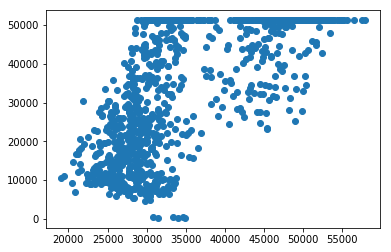

In [24]:
y_train_test_stationary = model2.predict(X_train_stationary)
plt.scatter(y_train_test_stationary,y_train)
mse = mean_squared_error(y_train_test_stationary, y_train)
print mse

In [ ]:
"""
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()"""

### Weighted Function
https://machinelearningmastery.com/ensemble-machine-learning-algorithms-python-scikit-learn/

In [25]:
y_train_weather = pd.DataFrame(y_train_test_weather)
y_train_stationary = pd.DataFrame(y_train_test_stationary)
X_train_pred = pd.concat([y_train_weather, y_train_stationary],axis=1)


In [26]:
#Pred = [y_pred_weather,y_pred_wearable]
#X_train, X_test, y_train, y_test = train_test_split(train_pred, y_test, test_size = 0.2, random_state = 0)
classifier = Sequential()
# Adding the Single Perceptron or Shallow network
classifier.add(Dense(50,activation='relu', input_dim=12))
# Adding dropout to prevent overfitting
#classifier.add(Dropout(p=0.1))
# Adding the output layer
classifier.add(Dense(output_dim=6))
classifier.compile(optimizer = adam, loss = 'mean_squared_error')
#history = classifier.fit(X_train_pred, y_train, validation_data=(X_test,y_test),batch_size=10, nb_epoch=150)
history = classifier.fit(X_train_pred, y_train, batch_size=10, nb_epoch=500)


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=6)`
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:12: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if sys.path[0] == '':


Epoch 1/500
192/192 [==============================] - 0s 1ms/step - loss: 1756398554.6667
Epoch 2/500
192/192 [==============================] - 0s 151us/step - loss: 1711606396.0000
Epoch 3/500
192/192 [==============================] - 0s 161us/step - loss: 1674645706.6667
Epoch 4/500
192/192 [==============================] - 0s 182us/step - loss: 1645561084.0000
Epoch 5/500
192/192 [==============================] - 0s 175us/step - loss: 1620850110.0000
Epoch 6/500
192/192 [==============================] - 0s 161us/step - loss: 1598492816.0000
Epoch 7/500
192/192 [==============================] - 0s 209us/step - loss: 1578340279.8333
Epoch 8/500
192/192 [==============================] - 0s 207us/step - loss: 1559875048.6667
Epoch 9/500
192/192 [==============================] - 0s 171us/step - loss: 1542718542.5000
Epoch 10/500
192/192 [==============================] - 0s 194us/step - loss: 1526894708.3333
Epoch 11/500
192/192 [==============================] - 0s 155us/step -

192/192 [==============================] - 0s 160us/step - loss: 912275988.3333
Epoch 89/500
192/192 [==============================] - 0s 151us/step - loss: 907154547.3333
Epoch 90/500
192/192 [==============================] - 0s 174us/step - loss: 901863485.3333
Epoch 91/500
192/192 [==============================] - 0s 147us/step - loss: 896688213.0000
Epoch 92/500
192/192 [==============================] - 0s 175us/step - loss: 891419371.0000
Epoch 93/500
192/192 [==============================] - 0s 159us/step - loss: 886403555.2500
Epoch 94/500
192/192 [==============================] - 0s 157us/step - loss: 881480305.3333
Epoch 95/500
192/192 [==============================] - 0s 151us/step - loss: 876466646.6667
Epoch 96/500
192/192 [==============================] - 0s 160us/step - loss: 871282180.6667
Epoch 97/500
192/192 [==============================] - 0s 183us/step - loss: 866274032.0000
Epoch 98/500
192/192 [==============================] - 0s 148us/step - loss: 86118

192/192 [==============================] - 0s 139us/step - loss: 548460989.3333
Epoch 176/500
192/192 [==============================] - 0s 134us/step - loss: 545063835.0000
Epoch 177/500
192/192 [==============================] - 0s 155us/step - loss: 541793959.0000
Epoch 178/500
192/192 [==============================] - 0s 149us/step - loss: 538439862.3333
Epoch 179/500
192/192 [==============================] - 0s 157us/step - loss: 535172055.0000
Epoch 180/500
192/192 [==============================] - 0s 160us/step - loss: 532011560.1667
Epoch 181/500
192/192 [==============================] - 0s 150us/step - loss: 528698509.0000
Epoch 182/500
192/192 [==============================] - 0s 160us/step - loss: 525518580.6667
Epoch 183/500
192/192 [==============================] - 0s 164us/step - loss: 522277761.0000
Epoch 184/500
192/192 [==============================] - 0s 147us/step - loss: 519078521.0000
Epoch 185/500
192/192 [==============================] - 0s 151us/step - l

192/192 [==============================] - 0s 149us/step - loss: 317129681.7500
Epoch 263/500
192/192 [==============================] - 0s 166us/step - loss: 315106767.3333
Epoch 264/500
192/192 [==============================] - 0s 176us/step - loss: 313092840.5000
Epoch 265/500
192/192 [==============================] - 0s 171us/step - loss: 311094945.1667
Epoch 266/500
192/192 [==============================] - 0s 175us/step - loss: 309166830.8333
Epoch 267/500
192/192 [==============================] - 0s 153us/step - loss: 307200907.8333
Epoch 268/500
192/192 [==============================] - 0s 148us/step - loss: 305270946.6667
Epoch 269/500
192/192 [==============================] - 0s 170us/step - loss: 303390810.8333
Epoch 270/500
192/192 [==============================] - 0s 155us/step - loss: 301504592.9167
Epoch 271/500
192/192 [==============================] - 0s 143us/step - loss: 299620740.3333
Epoch 272/500
192/192 [==============================] - 0s 152us/step - l

192/192 [==============================] - 0s 173us/step - loss: 189802731.9167
Epoch 350/500
192/192 [==============================] - 0s 185us/step - loss: 188838024.5833
Epoch 351/500
192/192 [==============================] - 0s 201us/step - loss: 187843297.0000
Epoch 352/500
192/192 [==============================] - 0s 212us/step - loss: 186924475.7500
Epoch 353/500
192/192 [==============================] - 0s 202us/step - loss: 185980903.3333
Epoch 354/500
192/192 [==============================] - 0s 224us/step - loss: 185055869.7500
Epoch 355/500
192/192 [==============================] - 0s 210us/step - loss: 184122999.6667
Epoch 356/500
192/192 [==============================] - 0s 155us/step - loss: 183250102.1667
Epoch 357/500
192/192 [==============================] - 0s 145us/step - loss: 182413664.0833
Epoch 358/500
192/192 [==============================] - 0s 159us/step - loss: 181514629.3333
Epoch 359/500
192/192 [==============================] - 0s 164us/step - l

192/192 [==============================] - 0s 192us/step - loss: 137403383.3333
Epoch 437/500
192/192 [==============================] - 0s 184us/step - loss: 137120124.1250
Epoch 438/500
192/192 [==============================] - 0s 166us/step - loss: 136826033.3333
Epoch 439/500
192/192 [==============================] - 0s 182us/step - loss: 136529910.0417
Epoch 440/500
192/192 [==============================] - 0s 236us/step - loss: 136240722.7500
Epoch 441/500
192/192 [==============================] - 0s 186us/step - loss: 135980152.8333
Epoch 442/500
192/192 [==============================] - 0s 178us/step - loss: 135680618.3333
Epoch 443/500
192/192 [==============================] - 0s 200us/step - loss: 135393831.8333
Epoch 444/500
192/192 [==============================] - 0s 179us/step - loss: 135143362.5000
Epoch 445/500
192/192 [==============================] - 0s 152us/step - loss: 134854323.7917
Epoch 446/500
192/192 [==============================] - 0s 165us/step - l

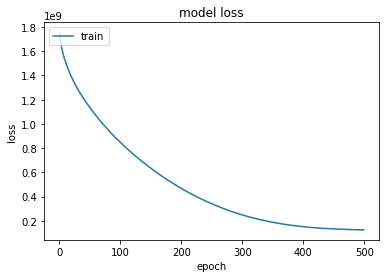

In [27]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### weather prediction

In [28]:
"""y_pred_weather = model.predict(X_test_weather)

plt.scatter(y_test,y_pred_weather, color = 'red')
plt.title('weather only')
plt.legend()
plt.show()
mse = mean_squared_error(y_test, y_pred_weather)
print mse """

"y_pred_weather = model.predict(X_test_weather)\n\nplt.scatter(y_test,y_pred_weather, color = 'red')\nplt.title('weather only')\nplt.legend()\nplt.show()\nmse = mean_squared_error(y_test, y_pred_weather)\nprint mse "

231409711.10211608


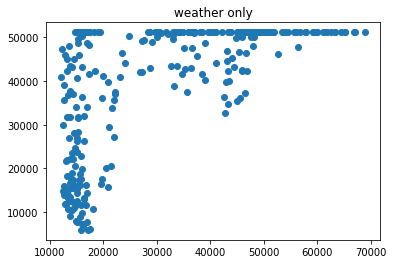

In [29]:
# Get the mean absolute error on the validation data
y_pred_weather = model.predict(X_test_weather)
plt.scatter(y_pred_weather,y_test)
mse = mean_squared_error(y_pred_weather, y_test)
plt.title('weather only')
print mse

### stationary prediction

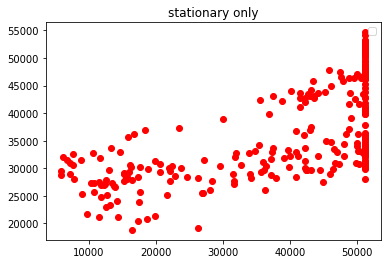

136445471.05891854


In [30]:
#y_pred_stationary = model2.predict(X_test_stationary)
y_pred_stationary = model2.predict(X_test_stationary)
plt.scatter(y_test,y_pred_stationary, color = 'red')
plt.title('stationary only')
plt.legend()
plt.show()
mse2 = mean_squared_error(y_test, y_pred_stationary)
print mse2 

In [31]:
y_test_weather = pd.DataFrame(y_pred_weather)
y_test_stationary = pd.DataFrame(y_pred_stationary)
X_pred = pd.concat([y_test_weather, y_test_stationary],axis=1)
y_pred = classifier.predict(X_pred)

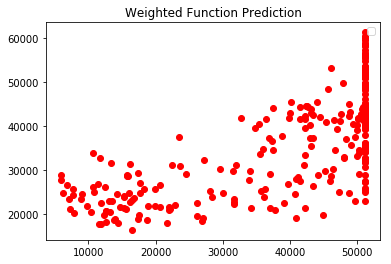

In [32]:
plt.scatter(y_test,y_pred, color = 'red')
plt.title('Weighted Function Prediction')
plt.legend()
plt.show()

In [33]:
mse3 = mean_squared_error(y_test, y_pred)
print mse3 

130199285.35668957


### plot loss history

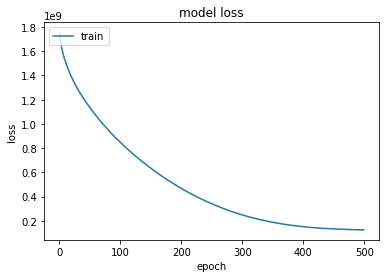

In [34]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression,Lasso,Ridge
ll = Lasso(alpha=0.1)
ll.fit(X_train, y_train)
pred2 = ll.predict(X_test)
mse2 = mean_squared_error(y_test,pred2)
print mse2

In [ ]:
plt.scatter(y_test,pred2, color = 'red')
plt.title('Lasso prediction')
plt.legend()
plt.show()

### random forest for weather - same mse as MLP

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train_weather,y_train)

# Get the mean absolute error on the validation data
y_test_weather = model.predict(X_test_weather)
plt.scatter(y_test_weather,y_test)
mse = mean_squared_error(y_test_weather, y_test)
print mse

In [ ]:
y_train_test_stationary.shape,y_tra